## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import friedman3Dataset
import network
import dataset
import matplotlib.pyplot as plt
import sanityChecks
import performanceMetrics
import torch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import scrapbook as sb
from statistics import mean
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor

## Dataset

In [3]:
#Dataset Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [4]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)

          X1           X2        X3        X4         Y
0  67.020955  1171.887961  0.844019  3.709510  1.449987
1  23.642950  1011.139133  0.209762  5.025511  1.410696
2  96.652511   788.750970  0.288537  2.909263  1.078149
3  67.120213   323.594718  0.194538  7.240829  0.579299
4  25.191350  1404.668973  0.402012  3.360797  1.517361


## Parameters 

In [5]:
n_epochs = 1000
batch_size = 32
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [6]:
generator = network.GeneratorTabnet(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

In [7]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,device)


tensor([[ 0.2061],
        [ 0.2208],
        [ 1.0217],
        [-0.7901],
        [ 0.0891],
        [-0.2852],
        [ 0.4374],
        [-0.3707],
        [ 0.3391],
        [-0.1642],
        [ 0.9321],
        [ 0.4404],
        [-0.2801],
        [ 0.0292],
        [ 3.3476],
        [-0.3057],
        [-0.5403],
        [-3.5117],
        [-0.1923],
        [ 0.9330],
        [ 1.1573],
        [-0.2297],
        [ 0.9372],
        [ 1.3535],
        [ 1.0660],
        [ 0.3742],
        [ 0.4120],
        [-0.2759],
        [ 0.2682],
        [-0.7530],
        [ 2.2751],
        [ 0.7689]], grad_fn=<MmBackward>)
tensor([[ 0.3263],
        [ 2.5942],
        [ 1.8084],
        [-0.3555],
        [ 0.2985],
        [-1.3266],
        [ 2.3274],
        [-0.2869],
        [ 1.0792],
        [ 0.2316],
        [ 0.1383],
        [ 0.6901],
        [-0.3348],
        [-0.1975],
        [-0.2768],
        [-0.1781],
        [ 0.4574],
        [ 0.4271],
        [-0.2779],
        

tensor([[ 0.7505],
        [-0.0602],
        [-0.1613],
        [-1.2431],
        [-0.7824],
        [ 0.2091],
        [ 0.3610],
        [ 0.0451],
        [ 0.3266],
        [-0.0919],
        [ 0.5034],
        [ 0.9404],
        [-1.0222],
        [ 0.5146],
        [ 1.5552],
        [-0.1692],
        [ 0.1462],
        [ 0.5148],
        [ 0.6960],
        [ 0.8486],
        [-2.0402],
        [ 0.9773],
        [-1.6302],
        [ 0.4670],
        [ 0.2884],
        [ 1.6246],
        [ 1.2443],
        [ 0.4036],
        [ 3.7060],
        [ 0.1082],
        [ 0.1595],
        [ 1.8853]], grad_fn=<MmBackward>)
tensor([[ 0.2500],
        [ 0.0622],
        [ 0.7622],
        [-0.1099],
        [-0.7683],
        [-0.0772],
        [ 0.1305],
        [ 0.0161],
        [-0.3003],
        [ 0.6708],
        [ 0.6713],
        [-2.1226],
        [-0.4294],
        [ 0.5901],
        [ 2.1499],
        [ 3.3212]], grad_fn=<MmBackward>)
tensor([[ 0.0762],
        [ 1.5606],
    

tensor([[ 2.6944e-01],
        [ 8.7787e-01],
        [ 8.9231e-04],
        [ 3.1805e-01],
        [ 1.1953e+00],
        [ 9.5054e-01],
        [-3.7605e-01],
        [ 4.3381e-01],
        [-1.0336e-01],
        [-1.0960e+00],
        [ 6.6628e-01],
        [ 6.6687e-01],
        [-8.1436e-01],
        [ 1.1263e+00],
        [ 1.4532e+00],
        [ 1.8034e-01]], grad_fn=<MmBackward>)
tensor([[ 3.4512],
        [-0.2598],
        [ 0.1463],
        [ 0.4315],
        [ 0.0478],
        [ 0.2501],
        [-0.0741],
        [-1.0329],
        [ 0.6303],
        [-0.0837],
        [-0.5909],
        [ 0.8201],
        [ 0.5711],
        [ 0.2576],
        [ 0.1489],
        [ 0.3636],
        [-0.6170],
        [ 4.9387],
        [-0.7562],
        [ 0.6287],
        [ 1.0298],
        [ 0.2901],
        [ 0.1011],
        [-0.3196],
        [-3.2551],
        [ 1.1190],
        [-0.0187],
        [ 0.6213],
        [ 0.1306],
        [ 0.5112],
        [ 0.4548],
        [ 0.5999]], 

tensor([[ 0.0457],
        [ 2.1533],
        [ 3.2637],
        [ 0.6465],
        [-0.9299],
        [-0.0622],
        [-1.0536],
        [ 1.4140],
        [ 0.7462],
        [-2.9709],
        [ 1.9032],
        [-0.0543],
        [ 0.1251],
        [-0.0772],
        [ 1.1298],
        [-0.2703],
        [-0.4159],
        [-0.0823],
        [-0.6143],
        [-0.3246],
        [ 2.5959],
        [-0.2137],
        [ 0.5793],
        [ 1.0923],
        [ 0.3162],
        [-0.9175],
        [ 1.9961],
        [-1.2114],
        [ 1.1803],
        [ 0.5659],
        [-0.3905],
        [ 1.0485]], grad_fn=<MmBackward>)
tensor([[ 0.4617],
        [ 1.5781],
        [ 1.2730],
        [-0.9232],
        [ 0.2263],
        [ 0.3078],
        [ 3.9737],
        [ 0.5359],
        [ 0.3404],
        [ 1.1513],
        [-0.5517],
        [-0.5540],
        [ 0.2030],
        [-0.4162],
        [-0.1806],
        [-0.5966]], grad_fn=<MmBackward>)
tensor([[ 1.4277],
        [ 1.4733],
    

tensor([[ 0.2234],
        [ 2.7344],
        [ 0.6469],
        [-0.9074],
        [-0.5358],
        [ 3.0412],
        [ 3.1602],
        [ 0.8992],
        [-1.6705],
        [-0.5096],
        [ 1.5646],
        [-0.6998],
        [-1.5032],
        [ 0.0199],
        [ 0.3672],
        [ 0.8414],
        [ 0.0480],
        [ 0.3135],
        [-0.0109],
        [ 0.0883],
        [ 1.5886],
        [ 0.9220],
        [-0.2280],
        [ 0.9819],
        [-0.4413],
        [ 0.4795],
        [ 0.9826],
        [ 2.8120],
        [ 1.2554],
        [ 0.5179],
        [ 0.3193],
        [ 0.0273]], grad_fn=<MmBackward>)
tensor([[ 0.8976],
        [-0.8569],
        [ 0.9411],
        [-0.7260],
        [ 1.2311],
        [ 1.0201],
        [ 0.3166],
        [ 1.1413],
        [-0.8086],
        [ 2.2531],
        [ 3.7736],
        [-2.7439],
        [-1.1586],
        [ 0.3178],
        [ 2.3375],
        [ 0.6225],
        [ 0.0165],
        [ 0.4342],
        [ 0.8736],
        

tensor([[-0.2661],
        [ 1.1588],
        [-0.8095],
        [-0.0342],
        [ 1.2170],
        [ 0.1953],
        [-0.2071],
        [ 0.1629],
        [ 0.2165],
        [ 0.4409],
        [ 0.1979],
        [-0.3748],
        [ 0.1823],
        [-0.2614],
        [ 0.2077],
        [ 0.7521],
        [ 1.5793],
        [-0.1706],
        [ 4.3934],
        [ 0.4504],
        [ 0.1730],
        [ 0.3363],
        [-0.2335],
        [ 0.6911],
        [-0.6424],
        [ 1.1143],
        [ 1.4007],
        [ 1.2067],
        [ 2.7201],
        [ 0.0495],
        [ 2.8883],
        [ 1.1014]], grad_fn=<MmBackward>)
tensor([[ 0.0831],
        [ 1.3511],
        [ 0.3077],
        [ 0.6516],
        [ 1.0231],
        [ 0.1563],
        [-1.4487],
        [ 0.1896],
        [ 0.2794],
        [ 0.1809],
        [ 0.4058],
        [ 0.6782],
        [ 0.6591],
        [-0.3013],
        [ 5.5071],
        [ 0.0578],
        [-0.2683],
        [-1.1703],
        [ 1.3136],
        

tensor([[ 0.6480],
        [ 0.1796],
        [-0.0130],
        [ 0.2010],
        [ 2.5885],
        [-0.0841],
        [ 0.1600],
        [-0.0761],
        [ 0.8315],
        [ 0.9701],
        [ 0.2043],
        [ 0.2488],
        [ 0.1496],
        [-1.4919],
        [ 0.9976],
        [ 2.3595],
        [-1.5907],
        [ 0.0619],
        [ 1.7879],
        [-0.8958],
        [ 0.6346],
        [ 1.0201],
        [ 0.4939],
        [ 1.3851],
        [ 0.2419],
        [ 0.7369],
        [ 0.7198],
        [-1.6751],
        [ 1.4288],
        [ 1.5796],
        [ 0.4269],
        [ 1.7508]], grad_fn=<MmBackward>)
tensor([[ 2.5951],
        [ 0.5604],
        [-0.2174],
        [-0.3354],
        [ 0.8591],
        [ 0.1606],
        [-1.2240],
        [ 0.4029],
        [ 1.6991],
        [ 5.5347],
        [-0.0275],
        [ 0.4488],
        [-0.8428],
        [ 0.0593],
        [-0.0588],
        [ 1.5031],
        [-0.2488],
        [ 0.0256],
        [ 1.1384],
        

tensor([[ 0.4475],
        [ 1.0300],
        [-0.7062],
        [ 2.6343],
        [ 1.3927],
        [ 0.6470],
        [ 0.3043],
        [ 0.0524],
        [-0.3240],
        [ 0.1107],
        [ 0.8001],
        [ 0.7284],
        [ 0.4689],
        [ 0.2302],
        [-0.1270],
        [ 0.4027],
        [ 1.1210],
        [ 0.4677],
        [ 1.5895],
        [-3.0880],
        [ 0.0186],
        [-0.1020],
        [ 1.2945],
        [-0.3155],
        [ 3.6984],
        [-0.6523],
        [ 0.4613],
        [ 0.1737],
        [ 1.4145],
        [ 1.1113],
        [ 1.5385],
        [-0.9109]], grad_fn=<MmBackward>)
tensor([[ 3.0404e-02],
        [-7.4435e-01],
        [-5.1348e-01],
        [ 9.1037e-01],
        [-2.1922e-01],
        [-4.2706e-02],
        [ 6.7780e-01],
        [-9.1036e-02],
        [ 6.8001e-01],
        [ 4.2780e-01],
        [ 7.4159e-01],
        [ 1.6201e+00],
        [-1.3854e-04],
        [-1.1709e-02],
        [-3.0400e-01],
        [-1.5468e-01],
 

tensor([[-1.0576],
        [ 0.9382],
        [ 0.1887],
        [ 0.7886],
        [ 0.1181],
        [ 0.3130],
        [ 1.5078],
        [ 0.1208],
        [-0.6586],
        [ 0.4206],
        [ 0.3792],
        [-0.2274],
        [ 2.3894],
        [-0.1983],
        [ 1.7917],
        [ 0.3887]], grad_fn=<MmBackward>)
tensor([[ 0.8552],
        [-2.0507],
        [ 0.6481],
        [ 0.1227],
        [-0.0686],
        [ 0.1174],
        [ 1.7060],
        [-0.1426],
        [-1.4599],
        [ 0.5237],
        [-0.0629],
        [-0.0215],
        [ 0.4825],
        [-0.0410],
        [ 2.2462],
        [ 2.8974]], grad_fn=<MmBackward>)
tensor([[-0.9531],
        [ 0.9731],
        [ 0.3165],
        [-1.2781],
        [ 0.4157],
        [ 1.6876],
        [ 1.6830],
        [-0.2137],
        [ 0.0550],
        [-0.2051],
        [ 0.8897],
        [-0.0246],
        [ 0.5951],
        [ 0.1823],
        [-0.7291],
        [ 1.3428],
        [-0.9934],
        [ 1.4994],
    

tensor([[ 1.4098],
        [ 0.5625],
        [ 0.1779],
        [-0.5958],
        [-0.1107],
        [ 0.2280],
        [ 0.7174],
        [ 2.8779],
        [ 0.1778],
        [-0.7379],
        [-0.5825],
        [ 1.1097],
        [-0.2148],
        [ 1.9044],
        [ 0.1689],
        [-0.7448]], grad_fn=<MmBackward>)


tensor([[ 1.1527],
        [-0.0803],
        [-0.3777],
        [-0.0248],
        [ 0.1731],
        [ 0.6740],
        [ 0.1206],
        [-0.0415],
        [-0.2558],
        [ 0.1699],
        [-0.3754],
        [ 0.5134],
        [ 2.2241],
        [ 0.2490],
        [ 0.1379],
        [ 1.4447],
        [ 0.3547],
        [-0.0396],
        [ 2.2669],
        [ 0.0431],
        [-3.0763],
        [ 0.4865],
        [ 0.0175],
        [ 1.8442],
        [-0.0827],
        [ 0.2792],
        [ 0.4764],
        [ 1.8075],
        [ 0.9936],
        [-0.2283],
        [ 2.2383],
        [-0.0771]], grad_fn=<MmBackward>)
tensor([[ 1.0244],
        [ 0.4601],
        [-0.0311],
        [-1.0948],
        [ 0.0077],
        [ 1.9216],
        [ 0.0147],
        [-0.0648],
        [ 0.9819],
        [ 0.1621],
        [ 0.2807],
        [-0.9534],
        [ 0.4188],
        [ 0.2959],
        [ 0.0865],
        [ 1.1939],
        [ 0.2047],
        [-0.7077],
        [ 1.3635],
        

tensor([[-6.5553e-01],
        [ 1.5496e+00],
        [ 2.1091e-01],
        [ 2.5188e-01],
        [ 2.1707e-03],
        [ 2.8949e-01],
        [ 3.5071e-01],
        [-6.5597e-02],
        [ 3.3277e+00],
        [ 4.2830e-01],
        [-2.3848e-01],
        [-1.1360e+00],
        [ 2.0856e-02],
        [ 6.2706e-02],
        [ 4.6289e-01],
        [-8.9665e-01],
        [ 4.7086e-01],
        [ 1.0724e+00],
        [-1.8684e-01],
        [ 2.0202e-01],
        [-1.5579e-01],
        [ 7.8842e-01],
        [ 1.7131e-01],
        [ 1.4741e+00],
        [ 2.8412e+00],
        [-2.5931e-01],
        [ 1.3991e+00],
        [-1.8134e-01],
        [ 5.7298e-01],
        [-8.9834e-02],
        [-1.4847e+00],
        [ 6.4245e-01]], grad_fn=<MmBackward>)
tensor([[-0.2871],
        [-1.1605],
        [ 1.6703],
        [ 0.1609],
        [-0.0413],
        [ 0.0649],
        [-0.2179],
        [ 0.8525],
        [-0.5204],
        [ 0.9435],
        [-0.2087],
        [-1.3062],
        [ 0.0

tensor([[ 0.3400],
        [ 2.6095],
        [ 0.5454],
        [-1.0844],
        [ 1.7006],
        [ 2.7468],
        [ 1.3414],
        [-0.0880],
        [ 0.1292],
        [-1.1829],
        [-0.2599],
        [-1.7039],
        [ 0.1704],
        [ 0.2325],
        [ 0.4444],
        [ 0.7054]], grad_fn=<MmBackward>)
tensor([[ 0.0759],
        [ 0.6422],
        [ 0.3135],
        [-0.0781],
        [-0.0887],
        [ 0.4475],
        [ 1.8080],
        [-1.2637],
        [ 1.2951],
        [ 1.2982],
        [ 0.2995],
        [ 1.9937],
        [ 1.4469],
        [ 0.0549],
        [-0.2912],
        [ 0.1500],
        [-0.3515],
        [ 0.0693],
        [-0.0662],
        [ 0.8027],
        [ 0.6253],
        [ 0.5754],
        [ 0.3484],
        [ 0.1122],
        [ 0.0895],
        [ 0.8343],
        [-0.2462],
        [ 1.5881],
        [-1.4300],
        [ 1.1376],
        [-0.4929],
        [-0.4863]], grad_fn=<MmBackward>)
tensor([[ 0.3151],
        [-0.6433],
    

tensor([[-0.1043],
        [ 3.0031],
        [ 0.4975],
        [ 0.8104],
        [ 0.6657],
        [-0.4659],
        [ 0.2396],
        [-0.2785],
        [ 1.7242],
        [ 0.8175],
        [-1.9170],
        [-0.4503],
        [ 0.1163],
        [ 0.1531],
        [ 0.0084],
        [-0.0335]], grad_fn=<MmBackward>)
tensor([[ 0.5380],
        [ 0.9543],
        [ 2.7008],
        [ 1.1264],
        [ 1.1258],
        [-4.2204],
        [ 0.4436],
        [-0.4305],
        [ 0.6965],
        [-0.3295],
        [-0.1940],
        [-0.2699],
        [-0.1345],
        [ 0.1242],
        [-0.1042],
        [ 0.3827]], grad_fn=<MmBackward>)
tensor([[-0.5903],
        [ 0.4894],
        [ 0.0130],
        [-0.3424],
        [ 0.4995],
        [-0.1692],
        [-0.0885],
        [ 0.4617],
        [ 1.2508],
        [-0.4230],
        [-1.0311],
        [-0.3279],
        [ 1.4680],
        [ 0.1399],
        [-0.3960],
        [ 0.2752],
        [ 0.2098],
        [-0.6847],
    

tensor([[ 0.3244],
        [ 0.8587],
        [ 0.3279],
        [-0.5367],
        [ 0.8284],
        [ 0.0842],
        [ 0.4462],
        [ 0.5786],
        [ 3.1028],
        [-0.7655],
        [ 0.6240],
        [ 0.0712],
        [-0.0353],
        [ 0.7943],
        [ 0.8698],
        [-0.5828],
        [ 0.2163],
        [-0.3563],
        [-0.2031],
        [-0.8910],
        [ 0.6787],
        [-0.5078],
        [-0.5919],
        [ 0.5305],
        [-0.2684],
        [-0.2412],
        [ 0.4772],
        [-1.2112],
        [ 2.6286],
        [ 0.6293],
        [-1.7448],
        [ 0.4777]], grad_fn=<MmBackward>)
tensor([[ 0.1814],
        [ 0.1771],
        [-0.1153],
        [-1.6980],
        [-0.5534],
        [-1.1474],
        [ 0.4313],
        [ 2.9202],
        [ 0.7180],
        [ 0.0171],
        [-0.6972],
        [ 0.1577],
        [-0.2223],
        [ 0.2202],
        [ 0.7107],
        [-0.7851],
        [ 0.1389],
        [ 1.8930],
        [-0.8001],
        

tensor([[-0.5927],
        [ 0.1708],
        [-1.6469],
        [-0.2816],
        [-0.7598],
        [-0.0312],
        [ 0.0231],
        [-0.3829],
        [-1.4145],
        [-0.0506],
        [ 0.2912],
        [ 0.3198],
        [ 2.8221],
        [-0.3149],
        [-0.2671],
        [-0.0479],
        [-0.2138],
        [-0.6963],
        [ 0.4690],
        [-1.1316],
        [ 1.8641],
        [-0.6264],
        [ 0.4683],
        [ 0.2516],
        [ 3.6480],
        [-0.0510],
        [-0.0513],
        [-1.0967],
        [ 2.6574],
        [-1.0618],
        [-1.2230],
        [-1.1507]], grad_fn=<MmBackward>)
tensor([[-0.6637],
        [ 0.7910],
        [-0.6378],
        [-0.8027],
        [ 0.1161],
        [ 0.0416],
        [ 0.0180],
        [-0.6071],
        [-0.1746],
        [-0.0479],
        [ 2.0708],
        [ 1.1281],
        [ 0.2650],
        [-0.5299],
        [ 0.2700],
        [-0.4918],
        [-0.6957],
        [-0.6258],
        [ 0.1835],
        

tensor([[ 0.7191],
        [-0.7976],
        [ 0.3249],
        [-0.2987],
        [-1.2783],
        [-0.3178],
        [ 0.1097],
        [ 0.0545],
        [-0.4721],
        [-1.7156],
        [ 2.5053],
        [ 0.0101],
        [-0.3276],
        [ 0.6002],
        [ 1.1444],
        [-0.3233]], grad_fn=<MmBackward>)


tensor([[-0.7537],
        [-0.0506],
        [ 1.5440],
        [-0.4232],
        [-0.2159],
        [-0.4704],
        [ 2.2435],
        [-1.0433],
        [-0.1035],
        [ 0.0772],
        [ 0.3005],
        [ 0.0538],
        [-2.0333],
        [ 0.6603],
        [-0.2339],
        [-0.7620]], grad_fn=<MmBackward>)
tensor([[ 0.1290],
        [-0.0634],
        [ 0.4391],
        [-0.5981],
        [ 0.1047],
        [ 0.6519],
        [ 1.4071],
        [-1.6676],
        [-0.4376],
        [ 0.0414],
        [-0.4201],
        [ 0.2450],
        [-0.5394],
        [ 0.1190],
        [ 0.5444],
        [ 1.4712],
        [-0.2161],
        [-0.6418],
        [-0.4242],
        [-1.6363],
        [-0.2077],
        [ 0.2667],
        [-0.4013],
        [-0.5831],
        [-2.8077],
        [ 0.5752],
        [ 3.5943],
        [ 0.0072],
        [-0.6212],
        [-0.0101],
        [ 0.1068],
        [ 0.2198]], grad_fn=<MmBackward>)
tensor([[-0.4272],
        [ 0.2221],
    

tensor([[-0.4384],
        [-1.0469],
        [ 0.0912],
        [ 0.4954],
        [-0.5032],
        [ 0.0448],
        [-0.1108],
        [ 0.8488],
        [-1.0721],
        [ 0.3306],
        [ 0.4611],
        [-2.0966],
        [-0.3380],
        [ 2.7220],
        [-0.6692],
        [-0.7726]], grad_fn=<MmBackward>)
tensor([[-1.1492],
        [-0.5851],
        [-0.4465],
        [ 1.5434],
        [-2.2926],
        [ 0.6838],
        [ 2.4814],
        [-0.1815],
        [ 1.3093],
        [-0.3936],
        [-0.8750],
        [ 0.4243],
        [-0.0932],
        [-0.3647],
        [-1.3490],
        [-0.9491]], grad_fn=<MmBackward>)
tensor([[ 0.5974],
        [-1.7767],
        [-0.7295],
        [-1.1357],
        [ 0.2677],
        [-0.1241],
        [ 0.9625],
        [ 0.6632],
        [ 0.2722],
        [-0.2376],
        [-1.8265],
        [-0.6277],
        [ 0.4928],
        [-0.7354],
        [-0.4802],
        [-0.2857],
        [ 0.8939],
        [-0.1742],
    

tensor([[ 0.0445],
        [ 0.7285],
        [ 0.8047],
        [-0.3729],
        [-0.4260],
        [-0.6720],
        [-0.0425],
        [ 0.4697],
        [ 3.4018],
        [-0.5801],
        [-0.8837],
        [-1.6569],
        [-0.0605],
        [-0.0111],
        [-0.2474],
        [-0.8725],
        [-1.3584],
        [-0.0214],
        [-0.7557],
        [-0.1854],
        [ 0.0502],
        [ 0.0069],
        [ 0.3952],
        [-0.4276],
        [-1.0411],
        [-0.7480],
        [-0.1977],
        [ 0.0624],
        [ 0.4152],
        [-3.4386],
        [ 0.3420],
        [-0.0238]], grad_fn=<MmBackward>)
tensor([[ 1.5022],
        [-0.7415],
        [-1.5697],
        [ 0.0133],
        [-0.0718],
        [ 0.2740],
        [-0.9620],
        [ 0.9853],
        [ 0.2933],
        [-0.6320],
        [-0.9436],
        [-0.9133],
        [-0.7274],
        [ 0.5956],
        [-0.2510],
        [-0.3940],
        [ 0.5151],
        [ 0.0944],
        [-0.7924],
        

tensor([[-0.5251],
        [ 0.0330],
        [-1.2562],
        [-0.7849],
        [ 0.8591],
        [-1.0826],
        [-0.6461],
        [ 1.0584],
        [-2.4383],
        [-0.7947],
        [-0.8049],
        [-0.0282],
        [-0.8605],
        [ 0.7596],
        [-0.5085],
        [ 0.4285],
        [-0.6079],
        [-0.1848],
        [-0.7183],
        [-0.3860],
        [ 0.2030],
        [ 0.6603],
        [-0.5173],
        [ 1.4589],
        [-2.1807],
        [-0.4241],
        [ 0.6181],
        [-0.1169],
        [ 0.4083],
        [-0.4907],
        [ 0.7544],
        [-0.2523]], grad_fn=<MmBackward>)
tensor([[-1.3653],
        [ 1.5688],
        [ 0.5543],
        [ 0.2189],
        [-0.1355],
        [-0.1085],
        [ 0.1844],
        [ 0.0281],
        [-4.6379],
        [-1.1281],
        [-0.0980],
        [-0.2582],
        [-0.4529],
        [ 0.1312],
        [ 0.0381],
        [-0.1166],
        [ 0.0261],
        [ 0.1847],
        [ 0.7880],
        

tensor([[-0.5166],
        [ 0.5374],
        [-1.5477],
        [-0.3993],
        [-0.7462],
        [-0.1265],
        [-1.2109],
        [-0.4918],
        [ 1.4244],
        [-0.3823],
        [-0.7613],
        [-0.1872],
        [-1.4876],
        [-0.8163],
        [-0.5419],
        [ 0.7143],
        [-0.1621],
        [-0.0829],
        [-1.5079],
        [ 0.5381],
        [ 0.2220],
        [-0.2853],
        [-0.3958],
        [-0.9055],
        [ 0.0843],
        [ 2.0611],
        [-0.5092],
        [-0.1203],
        [-0.3684],
        [-3.3729],
        [-0.2293],
        [-1.6429]], grad_fn=<MmBackward>)
tensor([[ 0.5618],
        [-0.1409],
        [ 0.1194],
        [ 0.3698],
        [-0.1360],
        [-0.3148],
        [ 2.0026],
        [-0.1468],
        [-3.8980],
        [ 0.6929],
        [-0.6787],
        [-2.7662],
        [-0.7596],
        [-0.9286],
        [ 0.0640],
        [-1.6183]], grad_fn=<MmBackward>)
tensor([[ 2.5170],
        [-0.8368],
    

tensor([[-1.3251],
        [-0.3246],
        [-0.6722],
        [-0.8425],
        [ 0.2663],
        [-1.6542],
        [-0.3529],
        [-0.6696],
        [-1.1280],
        [-0.0539],
        [ 1.9929],
        [ 1.1194],
        [ 0.1037],
        [ 0.9898],
        [-2.0665],
        [-0.3920]], grad_fn=<MmBackward>)
tensor([[-1.7038],
        [-0.9419],
        [-0.5213],
        [-0.1674],
        [ 0.7554],
        [-1.2572],
        [-0.2037],
        [-1.8377],
        [-0.5374],
        [ 2.1097],
        [ 0.0143],
        [-2.1632],
        [ 1.4128],
        [-1.4524],
        [-1.3791],
        [ 1.5781]], grad_fn=<MmBackward>)
tensor([[ 0.5482],
        [-0.1532],
        [-2.7563],
        [-1.0967],
        [-0.0448],
        [-0.6679],
        [ 0.8052],
        [-0.1793],
        [ 1.0566],
        [ 0.0697],
        [-0.4176],
        [-1.3808],
        [-0.7024],
        [-1.5749],
        [-2.5956],
        [-0.3644],
        [ 1.5242],
        [-1.1083],
    

tensor([[-0.7252],
        [-0.2179],
        [-0.8211],
        [ 0.2972],
        [ 0.0189],
        [ 0.7624],
        [ 0.3651],
        [ 0.4550],
        [-1.7664],
        [ 0.2503],
        [-0.4786],
        [ 2.2275],
        [-0.2894],
        [-1.6745],
        [ 0.4196],
        [-0.5190],
        [-3.2240],
        [ 0.0423],
        [-0.1921],
        [ 0.1353],
        [-1.3384],
        [ 1.4175],
        [-2.1720],
        [-0.8945],
        [ 0.3927],
        [ 1.2635],
        [-1.8076],
        [-0.5836],
        [-0.4094],
        [-0.5474],
        [ 0.6070],
        [-0.5999]], grad_fn=<MmBackward>)
tensor([[-0.6542],
        [ 0.8742],
        [ 0.5768],
        [ 0.1356],
        [-0.3089],
        [-2.8476],
        [-0.3395],
        [ 0.3266],
        [ 0.6313],
        [ 0.4525],
        [ 0.1960],
        [-1.2433],
        [-0.4651],
        [-0.0197],
        [-0.0431],
        [-0.8462]], grad_fn=<MmBackward>)
tensor([[ 0.2901],
        [-0.9305],
    

tensor([[ 1.1083],
        [-0.0474],
        [-0.1721],
        [ 0.6167],
        [ 0.6607],
        [-0.0584],
        [ 0.3978],
        [ 0.0276],
        [-0.7115],
        [-0.7339],
        [ 1.2783],
        [-0.7285],
        [-2.8521],
        [-0.8160],
        [-1.9845],
        [-1.0938],
        [ 3.6753],
        [-0.4528],
        [-0.4840],
        [-1.9492],
        [-0.5292],
        [ 0.6560],
        [-0.8220],
        [-1.1562],
        [-1.7616],
        [ 0.4581],
        [-0.0278],
        [-0.6782],
        [ 0.4958],
        [-1.3672],
        [-0.3639],
        [-1.9461]], grad_fn=<MmBackward>)
tensor([[-0.5945],
        [-0.5062],
        [-0.0592],
        [-0.2707],
        [ 0.4164],
        [-0.1855],
        [ 0.4384],
        [-1.2838],
        [ 0.0376],
        [-1.8721],
        [-0.3356],
        [-0.2579],
        [-0.3360],
        [ 0.0564],
        [-0.3096],
        [-1.1177],
        [-0.4547],
        [ 1.5975],
        [-1.6054],
        

tensor([[ 1.3933],
        [-1.2887],
        [-1.3786],
        [ 0.0772],
        [ 0.2897],
        [-2.3184],
        [ 0.9998],
        [-0.4177],
        [ 0.0981],
        [-0.6441],
        [-0.2086],
        [ 0.2714],
        [-0.4822],
        [-0.6633],
        [-2.8524],
        [-0.6455],
        [-0.1132],
        [-0.4401],
        [ 0.2288],
        [-1.3353],
        [-0.2253],
        [-0.6196],
        [ 0.0068],
        [ 0.8928],
        [ 0.2390],
        [-0.0530],
        [ 1.2857],
        [-0.4238],
        [ 0.0694],
        [-0.7743],
        [-0.3108],
        [-1.1064]], grad_fn=<MmBackward>)
tensor([[ 0.1561],
        [-0.4688],
        [-0.5166],
        [ 1.6652],
        [ 1.2693],
        [-1.9708],
        [ 2.3402],
        [-0.4897],
        [-1.0170],
        [-0.7475],
        [ 0.0087],
        [-0.7492],
        [ 0.8521],
        [-0.9031],
        [-2.3419],
        [ 0.7499],
        [ 0.0079],
        [-1.0956],
        [ 1.3586],
        

tensor([[-2.4885],
        [-0.3347],
        [ 2.3159],
        [-0.4548],
        [-0.8372],
        [ 0.3733],
        [-0.0645],
        [-1.2896],
        [-0.2313],
        [-1.3983],
        [-1.5247],
        [ 2.3405],
        [ 0.0236],
        [-0.3857],
        [-0.4249],
        [-0.4077]], grad_fn=<MmBackward>)
tensor([[ 0.5400],
        [-1.2591],
        [ 0.3726],
        [ 0.2288],
        [-0.7784],
        [ 1.2359],
        [-0.5321],
        [ 3.3084],
        [ 0.9680],
        [-0.2193],
        [-0.6257],
        [-2.5056],
        [-0.2215],
        [-0.3986],
        [ 0.2783],
        [-0.4233],
        [-0.3309],
        [ 0.2317],
        [-0.3957],
        [ 0.1225],
        [-0.1510],
        [-1.6900],
        [-0.9888],
        [-1.8043],
        [-0.6050],
        [ 1.3855],
        [-0.3782],
        [-0.0794],
        [-2.9113],
        [-1.1065],
        [-0.5284],
        [ 2.6886]], grad_fn=<MmBackward>)
tensor([[ 0.5851],
        [-0.0445],
    

tensor([[-1.5867],
        [-0.1026],
        [-2.8508],
        [ 0.1469],
        [ 0.4172],
        [-0.4765],
        [-0.2757],
        [ 0.6598],
        [-1.5205],
        [-0.0476],
        [-0.3364],
        [-1.6601],
        [ 0.5493],
        [-0.6216],
        [-0.5881],
        [ 0.5850],
        [ 0.0718],
        [ 0.4197],
        [-0.5701],
        [ 0.3802],
        [ 0.7631],
        [ 0.8622],
        [-1.0139],
        [-0.8003],
        [-1.1984],
        [-0.3844],
        [-0.4414],
        [ 0.4808],
        [ 2.1857],
        [ 2.1245],
        [ 3.5128],
        [-0.5124]], grad_fn=<MmBackward>)
tensor([[ 0.1743],
        [ 1.6777],
        [-2.3267],
        [ 0.8718],
        [ 0.1246],
        [-0.9588],
        [ 1.2318],
        [-0.1203],
        [ 1.1044],
        [-0.0818],
        [-0.6944],
        [ 0.7631],
        [-0.1953],
        [-0.7811],
        [-1.0806],
        [-3.9906]], grad_fn=<MmBackward>)
tensor([[ 1.1217],
        [ 0.5036],
    

tensor([[ 0.0859],
        [-0.7856],
        [-0.2465],
        [ 2.3927],
        [-0.3825],
        [ 0.2106],
        [ 0.6387],
        [ 1.6450],
        [-0.3305],
        [-0.4151],
        [-1.5079],
        [-1.4055],
        [-0.3528],
        [-3.7676],
        [ 0.8390],
        [ 0.1424]], grad_fn=<MmBackward>)
tensor([[-0.0813],
        [ 0.6364],
        [-0.5818],
        [-0.7463],
        [-0.3503],
        [ 2.0408],
        [-1.2246],
        [ 2.0069],
        [-0.9015],
        [ 0.2469],
        [-0.9128],
        [ 0.4064],
        [ 1.0809],
        [-0.3014],
        [-0.2253],
        [-0.2896]], grad_fn=<MmBackward>)
tensor([[ 1.7071],
        [-0.4679],
        [-0.1685],
        [-1.8386],
        [-0.8975],
        [ 0.3309],
        [ 0.6413],
        [-0.6362],
        [ 0.6012],
        [ 0.4579],
        [ 0.1803],
        [ 0.1817],
        [ 2.2687],
        [-1.3135],
        [-0.3264],
        [ 1.4905],
        [ 0.1258],
        [-0.2486],
    

tensor([[-0.1261],
        [-0.1837],
        [ 1.0956],
        [ 1.6506],
        [-0.3878],
        [-0.0612],
        [-1.2636],
        [ 0.4986],
        [ 0.4046],
        [ 0.8157],
        [-0.0365],
        [ 1.2979],
        [-1.4425],
        [ 0.4611],
        [-0.0532],
        [ 0.1938],
        [-1.1546],
        [-0.1165],
        [ 2.0578],
        [-0.0732],
        [-0.8781],
        [-0.0514],
        [-0.5404],
        [ 0.1088],
        [-0.4631],
        [-0.0784],
        [ 2.0530],
        [-0.0613],
        [-1.2647],
        [ 0.6467],
        [-0.8448],
        [ 0.8592]], grad_fn=<MmBackward>)
tensor([[ 0.8480],
        [ 0.8233],
        [ 0.5857],
        [ 0.2456],
        [-0.3679],
        [ 1.3181],
        [-0.0706],
        [ 0.3038],
        [-0.1790],
        [ 0.6946],
        [ 0.1691],
        [ 2.5659],
        [-1.0836],
        [-0.0520],
        [ 0.3886],
        [-0.2184],
        [-0.3450],
        [ 1.6369],
        [ 2.4714],
        

tensor([[-0.3015],
        [ 1.0991],
        [ 1.3392],
        [ 0.9495],
        [ 0.6446],
        [-1.5087],
        [ 0.2212],
        [-0.0300],
        [ 1.4865],
        [-2.2286],
        [-0.2242],
        [ 0.6820],
        [ 0.0372],
        [-0.2243],
        [-0.2720],
        [-0.4661],
        [ 0.5846],
        [-1.5036],
        [ 0.1878],
        [-0.5997],
        [-0.2649],
        [ 0.4018],
        [ 2.3598],
        [-0.2196],
        [ 0.7718],
        [-0.6548],
        [ 0.6968],
        [ 0.0871],
        [-0.9218],
        [-0.1523],
        [-0.2101],
        [-0.5919]], grad_fn=<MmBackward>)
tensor([[ 0.5912],
        [ 0.3996],
        [ 1.1015],
        [ 1.1109],
        [ 1.5011],
        [-0.5252],
        [ 0.1441],
        [ 0.1025],
        [ 0.6447],
        [-0.6536],
        [-0.6131],
        [-0.0275],
        [-0.0978],
        [-0.0831],
        [-0.2051],
        [ 1.3004],
        [ 2.3371],
        [-0.9001],
        [ 0.7118],
        

tensor([[-0.4832],
        [-0.4208],
        [-0.1387],
        [ 0.0683],
        [ 0.8635],
        [-0.3287],
        [-0.5349],
        [ 0.5118],
        [ 1.2930],
        [-1.3671],
        [ 0.8819],
        [ 1.7478],
        [ 0.7758],
        [ 0.4857],
        [ 0.8218],
        [ 0.2159],
        [-0.2853],
        [ 1.5095],
        [-0.0354],
        [-0.4342],
        [-0.3957],
        [ 3.5071],
        [-0.8578],
        [ 2.1508],
        [-1.1025],
        [ 0.3056],
        [-0.5578],
        [ 0.4360],
        [ 0.4692],
        [-0.4534],
        [ 0.2272],
        [-0.8511]], grad_fn=<MmBackward>)
tensor([[-0.6212],
        [-0.5215],
        [-0.4751],
        [-1.4763],
        [ 0.3954],
        [ 0.6040],
        [-0.5425],
        [-0.0142],
        [-0.5093],
        [-1.2095],
        [ 1.1311],
        [ 2.2601],
        [ 1.1216],
        [ 0.8696],
        [ 0.2089],
        [-0.3502],
        [-1.1223],
        [ 1.6681],
        [ 0.1546],
        

tensor([[ 2.7978],
        [-2.6836],
        [-1.3256],
        [-0.0979],
        [-0.4578],
        [-0.6700],
        [ 0.6061],
        [-0.1208],
        [ 0.3309],
        [ 0.5982],
        [ 0.1104],
        [ 0.3499],
        [ 0.6483],
        [ 1.9983],
        [ 2.2360],
        [-1.6902]], grad_fn=<MmBackward>)
tensor([[ 1.6342],
        [ 1.2150],
        [-0.9543],
        [-1.2561],
        [-0.4199],
        [-0.6598],
        [ 0.7004],
        [ 0.0278],
        [-3.5727],
        [ 3.5917],
        [-0.0136],
        [ 0.2317],
        [ 1.9766],
        [ 1.1590],
        [ 0.4812],
        [-1.1121]], grad_fn=<MmBackward>)


tensor([[ 0.0273],
        [-1.9669],
        [-0.1970],
        [ 0.2458],
        [ 0.1294],
        [-0.4945],
        [ 3.3676],
        [ 0.5666],
        [-0.5008],
        [ 1.3097],
        [-0.1767],
        [ 0.9080],
        [-0.9536],
        [ 0.4346],
        [ 0.7662],
        [ 0.2520],
        [ 0.6408],
        [-0.4688],
        [ 1.6621],
        [-0.0902],
        [ 0.4064],
        [-0.0167],
        [-1.5697],
        [-0.6456],
        [ 0.8390],
        [ 1.2450],
        [-1.0230],
        [ 0.1949],
        [ 0.5540],
        [ 1.4756],
        [ 0.0713],
        [ 0.1016]], grad_fn=<MmBackward>)
tensor([[-0.3595],
        [ 0.3039],
        [-0.7108],
        [ 0.1039],
        [ 0.7371],
        [-0.4105],
        [-0.6657],
        [ 0.2447],
        [ 1.3661],
        [ 2.5262],
        [ 0.9210],
        [ 1.4390],
        [-0.9672],
        [ 0.5406],
        [ 1.1219],
        [-0.0125],
        [ 0.4975],
        [-1.0622],
        [ 2.3246],
        

tensor([[ 0.0117],
        [-0.7615],
        [ 1.5225],
        [-0.7787],
        [ 0.2630],
        [-0.0466],
        [-0.7178],
        [ 0.8708],
        [ 0.4825],
        [ 1.2600],
        [-0.6738],
        [-2.6297],
        [ 0.1427],
        [ 3.0600],
        [ 0.5306],
        [ 0.2096],
        [ 0.9940],
        [ 1.6368],
        [ 1.1467],
        [-0.3497],
        [ 0.2784],
        [-0.4215],
        [ 0.6977],
        [-0.1064],
        [ 1.5724],
        [-0.7494],
        [ 1.3144],
        [ 0.2011],
        [ 0.5311],
        [ 3.0150],
        [-3.7530],
        [-0.0524]], grad_fn=<MmBackward>)
tensor([[ 3.4485e-01],
        [ 2.0918e-01],
        [ 7.4569e-01],
        [ 6.8858e-01],
        [-3.7563e-03],
        [-1.2639e+00],
        [-3.2306e-01],
        [ 3.4800e-01],
        [ 2.3216e-01],
        [ 1.3307e+00],
        [-1.8000e-01],
        [-5.9085e-01],
        [ 7.6228e-01],
        [-1.2307e+00],
        [-4.4945e+00],
        [ 6.2901e-01],
 

tensor([[ 0.2218],
        [ 0.9155],
        [-0.4516],
        [-0.0913],
        [-0.2364],
        [ 0.5361],
        [-1.2100],
        [-0.2606],
        [-0.4210],
        [ 0.0550],
        [ 1.0958],
        [-0.4399],
        [-0.4371],
        [-0.3506],
        [-0.3134],
        [ 1.3660],
        [-1.0642],
        [-1.2702],
        [-0.8655],
        [ 0.1632],
        [ 0.0308],
        [ 0.0175],
        [ 0.5419],
        [-0.3691],
        [ 0.1867],
        [ 0.1273],
        [ 4.3379],
        [ 0.4976],
        [ 0.8026],
        [ 0.0654],
        [ 0.2445],
        [ 1.0012]], grad_fn=<MmBackward>)
tensor([[ 1.3520],
        [ 0.4685],
        [ 2.4432],
        [ 0.5316],
        [-0.4574],
        [ 0.3411],
        [ 0.0982],
        [-0.5860],
        [-0.6165],
        [ 0.2530],
        [-0.7207],
        [-0.3263],
        [-0.5952],
        [-0.1568],
        [ 0.1702],
        [ 0.6733],
        [ 0.1642],
        [-0.1144],
        [-0.4039],
        


tensor([[-0.5409],
        [ 1.3501],
        [ 0.6259],
        [ 1.2807],
        [-1.4947],
        [ 0.9195],
        [-0.6184],
        [ 1.4100],
        [ 1.8000],
        [-0.8819],
        [ 0.0551],
        [ 0.4274],
        [-0.3822],
        [ 0.9160],
        [ 2.0548],
        [-1.1076]], grad_fn=<MmBackward>)


tensor([[-1.4036],
        [ 2.0668],
        [ 1.1813],
        [ 0.4234],
        [ 0.7145],
        [-0.1427],
        [-0.5802],
        [-1.4178],
        [ 1.7143],
        [ 1.6856],
        [-0.8304],
        [ 0.6043],
        [-0.0592],
        [ 0.0302],
        [ 0.3936],
        [ 0.1351],
        [-0.4995],
        [-0.0424],
        [ 0.2140],
        [ 0.3720],
        [-0.7409],
        [ 0.2627],
        [ 0.1050],
        [ 0.9627],
        [-2.3325],
        [ 1.0936],
        [ 0.7396],
        [-0.5003],
        [-0.8232],
        [ 0.1584],
        [ 0.7158],
        [-0.0318]], grad_fn=<MmBackward>)
tensor([[-0.5982],
        [ 1.0329],
        [ 2.2753],
        [ 2.3109],
        [ 1.2713],
        [ 1.3680],
        [-0.4537],
        [-0.7598],
        [ 0.1423],
        [-0.1455],
        [-0.4274],
        [ 2.9596],
        [ 0.0854],
        [-0.1712],
        [ 0.8141],
        [-0.0623],
        [-0.6739],
        [ 0.1427],
        [-0.2511],
        

tensor([[ 8.1609e-01],
        [ 4.1174e-01],
        [ 4.0491e-01],
        [ 1.1581e+00],
        [ 8.9867e-01],
        [-4.9824e-01],
        [ 9.6758e-01],
        [ 1.2941e+00],
        [-3.0446e-01],
        [-1.1576e+00],
        [ 6.9372e-01],
        [-7.2599e-01],
        [ 6.1375e-01],
        [-1.8445e-03],
        [-2.0711e+00],
        [-2.3125e+00],
        [ 1.2546e+00],
        [ 3.8881e-01],
        [ 1.6147e+00],
        [ 1.4261e+00],
        [ 2.1034e+00],
        [-2.4585e-01],
        [-6.5828e-01],
        [-2.2595e-01],
        [ 2.6360e-01],
        [ 3.8678e-01],
        [-6.9548e-01],
        [-1.0309e+00],
        [ 1.0348e-01],
        [-1.8304e-02],
        [ 2.2067e+00],
        [ 8.2876e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7071],
        [ 0.2860],
        [ 0.9863],
        [ 0.4837],
        [ 0.1455],
        [-0.5452],
        [ 1.0503],
        [ 1.9282],
        [ 0.3211],
        [-2.2085],
        [ 0.5821],
        [-0.0568],
        [ 1.5

tensor([[ 1.0452],
        [ 1.9376],
        [-1.2482],
        [-1.7325],
        [ 0.7746],
        [ 0.1534],
        [-1.3705],
        [ 0.0089],
        [ 0.8166],
        [ 0.2869],
        [-0.9791],
        [-0.1718],
        [ 0.4153],
        [-0.0815],
        [ 1.2688],
        [ 2.2156],
        [ 2.4418],
        [ 1.5255],
        [-0.8283],
        [-2.6295],
        [-1.4344],
        [-0.7273],
        [ 0.3415],
        [ 1.1792],
        [-0.0708],
        [ 0.6808],
        [ 0.9285],
        [ 0.4126],
        [ 1.0479],
        [ 2.8873],
        [-0.4378],
        [-0.9823]], grad_fn=<MmBackward>)
tensor([[ 0.4036],
        [-0.1520],
        [-0.8879],
        [-0.1466],
        [ 0.8364],
        [-0.0159],
        [-2.3041],
        [-0.2751],
        [ 1.6313],
        [-0.1385],
        [-0.0995],
        [ 0.3595],
        [ 0.4309],
        [-0.0931],
        [ 0.2562],
        [ 0.2498],
        [ 0.7817],
        [ 1.7701],
        [-0.5931],
        

tensor([[ 0.2398],
        [ 0.8028],
        [-0.4082],
        [ 1.1260],
        [ 0.2760],
        [ 0.5557],
        [-0.4148],
        [-1.2175],
        [-0.3916],
        [ 0.8268],
        [ 1.5699],
        [-0.3411],
        [ 0.4151],
        [ 0.4001],
        [-0.9770],
        [-0.2049],
        [ 0.7868],
        [ 0.8344],
        [ 0.5571],
        [-0.7876],
        [ 2.3321],
        [-0.6269],
        [ 0.3175],
        [-2.8933],
        [-0.5154],
        [ 0.2198],
        [ 0.4056],
        [ 0.2834],
        [ 1.4912],
        [ 3.7990],
        [-1.1981],
        [ 0.7900]], grad_fn=<MmBackward>)
tensor([[-2.0720],
        [-0.1892],
        [ 2.1375],
        [-0.0652],
        [ 0.0108],
        [ 0.9488],
        [ 0.8106],
        [ 0.8102],
        [ 0.1068],
        [-2.0283],
        [-0.0465],
        [-0.5300],
        [ 0.6259],
        [ 2.0183],
        [ 0.2565],
        [-0.4620]], grad_fn=<MmBackward>)
tensor([[-1.2744],
        [ 0.5869],
    

tensor([[ 3.9199e-01],
        [-1.0217e+00],
        [-1.1971e-01],
        [-7.0976e-01],
        [ 3.7680e-03],
        [ 7.0283e-01],
        [ 2.1624e+00],
        [ 6.4540e-01],
        [ 3.5254e-01],
        [ 5.5431e-01],
        [-1.3241e-01],
        [-7.9033e-02],
        [-4.5557e+00],
        [-1.0960e+00],
        [ 6.8351e-01],
        [ 8.0412e-01],
        [-8.7701e-01],
        [ 8.2168e-01],
        [ 6.9135e-01],
        [ 2.2085e+00],
        [ 1.2441e+00],
        [ 9.1508e-01],
        [-7.7751e-01],
        [ 1.6855e+00],
        [ 1.0895e+00],
        [ 1.6139e-01],
        [-5.2221e-01],
        [ 7.9764e-01],
        [-6.5619e-01],
        [ 7.5679e-01],
        [-2.4667e-01],
        [ 9.4312e-02]], grad_fn=<MmBackward>)
tensor([[-0.6244],
        [-0.1178],
        [-0.0828],
        [ 1.5950],
        [-1.4119],
        [ 1.2990],
        [ 3.1083],
        [ 0.7042],
        [-1.1647],
        [-0.5850],
        [-1.0769],
        [-0.2997],
        [ 0.0

tensor([[-1.4437],
        [ 0.2409],
        [ 1.1976],
        [ 0.7185],
        [ 1.5361],
        [ 2.0576],
        [ 0.6418],
        [-2.9106],
        [ 1.0176],
        [-0.0620],
        [ 0.2239],
        [ 0.1692],
        [-0.0112],
        [ 0.4757],
        [-0.5288],
        [-1.2021]], grad_fn=<MmBackward>)
tensor([[-2.7760],
        [ 0.2321],
        [ 1.0640],
        [ 0.7339],
        [ 1.1725],
        [ 2.0986],
        [ 0.2786],
        [ 0.3597],
        [ 0.7280],
        [-0.3036],
        [-0.1600],
        [ 0.2129],
        [ 0.4071],
        [ 2.1258],
        [-1.0124],
        [-0.6748]], grad_fn=<MmBackward>)
tensor([[-0.3593],
        [-0.7749],
        [-0.7929],
        [-0.1010],
        [ 0.9645],
        [-1.5161],
        [ 1.1231],
        [-0.4826],
        [ 0.0085],
        [ 1.6544],
        [-0.5018],
        [ 1.1162],
        [ 0.9468],
        [ 0.0752],
        [-1.0506],
        [-0.0991],
        [-0.0502],
        [-0.4573],
    

tensor([[ 0.0184],
        [ 0.0622],
        [ 0.6026],
        [-0.5932],
        [-1.2538],
        [ 0.5961],
        [ 1.5268],
        [ 1.4045],
        [ 0.3111],
        [ 1.5708],
        [-2.8307],
        [-0.6941],
        [-0.4036],
        [-0.1403],
        [ 0.5201],
        [-0.0863]], grad_fn=<MmBackward>)
tensor([[ 0.9641],
        [-0.2566],
        [ 0.3534],
        [-0.4731],
        [-0.4382],
        [ 0.2440],
        [ 1.3267],
        [-0.3683],
        [ 0.3988],
        [-0.1157],
        [-1.6850],
        [-1.5177],
        [-0.0444],
        [ 0.4253],
        [ 1.9471],
        [ 0.3844]], grad_fn=<MmBackward>)
tensor([[-0.0309],
        [-0.1511],
        [ 1.2170],
        [-0.5824],
        [-0.5538],
        [ 1.3344],
        [ 0.9638],
        [ 2.6367],
        [-0.3258],
        [ 1.4830],
        [-1.2759],
        [-0.1589],
        [-0.4726],
        [ 0.3343],
        [-0.4388],
        [-0.1414],
        [ 0.8101],
        [-0.9813],
    

tensor([[ 6.4125e-01],
        [ 1.2092e-01],
        [ 1.3414e+00],
        [-5.3908e+00],
        [-3.6860e-01],
        [-4.1684e-01],
        [ 1.2262e+00],
        [ 2.0195e-01],
        [ 3.8026e-01],
        [ 1.8428e+00],
        [-7.4536e-01],
        [-8.5691e-01],
        [-1.0841e-01],
        [-1.8406e-01],
        [ 8.8690e-01],
        [ 2.8111e+00],
        [ 2.2350e-01],
        [ 7.1150e-01],
        [-1.5041e+00],
        [ 1.0215e+00],
        [ 2.8685e-03],
        [ 7.6114e-02],
        [ 3.4221e-01],
        [ 6.5672e-01],
        [ 4.5907e-01],
        [-9.2715e-01],
        [ 4.9587e-01],
        [ 6.4416e-01],
        [-2.2479e-01],
        [-6.9795e-01],
        [ 1.4530e+00],
        [ 3.6643e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6223],
        [ 0.4125],
        [ 0.3767],
        [-0.9569],
        [ 0.7338],
        [-1.8373],
        [ 0.2619],
        [ 0.0188],
        [ 0.5883],
        [ 0.3888],
        [-1.1018],
        [-0.9080],
        [ 1.5

tensor([[-0.3170],
        [-0.9410],
        [-0.2600],
        [-0.1162],
        [ 0.3583],
        [ 0.1961],
        [ 0.7975],
        [ 0.4017],
        [ 0.8534],
        [-0.4200],
        [ 0.7385],
        [-0.9283],
        [-0.3116],
        [ 0.6551],
        [-0.0866],
        [ 0.4388],
        [-0.6166],
        [-1.2735],
        [-0.6751],
        [ 0.0246],
        [ 2.0116],
        [-1.1814],
        [ 1.3817],
        [-0.1706],
        [-0.5842],
        [-0.0833],
        [-0.1670],
        [ 0.4482],
        [-0.6295],
        [ 0.1168],
        [ 0.6629],
        [-0.1810]], grad_fn=<MmBackward>)
tensor([[-1.2084],
        [-0.0398],
        [ 1.2991],
        [-0.1000],
        [ 0.2769],
        [ 0.7496],
        [-0.0157],
        [ 1.0224],
        [-0.6638],
        [-0.8882],
        [ 1.2227],
        [-0.3777],
        [-3.5276],
        [ 0.4475],
        [ 0.8400],
        [ 0.1583]], grad_fn=<MmBackward>)


tensor([[ 0.1881],
        [ 2.1358],
        [ 0.8269],
        [ 0.5277],
        [ 0.0708],
        [ 1.0096],
        [ 0.1599],
        [ 0.4054],
        [-0.0939],
        [-0.8699],
        [ 0.0472],
        [-0.5305],
        [-1.2436],
        [-0.1568],
        [ 0.6672],
        [-0.8144]], grad_fn=<MmBackward>)
tensor([[-1.5673],
        [ 0.5325],
        [-0.6261],
        [ 0.0124],
        [ 0.6879],
        [-2.3047],
        [-0.3636],
        [-0.1955],
        [ 0.7383],
        [-0.2021],
        [ 0.1998],
        [ 0.4619],
        [ 2.8666],
        [-2.0182],
        [ 0.4425],
        [ 0.8745],
        [-0.8175],
        [ 0.4461],
        [ 0.2938],
        [ 0.2568],
        [ 0.5396],
        [ 0.9602],
        [ 0.8747],
        [-0.1226],
        [ 1.2479],
        [-0.4799],
        [ 0.4900],
        [ 0.4261],
        [ 0.6836],
        [-0.4803],
        [-0.4524],
        [-2.8293]], grad_fn=<MmBackward>)
tensor([[-2.5089],
        [ 0.1651],
    

tensor([[-0.8830],
        [-1.2144],
        [ 0.3399],
        [ 0.2030],
        [-0.3752],
        [ 1.1247],
        [ 0.0031],
        [-1.0364],
        [-0.7924],
        [ 1.8698],
        [ 2.6535],
        [ 0.6333],
        [ 0.3054],
        [-1.2682],
        [ 0.1777],
        [-0.0420],
        [-0.0922],
        [-1.4737],
        [-0.4746],
        [ 0.0985],
        [-0.8510],
        [-0.0914],
        [-0.9082],
        [ 1.0398],
        [ 0.2739],
        [ 0.0272],
        [-0.5940],
        [-0.5867],
        [ 0.6501],
        [ 0.7756],
        [ 1.0627],
        [ 1.8777]], grad_fn=<MmBackward>)
tensor([[ 0.6023],
        [ 0.0305],
        [ 1.9258],
        [-0.9491],
        [-1.9997],
        [-0.1574],
        [-2.1823],
        [ 0.7292],
        [ 2.0307],
        [-1.1537],
        [-0.5195],
        [-1.8035],
        [ 0.8247],
        [ 1.4602],
        [-0.7113],
        [-0.7220]], grad_fn=<MmBackward>)
tensor([[ 1.2170],
        [ 0.1909],
    

tensor([[ 0.5836],
        [-1.6340],
        [-1.1708],
        [-0.9977],
        [ 0.4198],
        [ 1.0801],
        [ 0.2426],
        [ 0.2773],
        [-1.6421],
        [-2.0336],
        [-0.9329],
        [ 0.4386],
        [-1.4969],
        [ 0.1280],
        [-2.4837],
        [-0.4095],
        [ 0.2933],
        [ 0.4314],
        [ 0.8573],
        [ 0.3570],
        [ 0.3376],
        [ 0.0111],
        [ 0.3494],
        [ 0.6104],
        [ 1.3333],
        [-0.3221],
        [ 0.4320],
        [ 0.6024],
        [ 0.6149],
        [ 1.6810],
        [ 0.3287],
        [ 0.0436]], grad_fn=<MmBackward>)
tensor([[-0.2259],
        [-0.7685],
        [-0.1047],
        [ 1.1894],
        [ 0.5000],
        [ 2.8921],
        [-0.2258],
        [ 0.2026],
        [ 0.9570],
        [-0.0989],
        [-0.0141],
        [-0.9880],
        [ 0.5565],
        [-0.9128],
        [-2.0651],
        [ 0.1757],
        [-0.6306],
        [-0.4873],
        [ 0.4385],
        

tensor([[ 0.8404],
        [ 0.5702],
        [-0.5866],
        [-0.2684],
        [-3.2095],
        [ 1.3196],
        [ 0.5892],
        [ 0.5345],
        [ 0.2521],
        [-0.6664],
        [ 0.4395],
        [-1.0093],
        [-0.1766],
        [-0.5799],
        [ 0.2155],
        [-1.2854],
        [-0.2060],
        [ 0.4913],
        [-0.9877],
        [ 0.3615],
        [ 2.3664],
        [-0.0353],
        [ 0.2183],
        [-0.5361],
        [ 0.5332],
        [ 0.5874],
        [-1.2423],
        [-1.9916],
        [-0.3401],
        [-0.7358],
        [-0.0132],
        [ 0.2023]], grad_fn=<MmBackward>)
tensor([[-0.0613],
        [ 0.4983],
        [-0.0319],
        [-0.0811],
        [-0.7504],
        [ 0.7364],
        [ 0.8100],
        [ 0.0717],
        [ 0.4787],
        [ 0.1047],
        [ 0.3701],
        [-3.3024],
        [-1.2548],
        [-0.8521],
        [ 0.7260],
        [-1.3579],
        [ 0.0372],
        [ 0.4607],
        [ 0.4809],
        

tensor([[ 0.8022],
        [ 2.5966],
        [ 0.3370],
        [-1.8163],
        [-5.0624],
        [-1.4754],
        [-1.2155],
        [ 0.7306],
        [ 1.8474],
        [-0.8330],
        [-0.0402],
        [-0.1957],
        [ 1.0844],
        [ 0.7250],
        [ 0.0102],
        [ 0.4287]], grad_fn=<MmBackward>)
tensor([[ 0.6137],
        [ 2.2393],
        [ 0.3227],
        [-2.6719],
        [-1.7444],
        [-0.7452],
        [-1.6642],
        [ 0.6981],
        [ 0.6144],
        [-1.5799],
        [-0.4940],
        [-0.6715],
        [ 1.6082],
        [ 0.9685],
        [-0.0823],
        [ 1.8129]], grad_fn=<MmBackward>)
tensor([[-5.2121e-01],
        [ 2.4193e-01],
        [ 8.6269e-04],
        [ 4.0473e-01],
        [-2.8022e-01],
        [-2.4163e-01],
        [ 1.6583e-01],
        [-6.5914e-01],
        [ 1.1560e+00],
        [-2.3678e-02],
        [ 1.2100e+00],
        [-2.2077e+00],
        [-2.1372e-02],
        [ 3.6972e-01],
        [-1.3838e+00],
 

tensor([[-1.0653],
        [-0.3823],
        [-0.4332],
        [ 0.4710],
        [ 0.5883],
        [ 0.4330],
        [ 0.1265],
        [-0.8681],
        [ 0.2680],
        [ 0.7121],
        [ 1.6937],
        [-2.0754],
        [-0.7148],
        [-0.0381],
        [-0.9622],
        [ 0.0532],
        [ 0.2626],
        [ 0.5207],
        [-0.8229],
        [ 0.7786],
        [-0.6191],
        [-0.7259],
        [ 1.1179],
        [-2.9564],
        [ 0.0825],
        [-0.2324],
        [-0.4171],
        [ 0.3206],
        [ 1.6441],
        [ 1.5106],
        [-0.2131],
        [ 0.7852]], grad_fn=<MmBackward>)
tensor([[-0.8704],
        [ 0.6385],
        [-0.2530],
        [ 0.3392],
        [-0.4347],
        [-0.2011],
        [-0.0262],
        [-1.3508],
        [ 0.3991],
        [-1.8121],
        [ 1.1495],
        [-1.1230],
        [ 0.0353],
        [ 0.1535],
        [ 0.0334],
        [ 0.0057],
        [-0.4330],
        [ 0.4021],
        [-3.6587],
        

tensor([[-0.1395],
        [ 3.1989],
        [ 0.1789],
        [-0.5545],
        [-0.7074],
        [-0.8295],
        [ 0.1453],
        [-1.2696],
        [ 0.5547],
        [-0.2928],
        [ 1.2721],
        [ 0.0124],
        [ 0.6912],
        [ 0.1736],
        [ 1.0425],
        [ 0.6518],
        [-0.4426],
        [-0.3350],
        [ 0.8210],
        [-0.6012],
        [ 0.5172],
        [-0.7676],
        [-1.4895],
        [ 0.2482],
        [-1.6134],
        [-0.4540],
        [-0.0585],
        [ 0.3190],
        [ 1.3074],
        [-0.0154],
        [ 0.8770],
        [-0.8124]], grad_fn=<MmBackward>)
tensor([[ 0.4217],
        [-0.5983],
        [ 0.8010],
        [-3.0222],
        [-0.1518],
        [ 0.0280],
        [-1.5011],
        [ 0.8131],
        [-0.0457],
        [-0.3875],
        [ 0.0102],
        [-0.8924],
        [ 0.5728],
        [ 0.9113],
        [ 1.2152],
        [ 1.0251]], grad_fn=<MmBackward>)
tensor([[ 1.8052],
        [-0.4055],
    

tensor([[ 0.6215],
        [-0.2597],
        [ 0.5387],
        [-0.1334],
        [ 0.8358],
        [ 0.7007],
        [-0.6044],
        [-0.2795],
        [-0.6050],
        [-1.6355],
        [ 1.0012],
        [ 0.5430],
        [-1.0297],
        [ 0.6242],
        [-1.0264],
        [ 0.0366],
        [ 0.4256],
        [ 0.3914],
        [-1.7250],
        [-1.8917],
        [ 0.6666],
        [ 1.3079],
        [ 0.9048],
        [ 1.3051],
        [ 0.2023],
        [ 0.5668],
        [-0.7364],
        [-0.3349],
        [-0.2526],
        [ 1.5185],
        [-0.7870],
        [-0.0021]], grad_fn=<MmBackward>)
tensor([[-1.7081],
        [ 0.1822],
        [-0.0604],
        [-0.0833],
        [-0.4705],
        [ 0.6393],
        [ 0.3719],
        [ 0.2518],
        [ 0.0404],
        [ 0.8159],
        [ 0.9795],
        [-0.6408],
        [ 1.3749],
        [-1.1578],
        [-0.5655],
        [-0.4602]], grad_fn=<MmBackward>)
tensor([[-1.4844],
        [ 0.1736],
    

tensor([[-0.2329],
        [ 0.5454],
        [ 0.3920],
        [ 0.3996],
        [ 1.3334],
        [-0.4762],
        [-0.3924],
        [ 0.2027],
        [ 1.2943],
        [-0.3621],
        [ 0.2594],
        [-0.8466],
        [-3.1052],
        [-0.8827],
        [ 0.6418],
        [ 0.7816],
        [ 1.1151],
        [-0.1009],
        [ 0.1071],
        [ 0.2326],
        [-1.0234],
        [-0.2851],
        [-0.3772],
        [ 1.3521],
        [-0.3473],
        [-0.0036],
        [ 0.0479],
        [ 0.0682],
        [ 0.5206],
        [-1.2820],
        [ 0.7910],
        [-1.4187]], grad_fn=<MmBackward>)
tensor([[-0.2483],
        [ 0.8004],
        [-0.8802],
        [-1.4404],
        [ 0.0842],
        [ 0.6823],
        [-0.2504],
        [-0.0904],
        [ 0.1839],
        [-0.3161],
        [ 0.7107],
        [ 1.8419],
        [ 0.0086],
        [ 0.4006],
        [-0.1699],
        [ 1.9062],
        [-1.5493],
        [ 0.7654],
        [-1.3068],
        

tensor([[-1.2805],
        [-0.1186],
        [ 0.6469],
        [ 0.2044],
        [ 0.6074],
        [ 0.7974],
        [-0.3531],
        [ 0.8375],
        [ 0.3847],
        [ 0.3092],
        [-1.2960],
        [-0.6799],
        [ 0.0978],
        [-0.9887],
        [-3.6249],
        [ 0.9761],
        [ 0.4254],
        [-0.0804],
        [-0.1091],
        [ 0.0569],
        [ 0.6582],
        [ 0.2799],
        [ 0.8304],
        [ 0.8623],
        [-0.2485],
        [ 0.1090],
        [ 0.5688],
        [ 1.2341],
        [-0.1578],
        [ 0.2721],
        [-0.1030],
        [ 0.5545]], grad_fn=<MmBackward>)
tensor([[-0.5728],
        [-0.1993],
        [ 1.6624],
        [-1.0533],
        [ 0.4591],
        [ 0.5169],
        [-0.6078],
        [ 0.3607],
        [ 0.3303],
        [-0.0691],
        [ 0.3905],
        [-5.0461],
        [ 0.1596],
        [-0.1882],
        [-0.1328],
        [ 0.7304],
        [ 0.4808],
        [ 0.3782],
        [-1.1289],
        

tensor([[ 5.0329e-01],
        [ 4.3313e-01],
        [ 1.3414e-01],
        [ 4.8156e-01],
        [ 3.3171e-02],
        [-1.8862e-01],
        [ 9.1593e-01],
        [-6.8770e-02],
        [-2.4677e-01],
        [-1.6938e+00],
        [ 5.9107e-01],
        [ 6.4041e-01],
        [ 5.5624e-01],
        [ 3.0279e-01],
        [-3.9502e-02],
        [ 8.3318e-01],
        [-1.4831e+00],
        [ 9.4833e-02],
        [ 8.8448e-01],
        [ 9.1987e-02],
        [ 4.8260e-01],
        [-1.0573e+00],
        [-3.3810e+00],
        [-1.7838e-03],
        [ 9.3845e-01],
        [ 1.2154e+00],
        [-8.0073e-03],
        [ 5.7726e-01],
        [ 1.2887e+00],
        [-1.3081e+00],
        [ 1.5697e-01],
        [ 6.8751e-01]], grad_fn=<MmBackward>)
tensor([[ 1.1288],
        [ 0.3831],
        [ 2.0770],
        [ 0.7873],
        [ 0.4530],
        [-1.6859],
        [-1.4928],
        [ 0.1219],
        [-0.5454],
        [-1.3300],
        [ 1.0510],
        [ 0.3848],
        [ 0.7

tensor([[ 0.7699],
        [-0.4062],
        [ 0.5801],
        [ 0.4725],
        [-0.9783],
        [-0.0230],
        [ 1.6449],
        [ 0.4141],
        [ 0.8888],
        [ 0.8922],
        [ 0.7646],
        [ 1.7734],
        [ 0.2547],
        [-0.3951],
        [-0.4164],
        [-0.4284],
        [ 0.8069],
        [ 0.2413],
        [ 0.9865],
        [ 0.7849],
        [ 1.2949],
        [-1.8007],
        [ 1.0594],
        [-2.6670],
        [-1.0431],
        [-0.9672],
        [ 0.1004],
        [-1.2061],
        [ 0.1004],
        [ 0.4222],
        [-0.5027],
        [-0.8552]], grad_fn=<MmBackward>)
tensor([[ 0.6990],
        [-0.2331],
        [-0.8290],
        [-0.3095],
        [-0.4852],
        [-0.2534],
        [ 0.8434],
        [ 0.4041],
        [ 1.5408],
        [ 0.3975],
        [ 0.6379],
        [ 1.1430],
        [ 2.2195],
        [ 0.0916],
        [-0.1508],
        [-0.2630],
        [ 0.2932],
        [-0.6180],
        [ 0.1534],
        

tensor([[ 0.0951],
        [ 0.2294],
        [ 1.1261],
        [ 0.3700],
        [ 2.0138],
        [-0.6852],
        [-0.8771],
        [-0.4188],
        [-0.2422],
        [-2.5227],
        [ 0.5455],
        [-2.3515],
        [ 1.1034],
        [ 0.0992],
        [ 2.2224],
        [ 0.1171]], grad_fn=<MmBackward>)
tensor([[ 1.1923],
        [ 0.2058],
        [ 0.6439],
        [ 0.8749],
        [-1.2819],
        [-1.6934],
        [ 1.5627],
        [-1.7773],
        [-0.0919],
        [-1.3019],
        [ 1.7741],
        [ 0.3093],
        [ 0.9226],
        [ 1.5796],
        [ 0.4905],
        [ 0.6313],
        [ 0.0122],
        [-0.4921],
        [ 0.2994],
        [ 0.7393],
        [ 0.6767],
        [ 0.4011],
        [ 0.5376],
        [ 0.8695],
        [-1.9686],
        [-0.0148],
        [-0.3161],
        [ 1.3564],
        [ 0.5005],
        [-0.8125],
        [ 1.0131],
        [-0.9521]], grad_fn=<MmBackward>)
tensor([[-0.0558],
        [ 0.5370],
    

tensor([[ 2.7972e-01],
        [-2.7838e-01],
        [ 2.4258e-01],
        [ 1.4824e-03],
        [ 1.1897e-01],
        [-4.6380e-01],
        [-1.0408e-01],
        [ 8.8260e-01],
        [ 1.2014e+00],
        [ 2.8777e-02],
        [-9.3920e-01],
        [-4.4806e+00],
        [-1.9183e-01],
        [ 7.0021e-01],
        [-6.6966e-01],
        [-3.3521e-01],
        [ 2.3314e-01],
        [ 8.8934e-01],
        [ 7.7524e-01],
        [ 1.0189e+00],
        [-9.4406e-01],
        [ 9.0754e-01],
        [ 6.8654e-01],
        [ 6.6785e-01],
        [ 7.7567e-01],
        [-5.3448e-01],
        [ 6.3925e-01],
        [-2.4490e-02],
        [ 9.2828e-01],
        [ 8.4295e-01],
        [-4.0891e-02],
        [ 2.3379e-01]], grad_fn=<MmBackward>)
tensor([[-0.7458],
        [ 0.7030],
        [ 1.0328],
        [ 0.8306],
        [ 0.4378],
        [-1.4545],
        [ 0.1596],
        [ 0.7347],
        [-1.1719],
        [ 0.1997],
        [ 0.2684],
        [ 0.9387],
        [-0.0

tensor([[-0.8966],
        [ 0.0784],
        [ 0.2714],
        [ 0.7043],
        [-0.7863],
        [-0.1879],
        [-0.6348],
        [ 0.6943],
        [ 0.3688],
        [ 0.3677],
        [ 1.4606],
        [-0.7780],
        [-1.0208],
        [-0.9305],
        [ 0.3602],
        [ 0.9959]], grad_fn=<MmBackward>)
tensor([[-0.3913],
        [ 1.8313],
        [-2.2811],
        [ 0.8528],
        [ 0.4339],
        [ 0.5125],
        [-0.5509],
        [-0.1191],
        [ 0.2042],
        [ 0.3498],
        [ 0.3369],
        [-0.3326],
        [ 0.1505],
        [-0.4473],
        [ 0.1567],
        [ 0.3239]], grad_fn=<MmBackward>)
tensor([[-0.0614],
        [ 0.5370],
        [-0.8708],
        [ 0.3663],
        [-0.2469],
        [ 0.8930],
        [-0.7958],
        [ 0.7269],
        [ 0.1978],
        [-0.0186],
        [-0.0252],
        [ 1.5694],
        [-3.8354],
        [-1.3582],
        [ 0.1518],
        [ 0.1699],
        [ 0.4908],
        [ 0.5797],
    

tensor([[ 0.1660],
        [-1.2383],
        [ 1.2129],
        [-0.2365],
        [ 0.9619],
        [-0.6650],
        [ 0.4077],
        [-0.4222],
        [-0.6619],
        [-0.6013],
        [-0.1270],
        [ 1.2836],
        [ 0.7296],
        [ 1.1306],
        [ 0.1424],
        [ 1.3826],
        [ 0.8090],
        [ 1.1358],
        [ 0.4148],
        [ 1.2526],
        [-0.3171],
        [ 0.5875],
        [ 0.1574],
        [-0.2556],
        [-2.3765],
        [-2.8752],
        [ 0.2122],
        [-0.2359],
        [ 0.5210],
        [-0.4031],
        [ 0.4477],
        [ 0.1771]], grad_fn=<MmBackward>)
tensor([[ 0.8309],
        [-0.7167],
        [ 0.6230],
        [ 0.8133],
        [ 1.2845],
        [-0.4639],
        [-1.0939],
        [-0.1894],
        [-0.2491],
        [-0.6567],
        [-0.0717],
        [ 1.9516],
        [ 0.4022],
        [ 1.0923],
        [ 0.9671],
        [ 0.9514],
        [ 0.1565],
        [ 0.7585],
        [ 0.4628],
        

tensor([[ 1.1672],
        [ 1.0151],
        [ 0.7044],
        [ 0.4359],
        [ 0.8816],
        [ 0.3865],
        [ 0.6964],
        [-0.2935],
        [-1.1828],
        [-1.6140],
        [ 0.2158],
        [ 0.5625],
        [-1.1394],
        [ 0.6528],
        [ 0.9402],
        [ 0.6761],
        [-1.1086],
        [-0.2622],
        [ 0.7986],
        [-0.3783],
        [-0.4550],
        [-2.5805],
        [ 0.2547],
        [ 0.1479],
        [ 0.2581],
        [-0.3973],
        [-0.2774],
        [ 0.0399],
        [-0.2409],
        [ 0.5699],
        [-0.8742],
        [ 1.0253]], grad_fn=<MmBackward>)
tensor([[ 0.5500],
        [ 0.5593],
        [ 1.3590],
        [ 0.3529],
        [-0.9707],
        [ 0.1568],
        [ 0.5924],
        [-0.4858],
        [-1.7157],
        [-0.9737],
        [ 0.0172],
        [ 0.2216],
        [-0.3294],
        [ 1.4605],
        [-0.0275],
        [ 0.7165],
        [ 0.2604],
        [-0.6114],
        [ 1.0079],
        

tensor([[ 0.3704],
        [-0.5290],
        [-2.2819],
        [ 1.6163],
        [-0.8688],
        [-1.3751],
        [ 0.7538],
        [ 0.2130],
        [-0.0201],
        [-1.8901],
        [ 0.2854],
        [ 0.7446],
        [ 2.2177],
        [ 0.4503],
        [ 0.1512],
        [ 0.8665]], grad_fn=<MmBackward>)
tensor([[ 0.1067],
        [-0.1008],
        [-2.4230],
        [-0.3178],
        [-1.5488],
        [-1.0573],
        [ 1.2327],
        [ 1.4202],
        [-0.0077],
        [-0.8936],
        [-0.1366],
        [ 0.8102],
        [ 0.9671],
        [ 0.2944],
        [ 0.1311],
        [ 1.8528]], grad_fn=<MmBackward>)
tensor([[ 0.2864],
        [-0.4915],
        [ 0.1585],
        [ 0.2741],
        [ 0.9758],
        [ 0.0844],
        [-1.2401],
        [-0.3585],
        [-1.6650],
        [ 0.0065],
        [-0.1528],
        [ 0.7115],
        [ 0.7133],
        [ 0.7922],
        [ 2.4942],
        [ 0.2762],
        [-0.2101],
        [ 0.2837],
    

tensor([[-0.1354],
        [ 0.6003],
        [ 0.6673],
        [-0.2678],
        [ 0.0333],
        [-0.0908],
        [-1.8817],
        [-0.3201],
        [-0.0936],
        [ 0.5146],
        [ 0.3113],
        [ 0.8183],
        [ 1.5923],
        [-1.1615],
        [-0.4043],
        [-0.1959]], grad_fn=<MmBackward>)
tensor([[-0.1464],
        [-0.4165],
        [ 0.2457],
        [ 1.7054],
        [-0.9960],
        [-0.0202],
        [-1.0707],
        [-0.2679],
        [ 0.3503],
        [ 1.4785],
        [ 0.2190],
        [ 0.8622],
        [-0.1723],
        [-0.4671],
        [ 0.1370],
        [-0.5026]], grad_fn=<MmBackward>)
tensor([[-0.4488],
        [-0.1347],
        [-0.9882],
        [ 1.4545],
        [ 1.0492],
        [ 0.3916],
        [ 1.8047],
        [-1.1171],
        [ 0.1367],
        [-2.0126],
        [-0.0710],
        [ 0.0103],
        [ 0.4342],
        [ 0.3400],
        [-0.6822],
        [ 0.4602],
        [ 0.5589],
        [-0.1805],
    

tensor([[ 0.2726],
        [ 1.1413],
        [ 0.0798],
        [ 0.8527],
        [ 0.3236],
        [ 0.3879],
        [ 0.5627],
        [-1.0502],
        [ 0.4097],
        [-0.0233],
        [-2.4279],
        [ 0.3675],
        [ 0.2519],
        [-1.1690],
        [ 0.1644],
        [ 0.6065]], grad_fn=<MmBackward>)
tensor([[-0.1213],
        [ 0.8764],
        [ 0.6756],
        [ 0.8505],
        [ 0.4352],
        [-1.9685],
        [ 0.9911],
        [-0.2159],
        [ 0.8437],
        [-0.1402],
        [-0.7931],
        [ 0.4933],
        [ 0.0381],
        [-0.9121],
        [-0.0717],
        [ 0.5502]], grad_fn=<MmBackward>)
tensor([[ 0.2980],
        [-0.2148],
        [ 0.2431],
        [ 0.2674],
        [-1.3091],
        [-0.2935],
        [-0.5885],
        [-0.4190],
        [ 0.4027],
        [ 0.0547],
        [ 0.0529],
        [ 1.2743],
        [ 0.5818],
        [ 0.7669],
        [-0.0788],
        [-0.6643],
        [ 0.9079],
        [ 0.4526],
    

tensor([[ 0.1727],
        [ 0.1564],
        [-1.2729],
        [-0.7174],
        [ 0.4714],
        [ 0.7736],
        [-0.3338],
        [ 1.5774],
        [-0.1355],
        [-0.2234],
        [-0.6445],
        [ 1.0882],
        [-0.6279],
        [ 1.2814],
        [ 0.2190],
        [ 0.7378]], grad_fn=<MmBackward>)
tensor([[ 0.0516],
        [ 0.6239],
        [ 0.7769],
        [-0.9154],
        [ 1.1470],
        [ 0.0537],
        [ 0.9695],
        [ 1.1728],
        [ 1.6705],
        [-2.0847],
        [-0.7137],
        [ 0.1944],
        [-2.6709],
        [ 0.7186],
        [-0.5032],
        [-0.8232],
        [-1.4647],
        [ 0.2909],
        [ 1.0556],
        [ 0.5424],
        [-1.3183],
        [-1.0674],
        [ 0.6748],
        [ 0.7067],
        [ 0.3639],
        [ 0.1651],
        [ 1.1493],
        [ 0.7096],
        [ 0.8013],
        [ 0.1248],
        [ 0.7420],
        [-0.8240]], grad_fn=<MmBackward>)


tensor([[-0.0253],
        [ 0.3998],
        [ 0.2240],
        [-0.9758],
        [-0.0563],
        [-0.0413],
        [ 0.3904],
        [ 0.3424],
        [ 1.5520],
        [-0.9431],
        [-1.1809],
        [ 0.6414],
        [-0.7602],
        [ 0.6299],
        [-0.0363],
        [-1.6104],
        [-1.7648],
        [ 0.0245],
        [-1.4404],
        [ 0.3543],
        [-1.7606],
        [-0.0997],
        [ 0.7655],
        [ 0.1436],
        [ 0.0182],
        [ 0.5777],
        [ 0.8712],
        [ 1.2033],
        [ 0.7012],
        [ 0.8547],
        [ 0.3245],
        [ 0.3525]], grad_fn=<MmBackward>)
tensor([[ 1.3006],
        [-0.4389],
        [ 0.5063],
        [ 0.3834],
        [-0.3821],
        [-0.3386],
        [ 0.1450],
        [ 0.9365],
        [ 0.0294],
        [ 1.4337],
        [-0.9894],
        [-3.0183],
        [ 0.3505],
        [ 0.4139],
        [ 0.8823],
        [-0.1376],
        [-0.7272],
        [-1.5621],
        [ 0.5930],
        

tensor([[ 1.8389e+00],
        [-4.5917e-02],
        [ 1.1296e-01],
        [ 1.0259e+00],
        [-8.0867e-01],
        [ 9.1714e-02],
        [ 1.1903e+00],
        [-4.6424e-01],
        [ 8.3007e-01],
        [-1.5814e+00],
        [ 5.4629e-01],
        [-4.2503e-02],
        [ 3.1542e-01],
        [-1.3310e+00],
        [ 1.1904e+00],
        [ 1.6022e+00],
        [ 7.3000e-01],
        [ 1.9618e-01],
        [ 7.8612e-02],
        [-3.5139e-01],
        [ 1.0938e+00],
        [-2.3514e-01],
        [-4.8519e-01],
        [-1.2905e+00],
        [ 1.2456e+00],
        [-2.6062e-01],
        [ 6.0388e-04],
        [ 4.6786e-01],
        [ 4.1267e-01],
        [-4.3470e+00],
        [-4.4570e-01],
        [ 3.5540e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6623],
        [-0.0240],
        [ 0.0621],
        [ 0.1092],
        [-0.9496],
        [ 0.4777],
        [ 1.1058],
        [-0.4473],
        [ 1.2868],
        [-2.5706],
        [ 1.1355],
        [-0.2708],
        [ 0.2

tensor([[ 0.5797],
        [ 0.6623],
        [ 0.6713],
        [ 0.7916],
        [ 0.2220],
        [-2.0694],
        [-0.1045],
        [-0.8836],
        [-0.2255],
        [ 0.3820],
        [ 0.0828],
        [ 0.3861],
        [-1.6695],
        [ 0.0125],
        [-1.4873],
        [-0.8401],
        [ 1.1192],
        [ 0.6475],
        [ 0.6227],
        [ 0.7337],
        [ 0.6428],
        [-0.3446],
        [ 0.0601],
        [ 0.3214],
        [ 1.0303],
        [ 0.5009],
        [ 1.2534],
        [-2.3320],
        [ 0.7198],
        [ 0.0516],
        [ 0.4502],
        [-3.5844]], grad_fn=<MmBackward>)
tensor([[-1.6300e-01],
        [-1.1810e+00],
        [ 5.8864e-01],
        [-7.4471e-01],
        [-1.7347e+00],
        [-6.4933e-02],
        [-5.1062e-02],
        [ 4.0620e-02],
        [-4.4095e-02],
        [ 6.5335e-01],
        [ 1.6745e-03],
        [-8.5165e-01],
        [-3.3461e-01],
        [ 1.6269e+00],
        [ 6.7235e-01],
        [ 3.4346e-01]], 

tensor([[ 6.8143e-01],
        [-9.4430e-01],
        [ 1.7100e-01],
        [ 2.5949e-01],
        [ 1.0816e+00],
        [-2.8229e-04],
        [-1.0958e+00],
        [-6.6452e-01],
        [ 5.9451e-02],
        [ 1.5541e-01],
        [-2.3845e-01],
        [-6.6663e-01],
        [ 1.3574e+00],
        [ 2.6344e-01],
        [-9.3081e-01],
        [-1.1587e+00],
        [-3.3518e-01],
        [ 1.5735e-01],
        [ 1.7106e-01],
        [ 4.9257e-01],
        [ 9.1076e-01],
        [ 9.4404e-01],
        [ 4.8945e-01],
        [ 7.5043e-01],
        [-8.2513e-01],
        [ 2.6562e-01],
        [ 2.7413e-01],
        [-1.3947e+00],
        [ 8.9367e-01],
        [-1.2254e+00],
        [ 7.7607e-01],
        [ 3.8010e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0758],
        [-0.8988],
        [ 0.7490],
        [-1.1526],
        [ 0.2946],
        [-0.2774],
        [-1.0807],
        [-0.5017],
        [-0.5042],
        [ 0.3490],
        [-1.1962],
        [-0.0599],
        [ 1.8

tensor([[ 0.5032],
        [-0.5496],
        [ 0.6094],
        [ 1.3245],
        [-0.9206],
        [ 0.2258],
        [ 0.8137],
        [ 1.0161],
        [ 0.1978],
        [-0.4700],
        [-2.3447],
        [ 0.7994],
        [-0.5333],
        [-1.3471],
        [ 0.3028],
        [ 1.4457],
        [ 0.3934],
        [ 0.2978],
        [ 0.3252],
        [ 0.6346],
        [ 0.1052],
        [-0.6882],
        [-0.6260],
        [-0.0588],
        [ 0.6612],
        [ 0.5611],
        [ 1.1740],
        [-0.8538],
        [ 0.2673],
        [ 0.4945],
        [ 0.2727],
        [ 0.9466]], grad_fn=<MmBackward>)
tensor([[ 0.0548],
        [-0.7166],
        [ 0.6344],
        [ 0.2815],
        [ 0.1281],
        [ 0.2034],
        [-2.1490],
        [ 0.7710],
        [-0.3260],
        [ 0.7539],
        [ 0.7467],
        [-0.1057],
        [ 1.0206],
        [-0.5777],
        [ 0.1999],
        [ 0.4086]], grad_fn=<MmBackward>)
tensor([[-0.0806],
        [-0.1642],
    

tensor([[-2.4283],
        [ 0.3368],
        [ 0.0973],
        [ 0.0473],
        [ 0.4736],
        [ 0.5544],
        [-2.4488],
        [ 0.5243],
        [-0.1112],
        [-0.6120],
        [ 0.5208],
        [-0.2828],
        [ 0.8847],
        [ 1.9112],
        [-0.9725],
        [ 0.5076],
        [ 0.0447],
        [-0.6596],
        [ 1.3119],
        [-0.4194],
        [ 1.0006],
        [ 1.1207],
        [-0.1636],
        [ 0.5603],
        [ 1.3384],
        [-0.1601],
        [ 0.2325],
        [-0.7034],
        [ 0.1862],
        [-0.1806],
        [-0.5492],
        [-0.4439]], grad_fn=<MmBackward>)
tensor([[-4.0343e+00],
        [ 4.9792e-01],
        [ 1.8639e-01],
        [-1.4675e+00],
        [ 7.8197e-01],
        [ 2.3728e-01],
        [-1.7050e+00],
        [ 1.0775e+00],
        [-3.2715e-01],
        [-3.8533e-01],
        [ 5.9781e-01],
        [-8.3877e-02],
        [ 3.0304e-01],
        [ 2.7657e-01],
        [-1.2829e-01],
        [ 7.5545e-01],
 

tensor([[ 1.4797],
        [ 0.7932],
        [ 0.3929],
        [ 0.1707],
        [ 0.4927],
        [-1.1502],
        [ 0.6634],
        [-0.9973],
        [ 0.6246],
        [-0.3118],
        [ 0.2871],
        [-2.8710],
        [ 0.1316],
        [ 0.7340],
        [-0.7421],
        [ 0.7308]], grad_fn=<MmBackward>)
tensor([[ 0.0938],
        [ 0.7824],
        [ 0.3780],
        [ 0.1933],
        [ 1.0037],
        [-0.8203],
        [-0.0720],
        [-0.8318],
        [-1.3025],
        [ 0.3831],
        [ 1.7743],
        [-0.5252],
        [ 1.2429],
        [-0.3447],
        [ 0.1598],
        [ 0.8130]], grad_fn=<MmBackward>)
tensor([[ 1.0895],
        [ 1.2536],
        [ 0.2190],
        [-0.1982],
        [-1.7281],
        [ 0.3599],
        [-0.8691],
        [ 0.1976],
        [-0.2026],
        [ 0.6653],
        [ 0.0608],
        [ 0.1313],
        [ 0.6000],
        [-2.4031],
        [-1.9166],
        [-0.3049],
        [ 0.2443],
        [ 0.3737],
    

tensor([[ 0.3234],
        [-0.1708],
        [ 0.1635],
        [ 0.4480],
        [-0.8599],
        [ 0.8643],
        [-0.3001],
        [ 0.2209],
        [-0.3844],
        [ 1.1539],
        [-1.7665],
        [ 0.7304],
        [-0.4749],
        [-0.4212],
        [ 0.8881],
        [ 0.7693]], grad_fn=<MmBackward>)
tensor([[-0.2057],
        [-1.5974],
        [ 1.5831],
        [ 1.7105],
        [ 0.3657],
        [-1.5225],
        [ 0.0475],
        [ 0.5294],
        [-2.6738],
        [ 0.4975],
        [ 0.2837],
        [ 0.9945],
        [-0.0545],
        [ 0.1603],
        [-0.1690],
        [-1.2831],
        [ 0.2921],
        [ 0.9690],
        [-0.0136],
        [ 0.1866],
        [ 0.6288],
        [-1.0653],
        [-0.5345],
        [-0.1232],
        [-0.9241],
        [ 0.0244],
        [ 0.0181],
        [-0.6923],
        [ 0.5054],
        [-0.1006],
        [ 0.2940],
        [ 0.2450]], grad_fn=<MmBackward>)
tensor([[-0.9404],
        [ 0.9079],
    

tensor([[-0.0900],
        [ 1.3933],
        [-2.8246],
        [-0.9636],
        [-0.7844],
        [ 1.3533],
        [ 0.8261],
        [ 0.3062],
        [ 0.2900],
        [-1.8273],
        [-0.3169],
        [ 0.1289],
        [ 0.0623],
        [-0.2878],
        [ 0.8204],
        [-0.1197],
        [ 0.5721],
        [ 0.5532],
        [ 0.5720],
        [-0.4276],
        [-3.3687],
        [ 0.7097],
        [ 0.2411],
        [ 0.9041],
        [-1.1242],
        [ 0.3429],
        [ 0.9946],
        [ 2.0297],
        [ 0.5837],
        [ 0.2580],
        [ 0.8166],
        [ 0.7866]], grad_fn=<MmBackward>)
tensor([[-1.0882],
        [-0.3271],
        [-0.3933],
        [ 0.3436],
        [ 1.3108],
        [ 0.5165],
        [ 1.2021],
        [ 0.5409],
        [ 0.4489],
        [ 0.7997],
        [ 0.3197],
        [ 0.7439],
        [ 0.0372],
        [ 0.3356],
        [ 0.6807],
        [-4.1257]], grad_fn=<MmBackward>)
tensor([[ 0.6286],
        [-2.2245],
    

tensor([[-1.1552],
        [ 0.0757],
        [ 0.6175],
        [ 0.8356],
        [-0.9751],
        [-1.6559],
        [-1.9187],
        [ 0.1176],
        [ 1.3198],
        [-0.0208],
        [ 1.1133],
        [-0.6945],
        [ 0.7034],
        [ 0.8163],
        [ 1.2318],
        [ 1.3201],
        [ 0.6364],
        [ 1.0039],
        [ 0.1856],
        [-0.0193],
        [ 0.7920],
        [-0.5816],
        [-2.3898],
        [ 0.5088],
        [-0.0825],
        [ 0.3695],
        [-0.5877],
        [ 0.1236],
        [ 0.0703],
        [-1.0710],
        [ 0.6264],
        [ 0.0235]], grad_fn=<MmBackward>)
tensor([[-0.4655],
        [ 0.1176],
        [ 0.7493],
        [ 1.7234],
        [ 0.0686],
        [-0.2213],
        [-0.4873],
        [ 0.9523],
        [ 0.0406],
        [ 0.3625],
        [-0.6354],
        [-0.4998],
        [ 0.4687],
        [ 0.4960],
        [ 1.4306],
        [-0.8157],
        [ 0.9113],
        [-0.4102],
        [ 0.1332],
        

tensor([[-1.8692],
        [ 0.1083],
        [ 0.3463],
        [ 1.8195],
        [ 0.4243],
        [ 0.4727],
        [ 0.1145],
        [-0.4989],
        [ 0.9142],
        [-2.1727],
        [ 0.2180],
        [-0.7227],
        [ 0.3435],
        [ 0.7144],
        [ 0.3497],
        [ 0.5612]], grad_fn=<MmBackward>)


tensor([[-2.2397],
        [ 0.2974],
        [ 1.1966],
        [ 1.7415],
        [-0.0999],
        [ 0.3022],
        [ 1.4191],
        [-0.0215],
        [ 0.2009],
        [-1.4835],
        [-0.6588],
        [-0.6285],
        [ 0.6508],
        [ 0.8681],
        [ 0.1674],
        [ 0.2174]], grad_fn=<MmBackward>)
tensor([[ 1.1832],
        [ 0.6810],
        [ 0.5572],
        [-0.8320],
        [ 0.1577],
        [ 0.2481],
        [-0.8882],
        [-0.3948],
        [ 0.2668],
        [-1.1642],
        [-1.9797],
        [ 1.0291],
        [ 0.0940],
        [ 0.7078],
        [ 0.1725],
        [ 0.0416],
        [ 0.6458],
        [ 0.4646],
        [ 0.2990],
        [-0.1199],
        [ 1.5422],
        [ 0.6889],
        [-0.3711],
        [ 0.8884],
        [-1.4280],
        [ 0.1190],
        [ 0.9461],
        [-0.1142],
        [-0.0278],
        [ 0.3908],
        [ 0.2669],
        [-0.6394]], grad_fn=<MmBackward>)
tensor([[ 0.8838],
        [ 0.4797],
    

tensor([[-1.4866],
        [ 0.6391],
        [-0.0760],
        [ 0.8673],
        [ 0.9259],
        [-0.3279],
        [ 0.8228],
        [-0.6832],
        [-1.0932],
        [ 1.2381],
        [ 0.9834],
        [-1.8832],
        [ 1.0404],
        [-0.3538],
        [ 0.5592],
        [-2.6494],
        [ 0.0639],
        [ 0.0563],
        [ 0.5988],
        [ 0.9428],
        [ 0.4112],
        [ 0.1612],
        [ 0.8624],
        [-0.5509],
        [-0.2817],
        [ 0.3153],
        [ 1.2209],
        [ 0.6216],
        [ 0.4781],
        [-0.2054],
        [-0.9478],
        [-0.0596]], grad_fn=<MmBackward>)
tensor([[-1.3256e-01],
        [ 2.4143e-01],
        [ 7.4959e-02],
        [ 5.3341e-01],
        [ 6.7015e-01],
        [ 1.2845e-01],
        [ 6.3010e-01],
        [ 9.2136e-01],
        [-1.2585e+00],
        [ 1.6264e+00],
        [ 5.1813e-01],
        [-2.4763e+00],
        [ 1.7998e-03],
        [-5.3951e-01],
        [ 2.3889e-01],
        [-1.8397e+00],
 

tensor([[ 0.1236],
        [ 0.4114],
        [-2.2454],
        [ 0.1851],
        [ 0.4134],
        [ 0.5527],
        [-0.2474],
        [ 1.3072],
        [ 0.7112],
        [ 1.1159],
        [-0.9709],
        [ 0.3444],
        [-0.0625],
        [ 0.2285],
        [ 0.8612],
        [-1.6033]], grad_fn=<MmBackward>)
tensor([[ 0.6901],
        [-0.6214],
        [-0.6352],
        [-2.6752],
        [ 0.1303],
        [ 0.2475],
        [ 1.6754],
        [ 0.0589],
        [ 0.1310],
        [-0.0195],
        [ 0.7833],
        [-1.9002],
        [ 0.0176],
        [-0.8363],
        [ 0.0972],
        [ 0.8437],
        [ 0.6057],
        [-0.5804],
        [ 0.3161],
        [ 0.0510],
        [-0.2370],
        [ 0.8991],
        [-0.0084],
        [ 0.5634],
        [ 1.1288],
        [-2.3462],
        [-0.2036],
        [-0.2693],
        [ 1.4450],
        [ 0.9658],
        [-0.8857],
        [ 0.3329]], grad_fn=<MmBackward>)
tensor([[ 0.3985],
        [-0.0560],
    

tensor([[ 0.5059],
        [-2.4183],
        [ 0.9893],
        [ 0.0932],
        [ 1.1074],
        [ 0.8313],
        [-0.4306],
        [ 1.6165],
        [ 0.5181],
        [-0.1177],
        [-1.4278],
        [ 1.2391],
        [ 0.4285],
        [ 0.5487],
        [ 0.2110],
        [-2.4784]], grad_fn=<MmBackward>)
tensor([[-1.6798],
        [ 1.3717],
        [-1.1286],
        [ 0.9071],
        [ 0.5294],
        [ 0.3301],
        [-0.6688],
        [-0.4347],
        [-2.4870],
        [ 0.6892],
        [ 0.8732],
        [ 0.4574],
        [-0.3300],
        [ 1.1072],
        [ 0.2268],
        [ 0.8488],
        [ 0.4440],
        [-1.4349],
        [-0.0988],
        [ 0.5466],
        [ 0.0192],
        [ 0.5577],
        [-0.5740],
        [ 1.5449],
        [-1.4114],
        [ 1.0152],
        [ 0.1431],
        [-1.6128],
        [ 0.3034],
        [ 1.1065],
        [ 0.9860],
        [-0.8618]], grad_fn=<MmBackward>)
tensor([[-2.2996],
        [ 0.8065],
    

tensor([[ 0.7967],
        [ 0.2657],
        [-0.7389],
        [ 1.4530],
        [-0.1109],
        [ 0.2981],
        [ 0.3062],
        [ 0.4386],
        [ 0.2120],
        [ 1.0825],
        [ 0.5493],
        [-0.1682],
        [ 0.6266],
        [-0.9224],
        [-0.4820],
        [ 0.0948]], grad_fn=<MmBackward>)
tensor([[-0.1207],
        [ 0.5434],
        [-1.3226],
        [ 1.4483],
        [-0.8525],
        [ 0.4472],
        [-0.5016],
        [-0.3943],
        [ 0.9148],
        [ 0.6922],
        [ 0.6848],
        [ 0.1381],
        [ 0.4373],
        [-1.5637],
        [ 0.2009],
        [ 0.0198]], grad_fn=<MmBackward>)
tensor([[-1.3533],
        [-0.0245],
        [-1.7749],
        [ 0.0795],
        [ 0.8019],
        [ 0.4051],
        [-1.4487],
        [ 1.0942],
        [-0.2452],
        [-0.0483],
        [ 0.0955],
        [-0.1618],
        [ 0.4962],
        [ 0.8907],
        [ 1.0202],
        [-1.6618],
        [ 0.7791],
        [ 0.6154],
    

tensor([[ 0.6993],
        [-2.3661],
        [ 0.1072],
        [ 1.4704],
        [ 0.8100],
        [ 0.8291],
        [-0.4733],
        [ 1.2144],
        [ 0.8601],
        [ 0.4661],
        [-2.0512],
        [ 0.1728],
        [ 0.1225],
        [-0.4950],
        [ 1.0696],
        [ 0.2405],
        [ 0.1492],
        [ 0.3804],
        [ 0.6001],
        [ 0.6534],
        [-0.5121],
        [-3.2546],
        [ 0.4209],
        [-1.2503],
        [-0.1938],
        [ 0.6366],
        [ 0.2672],
        [ 0.1769],
        [ 0.9595],
        [ 0.7641],
        [ 0.5202],
        [-0.2256]], grad_fn=<MmBackward>)


tensor([[ 0.2460],
        [-2.2241],
        [-0.0323],
        [ 2.1447],
        [ 1.1116],
        [ 0.1843],
        [-1.8948],
        [ 0.7952],
        [ 0.7229],
        [ 0.3703],
        [-1.4481],
        [-0.1285],
        [-0.6156],
        [-0.0539],
        [-1.6094],
        [-0.3181],
        [ 0.2993],
        [ 0.4134],
        [ 1.2491],
        [ 0.3841],
        [-1.2754],
        [-0.4767],
        [ 0.2184],
        [-0.9722],
        [ 0.4870],
        [ 0.4176],
        [ 0.2708],
        [ 0.5413],
        [ 1.2049],
        [ 0.3014],
        [ 0.6270],
        [-0.3259]], grad_fn=<MmBackward>)
tensor([[ 0.4117],
        [-0.2897],
        [ 0.1961],
        [ 0.0041],
        [ 0.5478],
        [ 0.6445],
        [ 0.0645],
        [-1.3042],
        [ 0.6381],
        [-0.7008],
        [-1.3480],
        [-0.5378],
        [ 1.2597],
        [ 0.3108],
        [ 0.9619],
        [-1.2026]], grad_fn=<MmBackward>)
tensor([[-0.2360],
        [ 1.0509],
    

tensor([[ 0.4239],
        [ 1.4790],
        [-0.2732],
        [ 0.8519],
        [-1.9765],
        [ 0.0730],
        [ 0.2901],
        [ 0.3604],
        [-0.3429],
        [ 0.4631],
        [ 0.5747],
        [-1.7904],
        [-0.0108],
        [-0.0822],
        [-0.3985],
        [ 0.5535],
        [-1.4775],
        [ 0.5512],
        [-0.6719],
        [ 0.7569],
        [ 0.0999],
        [ 0.3933],
        [-0.0975],
        [-0.2772],
        [-2.3975],
        [ 1.2608],
        [ 0.0166],
        [ 0.2754],
        [-2.5097],
        [ 0.2875],
        [ 1.2141],
        [ 1.7845]], grad_fn=<MmBackward>)
tensor([[ 0.6680],
        [ 1.3446],
        [ 0.3398],
        [ 0.4635],
        [-1.9518],
        [ 0.4567],
        [ 0.1052],
        [ 0.1649],
        [-0.2311],
        [ 0.1882],
        [ 0.3970],
        [-1.4695],
        [ 0.1627],
        [ 1.2872],
        [-0.0711],
        [ 0.7340],
        [-1.6991],
        [ 0.5715],
        [ 0.8365],
        

tensor([[-0.0087],
        [ 0.3687],
        [-0.0929],
        [ 0.9840],
        [ 0.3852],
        [ 0.9168],
        [ 0.7647],
        [ 0.2601],
        [-0.5904],
        [-1.0908],
        [ 0.5790],
        [ 0.7322],
        [ 0.6380],
        [ 0.1055],
        [-1.7333],
        [ 0.0338],
        [-0.1554],
        [-0.0711],
        [ 0.2406],
        [-1.7845],
        [-0.2565],
        [-0.8268],
        [ 0.7261],
        [-0.7738],
        [ 1.2211],
        [ 0.5788],
        [ 1.1152],
        [-1.3598],
        [ 0.8182],
        [ 0.6206],
        [ 0.3548],
        [-0.4520]], grad_fn=<MmBackward>)
tensor([[ 1.0023],
        [-1.7656],
        [ 0.4976],
        [ 1.0768],
        [-0.1131],
        [ 1.4881],
        [-0.0296],
        [ 1.0478],
        [-0.3741],
        [-0.8300],
        [-0.4765],
        [ 0.1059],
        [ 0.8683],
        [-0.0291],
        [-3.2194],
        [ 0.1221],
        [-0.3648],
        [ 0.3001],
        [-1.0241],
        

tensor([[ 0.3561],
        [ 0.4218],
        [-1.3430],
        [ 0.3200],
        [-0.8608],
        [-0.1329],
        [ 1.0463],
        [-0.3590],
        [ 0.4227],
        [ 1.2256],
        [ 0.1456],
        [ 0.4444],
        [ 0.5077],
        [ 1.3728],
        [-0.0368],
        [-1.5844]], grad_fn=<MmBackward>)
tensor([[ 0.5610],
        [-0.2601],
        [-1.2888],
        [ 0.7182],
        [ 0.5885],
        [-0.4458],
        [ 0.0599],
        [-0.1583],
        [-0.0084],
        [ 0.2382],
        [ 1.0253],
        [ 0.2686],
        [ 0.2667],
        [ 0.6161],
        [ 0.2417],
        [ 0.1103],
        [ 1.0570],
        [-0.6290],
        [-1.3552],
        [ 0.5026],
        [-0.2074],
        [-2.0361],
        [ 1.1397],
        [-0.1904],
        [ 0.1122],
        [ 0.6714],
        [ 0.4130],
        [-1.1065],
        [ 0.6238],
        [-1.3557],
        [ 0.3822],
        [ 0.2086]], grad_fn=<MmBackward>)
tensor([[ 0.9139],
        [-0.2301],
    

tensor([[-2.3646],
        [ 0.1528],
        [-2.4529],
        [ 0.0770],
        [ 0.5550],
        [ 0.5569],
        [-0.6030],
        [ 0.1058],
        [ 0.8943],
        [ 0.1692],
        [ 1.0065],
        [ 1.2453],
        [-0.9728],
        [ 1.1087],
        [ 0.2045],
        [ 0.4609]], grad_fn=<MmBackward>)
tensor([[-1.5260],
        [-0.2597],
        [-1.8926],
        [ 0.0480],
        [-0.1636],
        [ 0.5796],
        [ 0.1279],
        [ 0.2667],
        [ 0.8783],
        [-0.0449],
        [ 0.7420],
        [ 0.6011],
        [-1.2416],
        [ 0.3119],
        [ 0.1934],
        [-0.0679]], grad_fn=<MmBackward>)
tensor([[-3.0826],
        [-0.0824],
        [ 0.0669],
        [-0.2717],
        [-0.2623],
        [ 0.5940],
        [ 0.8991],
        [ 0.3599],
        [ 0.5067],
        [ 0.6439],
        [ 0.1546],
        [ 0.8597],
        [-0.6605],
        [ 0.7423],
        [ 0.6690],
        [ 0.1835],
        [ 0.3702],
        [ 0.4409],
    

tensor([[-0.2388],
        [ 0.8647],
        [-1.2112],
        [ 0.2181],
        [-3.1362],
        [ 0.1615],
        [ 0.2059],
        [-2.7108],
        [-0.1153],
        [ 0.7226],
        [ 1.1888],
        [ 0.1258],
        [ 0.7051],
        [-0.4755],
        [ 0.7636],
        [-0.6984],
        [ 1.0915],
        [ 1.0511],
        [ 0.9049],
        [-0.7634],
        [-0.3070],
        [ 0.5877],
        [ 0.7294],
        [ 0.0418],
        [ 0.5985],
        [ 0.8382],
        [ 0.6727],
        [ 0.0733],
        [ 0.2997],
        [ 0.4506],
        [ 0.5940],
        [ 0.0462]], grad_fn=<MmBackward>)
tensor([[-0.1961],
        [ 0.8988],
        [ 0.6978],
        [ 0.3218],
        [ 0.3618],
        [ 0.3488],
        [-1.1110],
        [ 0.6344],
        [ 0.9320],
        [-0.2120],
        [-1.5329],
        [ 0.5610],
        [ 1.1668],
        [-1.5775],
        [-1.0218],
        [ 0.8960],
        [ 0.1262],
        [ 0.8952],
        [ 0.3581],
        

tensor([[-1.2157e-03],
        [ 3.2798e-01],
        [ 5.2277e-01],
        [ 8.1061e-01],
        [-1.4650e+00],
        [ 6.2826e-01],
        [ 4.1808e-01],
        [ 6.2664e-01],
        [ 7.9978e-01],
        [ 7.0367e-01],
        [ 7.7265e-01],
        [ 8.2767e-01],
        [ 1.3147e-01],
        [-1.2821e+00],
        [ 3.7693e-01],
        [ 9.8434e-01],
        [-7.7945e-01],
        [ 7.5878e-01],
        [ 2.5960e-01],
        [-1.7140e-01],
        [ 7.4747e-01],
        [ 1.9736e-01],
        [-1.7954e+00],
        [-1.5525e+00],
        [ 3.2870e-02],
        [ 1.5093e+00],
        [ 9.0271e-01],
        [-4.6378e-01],
        [-2.9620e+00],
        [-1.2203e-01],
        [ 1.0062e+00],
        [-1.3119e+00]], grad_fn=<MmBackward>)
tensor([[ 0.1376],
        [ 0.3807],
        [ 0.6911],
        [ 0.1579],
        [-0.3640],
        [-0.5497],
        [ 0.7945],
        [ 0.7189],
        [ 1.0466],
        [ 0.6365],
        [ 1.3553],
        [ 0.8405],
        [ 0.3

tensor([[ 0.7315],
        [-0.5158],
        [ 1.2203],
        [ 0.8456],
        [ 1.4575],
        [-0.0397],
        [-1.3112],
        [ 0.8530],
        [-0.3223],
        [ 0.3197],
        [ 0.3649],
        [-2.2910],
        [ 1.4109],
        [ 0.3524],
        [ 0.4181],
        [-1.6030]], grad_fn=<MmBackward>)
tensor([[ 1.0231],
        [ 0.1235],
        [ 0.9166],
        [ 1.1258],
        [ 0.5662],
        [ 0.2353],
        [-1.1999],
        [ 1.1705],
        [ 0.1167],
        [ 0.3586],
        [-1.3778],
        [-1.4076],
        [ 1.2664],
        [ 0.2717],
        [ 0.3835],
        [-1.2993]], grad_fn=<MmBackward>)
tensor([[-0.8754],
        [ 0.0564],
        [ 0.8749],
        [ 0.0970],
        [-1.7261],
        [ 0.6479],
        [ 0.6602],
        [ 1.3044],
        [-3.6893],
        [ 0.8567],
        [ 0.6926],
        [-0.6420],
        [ 0.4181],
        [ 0.4160],
        [ 0.1726],
        [ 0.4243],
        [ 0.3826],
        [ 0.1337],
    

tensor([[-0.6619],
        [-0.5619],
        [ 1.8002],
        [ 0.7169],
        [-1.9695],
        [ 0.0951],
        [ 0.9323],
        [ 1.0372],
        [-0.5114],
        [ 0.7083],
        [ 0.6049],
        [-2.1524],
        [ 0.7469],
        [-1.9518],
        [ 1.4758],
        [-0.3433],
        [ 0.6788],
        [ 0.9081],
        [ 0.7942],
        [ 0.9697],
        [ 0.7064],
        [-2.4860],
        [ 0.4890],
        [ 0.2935],
        [-0.7621],
        [ 0.2290],
        [ 0.6247],
        [-1.2044],
        [ 2.3745],
        [-0.8450],
        [-0.2117],
        [ 0.8123]], grad_fn=<MmBackward>)
tensor([[-0.1649],
        [-0.2808],
        [ 0.4967],
        [ 0.5653],
        [-2.8938],
        [ 0.3979],
        [ 0.9765],
        [ 0.0659],
        [ 0.1243],
        [ 0.7136],
        [ 0.5215],
        [-1.8633],
        [ 0.4384],
        [-0.2615],
        [ 0.6997],
        [-0.0472],
        [ 0.8438],
        [ 0.1216],
        [ 1.1075],
        

tensor([[-1.8455],
        [ 1.5663],
        [ 0.6444],
        [ 0.7983],
        [ 0.1807],
        [ 1.1717],
        [-1.9269],
        [ 1.0894],
        [ 1.0049],
        [ 0.1385],
        [-1.7604],
        [-0.3136],
        [ 0.4832],
        [-0.7536],
        [-0.2943],
        [ 0.0425],
        [-1.9437],
        [ 1.0772],
        [ 0.7020],
        [-2.0541],
        [ 0.7627],
        [ 0.2940],
        [ 0.5327],
        [ 0.0769],
        [-1.2722],
        [-0.1441],
        [ 0.2090],
        [ 0.1461],
        [ 0.3376],
        [ 0.4966],
        [ 0.9441],
        [-0.9873]], grad_fn=<MmBackward>)
tensor([[ 0.4830],
        [ 0.9726],
        [-0.6321],
        [ 1.0502],
        [ 0.0637],
        [-2.4403],
        [ 0.3052],
        [ 0.4012],
        [-2.2815],
        [ 0.5983],
        [-0.0723],
        [-3.0895],
        [ 1.0405],
        [-1.1569],
        [ 0.5152],
        [ 0.7762],
        [-0.2559],
        [ 0.4802],
        [ 0.6167],
        

tensor([[ 0.6158],
        [-1.4948],
        [-0.1136],
        [ 0.7131],
        [ 0.2068],
        [ 0.3281],
        [ 0.4138],
        [-0.1286],
        [ 0.0397],
        [ 1.0526],
        [ 0.7361],
        [ 0.7782],
        [ 0.3958],
        [ 0.0059],
        [ 0.4965],
        [ 0.1112],
        [ 0.2328],
        [ 0.8338],
        [ 0.7414],
        [-0.0271],
        [ 0.8058],
        [-0.0082],
        [ 0.0736],
        [-0.3563],
        [-0.5839],
        [-0.6244],
        [-0.9134],
        [-1.0142],
        [-0.6977],
        [ 0.5572],
        [-0.2970],
        [ 0.6948]], grad_fn=<MmBackward>)
tensor([[ 1.1619],
        [-0.2601],
        [-0.5413],
        [ 0.7389],
        [ 0.2424],
        [ 0.3061],
        [ 1.0226],
        [ 0.6580],
        [ 0.8429],
        [ 1.1655],
        [ 1.5411],
        [ 0.5680],
        [-1.4340],
        [ 0.5221],
        [ 0.3636],
        [ 0.1998],
        [ 0.3479],
        [ 0.7424],
        [ 0.7681],
        

tensor([[ 0.9100],
        [ 0.2431],
        [ 0.5590],
        [ 0.6317],
        [ 0.4236],
        [ 0.3345],
        [-0.3835],
        [ 0.2329],
        [-0.2798],
        [-0.2903],
        [-1.7186],
        [ 0.2157],
        [ 0.6631],
        [-2.3631],
        [ 1.8518],
        [ 1.0038],
        [-1.7115],
        [ 1.2870],
        [-0.0242],
        [ 0.6139],
        [ 0.5872],
        [-0.3854],
        [ 0.2492],
        [-0.3273],
        [ 0.3720],
        [ 0.6730],
        [ 0.7864],
        [-1.5583],
        [ 0.2189],
        [ 0.6318],
        [ 0.5863],
        [-3.5376]], grad_fn=<MmBackward>)
tensor([[ 0.8248],
        [-0.1812],
        [ 0.6020],
        [ 0.5121],
        [-0.8918],
        [ 0.5821],
        [ 0.4364],
        [ 0.4497],
        [ 0.1306],
        [-2.1533],
        [-0.9930],
        [ 0.6159],
        [ 0.8530],
        [-0.8661],
        [ 0.2743],
        [ 0.2082],
        [ 0.0115],
        [ 1.5232],
        [ 0.2293],
        

tensor([[ 1.1232],
        [-0.7413],
        [-1.0328],
        [ 0.4202],
        [ 0.2970],
        [ 1.1582],
        [ 0.5352],
        [-0.7994],
        [ 0.6859],
        [-1.8312],
        [ 0.4129],
        [ 0.3987],
        [ 3.1321],
        [ 0.4767],
        [ 0.9772],
        [-1.8535]], grad_fn=<MmBackward>)
tensor([[ 0.1114],
        [-3.0870],
        [-1.7682],
        [-0.2209],
        [ 0.6153],
        [ 0.5976],
        [ 0.1535],
        [-0.4601],
        [ 1.3546],
        [ 0.1988],
        [-0.0914],
        [ 0.4297],
        [-1.3691],
        [ 0.6514],
        [ 0.9605],
        [-0.6320],
        [-0.3666],
        [ 0.2301],
        [ 0.2182],
        [-0.9474],
        [-1.1518],
        [ 0.7575],
        [ 3.3031],
        [ 0.1016],
        [-1.2367],
        [ 0.0977],
        [ 0.2489],
        [ 1.8052],
        [ 0.6154],
        [ 0.2037],
        [ 0.3875],
        [ 0.6656]], grad_fn=<MmBackward>)
tensor([[ 0.0396],
        [-1.2456],
    

tensor([[-0.3602],
        [-0.0638],
        [ 1.3012],
        [-1.8275],
        [ 0.2436],
        [-1.1619],
        [-0.0397],
        [ 0.2234],
        [-0.2312],
        [ 0.7218],
        [-0.0795],
        [ 0.4462],
        [-0.1031],
        [ 0.2971],
        [ 0.6989],
        [ 1.1100]], grad_fn=<MmBackward>)
tensor([[ 0.7027],
        [ 0.5307],
        [ 0.9159],
        [-2.5603],
        [ 0.2681],
        [-1.3666],
        [ 0.5387],
        [-1.9203],
        [-1.0486],
        [ 0.8090],
        [ 0.0435],
        [ 0.5501],
        [ 0.7901],
        [-0.6686],
        [ 0.6341],
        [ 1.1425]], grad_fn=<MmBackward>)
tensor([[ 0.1661],
        [ 0.8440],
        [-0.5587],
        [-1.3892],
        [-0.7457],
        [-0.2623],
        [ 1.1729],
        [-1.3509],
        [-1.0809],
        [-0.0643],
        [-0.5494],
        [ 0.7203],
        [ 0.7770],
        [-0.7478],
        [ 0.5998],
        [-0.4307],
        [ 0.2233],
        [ 0.8753],
    

tensor([[-0.4810],
        [ 0.8073],
        [ 0.7842],
        [ 0.8789],
        [ 0.9850],
        [-1.7377],
        [-0.1231],
        [-0.2266],
        [-0.1751],
        [ 0.4188],
        [-0.1948],
        [-2.1817],
        [ 0.2035],
        [ 1.0592],
        [ 0.6929],
        [-0.1628]], grad_fn=<MmBackward>)
tensor([[-0.6187],
        [ 0.6267],
        [ 0.5360],
        [ 0.7721],
        [ 0.4925],
        [-3.0618],
        [-0.4540],
        [ 0.0915],
        [ 0.0982],
        [ 0.4827],
        [-0.5938],
        [-1.1730],
        [ 0.4460],
        [ 0.6227],
        [ 0.7505],
        [ 0.2853]], grad_fn=<MmBackward>)
tensor([[ 0.8676],
        [ 0.3359],
        [ 0.5886],
        [-0.6042],
        [ 0.6603],
        [-0.6308],
        [-4.3304],
        [ 0.5025],
        [-1.2966],
        [ 1.5154],
        [ 0.1363],
        [ 0.7656],
        [-0.1224],
        [ 0.6237],
        [ 0.4677],
        [-1.2557],
        [ 0.3491],
        [ 0.1610],
    

tensor([[-0.0691],
        [-1.6794],
        [ 0.7627],
        [-0.1617],
        [-0.4442],
        [-0.1940],
        [ 0.4666],
        [ 0.5768],
        [ 0.4124],
        [ 0.0919],
        [ 0.8089],
        [-1.4816],
        [-3.2288],
        [ 0.8215],
        [ 0.5082],
        [ 0.7589],
        [ 0.2897],
        [-0.9786],
        [ 0.2255],
        [-1.5221],
        [ 0.5519],
        [-0.9139],
        [ 0.3729],
        [ 1.1590],
        [-0.8307],
        [ 0.8400],
        [ 0.2056],
        [ 0.5568],
        [ 1.7464],
        [ 0.8557],
        [ 0.7447],
        [ 0.8950]], grad_fn=<MmBackward>)
tensor([[ 1.0981],
        [ 0.8849],
        [ 0.7903],
        [-1.2775],
        [ 0.7097],
        [ 0.2890],
        [-0.0929],
        [ 0.4365],
        [-1.0352],
        [-1.8040],
        [-0.2322],
        [ 0.6475],
        [-0.2338],
        [ 1.0642],
        [-0.1936],
        [ 0.2285]], grad_fn=<MmBackward>)
tensor([[ 0.2543],
        [ 0.8165],
    

tensor([[ 0.0184],
        [ 0.0050],
        [-0.9913],
        [-2.2688],
        [ 0.2265],
        [ 0.2731],
        [ 1.0849],
        [-2.5836],
        [ 0.6699],
        [ 0.5387],
        [ 1.6176],
        [ 0.1531],
        [ 1.0925],
        [-2.0294],
        [ 0.4755],
        [ 0.3758],
        [-0.4494],
        [ 0.0342],
        [-1.2316],
        [ 0.7844],
        [ 0.5395],
        [ 0.5769],
        [ 0.7475],
        [-0.9312],
        [ 0.3813],
        [ 0.1500],
        [-1.7620],
        [ 0.5011],
        [ 0.3116],
        [ 0.3206],
        [ 0.4960],
        [ 1.0262]], grad_fn=<MmBackward>)
tensor([[-0.0603],
        [-1.3039],
        [ 0.3626],
        [ 0.0695],
        [ 0.9535],
        [ 0.5360],
        [ 0.6297],
        [ 1.1147],
        [ 0.4812],
        [ 0.7788],
        [ 0.0369],
        [ 0.4174],
        [ 0.5671],
        [ 0.2421],
        [ 0.0557],
        [-0.4630],
        [ 0.0701],
        [ 1.0208],
        [ 0.7621],
        

tensor([[ 0.6003],
        [ 0.4302],
        [ 0.5751],
        [-0.2437],
        [ 0.9998],
        [ 0.4483],
        [ 0.0278],
        [ 1.0652],
        [-0.7169],
        [ 0.2592],
        [-0.7381],
        [ 0.5884],
        [ 0.2971],
        [-0.6016],
        [-2.9709],
        [ 0.7181]], grad_fn=<MmBackward>)
tensor([[ 0.1515],
        [ 0.7216],
        [ 0.7456],
        [-0.7746],
        [ 0.8619],
        [ 1.0564],
        [ 0.8602],
        [ 0.5140],
        [-0.5980],
        [-1.1635],
        [-2.6498],
        [ 0.5717],
        [-0.5134],
        [-1.0010],
        [-0.1424],
        [ 0.7306]], grad_fn=<MmBackward>)
tensor([[ 0.7204],
        [ 0.4669],
        [-1.6022],
        [ 0.5259],
        [-0.3614],
        [ 0.9504],
        [ 0.5855],
        [-0.0519],
        [-0.0105],
        [ 1.1356],
        [ 0.8489],
        [ 2.3170],
        [-0.8291],
        [ 0.6512],
        [ 0.1577],
        [-1.0602],
        [ 0.2845],
        [-0.6094],
    

tensor([[ 0.3939],
        [ 0.3992],
        [-1.1151],
        [ 0.7723],
        [ 0.7798],
        [ 0.7341],
        [ 0.6563],
        [-0.0666],
        [-0.0905],
        [ 0.9542],
        [ 0.9290],
        [ 0.4257],
        [ 0.1223],
        [ 0.6471],
        [ 0.1559],
        [-2.0037],
        [ 0.4737],
        [-0.0204],
        [-1.3327],
        [-1.3065],
        [ 0.8761],
        [-1.0857],
        [ 0.9650],
        [-2.6845],
        [ 0.5290],
        [-0.8986],
        [ 1.0773],
        [-1.4780],
        [ 0.9321],
        [ 0.7900],
        [ 0.7551],
        [ 0.6895]], grad_fn=<MmBackward>)
tensor([[-0.9141],
        [-1.0176],
        [ 0.4325],
        [ 0.2370],
        [ 0.2934],
        [ 0.8279],
        [-0.7845],
        [ 0.1950],
        [-1.1804],
        [ 0.6337],
        [ 0.7810],
        [-0.1534],
        [-1.3766],
        [-0.6222],
        [ 0.8000],
        [-0.9629],
        [ 0.8719],
        [ 0.0873],
        [-0.0616],
        

tensor([[-0.8185],
        [ 0.5579],
        [ 0.4973],
        [ 0.8221],
        [-0.6233],
        [ 0.7988],
        [ 0.6732],
        [ 0.5881],
        [-1.0161],
        [-2.1808],
        [ 0.0749],
        [-1.0211],
        [ 0.4886],
        [ 0.2343],
        [ 0.4212],
        [ 1.0424],
        [ 0.7709],
        [ 0.3149],
        [ 0.6974],
        [ 0.7140],
        [-0.0265],
        [ 0.6472],
        [-1.0226],
        [-0.9056],
        [ 0.5212],
        [-0.4037],
        [ 0.5620],
        [ 0.0475],
        [-0.8221],
        [-2.4155],
        [ 0.9343],
        [ 0.1586]], grad_fn=<MmBackward>)
tensor([[-0.8933],
        [-0.3302],
        [ 0.6630],
        [-0.2569],
        [ 0.4188],
        [ 0.3707],
        [ 0.9336],
        [-0.6190],
        [ 0.4995],
        [ 0.4884],
        [ 0.0217],
        [ 0.5684],
        [ 0.2331],
        [ 0.5225],
        [ 0.3640],
        [ 1.4551],
        [ 0.8019],
        [ 0.5938],
        [-1.5076],
        

tensor([[-0.3326],
        [ 0.1469],
        [ 0.6063],
        [ 0.7655],
        [ 0.8330],
        [-1.4083],
        [-0.1324],
        [-0.2703],
        [ 0.3841],
        [ 0.7412],
        [ 1.1440],
        [ 1.2778],
        [-1.2001],
        [ 0.8893],
        [ 0.6479],
        [-3.0358]], grad_fn=<MmBackward>)
tensor([[ 0.8094],
        [-1.1083],
        [ 0.2596],
        [ 1.1741],
        [ 0.2764],
        [ 0.8764],
        [-0.7347],
        [-0.7675],
        [ 0.5600],
        [-0.4031],
        [-1.7830],
        [ 0.0753],
        [ 0.8385],
        [ 0.7120],
        [ 0.0432],
        [ 0.9847],
        [ 0.2364],
        [ 0.7498],
        [ 0.7919],
        [ 0.2908],
        [-1.0312],
        [-1.0644],
        [-1.8689],
        [ 0.4906],
        [-0.1924],
        [ 1.0008],
        [ 0.4842],
        [ 0.8960],
        [ 0.5549],
        [-3.0817],
        [ 0.0775],
        [ 0.6315]], grad_fn=<MmBackward>)
tensor([[ 0.6609],
        [-1.2729],
    

tensor([[ 1.5022],
        [ 1.0255],
        [-0.8728],
        [ 0.7582],
        [ 0.1292],
        [-2.0557],
        [-0.4353],
        [ 0.7079],
        [ 0.2936],
        [ 0.1753],
        [-0.1218],
        [ 0.0834],
        [-1.0990],
        [ 0.5224],
        [ 0.9701],
        [ 0.0577]], grad_fn=<MmBackward>)
tensor([[ 1.4317],
        [-0.8929],
        [ 0.4336],
        [ 0.5451],
        [ 0.3856],
        [ 0.9507],
        [-0.8749],
        [ 1.1600],
        [ 0.2534],
        [-1.0226],
        [ 0.1423],
        [-0.3924],
        [-1.6938],
        [ 1.0075],
        [ 0.6148],
        [-0.2461]], grad_fn=<MmBackward>)
tensor([[ 6.2314e-01],
        [ 2.8394e-03],
        [-1.2025e+00],
        [ 2.8660e-01],
        [ 5.2916e-01],
        [-8.1767e-02],
        [ 2.4001e-01],
        [ 1.7448e-01],
        [-5.4835e-03],
        [ 1.5531e-01],
        [ 3.6187e-01],
        [ 6.3676e-01],
        [ 1.3271e+00],
        [ 4.1458e-01],
        [ 1.6242e+00],
 

tensor([[ 0.2006],
        [ 0.5895],
        [ 0.3986],
        [ 0.2298],
        [-0.1880],
        [ 0.2866],
        [ 0.6432],
        [ 0.6198],
        [ 0.8432],
        [ 0.6657],
        [ 0.3402],
        [-4.0892],
        [ 0.5418],
        [ 0.2450],
        [ 0.6986],
        [-0.4850],
        [ 0.3423],
        [-0.4660],
        [ 0.3943],
        [-2.0257],
        [ 1.1617],
        [-1.1338],
        [ 0.6618],
        [ 0.5422],
        [ 1.2754],
        [ 0.7654],
        [-0.9819],
        [-0.0862],
        [ 0.7721],
        [-0.2025],
        [ 0.5459],
        [ 1.8347]], grad_fn=<MmBackward>)
tensor([[ 0.0417],
        [ 0.3789],
        [ 0.3085],
        [ 0.1454],
        [-1.6370],
        [-0.0778],
        [ 0.6409],
        [ 0.8713],
        [ 0.9416],
        [ 0.4008],
        [ 0.8826],
        [-3.6742],
        [ 0.5937],
        [-0.0670],
        [ 0.6981],
        [-0.8924],
        [ 1.0431],
        [ 0.5745],
        [ 0.5202],
        

tensor([[ 0.1790],
        [ 0.6182],
        [ 0.8119],
        [ 0.1411],
        [-3.5579],
        [ 0.0975],
        [-0.2865],
        [-1.6665],
        [ 2.0137],
        [ 0.2651],
        [ 0.3320],
        [ 0.8090],
        [ 0.5184],
        [-1.3157],
        [ 0.5741],
        [ 0.4654],
        [ 0.5243],
        [ 0.6806],
        [-1.0488],
        [-0.9228],
        [ 0.9107],
        [-0.2356],
        [ 0.5500],
        [ 0.9827],
        [-0.4466],
        [ 0.3787],
        [ 0.2654],
        [-0.6728],
        [-0.0199],
        [ 0.3650],
        [ 0.6119],
        [-1.1704]], grad_fn=<MmBackward>)
tensor([[ 0.2905],
        [ 0.6723],
        [ 0.4256],
        [ 0.4304],
        [ 1.1736],
        [-0.3168],
        [-1.3566],
        [-2.4204],
        [ 0.2668],
        [ 0.2980],
        [ 0.7073],
        [ 0.7346],
        [ 0.5296],
        [-0.7803],
        [ 0.6371],
        [ 0.3512],
        [ 0.7542],
        [ 0.7789],
        [-1.2221],
        

tensor([[-0.0440],
        [ 0.2480],
        [-0.7216],
        [ 0.5536],
        [ 0.4224],
        [-0.0875],
        [ 0.8793],
        [ 0.8189],
        [ 0.7360],
        [-1.0387],
        [ 0.6288],
        [-0.2699],
        [ 0.2596],
        [ 0.7180],
        [ 0.7398],
        [ 0.6861],
        [-1.0465],
        [ 0.7041],
        [ 0.4882],
        [ 0.0757],
        [ 0.4520],
        [-0.5987],
        [ 1.2574],
        [ 0.6990],
        [-3.2276],
        [-1.4171],
        [ 0.2361],
        [ 0.3380],
        [ 0.7627],
        [ 0.5299],
        [ 1.2940],
        [-0.5382]], grad_fn=<MmBackward>)
tensor([[ 0.0446],
        [ 0.5930],
        [ 0.3874],
        [-0.4012],
        [-0.3002],
        [ 1.1641],
        [-0.5966],
        [ 0.5015],
        [ 0.7429],
        [ 1.1051],
        [-0.1424],
        [-2.0593],
        [-0.6991],
        [ 0.1604],
        [ 1.3366],
        [ 0.3428]], grad_fn=<MmBackward>)
tensor([[-0.6376],
        [ 0.1425],
    

tensor([[ 0.0858],
        [ 0.7281],
        [ 1.2281],
        [-0.3796],
        [-3.5021],
        [-0.0197],
        [-0.6228],
        [ 0.6051],
        [ 0.5662],
        [ 0.5976],
        [-1.9550],
        [ 0.6331],
        [ 1.0266],
        [ 0.7765],
        [ 0.7723],
        [-0.2326],
        [-0.2103],
        [ 0.6135],
        [-0.2607],
        [-0.1246],
        [-0.6861],
        [ 0.7517],
        [-0.3800],
        [ 0.3024],
        [-2.3777],
        [ 0.1870],
        [ 0.6420],
        [ 1.5584],
        [ 0.6380],
        [ 0.7046],
        [ 0.8909],
        [ 1.3401]], grad_fn=<MmBackward>)
tensor([[ 6.4536e-01],
        [ 5.0710e-01],
        [ 7.3672e-01],
        [-3.7637e-01],
        [-4.9774e-02],
        [ 4.8117e-01],
        [ 8.7716e-01],
        [ 4.2687e-01],
        [ 6.1417e-01],
        [-9.4595e-01],
        [ 4.0484e-01],
        [ 6.8079e-01],
        [ 5.0629e-01],
        [ 6.6031e-01],
        [-3.8750e+00],
        [ 9.0133e-04]], 

tensor([[ 1.3441],
        [ 0.5747],
        [-1.3773],
        [-0.2816],
        [ 0.6490],
        [ 1.0572],
        [-0.5705],
        [ 0.9384],
        [ 0.6188],
        [ 0.6775],
        [ 1.3658],
        [-0.4393],
        [ 0.6095],
        [ 0.6434],
        [-1.1545],
        [ 0.5309],
        [ 1.0410],
        [-1.8992],
        [-0.6245],
        [-0.4678],
        [-3.5876],
        [ 0.6954],
        [ 0.8217],
        [-1.9374],
        [ 1.0122],
        [ 0.7974],
        [ 0.6320],
        [ 0.9811],
        [ 0.9890],
        [-0.0120],
        [ 0.5719],
        [ 0.1121]], grad_fn=<MmBackward>)
tensor([[ 0.2778],
        [ 0.8204],
        [-1.0446],
        [-0.1678],
        [ 0.6944],
        [ 0.9911],
        [-0.9800],
        [ 0.1981],
        [ 0.4174],
        [ 0.9395],
        [ 0.0621],
        [ 1.2608],
        [ 0.3720],
        [ 0.6690],
        [ 0.2949],
        [ 0.4925],
        [ 0.5258],
        [-0.7537],
        [-1.3714],
        

tensor([[-1.5925],
        [-0.4108],
        [ 0.4939],
        [ 0.1704],
        [ 0.8515],
        [ 1.1693],
        [-0.0607],
        [ 0.6212],
        [-1.7512],
        [ 1.2010],
        [-0.0089],
        [-0.1107],
        [-0.9242],
        [ 0.2922],
        [ 0.1327],
        [ 1.1775]], grad_fn=<MmBackward>)
tensor([[ 0.5279],
        [ 0.2457],
        [ 0.7160],
        [ 1.8040],
        [-2.7780],
        [ 0.2120],
        [ 0.0715],
        [ 0.4760],
        [ 0.6495],
        [ 1.1240],
        [ 0.5849],
        [ 0.9647],
        [-2.3366],
        [ 0.4621],
        [ 0.7446],
        [-0.3340],
        [-2.8684],
        [-2.7972],
        [ 0.3086],
        [-0.4567],
        [ 0.5439],
        [-0.4716],
        [-0.9937],
        [ 0.6181],
        [ 0.4715],
        [ 0.4144],
        [ 0.6970],
        [ 0.6433],
        [ 0.5032],
        [ 0.0488],
        [ 1.0316],
        [ 0.7501]], grad_fn=<MmBackward>)
tensor([[ 0.7480],
        [ 0.2509],
    

tensor([[ 0.4898],
        [ 0.0669],
        [-0.2874],
        [ 0.3057],
        [ 0.8619],
        [ 0.8973],
        [-1.7677],
        [ 0.7245],
        [-2.0291],
        [ 0.1745],
        [ 2.9855],
        [-0.1114],
        [ 0.4780],
        [ 0.4935],
        [-1.2109],
        [ 0.5191]], grad_fn=<MmBackward>)
tensor([[ 1.1029],
        [ 1.2683],
        [-0.7566],
        [ 0.2918],
        [ 1.3190],
        [-0.0328],
        [-0.7854],
        [ 0.7565],
        [-0.8422],
        [ 0.2905],
        [ 2.2232],
        [-2.0001],
        [ 0.1925],
        [-0.7072],
        [-0.8651],
        [ 0.7473]], grad_fn=<MmBackward>)
tensor([[ 0.7820],
        [-2.5695],
        [ 0.1639],
        [ 0.6483],
        [ 0.0165],
        [-0.7859],
        [ 0.0353],
        [ 0.6229],
        [ 0.0991],
        [-0.8978],
        [ 0.6748],
        [ 0.8141],
        [-0.4050],
        [ 0.5701],
        [-0.1753],
        [ 0.3333],
        [-1.0905],
        [ 0.4518],
    

tensor([[ 0.5071],
        [ 0.9093],
        [-2.1632],
        [-0.1560],
        [-0.4556],
        [ 1.1078],
        [ 0.7038],
        [-1.9615],
        [-0.7950],
        [ 1.0843],
        [-0.2396],
        [ 0.2809],
        [ 0.4486],
        [ 0.8998],
        [ 0.3480],
        [ 0.5625]], grad_fn=<MmBackward>)
tensor([[ 0.3498],
        [ 0.8687],
        [-1.5823],
        [ 0.0967],
        [-0.2151],
        [ 0.9119],
        [ 0.6157],
        [-1.6969],
        [-0.8489],
        [ 0.4775],
        [ 0.0825],
        [ 0.1241],
        [ 0.9024],
        [ 0.7843],
        [ 0.3949],
        [ 0.7746]], grad_fn=<MmBackward>)
tensor([[ 0.5255],
        [-0.4658],
        [ 0.8332],
        [ 0.9038],
        [-0.2154],
        [ 0.3786],
        [ 0.1601],
        [ 0.4022],
        [ 0.0074],
        [-3.7403],
        [-0.1423],
        [ 0.8182],
        [ 0.3603],
        [ 0.4008],
        [ 0.4642],
        [ 0.6864],
        [ 0.7947],
        [ 1.0212],
    

tensor([[ 0.6818],
        [ 0.7155],
        [-2.1494],
        [ 0.5696],
        [-1.9431],
        [ 0.0449],
        [ 0.6091],
        [ 0.0444],
        [ 0.5829],
        [ 0.7927],
        [ 0.6489],
        [ 0.9076],
        [-0.4698],
        [-1.3836],
        [ 0.1145],
        [ 0.7274]], grad_fn=<MmBackward>)
tensor([[ 0.5862],
        [ 0.5621],
        [-2.6661],
        [ 0.5170],
        [-1.6174],
        [ 0.3433],
        [ 1.3203],
        [ 0.2402],
        [ 0.3727],
        [ 1.0299],
        [ 0.5611],
        [ 1.3519],
        [-0.4635],
        [-1.0169],
        [ 0.5296],
        [ 0.4664]], grad_fn=<MmBackward>)
tensor([[ 0.7429],
        [ 0.7131],
        [-2.1363],
        [ 0.5535],
        [-0.6845],
        [-0.5081],
        [ 0.3663],
        [ 0.5948],
        [ 0.2526],
        [ 0.3760],
        [-0.1828],
        [ 0.7595],
        [ 0.3016],
        [-3.7557],
        [-0.7889],
        [ 0.8012],
        [ 0.8232],
        [ 0.3238],
    

tensor([[ 0.5550],
        [-0.5180],
        [ 0.1250],
        [ 0.6847],
        [ 0.0300],
        [ 0.7165],
        [ 0.1350],
        [ 0.7361],
        [-1.9326],
        [-1.5779],
        [ 0.6992],
        [ 0.9132],
        [ 0.9030],
        [-0.1142],
        [-1.9177],
        [ 0.4689]], grad_fn=<MmBackward>)
tensor([[ 0.7480],
        [-0.3115],
        [ 0.0394],
        [ 0.7698],
        [ 0.5284],
        [ 0.4484],
        [ 0.1636],
        [ 0.7486],
        [-0.5076],
        [-2.9500],
        [ 0.4851],
        [ 0.9524],
        [ 0.7188],
        [ 0.8192],
        [-2.4369],
        [ 0.6751]], grad_fn=<MmBackward>)
tensor([[ 0.6540],
        [ 0.7905],
        [-0.1010],
        [ 0.8313],
        [ 0.3217],
        [ 0.9924],
        [ 0.2159],
        [ 0.5792],
        [ 0.6898],
        [-0.8667],
        [-1.0858],
        [ 0.3555],
        [-1.0268],
        [ 0.3561],
        [-2.3568],
        [-2.2197],
        [ 0.8581],
        [ 0.0039],
    

tensor([[-1.4750],
        [ 1.8463],
        [ 0.1618],
        [ 0.5621],
        [ 0.3211],
        [ 0.3173],
        [-0.4358],
        [ 0.1144],
        [-1.8863],
        [-2.1737],
        [ 0.4879],
        [ 0.9326],
        [ 0.3811],
        [ 0.1300],
        [ 0.6266],
        [ 0.7426]], grad_fn=<MmBackward>)
tensor([[-1.2881],
        [-0.2307],
        [-0.3765],
        [ 0.3871],
        [ 0.7744],
        [-0.2400],
        [-1.2756],
        [ 0.0329],
        [-0.8865],
        [-0.9361],
        [ 0.7247],
        [ 0.5285],
        [ 0.4346],
        [ 0.6410],
        [ 1.8828],
        [ 0.3613]], grad_fn=<MmBackward>)
tensor([[ 0.4999],
        [-2.8772],
        [ 0.2323],
        [-0.9907],
        [-0.5372],
        [ 0.1328],
        [ 0.1096],
        [ 0.2127],
        [ 0.4552],
        [ 0.3586],
        [ 0.8442],
        [ 0.8933],
        [ 0.8147],
        [-1.0479],
        [-0.1122],
        [ 0.2707],
        [ 0.3014],
        [-0.1664],
    

tensor([[ 0.4747],
        [-0.0306],
        [ 0.1945],
        [-0.6010],
        [-0.4194],
        [-0.4863],
        [ 0.1284],
        [ 0.8659],
        [ 0.0349],
        [-1.1866],
        [ 0.5824],
        [-0.2151],
        [ 0.8076],
        [ 0.9820],
        [ 0.8289],
        [-1.4717]], grad_fn=<MmBackward>)
tensor([[ 0.7365],
        [ 0.1536],
        [ 0.1591],
        [ 0.2265],
        [-0.7739],
        [-0.1960],
        [ 0.0167],
        [ 0.1067],
        [ 0.4885],
        [-1.3939],
        [ 0.3036],
        [ 0.5991],
        [ 0.7695],
        [-0.6211],
        [ 0.2824],
        [-1.2411]], grad_fn=<MmBackward>)
tensor([[ 0.8101],
        [ 0.7119],
        [ 0.5982],
        [ 0.4588],
        [-0.1146],
        [ 0.5082],
        [ 0.2571],
        [ 0.7204],
        [ 0.8703],
        [ 1.0076],
        [-0.0342],
        [ 0.0767],
        [ 0.8600],
        [ 0.1164],
        [ 0.7034],
        [-2.0209],
        [-1.5777],
        [ 0.0388],
    

tensor([[ 0.0474],
        [ 0.5851],
        [ 0.4116],
        [ 0.0824],
        [-0.1406],
        [ 0.4802],
        [ 0.3727],
        [ 0.9810],
        [ 1.3520],
        [-0.7555],
        [ 1.4471],
        [-0.0923],
        [-1.3999],
        [ 0.5813],
        [-1.5020],
        [ 0.7179],
        [ 0.9481],
        [-0.5449],
        [-0.1203],
        [ 0.6396],
        [ 0.6833],
        [ 1.4894],
        [-0.1271],
        [-0.6253],
        [-0.3375],
        [-2.0327],
        [-0.0341],
        [-1.5522],
        [ 0.1933],
        [ 1.0857],
        [ 0.5715],
        [ 0.4398]], grad_fn=<MmBackward>)
tensor([[-0.2547],
        [ 0.0824],
        [-0.1913],
        [ 0.8691],
        [ 1.1794],
        [ 0.4840],
        [-0.3240],
        [-2.7498],
        [ 0.4727],
        [ 0.6234],
        [ 1.0169],
        [ 0.3858],
        [ 0.3812],
        [-0.2453],
        [-0.0563],
        [ 0.3252]], grad_fn=<MmBackward>)
tensor([[ 0.4728],
        [ 0.6207],
    

tensor([[ 0.6108],
        [-2.1441],
        [ 0.2507],
        [ 0.0602],
        [ 0.6306],
        [ 0.0645],
        [ 1.1658],
        [ 0.8513],
        [-0.5287],
        [-0.3883],
        [ 0.7115],
        [ 1.3275],
        [ 0.6549],
        [ 0.4947],
        [ 0.9712],
        [ 0.3387],
        [ 0.2176],
        [-1.5985],
        [ 0.0133],
        [ 0.7478],
        [-2.7703],
        [-1.0711],
        [ 0.8215],
        [ 0.6427],
        [-0.2174],
        [ 0.8121],
        [-1.0844],
        [ 0.0372],
        [-0.0912],
        [ 0.2570],
        [-1.1295],
        [ 0.5184]], grad_fn=<MmBackward>)
tensor([[-0.7015],
        [ 0.6400],
        [ 0.9935],
        [ 0.8764],
        [ 0.7467],
        [-2.4221],
        [ 0.1757],
        [ 1.2277],
        [ 0.4140],
        [-0.0853],
        [-1.1129],
        [ 0.8269],
        [ 0.3753],
        [ 1.8997],
        [-0.6252],
        [ 0.5456]], grad_fn=<MmBackward>)
tensor([[-0.2668],
        [ 0.4080],
    

tensor([[ 0.4792],
        [-2.8726],
        [ 0.5589],
        [ 0.6044],
        [ 0.2315],
        [ 0.9182],
        [-0.2049],
        [-0.9595],
        [ 0.5419],
        [ 0.9159],
        [-0.8358],
        [ 0.9371],
        [-1.8545],
        [ 0.8656],
        [ 0.4564],
        [ 1.1804],
        [-0.2463],
        [ 0.0942],
        [-0.5729],
        [-0.0257],
        [-0.8385],
        [ 0.1425],
        [ 1.3158],
        [-1.1079],
        [ 0.4936],
        [ 0.6435],
        [ 0.9872],
        [ 1.0337],
        [ 0.9018],
        [ 0.3080],
        [ 0.7252],
        [-0.1392]], grad_fn=<MmBackward>)
tensor([[ 0.2883],
        [ 0.9650],
        [-3.7514],
        [-0.3152],
        [ 0.2167],
        [ 0.6691],
        [ 0.1979],
        [-1.2173],
        [ 0.9529],
        [-0.9168],
        [ 0.7792],
        [-0.6581],
        [ 1.1928],
        [ 1.0052],
        [ 0.4517],
        [ 0.4290]], grad_fn=<MmBackward>)
tensor([[ 0.3414],
        [ 0.7119],
    

tensor([[-0.3840],
        [ 0.7217],
        [ 0.2023],
        [ 0.8752],
        [ 0.6374],
        [ 0.1461],
        [-1.5537],
        [ 1.0165],
        [ 0.1894],
        [-0.8575],
        [ 0.4948],
        [ 1.4291],
        [ 0.2959],
        [-0.7551],
        [-0.3080],
        [ 0.2486],
        [ 0.4891],
        [ 0.3731],
        [-0.9912],
        [-0.0184],
        [ 0.6731],
        [-0.3645],
        [ 0.4679],
        [ 0.5594],
        [ 0.8572],
        [ 0.6016],
        [-4.3096],
        [ 0.3153],
        [-0.5066],
        [ 0.7951],
        [ 0.5857],
        [-0.2554]], grad_fn=<MmBackward>)
tensor([[ 0.9441],
        [ 0.8597],
        [ 0.2922],
        [ 1.1437],
        [ 0.6410],
        [ 0.6320],
        [-1.0284],
        [-0.3508],
        [ 0.0570],
        [-1.4156],
        [ 0.5983],
        [ 1.4669],
        [ 0.7798],
        [-0.4006],
        [-0.5545],
        [ 0.5043],
        [ 0.6919],
        [ 0.3814],
        [-1.1391],
        

tensor([[-0.5554],
        [ 0.0612],
        [ 0.4589],
        [ 1.5176],
        [ 0.8456],
        [ 1.0592],
        [ 0.7012],
        [ 0.3503],
        [ 0.1422],
        [ 0.6922],
        [ 0.4467],
        [-1.9011],
        [-0.0716],
        [-0.5326],
        [-0.3570],
        [ 0.2627],
        [ 1.0169],
        [ 0.9885],
        [ 0.1107],
        [ 0.7214],
        [ 0.6129],
        [-0.2570],
        [ 0.8623],
        [ 0.3365],
        [ 0.3072],
        [ 0.1291],
        [-0.1808],
        [-2.7439],
        [ 0.6548],
        [-0.0418],
        [-1.2780],
        [ 0.4552]], grad_fn=<MmBackward>)
tensor([[-0.5905],
        [-0.1260],
        [ 0.3427],
        [ 0.7774],
        [ 0.6782],
        [ 0.6621],
        [ 0.7936],
        [ 0.5259],
        [ 0.0832],
        [ 0.5457],
        [ 0.4264],
        [-2.9874],
        [ 0.5836],
        [-0.9378],
        [-0.4026],
        [ 0.5037],
        [ 0.3842],
        [ 0.9247],
        [-0.0669],
        

tensor([[-0.1943],
        [ 0.6284],
        [ 0.8891],
        [ 0.1086],
        [-0.2352],
        [ 0.8401],
        [-0.7479],
        [-2.5159],
        [ 0.5355],
        [ 0.4194],
        [ 0.1730],
        [ 0.8135],
        [ 1.1142],
        [-0.4916],
        [-0.6017],
        [-1.0940],
        [ 1.2115],
        [ 0.7691],
        [-2.1187],
        [ 0.5093],
        [ 0.4907],
        [ 0.0935],
        [ 0.1648],
        [ 0.9155],
        [ 0.7261],
        [ 0.7430],
        [ 0.8306],
        [ 0.6974],
        [-0.4563],
        [-1.4843],
        [ 0.0551],
        [-0.4857]], grad_fn=<MmBackward>)
tensor([[-0.3769],
        [ 0.6038],
        [ 0.5963],
        [ 0.2154],
        [-0.1157],
        [ 1.2235],
        [-1.2264],
        [-0.5741],
        [ 0.7248],
        [ 0.3913],
        [ 0.3049],
        [-0.4790],
        [ 1.1187],
        [ 0.0169],
        [ 0.0447],
        [-1.9697],
        [ 0.6327],
        [ 1.4758],
        [-2.4754],
        

tensor([[ 0.5886],
        [ 0.6343],
        [ 0.4830],
        [ 0.5832],
        [-0.7339],
        [ 1.0736],
        [ 0.6551],
        [ 0.5346],
        [ 0.8348],
        [ 0.5454],
        [ 0.8698],
        [ 0.9594],
        [-1.7608],
        [ 0.2526],
        [-0.2745],
        [-0.7157],
        [ 0.7445],
        [ 0.3860],
        [-1.8115],
        [-0.2295],
        [-1.1093],
        [ 1.0988],
        [ 0.6821],
        [ 0.2964],
        [-1.8474],
        [-0.6940],
        [ 0.0328],
        [-1.6956],
        [ 0.5089],
        [ 0.6771],
        [-0.4084],
        [ 0.9301]], grad_fn=<MmBackward>)
tensor([[ 0.3134],
        [ 0.2229],
        [ 0.6688],
        [ 0.5616],
        [ 0.3344],
        [ 0.8644],
        [ 0.7388],
        [ 1.3216],
        [ 0.2932],
        [ 0.6808],
        [ 0.6900],
        [ 0.2878],
        [-0.3900],
        [ 0.2571],
        [-0.0258],
        [ 0.2807],
        [ 0.7584],
        [-0.2471],
        [-2.5799],
        

tensor([[ 0.5852],
        [ 0.4628],
        [-0.8914],
        [ 0.8311],
        [-1.0260],
        [ 0.7689],
        [ 0.5642],
        [ 0.0815],
        [-0.8411],
        [ 0.9265],
        [ 0.3949],
        [ 0.0093],
        [ 0.9007],
        [ 0.6327],
        [-2.1028],
        [ 0.7629],
        [-0.7428],
        [ 0.5688],
        [-0.1029],
        [-0.2328],
        [-1.5651],
        [-3.5934],
        [ 0.1935],
        [ 0.7352],
        [ 0.6302],
        [ 0.4216],
        [-0.9177],
        [ 0.7047],
        [ 0.9316],
        [ 0.5677],
        [ 0.5836],
        [ 0.1380]], grad_fn=<MmBackward>)
tensor([[ 0.2067],
        [ 0.4506],
        [-1.5614],
        [ 0.7752],
        [-0.6743],
        [ 0.6704],
        [ 0.5872],
        [ 0.1182],
        [-1.6414],
        [ 1.0723],
        [ 0.5194],
        [-1.2003],
        [ 0.5621],
        [ 0.9535],
        [-1.8162],
        [ 0.5053],
        [ 0.0542],
        [ 0.3914],
        [-0.0976],
        

tensor([[-0.0976],
        [ 0.7343],
        [-0.2110],
        [ 0.6881],
        [ 0.2472],
        [-0.1946],
        [-1.1349],
        [-2.6466],
        [ 0.4463],
        [-2.0891],
        [ 0.7662],
        [ 0.6884],
        [-0.3751],
        [ 0.2337],
        [ 0.2831],
        [ 0.0575],
        [-0.3557],
        [ 0.9887],
        [ 0.6813],
        [-1.1250],
        [ 0.8117],
        [ 0.3025],
        [ 0.4042],
        [ 0.9729],
        [ 0.4962],
        [ 0.1630],
        [ 1.5009],
        [-0.1235],
        [-1.7671],
        [-1.6881],
        [ 0.7329],
        [ 0.8293]], grad_fn=<MmBackward>)
tensor([[ 0.1697],
        [ 0.7940],
        [ 0.7862],
        [ 0.9955],
        [ 0.3841],
        [ 0.2395],
        [-0.3246],
        [-2.3743],
        [ 0.5600],
        [-3.2253],
        [ 0.8310],
        [ 0.6450],
        [-0.0048],
        [-0.3797],
        [ 0.3722],
        [ 0.1667],
        [-0.2502],
        [ 0.6397],
        [ 0.7854],
        

tensor([[ 4.9240e-01],
        [-2.0735e+00],
        [ 7.8642e-01],
        [ 1.0828e+00],
        [ 5.8956e-01],
        [-1.0915e+00],
        [ 5.4986e-01],
        [ 1.5057e+00],
        [-1.1441e+00],
        [ 6.0230e-01],
        [-3.4757e-01],
        [ 9.0433e-01],
        [-1.3045e+00],
        [ 1.0383e+00],
        [ 5.2283e-01],
        [ 6.2419e-01],
        [-3.1616e-01],
        [ 6.1804e-02],
        [ 7.6421e-01],
        [-3.1164e+00],
        [ 2.7627e-01],
        [-2.1622e-03],
        [-9.8885e-01],
        [ 6.3419e-01],
        [ 1.0694e+00],
        [-2.1014e+00],
        [ 1.0522e-01],
        [ 9.5544e-01],
        [-5.6445e-01],
        [ 8.9291e-01],
        [ 6.9474e-01],
        [ 7.2842e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7695],
        [-3.3472],
        [ 0.6709],
        [ 1.4422],
        [ 0.6850],
        [-0.6701],
        [ 1.2102],
        [ 0.4097],
        [-0.7689],
        [ 0.5222],
        [-1.4048],
        [ 0.6198],
        [ 0.1

tensor([[ 1.2041],
        [ 0.7430],
        [ 0.4875],
        [ 1.6670],
        [ 0.4533],
        [-1.8825],
        [ 0.8153],
        [ 0.7001],
        [ 0.4531],
        [ 0.1156],
        [ 0.4768],
        [ 0.4038],
        [ 0.2696],
        [-1.1156],
        [ 0.5139],
        [ 0.2952],
        [-3.6423],
        [ 0.7249],
        [ 0.0617],
        [-2.0158],
        [ 0.1624],
        [-1.1474],
        [ 0.1128],
        [ 0.1127],
        [ 1.1367],
        [ 0.3364],
        [ 0.6370],
        [ 0.0272],
        [ 0.3011],
        [-0.6752],
        [ 0.7007],
        [ 0.2602]], grad_fn=<MmBackward>)
tensor([[-0.1420],
        [ 0.5401],
        [-0.2321],
        [ 0.8466],
        [ 0.9054],
        [ 0.6610],
        [-1.7827],
        [ 0.8037],
        [ 0.2431],
        [ 1.0282],
        [ 1.2421],
        [ 0.1891],
        [-2.5501],
        [-0.8786],
        [ 1.3371],
        [ 0.7835]], grad_fn=<MmBackward>)
tensor([[-1.1844],
        [-0.5266],
    

tensor([[-1.8533],
        [ 0.7585],
        [-0.3155],
        [-0.2435],
        [ 0.2340],
        [ 0.7130],
        [-0.2696],
        [-0.5667],
        [ 0.2785],
        [-2.0563],
        [ 0.8089],
        [ 1.1169],
        [ 0.5912],
        [ 0.2613],
        [ 1.2173],
        [ 0.5372]], grad_fn=<MmBackward>)
tensor([[-1.8727],
        [ 1.1497],
        [ 0.0753],
        [-0.1166],
        [ 0.5510],
        [ 1.2379],
        [-0.1243],
        [-0.8685],
        [ 0.4722],
        [ 0.6170],
        [ 0.7172],
        [ 0.9414],
        [ 0.6298],
        [ 0.3712],
        [ 0.9183],
        [-0.5552]], grad_fn=<MmBackward>)
tensor([[ 1.0814],
        [ 0.4608],
        [ 0.4961],
        [ 1.3318],
        [ 1.0156],
        [ 1.5309],
        [ 0.1943],
        [ 0.1143],
        [ 0.7053],
        [ 0.0168],
        [-1.9759],
        [ 0.2089],
        [-0.2475],
        [ 0.2180],
        [-0.2765],
        [ 0.8402],
        [ 0.0455],
        [-0.0370],
    


tensor([[-0.4691],
        [ 0.8723],
        [-2.9589],
        [ 0.0249],
        [ 0.1985],
        [ 1.4057],
        [ 1.0352],
        [ 0.5397],
        [ 0.4665],
        [ 0.8990],
        [ 1.2753],
        [ 0.6158],
        [ 0.6607],
        [-1.3084],
        [-0.1013],
        [ 0.0254],
        [-0.5171],
        [-0.1058],
        [ 0.3794],
        [ 0.4246],
        [-0.0402],
        [-0.5494],
        [ 0.7064],
        [ 0.5033],
        [ 0.5246],
        [ 0.6294],
        [ 0.3011],
        [ 0.4681],
        [ 1.0184],
        [-0.5429],
        [-1.9780],
        [-0.3172]], grad_fn=<MmBackward>)
tensor([[-0.2583],
        [ 0.4786],
        [-3.1063],
        [ 0.2439],
        [ 0.5681],
        [-0.9624],
        [ 0.8286],
        [-0.0389],
        [ 0.7594],
        [ 0.8459],
        [ 1.2719],
        [ 0.1126],
        [ 0.7068],
        [-0.8756],
        [-1.0805],
        [ 0.3417],
        [-0.2214],
        [-0.3416],
        [ 0.3118],
       

tensor([[-0.1011],
        [ 0.7952],
        [ 0.8636],
        [ 0.1481],
        [ 0.7424],
        [ 0.7234],
        [-1.9579],
        [ 0.2481],
        [ 0.5598],
        [ 0.7154],
        [-0.3023],
        [-2.7989],
        [ 0.2078],
        [ 0.4411],
        [ 0.1668],
        [ 0.6708],
        [ 0.5271],
        [ 0.0070],
        [ 0.2519],
        [-1.2783],
        [ 0.9568],
        [ 0.3511],
        [-1.1414],
        [ 0.4712],
        [-1.8538],
        [-0.9318],
        [ 0.9810],
        [ 0.0741],
        [ 0.5783],
        [ 1.2738],
        [ 0.7522],
        [ 0.4044]], grad_fn=<MmBackward>)
tensor([[-0.6345],
        [ 0.8514],
        [ 0.3832],
        [ 0.2641],
        [ 0.6591],
        [ 0.6404],
        [-0.2440],
        [ 0.9063],
        [ 0.6374],
        [ 0.7996],
        [-0.2734],
        [-1.7671],
        [ 0.2076],
        [ 0.4059],
        [-0.2824],
        [ 0.8871],
        [-0.4153],
        [-0.1939],
        [ 0.5568],
        

tensor([[-0.4156],
        [ 0.6792],
        [-1.7466],
        [ 0.6841],
        [-0.1460],
        [-2.3589],
        [ 0.0863],
        [ 0.6865],
        [ 0.5764],
        [ 1.0457],
        [-0.5026],
        [-1.1600],
        [ 0.1142],
        [-0.0736],
        [ 0.4722],
        [ 0.8723],
        [ 0.4159],
        [ 0.7160],
        [ 1.0300],
        [ 0.5391],
        [-0.1388],
        [ 0.7969],
        [ 0.7200],
        [-1.6134],
        [ 0.4519],
        [ 0.1619],
        [ 0.2045],
        [ 0.4154],
        [ 0.4842],
        [-2.7480],
        [-0.3109],
        [ 0.0918]], grad_fn=<MmBackward>)
tensor([[-2.7157],
        [ 0.6395],
        [ 0.8221],
        [-2.2761],
        [-0.3149],
        [ 1.0055],
        [ 0.2333],
        [ 0.0592],
        [ 0.0619],
        [-0.3146],
        [ 0.7105],
        [-0.0935],
        [-0.6927],
        [ 0.7973],
        [-2.2467],
        [ 1.2680],
        [-1.1335],
        [ 0.9945],
        [ 0.7356],
        

tensor([[ 0.8055],
        [-0.5571],
        [-0.3578],
        [-0.1497],
        [ 0.2073],
        [ 0.1099],
        [-1.1638],
        [ 0.5768],
        [ 0.3961],
        [ 0.1162],
        [-0.6028],
        [ 0.0317],
        [ 0.9824],
        [ 0.3920],
        [ 0.4811],
        [ 0.3916],
        [-0.0663],
        [-1.2932],
        [ 0.3525],
        [-0.5164],
        [ 0.7181],
        [ 0.1625],
        [ 0.3220],
        [ 0.6136],
        [ 0.3860],
        [ 0.3620],
        [ 0.5692],
        [-0.6656],
        [-1.2383],
        [ 0.3161],
        [-0.6254],
        [ 0.8998]], grad_fn=<MmBackward>)
tensor([[ 0.6013],
        [-0.0142],
        [-0.7823],
        [-0.3900],
        [ 0.2227],
        [ 0.0620],
        [-1.2615],
        [ 0.5366],
        [ 0.1474],
        [ 0.1489],
        [-0.4446],
        [-0.0118],
        [ 0.6066],
        [ 0.4147],
        [-0.1041],
        [ 0.1884],
        [-0.1540],
        [-2.7008],
        [ 0.5265],
        

tensor([[ 0.6031],
        [-0.3324],
        [ 0.6721],
        [ 0.5932],
        [ 0.2892],
        [ 0.7231],
        [ 0.8908],
        [-0.3191],
        [ 0.4962],
        [ 0.6464],
        [-2.5562],
        [ 0.5652],
        [ 0.5951],
        [-0.6686],
        [-0.7336],
        [-0.0056],
        [ 0.0406],
        [ 0.3327],
        [ 0.7278],
        [ 0.7097],
        [-0.1369],
        [-1.8272],
        [ 0.5553],
        [ 0.2373],
        [ 0.4506],
        [ 0.3324],
        [-0.4647],
        [ 0.2024],
        [ 0.7345],
        [-2.7710],
        [-0.2644],
        [ 0.4974]], grad_fn=<MmBackward>)
tensor([[ 0.4941],
        [-0.4892],
        [ 0.4731],
        [-0.7489],
        [ 0.8476],
        [-1.8403],
        [-1.1170],
        [ 0.8734],
        [ 0.3216],
        [ 0.5214],
        [-0.0991],
        [ 0.1846],
        [ 1.0298],
        [-0.0722],
        [ 0.4910],
        [ 0.7068]], grad_fn=<MmBackward>)
tensor([[ 0.7379],
        [-0.1995],
    

tensor([[ 2.2442e-02],
        [-1.0839e+00],
        [-9.3900e-02],
        [-5.5799e-01],
        [-2.1283e+00],
        [-5.1547e-01],
        [-3.3661e+00],
        [ 7.0237e-01],
        [ 2.8129e-01],
        [-1.6086e-01],
        [ 5.3678e-01],
        [ 2.7115e-01],
        [ 6.8242e-01],
        [ 3.3770e-02],
        [-1.1032e-03],
        [-9.4141e-01],
        [ 9.6306e-01],
        [ 4.0936e-01],
        [-1.0364e-01],
        [ 1.3433e+00],
        [-1.0046e+00],
        [ 5.3373e-01],
        [ 5.8595e-01],
        [-4.6576e-01],
        [ 3.4194e-01],
        [ 3.5678e-01],
        [ 5.4152e-01],
        [ 5.6867e-01],
        [ 3.8507e-01],
        [ 1.8103e-01],
        [ 5.3237e-01],
        [ 6.1435e-01]], grad_fn=<MmBackward>)
tensor([[-0.2297],
        [ 0.2047],
        [ 0.8263],
        [ 0.8685],
        [ 0.3650],
        [ 0.2400],
        [ 0.4318],
        [-1.4434],
        [ 0.6693],
        [ 0.5123],
        [ 0.2974],
        [ 0.6980],
        [-0.6

tensor([[-1.0746],
        [ 0.3870],
        [ 1.1023],
        [ 0.9382],
        [-0.0443],
        [-1.0096],
        [ 0.6692],
        [ 0.4456],
        [-2.4681],
        [ 0.7641],
        [ 0.8012],
        [ 0.4784],
        [-0.9060],
        [-1.1741],
        [ 0.2244],
        [ 0.8867]], grad_fn=<MmBackward>)
tensor([[-0.8832],
        [ 0.3226],
        [ 0.8940],
        [ 0.6813],
        [ 0.2152],
        [-0.9632],
        [ 0.7287],
        [ 0.8596],
        [-1.2657],
        [ 0.4696],
        [ 0.7598],
        [ 0.8335],
        [-0.1779],
        [-0.6093],
        [ 0.7442],
        [ 1.1125]], grad_fn=<MmBackward>)
tensor([[ 0.6564],
        [ 0.5313],
        [-1.3041],
        [ 0.2069],
        [ 0.7566],
        [-0.6770],
        [ 0.3150],
        [-1.2829],
        [ 0.8739],
        [-0.0208],
        [ 0.3856],
        [ 0.4640],
        [ 0.7113],
        [-2.9857],
        [ 0.7227],
        [ 0.5551],
        [ 0.5524],
        [ 0.7503],
    

tensor([[-2.4398],
        [ 0.4425],
        [ 0.2939],
        [ 0.6151],
        [-0.1227],
        [ 1.4298],
        [ 0.7108],
        [ 0.4704],
        [ 0.4594],
        [ 1.0800],
        [-1.4123],
        [-0.5707],
        [-1.0273],
        [ 0.7696],
        [ 0.3793],
        [-0.1173]], grad_fn=<MmBackward>)
tensor([[-0.2442],
        [ 0.2919],
        [ 0.2339],
        [ 0.7573],
        [-0.1344],
        [ 1.9406],
        [ 0.6587],
        [ 0.5302],
        [ 0.1914],
        [ 0.2561],
        [ 0.1617],
        [-1.3816],
        [-2.0639],
        [ 0.7038],
        [ 0.8768],
        [-0.3111]], grad_fn=<MmBackward>)
tensor([[-0.7059],
        [ 0.3842],
        [ 0.4720],
        [ 1.4526],
        [ 0.4206],
        [ 0.8231],
        [ 0.0436],
        [ 0.5374],
        [ 0.4947],
        [ 0.2859],
        [-0.5159],
        [ 0.1172],
        [-2.0924],
        [ 0.9725],
        [ 0.2188],
        [ 0.0581],
        [ 0.4986],
        [ 0.2628],
    

tensor([[ 0.7288],
        [ 1.6308],
        [-1.4828],
        [ 0.5682],
        [ 0.4106],
        [-1.3753],
        [ 1.0192],
        [ 0.5811],
        [-0.1944],
        [ 0.2690],
        [ 0.0509],
        [-1.5839],
        [ 0.8169],
        [ 0.1801],
        [ 0.3483],
        [ 0.6474]], grad_fn=<MmBackward>)
tensor([[-1.9550],
        [-0.7778],
        [-0.5209],
        [ 0.9307],
        [ 0.4805],
        [ 0.6786],
        [ 0.2498],
        [ 0.2705],
        [-3.2465],
        [ 0.7807],
        [-0.7989],
        [ 0.1893],
        [-0.6305],
        [ 0.1105],
        [ 0.2485],
        [ 1.0606],
        [ 0.6990],
        [ 1.3161],
        [ 0.2535],
        [ 0.4458],
        [ 0.3469],
        [ 0.4546],
        [ 0.4918],
        [ 0.8458],
        [ 0.6518],
        [ 0.5613],
        [ 0.8234],
        [-0.6610],
        [ 2.7661],
        [-1.2560],
        [-0.1834],
        [-0.4532]], grad_fn=<MmBackward>)
tensor([[-1.4908],
        [-0.4950],
    

tensor([[ 0.2925],
        [ 0.7468],
        [ 0.0274],
        [-1.6774],
        [ 1.6643],
        [ 0.5313],
        [ 0.8931],
        [ 0.3777],
        [ 0.7896],
        [ 0.7530],
        [-1.1579],
        [ 0.4231],
        [ 0.3672],
        [ 0.2164],
        [ 0.6917],
        [ 0.5682],
        [-1.7476],
        [ 0.5475],
        [ 0.8546],
        [ 0.6981],
        [ 0.1053],
        [-1.4423],
        [ 0.8104],
        [-0.8317],
        [ 0.0239],
        [ 0.6851],
        [ 0.0755],
        [-1.8256],
        [ 0.4713],
        [-0.6227],
        [ 0.5625],
        [-0.1152]], grad_fn=<MmBackward>)
tensor([[-0.2061],
        [ 0.4160],
        [ 0.5788],
        [-1.3353],
        [ 0.6151],
        [ 0.3923],
        [ 0.6234],
        [ 0.1623],
        [ 0.7248],
        [ 0.7939],
        [-0.8621],
        [ 0.2318],
        [ 0.2148],
        [ 0.2576],
        [ 0.9161],
        [ 0.3866],
        [-0.1918],
        [ 0.5308],
        [ 0.8035],
        

tensor([[-2.5944],
        [ 0.5508],
        [ 0.8500],
        [ 0.8343],
        [ 0.5461],
        [-0.3042],
        [ 0.9223],
        [ 0.8183],
        [ 0.7322],
        [ 0.8759],
        [ 0.4774],
        [-0.1228],
        [-0.9278],
        [ 0.3792],
        [ 0.1893],
        [ 0.3955],
        [ 1.2168],
        [-0.4747],
        [ 0.2231],
        [ 0.3117],
        [-0.0729],
        [ 1.5697],
        [ 0.4354],
        [-1.5356],
        [ 1.0022],
        [-1.1918],
        [-0.4219],
        [ 0.5568],
        [-1.2629],
        [-0.4833],
        [ 0.9321],
        [ 0.1598]], grad_fn=<MmBackward>)
tensor([[-2.3375],
        [ 0.6678],
        [ 0.2516],
        [ 0.4640],
        [ 1.2039],
        [-0.1123],
        [ 0.9246],
        [ 0.7469],
        [ 0.6915],
        [ 0.9692],
        [ 0.6260],
        [-0.2890],
        [-0.9139],
        [ 0.6671],
        [ 0.2506],
        [ 0.7735],
        [ 0.3246],
        [-0.3304],
        [ 0.3183],
        

tensor([[ 0.2782],
        [ 0.4322],
        [ 0.6945],
        [ 0.0124],
        [ 0.4068],
        [-0.6396],
        [-1.6945],
        [ 0.6689],
        [ 0.6549],
        [ 0.9284],
        [-0.3808],
        [-2.3506],
        [ 0.5631],
        [-1.2257],
        [ 0.6233],
        [ 0.2205],
        [ 0.2251],
        [ 0.6490],
        [ 0.7615],
        [ 0.0341],
        [ 0.6121],
        [-1.5458],
        [-0.0561],
        [-0.5508],
        [ 0.5734],
        [ 0.7026],
        [-1.3348],
        [ 0.4937],
        [ 0.4662],
        [-1.1386],
        [ 1.1876],
        [-0.9974]], grad_fn=<MmBackward>)
tensor([[ 0.2567],
        [ 0.2724],
        [ 0.7063],
        [-0.1552],
        [-0.7242],
        [-1.6048],
        [ 0.7493],
        [ 0.5371],
        [ 0.3701],
        [ 0.5744],
        [ 1.8593],
        [ 0.6215],
        [-1.5265],
        [ 0.2664],
        [ 0.6835],
        [-0.1497],
        [ 0.5104],
        [ 0.6255],
        [ 0.5220],
        

tensor([[ 0.5911],
        [-2.4095],
        [-0.1340],
        [ 0.4388],
        [ 0.5002],
        [-1.4767],
        [ 0.7521],
        [ 0.1714],
        [-0.8054],
        [ 1.2171],
        [-0.0862],
        [ 0.8663],
        [-0.3151],
        [ 0.0063],
        [-0.3429],
        [ 0.6331],
        [ 0.2456],
        [ 0.4399],
        [-0.2371],
        [-0.9240],
        [ 0.2323],
        [ 0.5314],
        [ 0.9250],
        [ 0.6143],
        [ 0.6746],
        [ 0.5278],
        [-0.2372],
        [ 0.6699],
        [-0.8171],
        [ 0.5794],
        [ 0.3137],
        [-1.4408]], grad_fn=<MmBackward>)
tensor([[ 0.3882],
        [ 0.6292],
        [-1.7057],
        [ 1.0071],
        [-1.7722],
        [ 0.3317],
        [-1.6002],
        [ 0.3069],
        [ 0.3613],
        [-2.7859],
        [ 0.5248],
        [-0.1707],
        [ 0.6458],
        [ 0.3872],
        [-0.0838],
        [ 0.7865],
        [-1.1196],
        [-0.4323],
        [ 0.5583],
        

tensor([[-0.3206],
        [ 0.6443],
        [ 0.6364],
        [ 0.9185],
        [-0.0731],
        [ 0.1308],
        [-0.6735],
        [-2.9557],
        [ 0.5823],
        [ 0.6318],
        [ 0.0716],
        [ 0.8861],
        [-2.1378],
        [ 0.1585],
        [ 0.1662],
        [ 0.5056],
        [-0.5735],
        [ 0.5285],
        [-1.2137],
        [ 0.2113],
        [ 0.9057],
        [ 0.3175],
        [ 0.7169],
        [ 0.6218],
        [ 0.8091],
        [-0.0101],
        [ 0.5885],
        [-1.0373],
        [ 0.8018],
        [ 0.6416],
        [ 0.8721],
        [ 0.5671]], grad_fn=<MmBackward>)
tensor([[ 0.1364],
        [ 0.2538],
        [ 0.6836],
        [ 0.5009],
        [-0.0062],
        [ 0.0204],
        [-0.0790],
        [-2.4883],
        [ 1.0166],
        [ 0.7294],
        [ 0.2075],
        [ 0.4202],
        [-1.5562],
        [ 0.3234],
        [-0.4459],
        [-0.3356],
        [-1.0573],
        [-0.8157],
        [-1.2816],
        

tensor([[ 1.2025],
        [ 0.7045],
        [ 0.6466],
        [ 0.9720],
        [-1.4190],
        [-0.1888],
        [ 0.4390],
        [ 0.4512],
        [ 0.4488],
        [ 0.3965],
        [-2.7182],
        [ 0.4246],
        [-0.2301],
        [ 0.4218],
        [ 0.6054],
        [ 0.7109],
        [ 0.5596],
        [-0.3258],
        [ 0.2409],
        [ 0.2001],
        [ 0.1299],
        [ 0.3513],
        [ 0.3648],
        [-0.7666],
        [-1.5900],
        [ 0.0534],
        [ 1.0414],
        [ 0.5558],
        [-2.3143],
        [ 0.2142],
        [-0.2017],
        [ 1.2551]], grad_fn=<MmBackward>)
tensor([[ 0.4025],
        [ 0.5288],
        [ 0.6240],
        [ 1.2193],
        [ 0.6447],
        [-0.2391],
        [ 0.8868],
        [ 0.9841],
        [ 0.7073],
        [-0.4552],
        [-1.3541],
        [-0.6821],
        [ 0.5579],
        [-1.9576],
        [ 0.4542],
        [-0.3136]], grad_fn=<MmBackward>)
tensor([[ 0.5377],
        [ 0.1053],
    

tensor([[ 8.8738e-01],
        [-1.8408e-01],
        [ 5.3086e-01],
        [ 6.4527e-01],
        [ 1.1229e+00],
        [-1.0705e-01],
        [-3.0655e+00],
        [-1.1208e+00],
        [ 7.3416e-01],
        [ 7.1278e-01],
        [ 4.7468e-01],
        [ 5.5788e-01],
        [-1.3343e+00],
        [ 5.3765e-01],
        [ 3.6244e-01],
        [ 4.4682e-01],
        [ 7.9500e-01],
        [-7.3874e-01],
        [-2.6244e-03],
        [-1.6917e-01],
        [ 5.3296e-01],
        [ 6.3589e-01],
        [-1.1511e+00],
        [ 5.3249e-01],
        [-2.2697e+00],
        [ 8.9880e-01],
        [ 3.7111e-01],
        [ 5.2673e-01],
        [-1.7177e-01],
        [ 9.1289e-01],
        [ 4.4648e-01],
        [ 1.4514e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5977],
        [-1.6784],
        [ 0.8141],
        [-0.6426],
        [-0.7640],
        [ 0.6989],
        [ 0.7156],
        [ 0.1765],
        [-0.8385],
        [ 0.7155],
        [ 0.5865],
        [-0.7234],
        [ 0.4

tensor([[ 0.6182],
        [ 0.6684],
        [-0.8387],
        [ 0.6579],
        [ 0.7182],
        [-1.2780],
        [-0.0171],
        [ 0.8352],
        [-1.9738],
        [ 0.5365],
        [ 0.7929],
        [ 0.4539],
        [-1.2263],
        [ 1.0684],
        [ 0.3659],
        [-0.2207]], grad_fn=<MmBackward>)
tensor([[ 0.5244],
        [ 0.3344],
        [ 0.3141],
        [ 0.6715],
        [ 0.7700],
        [-1.4556],
        [ 0.6065],
        [-0.2020],
        [-1.4265],
        [ 0.4293],
        [ 1.3570],
        [ 0.6570],
        [-3.0425],
        [ 0.5685],
        [ 0.2575],
        [-0.2713]], grad_fn=<MmBackward>)
tensor([[ 0.0482],
        [ 1.3389],
        [-0.9113],
        [ 0.6933],
        [ 0.1471],
        [ 0.7370],
        [ 0.4998],
        [ 0.2172],
        [ 1.0593],
        [ 0.4375],
        [ 0.1274],
        [-1.4578],
        [-0.7736],
        [ 0.7366],
        [ 0.0065],
        [ 0.6148],
        [-3.0616],
        [ 0.5485],
    

tensor([[ 1.1189],
        [ 0.9322],
        [ 0.4842],
        [ 0.0996],
        [ 0.5982],
        [ 0.6046],
        [ 0.6635],
        [ 0.0521],
        [-1.4988],
        [ 0.0568],
        [ 0.0357],
        [ 0.1385],
        [ 0.8540],
        [-0.9278],
        [-1.1200],
        [ 0.5936]], grad_fn=<MmBackward>)
tensor([[ 0.8003],
        [ 1.9562],
        [ 0.7538],
        [-0.0096],
        [ 0.3895],
        [ 1.1120],
        [-1.9130],
        [ 0.6872],
        [ 0.2780],
        [ 0.9561],
        [ 0.3137],
        [ 0.0726],
        [ 0.6430],
        [ 0.7642],
        [ 0.1442],
        [ 0.6438],
        [-0.0883],
        [-0.1433],
        [-1.2257],
        [-0.0245],
        [ 0.1305],
        [ 0.9960],
        [ 0.5659],
        [-1.6547],
        [ 0.4753],
        [-1.2182],
        [-0.6995],
        [ 0.9893],
        [-1.0190],
        [ 0.3831],
        [-0.9933],
        [ 0.6823]], grad_fn=<MmBackward>)
tensor([[ 0.6041],
        [ 0.9320],
    

tensor([[-1.1861],
        [ 0.5531],
        [ 0.0361],
        [ 0.3880],
        [-0.0190],
        [ 0.7097],
        [ 0.6008],
        [-1.2320],
        [ 0.5690],
        [-1.7992],
        [ 0.5791],
        [-0.2988],
        [ 0.8768],
        [ 0.4514],
        [ 1.5313],
        [-1.5964],
        [-0.6176],
        [ 0.3638],
        [ 0.4205],
        [ 0.4928],
        [ 0.4751],
        [-0.0598],
        [ 0.4507],
        [-1.2921],
        [ 0.1037],
        [ 0.6193],
        [ 0.7473],
        [ 0.2671],
        [ 0.4477],
        [ 0.9234],
        [-0.4688],
        [ 0.3059]], grad_fn=<MmBackward>)
tensor([[-1.0180],
        [ 0.3344],
        [ 0.1572],
        [ 0.5505],
        [ 0.3080],
        [ 0.5424],
        [ 0.6221],
        [-0.8784],
        [ 0.5388],
        [-2.5980],
        [ 0.7624],
        [-0.0903],
        [ 1.2244],
        [ 0.8127],
        [ 1.4806],
        [-3.1592],
        [-0.4099],
        [ 0.6332],
        [ 0.6163],
        

tensor([[ 1.1093],
        [ 0.8186],
        [-0.4258],
        [ 0.4576],
        [-1.2901],
        [ 0.1542],
        [ 0.0609],
        [-1.6745],
        [ 0.7240],
        [-0.6880],
        [ 1.0353],
        [ 0.4597],
        [ 0.5091],
        [ 0.4046],
        [ 0.4598],
        [-1.9703],
        [-0.5205],
        [ 0.6770],
        [ 0.0406],
        [-3.2244],
        [ 0.0583],
        [ 0.5792],
        [-0.4526],
        [ 0.4563],
        [ 0.6191],
        [ 0.2943],
        [ 0.5663],
        [ 0.6270],
        [ 0.8937],
        [ 1.0406],
        [-1.1861],
        [ 0.3998]], grad_fn=<MmBackward>)
tensor([[ 1.1017],
        [ 0.5012],
        [-0.4224],
        [ 0.4733],
        [-2.3693],
        [ 0.2700],
        [-0.0522],
        [-2.1144],
        [ 0.5667],
        [-0.9947],
        [ 1.9681],
        [ 0.5617],
        [ 0.5190],
        [ 0.3361],
        [ 0.6686],
        [-2.6398],
        [-1.5419],
        [ 0.8316],
        [ 0.4697],
        

tensor([[ 0.2493],
        [ 0.8197],
        [ 0.7785],
        [-0.3823],
        [-1.3257],
        [ 0.5893],
        [ 0.4526],
        [ 0.7925],
        [ 0.7114],
        [-1.7187],
        [ 1.0625],
        [ 0.6160],
        [ 0.6398],
        [ 0.5874],
        [ 0.3939],
        [-2.0112],
        [-0.0045],
        [-0.0570],
        [ 0.2317],
        [ 0.5180],
        [-2.7519],
        [ 0.3126],
        [ 1.0728],
        [ 0.4757],
        [ 0.9420],
        [ 0.8791],
        [ 0.1529],
        [-0.9065],
        [-0.5891],
        [-0.2335],
        [-0.9887],
        [-0.2508]], grad_fn=<MmBackward>)
tensor([[-0.5991],
        [ 0.6289],
        [ 1.3380],
        [-1.3738],
        [-0.8192],
        [ 0.7188],
        [ 0.8747],
        [ 0.5397],
        [ 0.7687],
        [-1.0341],
        [ 0.4818],
        [ 0.5745],
        [ 0.6047],
        [ 0.6582],
        [ 0.2645],
        [-1.0083],
        [ 0.1455],
        [ 0.0051],
        [-0.1356],
        

tensor([[ 0.5178],
        [ 0.7523],
        [-1.3870],
        [ 0.5510],
        [ 0.2414],
        [ 1.2491],
        [ 1.0654],
        [ 0.0166],
        [ 0.4766],
        [-0.1210],
        [-0.3266],
        [-0.4138],
        [ 0.1222],
        [-2.3281],
        [ 0.7439],
        [ 0.1636],
        [-2.0118],
        [ 0.6681],
        [ 0.1587],
        [ 0.0957],
        [-2.2184],
        [-0.3003],
        [ 1.0025],
        [-0.7872],
        [ 0.6271],
        [ 0.6614],
        [ 0.6076],
        [ 1.4237],
        [ 0.9979],
        [-1.1360],
        [ 1.0302],
        [ 0.9279]], grad_fn=<MmBackward>)
tensor([[ 0.5972],
        [ 0.7484],
        [ 0.2779],
        [ 0.8706],
        [ 0.1068],
        [-1.6149],
        [ 1.1550],
        [ 0.4949],
        [ 0.8056],
        [ 0.0436],
        [-1.1231],
        [ 0.3483],
        [ 1.3779],
        [-0.2826],
        [ 0.6355],
        [ 0.2384],
        [-0.0190],
        [-0.5177],
        [-1.9326],
        

tensor([[ 0.3209],
        [ 0.4713],
        [ 0.7081],
        [ 0.4208],
        [-0.5715],
        [ 0.1252],
        [-0.1103],
        [ 0.6918],
        [-0.1467],
        [-0.0378],
        [ 0.1271],
        [ 0.7293],
        [ 0.6059],
        [ 0.6087],
        [ 0.3645],
        [ 0.7603],
        [ 0.7154],
        [-0.1236],
        [-1.4805],
        [ 0.4738],
        [ 0.8462],
        [-0.0047],
        [ 0.6934],
        [-2.0711],
        [ 0.9286],
        [-1.9697],
        [-0.7833],
        [ 0.1411],
        [-1.1448],
        [ 0.0311],
        [-1.4463],
        [ 0.8674]], grad_fn=<MmBackward>)
tensor([[ 0.2053],
        [ 0.5069],
        [ 0.2188],
        [ 0.3946],
        [-0.7360],
        [ 0.5236],
        [ 0.3297],
        [ 0.6430],
        [-0.4205],
        [ 1.8780],
        [-0.2518],
        [ 0.6417],
        [ 0.6397],
        [ 0.8155],
        [ 0.3790],
        [ 0.8741],
        [ 0.7328],
        [ 0.1553],
        [-1.4703],
        

tensor([[ 0.2093],
        [ 1.0270],
        [ 0.5583],
        [-0.0769],
        [ 0.2219],
        [-0.3399],
        [-3.0877],
        [ 0.3587],
        [ 0.6775],
        [-0.9686],
        [ 0.3378],
        [-0.7287],
        [-0.7496],
        [ 0.4131],
        [ 0.0493],
        [ 1.1369],
        [ 0.5917],
        [ 0.8098],
        [ 0.9687],
        [ 0.6185],
        [ 0.4125],
        [ 0.2502],
        [ 0.6134],
        [ 0.6247],
        [ 0.6759],
        [ 0.6073],
        [ 0.2169],
        [-0.2464],
        [-0.9740],
        [-1.9619],
        [ 0.3334],
        [ 0.3857]], grad_fn=<MmBackward>)
tensor([[-3.0031],
        [-0.9089],
        [-0.8097],
        [ 0.2457],
        [ 0.5526],
        [ 0.5200],
        [ 0.0942],
        [ 0.8210],
        [ 0.5857],
        [ 0.5153],
        [ 0.6031],
        [ 0.6758],
        [ 0.9777],
        [-1.4998],
        [ 0.7881],
        [ 0.6624],
        [ 0.7373],
        [ 0.0204],
        [ 0.4018],
        

tensor([[ 0.2286],
        [-1.3951],
        [-2.3836],
        [-0.0343],
        [ 0.3351],
        [ 1.3183],
        [ 0.4977],
        [-0.7263],
        [ 0.6708],
        [ 1.1344],
        [-1.7770],
        [ 0.5011],
        [ 0.2070],
        [ 0.2262],
        [-0.2755],
        [ 0.7406],
        [ 0.9527],
        [ 0.4369],
        [ 0.7293],
        [ 0.4964],
        [ 2.0059],
        [ 0.7372],
        [-1.3767],
        [ 0.8572],
        [-1.6558],
        [-1.6492],
        [ 0.5454],
        [ 0.3115],
        [ 1.0005],
        [-0.7980],
        [ 0.4808],
        [ 0.0599]], grad_fn=<MmBackward>)
tensor([[-2.8516],
        [ 0.6276],
        [ 0.7898],
        [ 0.3950],
        [-1.2685],
        [ 0.7368],
        [-0.8575],
        [ 0.5809],
        [ 0.5825],
        [ 0.5383],
        [ 0.0832],
        [-0.1131],
        [ 0.7210],
        [-0.3044],
        [ 0.4278],
        [ 0.2792],
        [ 0.6436],
        [ 0.5360],
        [ 0.6783],
        

tensor([[ 0.2022],
        [ 0.1524],
        [ 0.3027],
        [-0.9784],
        [ 1.0237],
        [-2.0686],
        [ 0.4880],
        [ 0.7355],
        [-0.1992],
        [-1.0056],
        [ 1.1656],
        [ 0.1289],
        [-0.6929],
        [ 1.2631],
        [-1.7719],
        [ 0.4711],
        [ 0.0347],
        [ 0.5989],
        [-0.0266],
        [ 0.7764],
        [ 0.6108],
        [ 0.0563],
        [ 1.2164],
        [ 0.5188],
        [ 0.0938],
        [-0.3122],
        [ 0.3798],
        [-1.2991],
        [ 0.5954],
        [ 0.4541],
        [ 0.1417],
        [ 0.6352]], grad_fn=<MmBackward>)
tensor([[-0.0044],
        [ 0.4057],
        [ 0.3750],
        [-0.5908],
        [ 0.9173],
        [-1.3785],
        [ 0.4517],
        [ 0.7424],
        [ 0.2710],
        [-0.4786],
        [ 1.8868],
        [ 0.5354],
        [-0.0180],
        [ 0.6610],
        [-1.8612],
        [ 0.3799],
        [ 0.1763],
        [ 0.5534],
        [-0.1886],
        

tensor([[-0.0328],
        [ 0.5114],
        [ 0.2488],
        [-1.2459],
        [ 0.4484],
        [ 0.6376],
        [-0.0073],
        [-0.1269],
        [ 0.7445],
        [-1.5100],
        [-0.2278],
        [ 0.5620],
        [-0.0155],
        [-0.9903],
        [-1.7941],
        [-3.4793],
        [ 0.4687],
        [ 0.4288],
        [ 0.5484],
        [ 0.6419],
        [ 2.0287],
        [ 0.2051],
        [-1.5252],
        [ 0.7340],
        [ 0.5657],
        [ 0.2972],
        [ 0.4474],
        [-0.0358],
        [ 0.5101],
        [ 0.5925],
        [ 0.6568],
        [-0.0535]], grad_fn=<MmBackward>)
tensor([[-0.0160],
        [ 0.4180],
        [ 0.4184],
        [-1.3332],
        [ 0.2057],
        [ 0.3887],
        [-0.1042],
        [-0.1216],
        [ 0.5979],
        [-0.6521],
        [ 0.2349],
        [ 0.6605],
        [ 0.6816],
        [-0.8794],
        [-1.5285],
        [-3.4767],
        [ 0.3443],
        [ 0.6782],
        [ 0.4850],
        

tensor([[ 0.2760],
        [-0.4242],
        [ 0.2033],
        [-1.2702],
        [ 0.7036],
        [-1.6059],
        [-0.4174],
        [ 0.4446],
        [ 0.7260],
        [ 0.6597],
        [ 0.5266],
        [ 0.9366],
        [ 0.1292],
        [ 0.5013],
        [ 0.5532],
        [ 0.2509],
        [-0.6443],
        [ 0.6246],
        [ 0.7976],
        [-0.2065],
        [-0.5328],
        [ 0.5975],
        [-1.1810],
        [ 0.6047],
        [ 0.0093],
        [-1.6383],
        [-3.3056],
        [ 0.7602],
        [ 0.6887],
        [ 0.7098],
        [ 0.6206],
        [ 0.8170]], grad_fn=<MmBackward>)
tensor([[ 0.2962],
        [-0.3830],
        [ 1.2716],
        [-0.0939],
        [ 0.5770],
        [ 0.5230],
        [ 0.4688],
        [ 0.0241],
        [-1.1689],
        [ 1.0312],
        [ 1.0478],
        [-0.2601],
        [-1.8277],
        [ 1.1038],
        [-0.6000],
        [-0.3513]], grad_fn=<MmBackward>)
tensor([[ 0.1795],
        [ 0.3817],
    

tensor([[-0.7780],
        [-1.1864],
        [-0.3038],
        [ 0.6163],
        [ 0.6087],
        [-0.1045],
        [ 0.8915],
        [ 0.9379],
        [ 0.4871],
        [ 0.6334],
        [ 0.3963],
        [ 0.3813],
        [ 0.5840],
        [ 0.7789],
        [ 0.4163],
        [ 1.0959],
        [ 0.2342],
        [ 0.1738],
        [-0.1672],
        [-1.8440],
        [-3.0071],
        [ 0.3801],
        [ 1.1300],
        [ 0.6147],
        [ 0.3460],
        [ 0.6821],
        [-0.8235],
        [-0.3297],
        [-0.9385],
        [ 0.3375],
        [ 0.4653],
        [-0.5882]], grad_fn=<MmBackward>)
tensor([[ 0.2446],
        [ 0.9280],
        [ 0.3036],
        [ 0.4084],
        [-2.3775],
        [-1.3599],
        [ 0.5764],
        [-1.1188],
        [ 0.9548],
        [ 1.1344],
        [ 0.7903],
        [-0.6260],
        [ 0.8602],
        [ 0.4917],
        [-0.0117],
        [-0.4693]], grad_fn=<MmBackward>)
tensor([[ 0.6357],
        [ 0.1440],
    

tensor([[ 2.0664e+00],
        [-9.6586e-01],
        [-9.1262e-01],
        [ 5.6341e-01],
        [-1.8700e+00],
        [ 6.7489e-01],
        [ 6.3060e-01],
        [ 9.8240e-01],
        [ 1.7375e-03],
        [ 9.4921e-02],
        [ 5.2150e-01],
        [-7.5750e-01],
        [ 7.3610e-01],
        [-1.8581e+00],
        [-6.8372e-01],
        [-8.1121e-02],
        [ 6.9283e-02],
        [-4.1187e-01],
        [-2.0060e+00],
        [ 6.3696e-01],
        [ 2.6254e-01],
        [-1.2516e-01],
        [ 5.0035e-01],
        [ 8.1996e-01],
        [ 6.6504e-01],
        [ 4.2965e-01],
        [ 7.0972e-01],
        [ 6.1170e-01],
        [ 1.3635e+00],
        [-2.2288e-01],
        [ 4.8323e-01],
        [-3.8076e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1755],
        [ 0.2729],
        [ 0.0910],
        [ 1.0169],
        [ 0.3162],
        [-2.9097],
        [ 0.6057],
        [-1.0561],
        [ 0.5708],
        [ 0.5793],
        [-0.9184],
        [ 0.2828],
        [ 0.3

tensor([[-2.1949],
        [ 0.6648],
        [-2.4201],
        [ 0.8230],
        [ 0.4115],
        [ 0.3507],
        [ 0.5764],
        [ 0.5899],
        [-0.7852],
        [ 0.5471],
        [ 0.8391],
        [ 0.6578],
        [ 0.2305],
        [ 0.3285],
        [ 0.7770],
        [ 0.4853],
        [ 0.5939],
        [-1.6215],
        [ 0.3355],
        [ 0.7222],
        [-3.2904],
        [ 0.1721],
        [ 0.6676],
        [ 0.4237],
        [ 0.0973],
        [-1.0144],
        [-1.0321],
        [ 0.4719],
        [ 0.5854],
        [ 0.0577],
        [ 0.7512],
        [ 0.3350]], grad_fn=<MmBackward>)
tensor([[ 0.3914],
        [-1.0613],
        [ 0.6960],
        [ 0.0307],
        [ 0.5032],
        [ 0.0416],
        [-0.0191],
        [ 0.3045],
        [-0.7669],
        [-0.8791],
        [ 0.5885],
        [ 0.8295],
        [-0.6433],
        [ 0.8747],
        [ 0.0602],
        [ 0.0025]], grad_fn=<MmBackward>)
tensor([[ 0.2492],
        [-3.0545],
    

tensor([[ 0.7777],
        [ 0.6559],
        [ 0.4883],
        [ 0.7229],
        [ 0.8116],
        [ 0.8452],
        [-0.1791],
        [ 0.7692],
        [-1.1729],
        [ 0.6246],
        [-0.6809],
        [ 0.7833],
        [ 1.6950],
        [ 0.2261],
        [ 0.3953],
        [-1.3530],
        [-0.3115],
        [-3.2163],
        [ 0.6844],
        [ 0.5227],
        [ 0.7539],
        [ 0.7661],
        [-1.4476],
        [ 0.1933],
        [ 0.7012],
        [ 0.2390],
        [-2.3675],
        [ 0.1095],
        [ 0.6426],
        [-0.9280],
        [ 0.4128],
        [ 0.0517]], grad_fn=<MmBackward>)
tensor([[ 0.4480],
        [ 0.7681],
        [-1.5006],
        [ 0.2947],
        [ 1.0394],
        [-0.2613],
        [ 0.7076],
        [ 1.3338],
        [-2.5058],
        [-1.4397],
        [ 0.7847],
        [ 0.0319],
        [ 0.8795],
        [ 0.4475],
        [-1.0316],
        [ 0.2458]], grad_fn=<MmBackward>)
tensor([[ 0.5789],
        [ 1.0077],
    

tensor([[ 0.3205],
        [ 0.3332],
        [ 0.6784],
        [ 0.5429],
        [ 0.6136],
        [ 0.1353],
        [-0.5580],
        [ 0.7090],
        [ 0.3695],
        [ 0.3143],
        [-0.4104],
        [-0.0377],
        [ 0.7994],
        [ 0.0785],
        [ 0.1044],
        [-0.5610],
        [-4.2059],
        [-0.0528],
        [-0.1676],
        [-0.1747],
        [ 0.6436],
        [ 0.6096],
        [ 0.6697],
        [ 0.6585],
        [-0.2206],
        [-1.5581],
        [ 0.0375],
        [ 0.2755],
        [ 0.5312],
        [-2.2147],
        [ 0.5234],
        [ 0.6437]], grad_fn=<MmBackward>)
tensor([[ 0.8839],
        [ 0.2494],
        [ 0.8028],
        [ 0.4350],
        [ 0.6475],
        [-0.1840],
        [ 0.0882],
        [ 0.6363],
        [ 0.4531],
        [ 0.2025],
        [-0.3117],
        [ 0.1741],
        [ 0.9176],
        [-0.0381],
        [ 0.2799],
        [-0.0523],
        [-4.3154],
        [-0.0315],
        [-1.3531],
        

tensor([[ 0.0765],
        [ 0.8064],
        [-0.4119],
        [ 0.5544],
        [ 0.3780],
        [ 0.2784],
        [ 0.8043],
        [-2.9288],
        [-0.8850],
        [ 0.9365],
        [-0.0350],
        [ 0.5033],
        [-0.2220],
        [-0.2002],
        [ 0.9380],
        [-0.0340]], grad_fn=<MmBackward>)
tensor([[-0.1033],
        [ 1.0278],
        [ 0.1301],
        [ 0.5583],
        [ 0.4662],
        [ 0.4211],
        [ 0.6236],
        [-2.8409],
        [-0.1493],
        [ 0.9397],
        [-0.0792],
        [ 0.5174],
        [-0.3939],
        [-1.3936],
        [ 0.7033],
        [ 0.1427]], grad_fn=<MmBackward>)
tensor([[-2.7435],
        [-0.7823],
        [-1.1906],
        [ 0.5469],
        [ 0.5746],
        [ 0.5324],
        [ 0.3686],
        [ 1.2480],
        [ 0.4810],
        [ 0.4559],
        [ 0.6546],
        [ 0.2984],
        [ 0.2187],
        [ 0.2091],
        [ 0.1967],
        [ 0.7004],
        [ 0.2835],
        [ 0.0233],
    

tensor([[ 1.0647],
        [-0.7675],
        [ 0.5271],
        [-1.1123],
        [ 1.0528],
        [-1.0287],
        [ 0.7032],
        [ 0.4531],
        [-0.0595],
        [ 0.2778],
        [-1.8081],
        [ 0.0362],
        [ 0.6295],
        [ 0.5917],
        [ 0.9630],
        [ 0.3075]], grad_fn=<MmBackward>)
tensor([[ 1.0318],
        [-1.0128],
        [ 0.5674],
        [-2.2179],
        [ 1.9864],
        [-2.3681],
        [ 0.3473],
        [ 0.4964],
        [-0.3672],
        [ 0.2939],
        [-2.3468],
        [ 0.0070],
        [ 0.6786],
        [ 0.3940],
        [ 1.0730],
        [ 0.3413]], grad_fn=<MmBackward>)
tensor([[ 0.3324],
        [ 0.3213],
        [-0.3204],
        [ 0.8491],
        [ 0.3717],
        [ 0.7680],
        [ 1.2145],
        [-1.0564],
        [ 1.0627],
        [ 0.7011],
        [ 0.6146],
        [-0.8982],
        [-1.9602],
        [-0.5377],
        [ 0.4096],
        [-0.0343],
        [ 0.7639],
        [-0.0224],
    

tensor([[-2.2204],
        [-0.4614],
        [ 0.3507],
        [ 0.7906],
        [ 0.4649],
        [ 0.5693],
        [-2.0723],
        [ 1.0820],
        [ 0.1296],
        [ 0.0330],
        [ 0.5351],
        [-0.3209],
        [ 0.8989],
        [ 0.3660],
        [ 0.1842],
        [ 1.0012]], grad_fn=<MmBackward>)
tensor([[-0.9472],
        [-0.4246],
        [ 0.4216],
        [ 0.8708],
        [ 0.8832],
        [ 1.1450],
        [-1.2546],
        [ 0.6399],
        [ 0.1455],
        [ 0.1677],
        [ 0.5769],
        [-0.0514],
        [ 0.7652],
        [ 0.3715],
        [-2.1456],
        [ 0.8935]], grad_fn=<MmBackward>)
tensor([[ 0.9157],
        [ 0.5484],
        [ 0.6694],
        [ 0.0700],
        [ 0.4840],
        [ 0.6457],
        [ 0.0699],
        [ 0.6317],
        [ 0.5770],
        [-1.5356],
        [-2.5540],
        [ 0.4889],
        [-0.5671],
        [ 0.4367],
        [ 0.5530],
        [ 0.4670],
        [-0.1459],
        [ 0.7288],
    

tensor([[ 0.4816],
        [ 0.6841],
        [ 0.5138],
        [-1.6867],
        [ 0.7359],
        [ 0.4432],
        [ 0.1147],
        [ 0.4690],
        [ 0.2948],
        [ 0.6622],
        [-2.0516],
        [-1.2209],
        [ 0.8943],
        [-0.3071],
        [ 0.1860],
        [-1.1452]], grad_fn=<MmBackward>)
tensor([[ 0.5821],
        [ 0.5980],
        [ 2.1849],
        [ 0.2830],
        [ 0.1765],
        [-1.8905],
        [-0.1298],
        [ 0.5404],
        [-0.7358],
        [-0.2256],
        [-1.5373],
        [ 0.4848],
        [ 0.6820],
        [ 0.4255],
        [ 0.4934],
        [ 0.6970],
        [ 0.4358],
        [ 0.2468],
        [-3.0732],
        [ 0.9365],
        [ 0.9768],
        [ 0.5109],
        [ 0.2309],
        [-2.3822],
        [ 0.6422],
        [ 0.4428],
        [-0.2755],
        [ 0.9805],
        [-1.5423],
        [ 0.1029],
        [ 0.1001],
        [ 0.1455]], grad_fn=<MmBackward>)
tensor([[ 0.6110],
        [ 0.9039],
    

tensor([[ 0.1803],
        [ 1.3188],
        [ 0.4155],
        [ 0.5649],
        [-0.7769],
        [ 0.8095],
        [ 0.1598],
        [ 0.4451],
        [ 0.8325],
        [-0.4917],
        [ 1.4165],
        [-0.0589],
        [-0.3234],
        [ 0.9089],
        [-2.9440],
        [-0.4287]], grad_fn=<MmBackward>)
tensor([[ 0.5268],
        [ 0.7970],
        [ 0.0674],
        [-1.3212],
        [ 0.6189],
        [-0.1011],
        [ 0.4445],
        [ 0.8229],
        [ 0.1852],
        [-0.0610],
        [ 0.8473],
        [-2.9289],
        [ 0.6690],
        [-1.2884],
        [-1.0499],
        [ 0.8530],
        [-1.1812],
        [ 1.1239],
        [ 0.9133],
        [ 0.0992],
        [ 0.9728],
        [-1.6032],
        [ 0.6395],
        [ 0.0548],
        [-1.1321],
        [ 0.7826],
        [ 0.6754],
        [ 0.4711],
        [ 0.9925],
        [ 0.6277],
        [ 0.7864],
        [ 0.7490]], grad_fn=<MmBackward>)
tensor([[ 0.7291],
        [ 0.6018],
    

tensor([[ 0.4005],
        [-0.7735],
        [-1.7352],
        [ 0.5406],
        [ 0.7447],
        [ 0.5929],
        [ 0.3070],
        [ 0.3396],
        [ 0.2009],
        [ 0.5964],
        [-0.1508],
        [ 0.2922],
        [-1.8371],
        [ 0.0577],
        [ 1.0397],
        [-0.5888]], grad_fn=<MmBackward>)
tensor([[ 0.9094],
        [-2.0286],
        [-0.1348],
        [ 0.2642],
        [ 0.5754],
        [-2.7651],
        [ 0.5195],
        [ 0.3005],
        [-0.5166],
        [ 0.3250],
        [-0.9522],
        [ 0.5138],
        [ 0.8303],
        [ 0.5331],
        [ 0.2307],
        [ 0.9820],
        [ 0.4081],
        [ 0.1260],
        [ 0.5852],
        [-0.0129],
        [ 0.7282],
        [ 0.4840],
        [ 0.1705],
        [ 0.0995],
        [ 0.6102],
        [ 0.6660],
        [ 0.5706],
        [-0.6751],
        [ 0.4134],
        [-0.1202],
        [ 0.6301],
        [-1.3164]], grad_fn=<MmBackward>)
tensor([[ 0.6000],
        [-2.0057],
    

tensor([[ 0.4952],
        [ 0.3303],
        [-2.0740],
        [ 0.0259],
        [ 0.5886],
        [ 0.5021],
        [ 0.7805],
        [ 0.1480],
        [ 0.8029],
        [-1.3468],
        [ 0.2763],
        [ 0.9667],
        [ 0.6950],
        [ 0.4914],
        [ 0.5074],
        [-1.3698]], grad_fn=<MmBackward>)
tensor([[-1.2833],
        [ 0.7443],
        [-0.4154],
        [-0.5949],
        [-0.6957],
        [ 0.3987],
        [ 0.4099],
        [ 0.1023],
        [-0.3162],
        [ 0.5043],
        [ 0.6159],
        [ 0.6028],
        [-0.1262],
        [ 0.0250],
        [-0.1198],
        [ 0.6715],
        [ 0.6388],
        [ 1.0262],
        [ 0.4012],
        [ 0.2164],
        [ 0.0125],
        [-0.9586],
        [ 0.5321],
        [ 0.5515],
        [ 0.4527],
        [ 0.4961],
        [ 0.5476],
        [ 0.6896],
        [-0.1168],
        [ 0.4962],
        [-1.4642],
        [-3.7620]], grad_fn=<MmBackward>)
tensor([[ 0.0833],
        [ 0.7460],
    

tensor([[-0.6951],
        [ 0.6310],
        [ 0.8844],
        [ 0.1793],
        [-0.9027],
        [ 0.8712],
        [ 0.4383],
        [ 0.4154],
        [ 0.5323],
        [-3.5203],
        [ 0.9344],
        [ 0.3860],
        [ 2.1256],
        [ 0.9684],
        [ 0.1916],
        [-0.5789]], grad_fn=<MmBackward>)
tensor([[ 0.5014],
        [-0.7530],
        [-0.0688],
        [ 0.7884],
        [ 0.8144],
        [-1.8342],
        [ 0.7127],
        [-0.0122],
        [-0.1093],
        [ 0.6752],
        [ 0.8944],
        [-0.6361],
        [-1.2937],
        [ 1.2619],
        [-0.2469],
        [ 0.5090],
        [-0.0302],
        [ 0.2477],
        [ 0.4638],
        [ 0.5482],
        [ 0.1730],
        [ 0.2323],
        [ 0.5378],
        [ 0.5967],
        [-1.1060],
        [-1.3834],
        [ 0.6980],
        [ 0.5464],
        [ 0.8107],
        [ 0.5354],
        [-2.8215],
        [ 0.7511]], grad_fn=<MmBackward>)
tensor([[ 0.6294],
        [-0.5821],
    

tensor([[ 0.3569],
        [-1.4677],
        [ 0.7226],
        [ 0.6782],
        [ 0.5209],
        [-0.7886],
        [ 0.8511],
        [ 0.7174],
        [ 0.3173],
        [-3.6141],
        [ 0.5635],
        [ 0.1117],
        [ 0.4247],
        [ 0.5212],
        [-0.1545],
        [ 0.4499]], grad_fn=<MmBackward>)
tensor([[ 0.4249],
        [-1.5500],
        [ 1.0573],
        [ 0.3541],
        [ 0.4004],
        [-1.1035],
        [ 0.2419],
        [ 0.9346],
        [-0.4750],
        [-2.1353],
        [-0.8483],
        [ 0.0337],
        [ 0.6735],
        [ 1.1742],
        [ 0.1861],
        [ 0.5935]], grad_fn=<MmBackward>)
tensor([[-0.6445],
        [-0.0729],
        [ 0.3206],
        [-0.5881],
        [ 0.3855],
        [-0.8167],
        [ 0.5658],
        [ 0.5913],
        [ 0.3926],
        [ 0.5249],
        [ 0.5823],
        [-0.9839],
        [ 0.6691],
        [-1.1426],
        [ 0.3836],
        [ 0.3666],
        [ 0.5067],
        [-0.4772],
    

tensor([[-0.3420],
        [ 0.2507],
        [ 0.7995],
        [-0.3014],
        [ 0.2490],
        [-1.4056],
        [ 0.6941],
        [-0.4602],
        [-1.9669],
        [ 0.2821],
        [ 0.9649],
        [ 0.6511],
        [ 0.7010],
        [ 0.4676],
        [ 0.1923],
        [-1.2023],
        [-0.2012],
        [ 0.6419],
        [ 0.1401],
        [-3.0119],
        [ 0.9004],
        [ 0.5276],
        [-0.1090],
        [ 0.8250],
        [-1.2173],
        [ 0.4577],
        [ 0.6026],
        [ 0.2785],
        [ 0.6658],
        [-0.0266],
        [-0.1322],
        [ 0.5701]], grad_fn=<MmBackward>)
tensor([[-0.3749],
        [ 0.3540],
        [ 0.6992],
        [-0.4543],
        [ 0.0264],
        [-1.8716],
        [ 0.4464],
        [-0.6524],
        [-2.0710],
        [ 0.2253],
        [ 0.5941],
        [ 0.5507],
        [ 0.5251],
        [ 0.4941],
        [ 0.1188],
        [-1.0912],
        [-0.0317],
        [ 0.6535],
        [ 0.5040],
        

tensor([[-0.8261],
        [ 0.5232],
        [ 0.3138],
        [-0.0431],
        [ 0.7545],
        [ 0.7626],
        [ 0.7833],
        [ 0.6083],
        [ 0.7377],
        [ 0.6547],
        [-3.1163],
        [-0.3300],
        [ 0.1394],
        [ 0.6712],
        [ 0.3001],
        [ 0.0518],
        [-1.7962],
        [-0.4198],
        [ 0.4668],
        [ 0.3889],
        [ 0.3206],
        [ 1.0207],
        [ 0.4821],
        [-1.3311],
        [ 0.3450],
        [ 0.1443],
        [-0.4346],
        [ 0.5067],
        [ 0.1266],
        [ 0.4020],
        [ 0.2499],
        [ 0.5291]], grad_fn=<MmBackward>)
tensor([[-0.2897],
        [ 0.8495],
        [ 1.6448],
        [ 0.6698],
        [ 0.2261],
        [ 0.0958],
        [ 0.5273],
        [ 0.6148],
        [ 0.5964],
        [-0.5675],
        [ 0.3828],
        [ 0.6885],
        [ 0.3602],
        [ 0.7712],
        [-2.2233],
        [ 0.4176],
        [ 0.6435],
        [ 0.4063],
        [-0.4003],
        

tensor([[ 0.2144],
        [-0.1200],
        [ 0.6054],
        [-0.5529],
        [-1.6259],
        [ 1.2134],
        [ 0.3224],
        [ 1.2374],
        [ 0.7023],
        [ 0.5502],
        [-2.1155],
        [ 0.4500],
        [ 0.9567],
        [ 0.4149],
        [-0.0592],
        [-1.0483],
        [ 0.4192],
        [-0.3317],
        [-0.6883],
        [-0.4452],
        [ 0.5203],
        [ 0.3296],
        [-0.3107],
        [-0.0663],
        [-0.0359],
        [ 0.5829],
        [-0.0756],
        [ 0.3892],
        [ 1.9367],
        [ 0.7161],
        [ 1.1183],
        [-2.6683]], grad_fn=<MmBackward>)
tensor([[ 0.0222],
        [-1.4577],
        [ 0.1075],
        [-0.8511],
        [ 0.1777],
        [-0.7537],
        [-1.7063],
        [ 0.6465],
        [ 0.6478],
        [ 0.6751],
        [ 0.1413],
        [ 0.2139],
        [-3.0925],
        [ 0.7809],
        [-0.8821],
        [ 0.7750],
        [ 0.4519],
        [ 0.0881],
        [ 0.6464],
        

tensor([[-0.7208],
        [-1.0037],
        [ 0.6716],
        [ 0.2008],
        [ 0.4660],
        [-0.0234],
        [ 0.7972],
        [ 0.0436],
        [-0.5355],
        [-1.0985],
        [ 0.8186],
        [-2.0324],
        [ 1.3851],
        [ 0.4605],
        [ 0.1396],
        [ 0.7653],
        [-0.4127],
        [ 0.9361],
        [ 0.7448],
        [ 0.2653],
        [ 0.5015],
        [-2.8453],
        [ 1.1206],
        [ 0.6874],
        [ 0.8271],
        [ 0.7141],
        [ 0.1112],
        [ 0.6290],
        [ 0.1349],
        [-1.1582],
        [ 1.2358],
        [ 0.7702]], grad_fn=<MmBackward>)
tensor([[-0.4519],
        [ 0.2866],
        [-0.6561],
        [-1.1406],
        [ 0.3368],
        [-0.3588],
        [ 0.5093],
        [ 0.4882],
        [ 0.5540],
        [ 0.6647],
        [ 0.3665],
        [ 0.0045],
        [-0.3684],
        [ 0.6140],
        [ 0.0606],
        [-0.9638]], grad_fn=<MmBackward>)
tensor([[-0.4648],
        [ 0.4601],
    

tensor([[ 0.4375],
        [ 0.0955],
        [ 0.6086],
        [ 0.5337],
        [ 0.0627],
        [-2.0216],
        [ 0.3193],
        [-1.6458],
        [-1.1481],
        [ 0.5793],
        [ 0.9966],
        [ 1.6450],
        [ 0.2933],
        [-0.5039],
        [ 1.0051],
        [ 0.2914]], grad_fn=<MmBackward>)
tensor([[ 0.8795],
        [-0.2547],
        [ 0.7445],
        [ 0.0705],
        [-0.1249],
        [-2.1958],
        [-0.2444],
        [-2.4561],
        [-0.3780],
        [ 1.3105],
        [ 0.5069],
        [ 0.7227],
        [ 0.5289],
        [-0.3342],
        [ 0.8454],
        [ 0.4541]], grad_fn=<MmBackward>)
tensor([[ 0.2066],
        [ 0.3066],
        [ 0.3478],
        [ 0.7596],
        [ 0.7491],
        [ 0.7239],
        [ 0.1165],
        [ 0.5384],
        [ 0.8278],
        [ 0.4318],
        [-3.2341],
        [ 0.4365],
        [ 0.8113],
        [ 0.7695],
        [ 0.3628],
        [-1.1869],
        [-2.6863],
        [ 0.3009],
    

tensor([[ 0.7624],
        [ 0.9995],
        [ 0.9247],
        [ 0.5426],
        [ 0.3615],
        [ 0.2480],
        [ 0.4556],
        [ 0.8095],
        [-0.4719],
        [-0.8359],
        [-1.8393],
        [-0.5810],
        [-1.2844],
        [ 0.0405],
        [-0.2208],
        [-0.0840]], grad_fn=<MmBackward>)
tensor([[ 0.6515],
        [ 0.9363],
        [ 0.8143],
        [ 0.7538],
        [ 0.4216],
        [ 0.7099],
        [ 0.4282],
        [ 0.2296],
        [-0.9346],
        [ 0.1018],
        [-2.2722],
        [-0.1618],
        [-1.2929],
        [ 0.3103],
        [-0.3286],
        [ 0.0935]], grad_fn=<MmBackward>)
tensor([[ 0.4841],
        [ 0.9220],
        [ 0.8738],
        [-0.9363],
        [ 0.3581],
        [ 0.8079],
        [-1.4164],
        [ 0.5605],
        [-0.1637],
        [-0.3376],
        [ 0.6439],
        [ 0.9569],
        [ 0.5491],
        [ 1.0506],
        [ 0.5535],
        [-0.1594],
        [ 0.8536],
        [ 0.8473],
    

tensor([[-0.3719],
        [ 0.5335],
        [ 0.5256],
        [ 1.1256],
        [-0.3606],
        [ 0.4440],
        [ 0.7147],
        [ 0.2450],
        [-1.9593],
        [ 0.7742],
        [-2.0724],
        [-0.6388],
        [ 0.5676],
        [-0.1367],
        [ 0.5753],
        [ 1.2277]], grad_fn=<MmBackward>)
tensor([[-3.6019],
        [-0.1134],
        [-3.5663],
        [-0.1548],
        [ 0.2741],
        [ 0.2714],
        [ 0.6680],
        [ 0.7903],
        [-1.3411],
        [ 0.6052],
        [ 0.7768],
        [ 0.3978],
        [-0.2769],
        [-0.1656],
        [ 0.2964],
        [ 0.3447],
        [-0.9087],
        [ 1.0044],
        [-1.0040],
        [-0.4247],
        [ 1.4053],
        [ 1.1375],
        [-1.1266],
        [ 0.4180],
        [-0.0814],
        [-0.2272],
        [ 0.7111],
        [ 0.7024],
        [ 1.0680],
        [ 2.1379],
        [ 0.5274],
        [-0.1672]], grad_fn=<MmBackward>)
tensor([[-3.8231],
        [-0.1405],
    

tensor([[-0.7261],
        [-3.7733],
        [ 1.0839],
        [-0.3581],
        [ 0.5113],
        [-0.3631],
        [ 0.1735],
        [ 0.4309],
        [-0.3096],
        [ 0.7266],
        [ 0.2873],
        [ 0.5887],
        [ 0.5330],
        [-1.7368],
        [ 0.6198],
        [ 0.2974],
        [ 0.5083],
        [ 0.8706],
        [ 0.8734],
        [ 0.7173],
        [ 0.3964],
        [ 0.8026],
        [-1.7114],
        [-0.7608],
        [ 0.3481],
        [ 0.6008],
        [-0.9008],
        [-1.3845],
        [ 0.5635],
        [ 0.9709],
        [ 0.2368],
        [ 0.4007]], grad_fn=<MmBackward>)
tensor([[-0.3243],
        [-2.6423],
        [ 1.2845],
        [-0.2895],
        [ 0.3393],
        [-1.2914],
        [ 0.2028],
        [ 0.3194],
        [ 0.1929],
        [ 0.4998],
        [-0.1273],
        [ 0.2518],
        [ 0.8527],
        [-0.7498],
        [ 0.7398],
        [ 0.5283],
        [-0.5507],
        [ 0.7412],
        [ 0.6914],
        

tensor([[ 6.5376e-01],
        [-3.2316e+00],
        [ 2.9344e-01],
        [ 6.7859e-01],
        [ 8.7068e-01],
        [-3.8628e-01],
        [ 6.1005e-01],
        [ 7.4661e-03],
        [-8.6826e-01],
        [ 6.7089e-01],
        [ 6.0223e-01],
        [ 7.5209e-01],
        [ 9.5615e-01],
        [-4.1865e-01],
        [ 6.3310e-01],
        [-1.0264e+00],
        [-1.8487e-03],
        [ 2.7456e-01],
        [ 2.8511e-01],
        [-3.9125e-01],
        [ 1.5717e-01],
        [ 3.6100e-01],
        [ 3.4045e-01],
        [-1.3804e+00],
        [-5.3009e-01],
        [ 5.5906e-01],
        [ 2.2770e-01],
        [ 2.3110e-01],
        [ 7.7809e-01],
        [ 3.5806e-01],
        [ 4.2319e-02],
        [ 5.2244e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4444],
        [ 0.6639],
        [ 0.6547],
        [ 1.0601],
        [ 0.9770],
        [ 0.7776],
        [ 0.6590],
        [-0.8667],
        [ 0.6360],
        [ 0.3719],
        [ 0.0278],
        [-0.7652],
        [ 0.1

tensor([[ 3.2647e-01],
        [ 5.1923e-01],
        [ 6.2966e-01],
        [-2.4689e-01],
        [-1.0194e+00],
        [ 7.0890e-01],
        [ 6.8309e-01],
        [ 4.0454e-01],
        [ 8.8341e-01],
        [ 8.1804e-04],
        [ 6.1729e-01],
        [ 1.9291e-01],
        [ 6.8973e-01],
        [-2.4637e-01],
        [ 3.3861e-01],
        [-2.4336e+00],
        [-3.3066e+00],
        [ 1.7252e-01],
        [ 3.9529e-01],
        [ 1.9669e-01],
        [ 6.6130e-01],
        [ 2.8453e-01],
        [-4.9682e-01],
        [-1.4636e+00],
        [-1.2721e+00],
        [ 8.2231e-01],
        [ 6.4508e-01],
        [ 4.3604e-01],
        [ 4.9449e-01],
        [-3.1330e-01],
        [ 9.1878e-01],
        [ 1.0181e+00]], grad_fn=<MmBackward>)
tensor([[ 0.3553],
        [ 0.5547],
        [ 0.7123],
        [-0.0260],
        [-1.2351],
        [ 0.6181],
        [ 0.6319],
        [ 0.2994],
        [ 0.7732],
        [ 0.3512],
        [ 0.3963],
        [-0.0769],
        [ 0.4

tensor([[ 0.8034],
        [ 0.5294],
        [ 1.4059],
        [ 1.3308],
        [ 0.3387],
        [-0.7194],
        [ 0.1849],
        [ 0.5076],
        [ 0.0947],
        [-1.6255],
        [ 0.6481],
        [ 0.1010],
        [ 0.6416],
        [ 0.3022],
        [ 0.7670],
        [ 1.4730],
        [-1.0481],
        [ 0.8241],
        [ 0.9011],
        [-0.8126],
        [-0.1491],
        [-2.4579],
        [ 0.2586],
        [ 0.1551],
        [ 0.2447],
        [ 0.8791],
        [ 0.3345],
        [-0.2725],
        [-1.8161],
        [-2.8716],
        [ 0.5155],
        [ 0.3648]], grad_fn=<MmBackward>)
tensor([[ 0.7337],
        [ 0.5973],
        [ 1.1028],
        [ 0.5240],
        [ 0.2699],
        [-0.9320],
        [ 0.1970],
        [ 0.6652],
        [ 0.9393],
        [-0.7739],
        [ 0.1782],
        [-0.0502],
        [ 1.1743],
        [ 0.3311],
        [ 0.6431],
        [ 1.1471],
        [-1.2796],
        [ 0.8423],
        [ 0.6103],
        

tensor([[ 0.4181],
        [ 1.3780],
        [ 0.4124],
        [ 0.4898],
        [ 0.1900],
        [ 0.5552],
        [-2.9052],
        [ 0.0218],
        [-0.0882],
        [ 0.0879],
        [ 0.6358],
        [ 0.3180],
        [ 0.5390],
        [-1.5522],
        [ 0.9753],
        [ 0.3199]], grad_fn=<MmBackward>)
tensor([[-1.3678],
        [ 0.9015],
        [ 0.3936],
        [ 0.4728],
        [ 0.3115],
        [ 0.8753],
        [-1.8194],
        [-0.1601],
        [ 0.4875],
        [ 0.3995],
        [ 0.2392],
        [ 0.5188],
        [ 0.5733],
        [-1.1783],
        [ 0.8366],
        [ 0.3997]], grad_fn=<MmBackward>)
tensor([[ 0.5548],
        [ 0.0377],
        [ 0.7781],
        [ 0.6806],
        [ 0.7958],
        [ 1.1410],
        [ 0.5950],
        [ 0.4350],
        [ 0.4548],
        [ 0.2646],
        [-0.3972],
        [ 0.1335],
        [ 0.1008],
        [ 0.8436],
        [ 0.0938],
        [ 0.4082],
        [-0.9066],
        [-3.0327],
    

tensor([[ 0.5815],
        [-0.6752],
        [ 0.5089],
        [-1.1473],
        [ 0.7823],
        [ 0.3530],
        [ 1.1477],
        [ 0.1955],
        [-2.3464],
        [ 2.3534],
        [-1.3523],
        [ 0.6284],
        [ 0.0087],
        [ 0.2027],
        [ 0.8175],
        [ 0.1886]], grad_fn=<MmBackward>)
tensor([[ 0.4895],
        [ 0.4321],
        [ 0.4568],
        [-0.8060],
        [ 0.1374],
        [ 0.3633],
        [ 1.1923],
        [ 0.4103],
        [-1.9934],
        [ 1.2657],
        [-0.8451],
        [-0.7862],
        [ 0.2593],
        [ 0.6977],
        [ 2.2202],
        [-0.7757]], grad_fn=<MmBackward>)
tensor([[ 1.3778],
        [-1.3750],
        [ 0.6015],
        [-0.4798],
        [ 0.1575],
        [-1.9978],
        [ 0.7416],
        [ 1.4507],
        [ 0.7627],
        [ 0.2431],
        [ 0.7469],
        [-0.2559],
        [ 0.7140],
        [ 0.8781],
        [ 1.4164],
        [ 0.6000],
        [ 0.2481],
        [ 0.2514],
    

tensor([[ 0.3399],
        [ 2.0673],
        [ 0.6725],
        [ 0.2653],
        [-2.3894],
        [ 0.2516],
        [ 0.2606],
        [ 0.2653],
        [-2.1007],
        [-0.3618],
        [ 0.4711],
        [ 0.6442],
        [ 0.5828],
        [-0.2227],
        [ 0.5185],
        [ 0.4311]], grad_fn=<MmBackward>)
tensor([[ 2.9920e-01],
        [ 2.5754e+00],
        [ 3.1551e-01],
        [-2.9095e-01],
        [-2.2950e+00],
        [ 1.5550e-01],
        [-2.5315e-03],
        [ 6.4533e-02],
        [-6.4869e-01],
        [-2.5445e-01],
        [ 6.0050e-01],
        [ 9.5075e-01],
        [ 7.3963e-02],
        [-1.8522e-01],
        [ 1.1037e-01],
        [-7.1441e-02]], grad_fn=<MmBackward>)
tensor([[-0.6146],
        [ 0.7699],
        [-0.2321],
        [-0.5976],
        [-1.5742],
        [-1.2037],
        [ 0.6685],
        [ 0.8335],
        [ 0.9308],
        [ 0.7490],
        [ 0.1491],
        [ 0.5469],
        [ 0.1718],
        [ 0.3375],
        [ 0.6216

tensor([[ 0.0855],
        [ 0.9129],
        [-1.4573],
        [ 0.2746],
        [ 0.3714],
        [ 0.1714],
        [-2.0245],
        [ 0.7301],
        [ 0.2389],
        [ 0.7752],
        [ 0.9327],
        [ 0.7622],
        [ 0.9065],
        [ 0.7507],
        [-2.6211],
        [ 0.5933]], grad_fn=<MmBackward>)
tensor([[-0.2367],
        [ 0.5772],
        [-1.3127],
        [ 0.0052],
        [ 0.3103],
        [ 0.2641],
        [-1.1764],
        [ 0.7906],
        [ 0.6350],
        [ 0.9283],
        [ 1.0054],
        [ 0.3443],
        [ 0.9080],
        [ 0.4995],
        [-2.8082],
        [ 0.3309]], grad_fn=<MmBackward>)
tensor([[ 0.8910],
        [-0.4083],
        [ 0.6217],
        [ 0.8270],
        [ 0.5596],
        [ 0.0353],
        [-3.2897],
        [ 0.7339],
        [-0.4842],
        [ 0.4307],
        [-0.9248],
        [-1.5820],
        [ 0.4889],
        [-0.1035],
        [ 0.6360],
        [ 0.9074],
        [ 0.5063],
        [-0.7713],
    

tensor([[ 0.4656],
        [ 0.5564],
        [ 0.4013],
        [ 0.2147],
        [-2.6686],
        [-1.4425],
        [ 0.3363],
        [-0.4255],
        [ 0.2020],
        [-0.6396],
        [ 0.8042],
        [ 0.2362],
        [ 1.2336],
        [ 0.4276],
        [ 0.6203],
        [ 0.6860]], grad_fn=<MmBackward>)
tensor([[ 0.5208],
        [ 0.7320],
        [ 0.4693],
        [ 0.8187],
        [-2.8461],
        [-1.8038],
        [ 0.3078],
        [ 0.2040],
        [ 0.4967],
        [-0.6210],
        [ 0.6488],
        [ 0.2700],
        [ 0.9247],
        [ 0.2616],
        [ 0.2549],
        [ 0.5342]], grad_fn=<MmBackward>)
tensor([[ 0.6533],
        [ 0.3458],
        [ 0.6172],
        [ 0.7758],
        [-1.1627],
        [ 0.4886],
        [ 0.3141],
        [-2.1285],
        [ 0.7748],
        [ 0.3389],
        [-2.5179],
        [ 0.3290],
        [-0.1739],
        [ 0.4456],
        [ 0.6451],
        [-0.9987],
        [ 0.4446],
        [-0.0601],
    

tensor([[ 0.8402],
        [ 0.8361],
        [ 0.2113],
        [ 0.8398],
        [ 0.6908],
        [ 0.8721],
        [ 0.3702],
        [-0.0204],
        [ 0.0692],
        [ 0.7885],
        [-0.5460],
        [-0.7669],
        [ 0.0042],
        [ 0.2144],
        [-0.7354],
        [-3.4204]], grad_fn=<MmBackward>)
tensor([[ 0.6575],
        [ 0.0484],
        [ 0.2801],
        [-1.6253],
        [ 0.5702],
        [-0.9433],
        [ 0.6376],
        [-0.5109],
        [ 0.5101],
        [ 0.5534],
        [ 0.3846],
        [-1.1246],
        [ 0.4825],
        [ 0.3085],
        [-0.0979],
        [-0.1517],
        [ 0.7029],
        [ 0.8702],
        [ 0.0975],
        [ 0.3891],
        [-2.3785],
        [ 0.0581],
        [-1.1832],
        [ 0.6044],
        [ 0.7638],
        [ 0.0314],
        [-0.1137],
        [ 0.4165],
        [ 0.6391],
        [ 0.5234],
        [-1.8643],
        [ 0.2577]], grad_fn=<MmBackward>)
tensor([[ 0.5517],
        [ 0.0820],
    

tensor([[-0.3098],
        [ 0.3247],
        [ 0.0830],
        [-0.8913],
        [-0.2715],
        [ 1.2669],
        [ 0.4917],
        [ 1.5472],
        [ 0.1719],
        [ 0.5374],
        [-0.5489],
        [-0.7340],
        [ 0.5948],
        [-0.1056],
        [-0.1060],
        [-0.0275]], grad_fn=<MmBackward>)
tensor([[-0.4243],
        [ 0.3309],
        [-0.5876],
        [-0.2443],
        [-0.3104],
        [ 0.7491],
        [ 0.6885],
        [ 0.5558],
        [ 0.3295],
        [-1.5230],
        [-0.2836],
        [-2.9754],
        [ 0.7143],
        [ 0.5650],
        [ 0.5591],
        [ 0.5444],
        [ 0.2194],
        [ 0.6635],
        [ 0.8863],
        [ 1.2055],
        [ 0.4158],
        [-0.0540],
        [ 0.5278],
        [-1.1286],
        [-1.3149],
        [ 0.2946],
        [ 1.2728],
        [-0.4853],
        [ 0.3951],
        [ 0.8638],
        [-0.6453],
        [ 0.0293]], grad_fn=<MmBackward>)
tensor([[-0.3325],
        [ 0.1348],
    

tensor([[ 0.7053],
        [ 0.6741],
        [ 0.6270],
        [ 0.3379],
        [-0.6653],
        [ 0.3999],
        [-1.4966],
        [ 0.7975],
        [ 0.6310],
        [ 0.5000],
        [-0.3984],
        [ 0.2994],
        [-0.1959],
        [ 0.3509],
        [-1.9366],
        [ 0.6534]], grad_fn=<MmBackward>)
tensor([[ 0.6216],
        [ 0.1769],
        [-0.1021],
        [-1.2108],
        [ 0.3570],
        [ 0.5670],
        [ 0.3194],
        [ 1.1742],
        [ 0.6331],
        [ 0.6698],
        [ 0.0896],
        [ 1.1137],
        [ 1.4800],
        [-1.6748],
        [ 0.8904],
        [-1.3308],
        [ 0.3690],
        [ 0.3702],
        [ 0.2424],
        [-3.0915],
        [-1.5426],
        [-0.1614],
        [-1.1797],
        [ 0.9512],
        [ 0.5491],
        [-0.1761],
        [ 0.9415],
        [-0.5967],
        [ 0.7766],
        [ 0.4128],
        [ 0.0104],
        [ 0.8648]], grad_fn=<MmBackward>)
tensor([[ 0.5247],
        [-3.0202],
    

tensor([[ 1.0574],
        [-2.0871],
        [ 0.3090],
        [-0.5099],
        [ 0.8499],
        [ 0.3509],
        [ 0.2610],
        [-1.0520],
        [ 1.1733],
        [ 0.8051],
        [ 0.4022],
        [-1.2396],
        [ 0.8650],
        [ 0.3335],
        [-1.1639],
        [ 1.1768]], grad_fn=<MmBackward>)
tensor([[ 0.8122],
        [ 0.3950],
        [ 0.3502],
        [ 0.6002],
        [ 0.2325],
        [ 1.0290],
        [ 1.1776],
        [ 0.1921],
        [ 0.0290],
        [ 0.2325],
        [-1.5245],
        [ 0.8505],
        [ 0.0777],
        [-1.4620],
        [ 0.8079],
        [-0.6479],
        [-2.2235],
        [ 0.5657],
        [ 0.6179],
        [ 0.5336],
        [ 0.5401],
        [-0.2051],
        [-1.0344],
        [ 0.0523],
        [ 0.8246],
        [-0.0989],
        [ 0.6153],
        [ 0.1730],
        [ 1.1318],
        [ 0.8993],
        [-2.2208],
        [ 0.5766]], grad_fn=<MmBackward>)
tensor([[ 1.3810],
        [ 0.6428],
    

tensor([[ 0.4993],
        [ 0.0404],
        [-0.6882],
        [ 1.2217],
        [ 0.8510],
        [ 0.6036],
        [ 1.0959],
        [-0.3230],
        [-2.3282],
        [ 0.6982],
        [ 0.6276],
        [ 0.6591],
        [-0.3782],
        [-0.0363],
        [-1.4850],
        [ 0.6101],
        [-1.0637],
        [ 0.4582],
        [-1.1943],
        [ 0.9941],
        [ 0.1621],
        [ 0.5176],
        [-0.2297],
        [ 0.1249],
        [ 0.4729],
        [-1.4208],
        [-0.2310],
        [ 0.4064],
        [ 0.6260],
        [ 0.1763],
        [-0.9893],
        [ 0.5336]], grad_fn=<MmBackward>)
tensor([[ 0.8357],
        [ 0.1584],
        [-0.7232],
        [ 0.4405],
        [ 0.3606],
        [ 0.4984],
        [ 0.0837],
        [-0.6955],
        [-2.5866],
        [ 0.1968],
        [ 0.4782],
        [ 0.5599],
        [ 0.2348],
        [ 0.1171],
        [-1.8173],
        [ 0.7475],
        [ 0.1357],
        [ 0.7590],
        [-1.1394],
        

tensor([[ 0.7033],
        [-2.3619],
        [ 0.4234],
        [ 0.0077],
        [ 0.6230],
        [ 0.3488],
        [ 0.3040],
        [ 0.1723],
        [-1.6113],
        [ 0.3705],
        [ 0.4170],
        [-3.5008],
        [-0.3373],
        [ 0.4803],
        [-1.1237],
        [ 0.9507],
        [-0.1127],
        [ 0.8404],
        [ 0.8715],
        [ 0.7554],
        [ 0.5395],
        [ 0.2915],
        [-1.3999],
        [ 0.2286],
        [ 0.3249],
        [ 0.6484],
        [ 0.3452],
        [ 0.6733],
        [ 1.0232],
        [ 0.6615],
        [-1.4081],
        [ 1.0087]], grad_fn=<MmBackward>)
tensor([[ 0.8462],
        [ 0.1675],
        [-0.4019],
        [ 0.1959],
        [ 0.6540],
        [ 0.8951],
        [ 0.2180],
        [-1.0718],
        [ 0.8185],
        [ 0.5426],
        [ 0.6544],
        [-2.1426],
        [-0.0477],
        [ 0.3644],
        [-2.5478],
        [-1.0510],
        [-0.0905],
        [ 0.6782],
        [ 0.2241],
        

tensor([[-0.8642],
        [-1.8349],
        [-0.5693],
        [ 0.8257],
        [-0.1535],
        [-0.0617],
        [-0.3935],
        [-0.4490],
        [ 0.9379],
        [ 0.5853],
        [ 0.4903],
        [ 0.5597],
        [ 0.3592],
        [ 0.1625],
        [ 0.3112],
        [ 0.7385],
        [-2.0159],
        [ 0.6189],
        [ 0.1894],
        [ 0.4528],
        [-0.0209],
        [-0.0097],
        [ 0.2474],
        [ 0.8031],
        [ 0.7273],
        [ 0.9414],
        [-2.1766],
        [ 0.3488],
        [-1.3168],
        [ 0.0715],
        [ 0.3074],
        [ 0.8027]], grad_fn=<MmBackward>)
tensor([[-0.5869],
        [-0.6485],
        [ 0.7811],
        [ 0.5662],
        [-0.0227],
        [-0.8170],
        [-0.6913],
        [-0.5979],
        [ 0.1313],
        [ 0.6454],
        [ 0.6118],
        [ 0.6135],
        [ 0.3465],
        [-0.2837],
        [-0.1485],
        [ 0.6885],
        [-3.0968],
        [ 0.5627],
        [ 0.5855],
        

tensor([[-0.2743],
        [ 0.7925],
        [-2.1679],
        [-0.4565],
        [-1.0761],
        [ 0.3566],
        [ 0.0670],
        [ 0.3752],
        [ 0.5067],
        [ 0.2622],
        [ 0.5938],
        [ 0.3425],
        [ 0.5898],
        [ 0.5933],
        [ 0.4536],
        [ 0.6033],
        [ 0.5115],
        [-1.2001],
        [ 0.5170],
        [ 0.4262],
        [ 0.6794],
        [-1.3979],
        [ 0.1588],
        [ 2.8141],
        [-0.6932],
        [-3.6215],
        [ 0.9200],
        [ 0.3011],
        [ 0.2445],
        [ 0.0067],
        [ 0.3266],
        [-0.5520]], grad_fn=<MmBackward>)
tensor([[-0.6953],
        [ 0.6835],
        [-2.4021],
        [-0.0310],
        [-1.5225],
        [ 0.2794],
        [ 0.2230],
        [ 0.4720],
        [ 0.5653],
        [ 0.2960],
        [ 0.6429],
        [ 0.3782],
        [ 0.4121],
        [ 0.5287],
        [ 0.5710],
        [ 0.6084],
        [ 0.6204],
        [-1.5145],
        [ 0.6113],
        

tensor([[ 1.0852e+00],
        [ 2.7179e-01],
        [ 2.9102e-01],
        [ 2.1256e-01],
        [ 4.5231e-01],
        [ 2.6483e-01],
        [ 8.6015e-01],
        [ 6.8295e-01],
        [-2.0184e+00],
        [-1.2524e+00],
        [-8.5108e-01],
        [-1.3917e+00],
        [ 9.6802e-01],
        [ 3.1678e-01],
        [-2.3611e-01],
        [ 5.1206e-01],
        [ 5.5487e-01],
        [ 4.7080e-01],
        [ 8.9704e-01],
        [-1.9456e-01],
        [ 1.6737e+00],
        [ 3.0867e-01],
        [-1.7402e+00],
        [ 3.3396e-01],
        [ 5.1457e-04],
        [ 7.5053e-01],
        [ 3.0384e-02],
        [-1.1551e-01],
        [ 3.8331e-01],
        [ 1.8987e-01],
        [-2.1194e+00],
        [ 8.9552e-01]], grad_fn=<MmBackward>)
tensor([[-2.7517],
        [-0.0547],
        [ 0.7531],
        [ 0.6123],
        [ 0.8571],
        [ 0.7864],
        [-1.2545],
        [-1.0151],
        [ 0.0473],
        [ 0.7884],
        [ 0.1932],
        [ 0.3813],
        [ 0.7

tensor([[ 0.1109],
        [-0.2151],
        [ 0.1341],
        [ 0.2962],
        [ 0.8372],
        [ 0.2361],
        [ 0.6229],
        [ 0.3765],
        [-0.6006],
        [ 0.2616],
        [ 0.5697],
        [-2.7627],
        [ 0.8516],
        [ 0.0889],
        [-1.0104],
        [ 1.1744],
        [ 0.2949],
        [ 0.6986],
        [-0.2802],
        [-4.0847],
        [-0.5266],
        [ 0.5302],
        [ 0.6952],
        [-1.7151],
        [ 0.4647],
        [ 1.1978],
        [ 0.4584],
        [ 0.4383],
        [ 0.7215],
        [ 0.7040],
        [-0.0736],
        [ 1.0088]], grad_fn=<MmBackward>)
tensor([[-1.5008],
        [ 1.0580],
        [ 0.6498],
        [ 0.3459],
        [ 0.0383],
        [ 0.0609],
        [ 0.2964],
        [ 0.3483],
        [ 0.1191],
        [ 0.3409],
        [ 0.8087],
        [-0.3581],
        [-0.3818],
        [-0.0696],
        [ 0.8727],
        [-2.2223],
        [ 0.6386],
        [-0.5862],
        [-2.5749],
        

tensor([[-0.5082],
        [-0.1631],
        [ 0.8114],
        [-1.4545],
        [ 0.3633],
        [-0.0521],
        [ 0.1272],
        [ 0.1098],
        [ 0.6857],
        [ 0.6993],
        [ 0.6062],
        [ 0.9009],
        [-1.1780],
        [-1.0830],
        [-0.6357],
        [ 0.5436],
        [ 0.2777],
        [ 0.7820],
        [-2.1918],
        [-0.1983],
        [ 0.6854],
        [-1.9342],
        [-0.1648],
        [ 0.9074],
        [-1.6909],
        [ 0.7289],
        [ 0.7489],
        [ 0.2631],
        [ 0.1531],
        [ 0.4640],
        [ 0.5173],
        [ 0.6329]], grad_fn=<MmBackward>)
tensor([[ 0.8893],
        [ 0.6039],
        [-0.1931],
        [ 0.5630],
        [-0.4365],
        [ 0.5303],
        [ 2.3286],
        [ 0.3210],
        [ 0.4879],
        [ 0.7467],
        [-0.0900],
        [ 0.7018],
        [ 0.2257],
        [-1.2115],
        [ 0.8094],
        [ 0.3009],
        [ 0.7463],
        [-2.8022],
        [-2.2889],
        

tensor([[-4.6817e-01],
        [ 3.8028e-01],
        [ 4.7819e-01],
        [ 4.3418e-04],
        [-1.2709e+00],
        [ 7.2706e-01],
        [ 5.2309e-01],
        [ 6.0356e-01],
        [-4.5493e-01],
        [ 5.4963e-01],
        [-7.0722e-01],
        [ 1.4324e-02],
        [-2.6064e+00],
        [-1.2322e+00],
        [-5.0368e-01],
        [-1.7636e-01],
        [ 4.6703e-01],
        [-1.2054e-01],
        [ 5.8330e-01],
        [ 1.0095e+00],
        [-6.0847e-01],
        [ 4.1128e-01],
        [ 8.6457e-01],
        [ 4.4676e-01],
        [ 7.2194e-01],
        [ 5.7108e-01],
        [-1.4486e+00],
        [ 3.1466e-01],
        [ 7.2262e-01],
        [ 4.2602e-01],
        [ 6.4263e-01],
        [-5.1045e-02]], grad_fn=<MmBackward>)
tensor([[ 0.1413],
        [ 1.5358],
        [ 0.8206],
        [ 0.0844],
        [ 0.0149],
        [ 1.0201],
        [ 0.7094],
        [ 0.5021],
        [-0.6645],
        [ 1.3632],
        [-1.5732],
        [ 0.1533],
        [-3.2

tensor([[-1.8646],
        [ 0.5059],
        [-1.3550],
        [ 0.5213],
        [ 0.2342],
        [ 0.3136],
        [ 0.0531],
        [-0.8384],
        [ 0.6556],
        [ 0.8512],
        [-0.3531],
        [ 0.7731],
        [ 0.7696],
        [ 0.5034],
        [-1.0249],
        [-1.5177],
        [ 0.9070],
        [ 0.5794],
        [-1.5525],
        [ 0.6721],
        [ 1.1232],
        [ 0.5739],
        [-0.7235],
        [ 0.8251],
        [ 0.3372],
        [ 0.9260],
        [-0.2691],
        [-1.1270],
        [ 0.9135],
        [ 0.0833],
        [ 0.0423],
        [ 0.7725]], grad_fn=<MmBackward>)
tensor([[-2.9945],
        [ 0.9739],
        [-1.3026],
        [ 0.6903],
        [ 0.0274],
        [ 0.4259],
        [ 0.0192],
        [-1.0147],
        [ 0.8253],
        [ 0.7301],
        [-0.2252],
        [ 0.5922],
        [ 1.6073],
        [ 0.4018],
        [-0.3724],
        [-1.5996],
        [ 0.6373],
        [ 0.5143],
        [-1.8062],
        

tensor([[-0.9993],
        [-0.3276],
        [ 0.1976],
        [ 0.3418],
        [-1.6862],
        [ 0.4818],
        [ 0.1965],
        [-1.2307],
        [ 0.3503],
        [ 0.5605],
        [ 0.4135],
        [ 0.1979],
        [ 0.0044],
        [-2.7878],
        [ 0.5255],
        [-0.3793],
        [ 0.6682],
        [ 0.7542],
        [-1.0857],
        [ 0.8921],
        [ 0.4406],
        [ 0.7517],
        [ 0.8717],
        [-0.1248],
        [-2.5561],
        [ 0.5660],
        [ 0.3911],
        [ 0.6186],
        [ 0.0399],
        [ 0.6579],
        [ 0.1402],
        [ 0.5704]], grad_fn=<MmBackward>)
tensor([[-1.1651],
        [ 0.3495],
        [ 0.1768],
        [ 0.5212],
        [-1.1500],
        [ 0.7751],
        [ 0.1978],
        [-1.1044],
        [ 0.3758],
        [ 0.4317],
        [ 1.0722],
        [ 0.7441],
        [ 0.2944],
        [-2.3470],
        [ 0.4942],
        [ 0.0034],
        [ 0.4429],
        [ 0.3819],
        [-0.6389],
        

tensor([[ 0.5490],
        [-0.4682],
        [-0.5489],
        [ 0.3320],
        [ 0.0946],
        [ 0.3258],
        [ 0.3130],
        [-2.0053],
        [-0.0310],
        [-0.7798],
        [-3.6990],
        [-0.6829],
        [ 0.9561],
        [ 0.0115],
        [ 0.7950],
        [ 0.4294],
        [-1.3209],
        [-0.2067],
        [ 0.6635],
        [ 0.8222],
        [ 0.1586],
        [ 0.3606],
        [-2.0020],
        [ 0.9134],
        [ 0.3460],
        [ 0.9575],
        [ 0.5735],
        [ 0.8990],
        [ 0.4646],
        [ 1.0945],
        [ 0.4793],
        [ 0.6171]], grad_fn=<MmBackward>)
tensor([[ 6.9520e-01],
        [ 3.5147e-01],
        [ 1.5199e+00],
        [ 3.1344e-01],
        [-2.4594e+00],
        [ 8.7961e-01],
        [ 3.0256e-01],
        [-1.9458e+00],
        [ 6.6646e-01],
        [ 6.1422e-01],
        [ 5.9592e-01],
        [ 5.8709e-01],
        [-5.8764e-02],
        [ 2.5873e-01],
        [ 3.4493e-04],
        [ 4.1638e-01],
 

tensor([[-0.5174],
        [-0.8125],
        [ 0.5384],
        [-0.3574],
        [ 0.4578],
        [ 0.0438],
        [ 0.0659],
        [ 0.7147],
        [ 0.0740],
        [ 1.2037],
        [ 0.7827],
        [-0.6522],
        [ 0.3446],
        [ 1.2003],
        [ 0.8816],
        [ 0.2216],
        [ 0.6125],
        [-3.2889],
        [-2.2272],
        [ 0.1557],
        [ 0.5255],
        [-0.6848],
        [-0.2934],
        [ 0.7776],
        [ 0.3733],
        [ 0.0539],
        [ 0.0467],
        [ 0.6660],
        [ 0.3771],
        [ 1.0931],
        [ 0.6159],
        [-1.8191]], grad_fn=<MmBackward>)
tensor([[-1.6596],
        [-0.2528],
        [ 0.4873],
        [-0.9719],
        [ 0.6320],
        [ 0.2395],
        [ 0.4576],
        [ 0.9305],
        [ 0.2740],
        [ 0.9038],
        [ 1.0917],
        [-0.3700],
        [ 0.3093],
        [ 0.9226],
        [ 0.4129],
        [ 0.0397],
        [ 0.6914],
        [-2.3179],
        [-2.0488],
        

tensor([[ 0.8234],
        [ 0.1104],
        [ 0.8754],
        [ 0.5975],
        [ 0.9651],
        [ 0.5554],
        [ 0.6903],
        [ 2.1187],
        [ 0.4402],
        [ 0.0409],
        [ 0.1328],
        [-1.3603],
        [-1.4403],
        [-0.5415],
        [-1.6898],
        [-0.2911],
        [-0.1079],
        [ 0.5372],
        [ 0.5627],
        [-0.7853],
        [ 0.5005],
        [ 0.4581],
        [-0.0698],
        [ 0.6145],
        [ 0.3601],
        [ 0.7209],
        [-1.0216],
        [ 0.5691],
        [ 0.7605],
        [ 0.2494],
        [ 0.8898],
        [-4.0582]], grad_fn=<MmBackward>)
tensor([[ 0.8510],
        [-0.2565],
        [ 0.7630],
        [ 0.5998],
        [ 0.5565],
        [ 0.6087],
        [ 0.7107],
        [ 1.1595],
        [ 0.3209],
        [ 0.2254],
        [ 0.1871],
        [-1.2961],
        [-1.5192],
        [-0.6147],
        [-1.4001],
        [-0.2979],
        [-0.1309],
        [ 0.3557],
        [ 0.6825],
        

tensor([[-2.9523],
        [ 0.1439],
        [-2.9501],
        [ 0.9921],
        [ 0.6497],
        [ 0.4580],
        [-1.2393],
        [-1.4168],
        [-0.9412],
        [-0.4510],
        [ 0.4344],
        [ 0.6155],
        [ 0.2413],
        [-0.9737],
        [ 0.7874],
        [ 0.7221],
        [ 0.1005],
        [ 2.1735],
        [ 0.3985],
        [ 0.3759],
        [ 0.6493],
        [ 0.9714],
        [ 0.7934],
        [ 0.7015],
        [ 0.5652],
        [ 0.2132],
        [ 0.3152],
        [ 0.3122],
        [ 0.6119],
        [ 0.3528],
        [ 0.6351],
        [-0.3090]], grad_fn=<MmBackward>)
tensor([[-0.0999],
        [ 0.9363],
        [-0.8428],
        [ 0.3969],
        [ 1.0071],
        [-0.7098],
        [ 0.6122],
        [ 0.2007],
        [ 0.4467],
        [-2.4712],
        [-0.2520],
        [ 0.5366],
        [ 0.3498],
        [-0.8302],
        [ 0.3891],
        [ 0.7704]], grad_fn=<MmBackward>)
tensor([[-2.0275],
        [ 0.3133],
    

tensor([[ 0.7988],
        [-1.0527],
        [ 0.2645],
        [ 1.0036],
        [ 0.5952],
        [ 0.4111],
        [-0.3568],
        [-2.2021],
        [ 0.2307],
        [-0.8887],
        [ 0.1021],
        [ 0.1562],
        [ 0.3979],
        [ 0.2547],
        [ 0.7205],
        [ 0.6220]], grad_fn=<MmBackward>)
tensor([[ 0.6171],
        [-0.3812],
        [ 0.0072],
        [ 0.7010],
        [ 0.6750],
        [ 1.1288],
        [ 0.1055],
        [-1.2415],
        [-0.1342],
        [-0.3040],
        [-0.0612],
        [-0.0053],
        [-0.0482],
        [-0.3783],
        [ 0.7220],
        [ 0.3374]], grad_fn=<MmBackward>)
tensor([[ 0.2820],
        [ 0.2223],
        [ 0.5395],
        [-0.5755],
        [-1.2921],
        [ 0.6563],
        [ 0.4813],
        [ 1.4962],
        [ 0.7011],
        [ 0.2802],
        [-0.1356],
        [ 0.5572],
        [-2.2615],
        [ 0.8649],
        [-0.8761],
        [ 0.2046],
        [ 0.0892],
        [-2.5752],
    

tensor([[-1.7908],
        [ 0.8054],
        [ 0.4936],
        [ 0.1159],
        [ 0.9659],
        [-0.3719],
        [ 0.2419],
        [ 0.4185],
        [ 0.7271],
        [ 0.7821],
        [-2.7773],
        [ 0.4507],
        [-0.0232],
        [ 0.3882],
        [ 0.4490],
        [ 0.6378]], grad_fn=<MmBackward>)
tensor([[-1.5297],
        [ 0.3767],
        [ 0.2647],
        [ 0.0557],
        [ 0.8977],
        [-0.1681],
        [-0.4783],
        [ 0.2204],
        [ 0.7454],
        [ 0.7923],
        [-2.1366],
        [ 0.0540],
        [ 0.1779],
        [ 0.6319],
        [ 0.5059],
        [-0.8136]], grad_fn=<MmBackward>)
tensor([[ 0.1124],
        [-1.6939],
        [ 1.0873],
        [ 0.6898],
        [ 1.1480],
        [ 0.5790],
        [ 0.4112],
        [ 0.5234],
        [ 0.7430],
        [-3.9874],
        [ 0.2958],
        [-0.1778],
        [ 0.9181],
        [ 0.7125],
        [ 0.3620],
        [-2.7416],
        [-0.4749],
        [-0.7743],
    

tensor([[ 1.1636],
        [ 0.4721],
        [ 0.8130],
        [ 0.7053],
        [-0.0913],
        [ 0.6975],
        [ 0.8894],
        [-1.8753],
        [-1.1916],
        [ 0.7334],
        [ 0.2409],
        [ 0.2133],
        [ 0.8303],
        [ 0.2222],
        [-0.6954],
        [-1.2134]], grad_fn=<MmBackward>)
tensor([[ 0.9496],
        [ 0.5796],
        [ 0.7350],
        [ 1.0762],
        [ 0.4181],
        [ 0.8592],
        [ 0.7323],
        [-1.5447],
        [-0.7153],
        [ 0.5665],
        [ 0.3367],
        [ 0.3286],
        [ 0.6384],
        [ 0.2237],
        [-0.2839],
        [-1.5696]], grad_fn=<MmBackward>)
tensor([[-2.0621e+00],
        [-1.1820e+00],
        [ 8.6720e-01],
        [ 1.0499e+00],
        [ 1.5424e+00],
        [ 2.2722e-01],
        [ 4.6383e-01],
        [ 3.1507e-01],
        [ 9.7793e-01],
        [ 1.3440e-01],
        [ 1.1074e+00],
        [-1.0816e-01],
        [ 6.2164e-01],
        [-6.7239e-01],
        [ 1.3006e-01],
 

tensor([[ 0.7438],
        [ 0.4662],
        [ 0.9046],
        [ 0.2659],
        [-1.0903],
        [ 0.6051],
        [-1.8936],
        [ 0.6128],
        [ 0.1590],
        [ 0.4313],
        [ 0.5691],
        [ 0.7164],
        [-1.8501],
        [ 0.5662],
        [ 0.2368],
        [-1.8576],
        [ 0.4688],
        [ 1.0200],
        [ 0.0748],
        [ 0.2742],
        [ 0.0903],
        [-1.4877],
        [ 0.1414],
        [ 0.5276],
        [-0.3275],
        [ 0.5278],
        [ 0.6092],
        [ 0.2702],
        [-0.0358],
        [ 0.5368],
        [-1.0981],
        [ 0.4236]], grad_fn=<MmBackward>)
tensor([[ 0.7314],
        [ 0.9195],
        [ 0.9364],
        [ 0.7888],
        [-2.7799],
        [ 0.7560],
        [-1.8574],
        [ 0.6554],
        [ 0.3708],
        [ 0.6450],
        [ 0.6424],
        [ 0.4928],
        [-1.3465],
        [ 0.6358],
        [ 0.0651],
        [-1.4163],
        [ 0.6287],
        [ 0.2800],
        [ 0.4176],
        

tensor([[ 3.4410e-01],
        [-1.9945e+00],
        [-1.0988e+00],
        [ 8.3069e-02],
        [-1.0025e+00],
        [ 7.0373e-01],
        [ 7.1606e-01],
        [ 2.1024e-03],
        [ 3.5397e-01],
        [ 8.2224e-01],
        [ 8.8199e-01],
        [ 8.3101e-01],
        [ 5.6309e-01],
        [ 1.0883e+00],
        [-3.6459e-01],
        [ 4.3224e-01],
        [-8.7503e-01],
        [ 8.2379e-01],
        [ 8.6499e-01],
        [ 3.4353e-01],
        [ 4.8281e-01],
        [-7.8729e-01],
        [-2.8189e-01],
        [ 4.7632e-01],
        [ 2.3184e-01],
        [ 2.0197e-01],
        [-3.2058e+00],
        [ 4.2800e-01],
        [ 5.0575e-01],
        [ 9.6164e-01],
        [ 5.1831e-01],
        [ 1.5552e-01]], grad_fn=<MmBackward>)
tensor([[-1.7599],
        [-0.8539],
        [-0.3724],
        [ 0.4229],
        [ 0.6581],
        [ 0.4590],
        [ 0.8840],
        [ 0.4605],
        [-1.1632],
        [ 0.3307],
        [ 0.5347],
        [ 0.5691],
        [ 0.7

tensor([[-0.7018],
        [-0.0960],
        [-0.5278],
        [-0.3211],
        [ 0.4802],
        [ 0.2488],
        [-0.8100],
        [ 0.7030],
        [-0.7817],
        [ 0.3918],
        [ 0.8196],
        [-1.0875],
        [-1.2507],
        [ 0.3341],
        [ 0.8402],
        [-0.0460],
        [ 0.1266],
        [ 0.2901],
        [ 0.7073],
        [ 1.0819],
        [ 0.4292],
        [ 0.7785],
        [ 0.6514],
        [ 0.5932],
        [ 0.6544],
        [ 0.3099],
        [-1.0362],
        [ 0.8456],
        [ 0.3921],
        [ 0.9967],
        [ 0.6533],
        [-3.0917]], grad_fn=<MmBackward>)
tensor([[-0.1224],
        [ 0.9190],
        [ 0.5122],
        [ 0.8138],
        [ 0.6911],
        [ 0.4422],
        [ 0.4536],
        [ 0.5820],
        [ 0.2610],
        [ 0.1857],
        [-0.1710],
        [ 0.5316],
        [ 0.3544],
        [-1.4321],
        [-1.2368],
        [ 0.3389],
        [-0.0066],
        [-0.8132],
        [ 0.6563],
        

tensor([[-1.0838],
        [-1.5907],
        [ 0.3316],
        [ 0.4224],
        [ 0.3474],
        [ 0.6731],
        [ 0.0844],
        [ 0.6246],
        [ 0.9330],
        [ 0.4586],
        [-0.8396],
        [-0.5802],
        [ 0.2339],
        [ 0.6874],
        [ 0.3811],
        [-0.5253],
        [-0.4714],
        [-0.5978],
        [ 0.6792],
        [ 0.7319],
        [ 0.7074],
        [ 0.5747],
        [-2.3814],
        [ 0.4976],
        [ 0.0488],
        [ 0.5267],
        [-0.2264],
        [ 0.6974],
        [ 0.7472],
        [ 0.9691],
        [-2.7947],
        [ 0.6316]], grad_fn=<MmBackward>)
tensor([[-0.7212],
        [-1.4540],
        [ 0.2263],
        [ 0.6102],
        [ 0.2551],
        [ 0.5189],
        [ 0.7263],
        [ 0.5968],
        [ 0.9054],
        [ 0.1916],
        [-0.4025],
        [-0.5553],
        [-0.0251],
        [ 0.5628],
        [ 0.4085],
        [-0.8758],
        [-1.3926],
        [-0.4179],
        [ 0.5691],
        

tensor([[ 1.2265],
        [ 0.3561],
        [ 0.0379],
        [ 0.6578],
        [-1.3166],
        [ 0.4962],
        [ 0.5033],
        [-0.4127],
        [ 0.2618],
        [-2.1896],
        [-1.5266],
        [ 0.7441],
        [ 0.4474],
        [ 0.7087],
        [ 0.2735],
        [ 0.7958],
        [ 0.2636],
        [-0.4237],
        [ 1.0418],
        [ 0.7836],
        [ 0.6273],
        [-0.0567],
        [-0.0045],
        [-0.1674],
        [ 0.6568],
        [ 0.1821],
        [ 0.7201],
        [-3.0797],
        [ 0.0643],
        [ 0.3992],
        [ 0.3062],
        [ 0.4053]], grad_fn=<MmBackward>)
tensor([[ 0.9497],
        [ 0.4553],
        [-0.0175],
        [ 1.0309],
        [-1.6701],
        [ 0.5917],
        [ 0.6688],
        [ 0.0759],
        [-0.2656],
        [-2.2754],
        [-0.9892],
        [ 0.4141],
        [ 0.3460],
        [ 0.6161],
        [ 0.3238],
        [ 0.7246],
        [ 0.3946],
        [-0.3263],
        [ 0.6810],
        


tensor([[ 0.6490],
        [-0.5214],
        [ 0.9501],
        [-0.2003],
        [ 0.3563],
        [-3.0987],
        [ 0.3341],
        [ 0.8799],
        [-1.0740],
        [ 0.7984],
        [ 0.8521],
        [ 0.3260],
        [-0.0663],
        [-0.3034],
        [-0.1093],
        [ 0.1663]], grad_fn=<MmBackward>)
tensor([[ 0.3808],
        [ 0.7147],
        [-0.8578],
        [ 0.4720],
        [ 0.2476],
        [ 0.5633],
        [-1.2192],
        [ 0.7603],
        [ 0.6888],
        [-0.0382],
        [ 0.1863],
        [-0.5308],
        [-0.7856],
        [-0.9692],
        [ 0.7986],
        [-1.2453],
        [ 0.9223],
        [ 0.0206],
        [ 1.4708],
        [ 0.9808],
        [ 0.4546],
        [ 0.8050],
        [-0.3058],
        [-1.8852],
        [ 0.4270],
        [-0.6368],
        [ 0.4854],
        [-1.6098],
        [-0.2733],
        [ 1.1452],
        [ 0.7824],
        [-1.0352]], grad_fn=<MmBackward>)
tensor([[ 0.6067],
        [ 0.3940],
   

tensor([[ 0.5464],
        [ 0.3535],
        [-0.2063],
        [-0.9710],
        [-3.2272],
        [ 0.4688],
        [ 0.9422],
        [ 0.7448],
        [ 0.8940],
        [ 0.1350],
        [-1.0521],
        [-0.0928],
        [-0.2967],
        [ 0.5735],
        [ 0.8635],
        [ 0.9384]], grad_fn=<MmBackward>)
tensor([[ 0.9379],
        [ 0.7953],
        [-0.4241],
        [ 0.9508],
        [-2.4264],
        [-0.3915],
        [-0.6076],
        [ 0.3549],
        [-2.2924],
        [-0.2983],
        [ 0.8826],
        [ 0.2147],
        [ 0.5290],
        [ 0.4654],
        [ 0.2121],
        [ 0.5439],
        [ 0.6561],
        [ 0.3562],
        [-0.3523],
        [-1.6492],
        [-1.2240],
        [-1.5992],
        [ 0.4368],
        [ 0.5649],
        [ 0.4015],
        [ 0.0996],
        [ 0.2542],
        [ 0.5476],
        [ 0.5970],
        [-0.6831],
        [-0.1024],
        [ 0.7360]], grad_fn=<MmBackward>)
tensor([[ 1.0977],
        [ 0.9198],
    

tensor([[-0.0325],
        [-0.1420],
        [ 0.2376],
        [ 0.4784],
        [ 0.2022],
        [-1.4248],
        [ 0.6963],
        [-0.7833],
        [-0.8938],
        [ 0.6073],
        [ 0.2850],
        [ 0.7123],
        [ 0.4074],
        [ 1.4299],
        [ 0.8594],
        [ 0.1513],
        [ 0.4045],
        [ 0.5484],
        [-0.0148],
        [ 0.6172],
        [ 0.0129],
        [-0.7271],
        [-0.4488],
        [ 0.1812],
        [-2.8049],
        [ 0.5160],
        [-1.2592],
        [-0.1345],
        [-0.5855],
        [-1.0349],
        [ 0.7599],
        [ 0.4752]], grad_fn=<MmBackward>)
tensor([[ 0.4719],
        [-0.4230],
        [ 0.4060],
        [ 0.5067],
        [ 0.8843],
        [-1.2089],
        [ 0.4255],
        [-1.1336],
        [-0.2872],
        [ 0.5293],
        [ 0.2739],
        [ 1.0239],
        [ 0.6804],
        [ 0.9830],
        [ 1.1449],
        [-0.3395],
        [ 0.3089],
        [ 0.2245],
        [ 0.2050],
        

tensor([[-0.0109],
        [ 0.4454],
        [-3.5585],
        [ 0.4622],
        [ 0.5658],
        [ 0.4395],
        [-1.2773],
        [ 0.4607],
        [-0.2331],
        [ 0.8133],
        [ 0.7600],
        [ 2.1969],
        [ 0.3220],
        [ 0.9804],
        [-0.7403],
        [-0.5598]], grad_fn=<MmBackward>)
tensor([[-3.8401],
        [ 0.3931],
        [-0.9662],
        [ 1.0775],
        [ 0.4395],
        [ 0.8810],
        [ 0.3050],
        [ 0.9628],
        [-2.2616],
        [ 0.7216],
        [-0.2877],
        [ 0.8319],
        [ 0.9933],
        [ 0.6493],
        [ 0.6594],
        [ 0.4891],
        [ 0.3211],
        [ 0.1141],
        [-1.2250],
        [ 0.1744],
        [-0.7207],
        [ 0.6249],
        [ 0.9347],
        [ 0.6058],
        [-1.0945],
        [ 1.1734],
        [ 1.1529],
        [-0.6420],
        [-1.8668],
        [ 0.1945],
        [ 0.3967],
        [ 0.7499]], grad_fn=<MmBackward>)
tensor([[-3.0584],
        [ 0.3475],
    

tensor([[ 0.5617],
        [ 1.0403],
        [-0.4277],
        [-1.5519],
        [ 0.3919],
        [ 0.1821],
        [-0.4830],
        [-0.6213],
        [-1.2115],
        [-0.3301],
        [ 0.0643],
        [-1.2234],
        [ 0.3992],
        [-0.5593],
        [ 0.3071],
        [ 0.2670],
        [ 0.3121],
        [-0.0104],
        [-1.1481],
        [ 0.5462],
        [-0.1616],
        [ 0.7600],
        [ 1.1793],
        [ 0.8749],
        [ 0.4103],
        [ 0.9954],
        [ 0.6199],
        [ 0.2114],
        [ 0.5849],
        [-2.0661],
        [ 0.8369],
        [ 0.5000]], grad_fn=<MmBackward>)
tensor([[ 0.1693],
        [ 1.1910],
        [ 0.2383],
        [-1.6796],
        [ 0.0429],
        [ 0.3528],
        [-0.1556],
        [ 0.0429],
        [-1.7109],
        [-0.5473],
        [ 0.1490],
        [-0.0998],
        [ 0.5803],
        [ 0.3754],
        [-0.0966],
        [ 0.2803],
        [ 0.3133],
        [-0.2065],
        [-1.5938],
        

tensor([[ 0.3092],
        [-0.4378],
        [ 0.4734],
        [ 1.2106],
        [ 0.7662],
        [ 0.4845],
        [ 0.1293],
        [ 0.6047],
        [ 0.6636],
        [ 1.0830],
        [ 0.1425],
        [ 0.7642],
        [-0.3803],
        [ 0.6727],
        [ 0.2097],
        [-0.9827],
        [ 0.3112],
        [ 0.8723],
        [-1.0632],
        [ 0.3413],
        [ 0.3640],
        [ 0.9618],
        [-0.1468],
        [ 0.9300],
        [ 0.5394],
        [-1.4657],
        [ 0.2655],
        [-1.6974],
        [-1.0434],
        [-0.1805],
        [ 0.1586],
        [-2.3437]], grad_fn=<MmBackward>)
tensor([[ 0.2175],
        [-0.9236],
        [ 0.3111],
        [ 0.5443],
        [ 0.6472],
        [ 0.7007],
        [-0.0859],
        [ 1.0622],
        [ 0.5997],
        [ 0.8998],
        [ 0.5669],
        [ 0.6985],
        [-0.5509],
        [ 0.6060],
        [ 0.2085],
        [-1.3657],
        [ 0.9727],
        [ 0.8200],
        [-0.7567],
        

tensor([[ 0.4352],
        [ 0.5386],
        [-1.6335],
        [ 0.6490],
        [ 0.6987],
        [ 0.5679],
        [ 0.2834],
        [ 0.1005],
        [ 0.7975],
        [ 0.6742],
        [-0.3403],
        [ 0.5603],
        [-0.6527],
        [-1.0828],
        [ 0.4713],
        [-1.7361],
        [-0.3000],
        [ 0.1255],
        [ 0.7493],
        [ 0.6433],
        [ 1.3757],
        [ 0.6811],
        [ 0.4465],
        [-0.6462],
        [ 0.5166],
        [-4.4135],
        [ 0.5012],
        [ 0.0754],
        [ 0.5897],
        [-0.1735],
        [ 0.2842],
        [ 0.0786]], grad_fn=<MmBackward>)
tensor([[ 0.8448],
        [ 0.4482],
        [-1.6572],
        [ 0.7830],
        [ 0.7268],
        [ 0.4749],
        [ 0.6002],
        [ 0.2382],
        [ 0.5202],
        [ 0.9089],
        [-0.7639],
        [ 0.3322],
        [-1.3836],
        [-1.3709],
        [ 0.6454],
        [-1.6482],
        [-0.0654],
        [ 0.2011],
        [ 0.7908],
        

tensor([[ 0.7937],
        [ 0.8799],
        [-1.9650],
        [ 0.6257],
        [-0.7047],
        [ 0.6423],
        [ 0.1042],
        [ 0.9321],
        [ 0.2798],
        [-0.6537],
        [-2.6813],
        [ 0.7451],
        [ 0.2256],
        [-0.5246],
        [ 0.0466],
        [-0.1101],
        [ 0.2846],
        [-1.1050],
        [ 0.3943],
        [ 0.7956],
        [ 0.8196],
        [-0.3235],
        [ 0.3065],
        [ 0.3068],
        [-2.2398],
        [-0.5978],
        [ 0.1902],
        [ 0.4903],
        [ 0.5460],
        [ 0.7557],
        [ 0.2584],
        [ 0.5281]], grad_fn=<MmBackward>)
tensor([[ 7.0549e-01],
        [ 9.3212e-01],
        [-1.3441e+00],
        [ 9.2727e-01],
        [-5.9530e-02],
        [ 5.4467e-01],
        [ 1.0877e-01],
        [ 9.9115e-01],
        [ 4.2635e-01],
        [-2.6184e-02],
        [-2.7730e+00],
        [ 7.1371e-01],
        [-2.4003e-01],
        [-1.6838e+00],
        [ 3.0753e-01],
        [ 5.4983e-02],
 

tensor([[ 0.1391],
        [ 0.5750],
        [-0.2094],
        [-0.1759],
        [-1.0180],
        [ 0.6202],
        [ 0.9936],
        [ 0.8587],
        [ 0.7569],
        [-3.0646],
        [ 0.6099],
        [ 0.0441],
        [ 0.7372],
        [ 0.4794],
        [-1.5201],
        [-1.6788],
        [ 0.7168],
        [ 0.7201],
        [-0.4026],
        [ 0.0150],
        [-0.7852],
        [ 0.0185],
        [ 0.6527],
        [ 0.7009],
        [ 0.6900],
        [ 0.4946],
        [ 0.9390],
        [ 0.4403],
        [ 0.3394],
        [ 0.1508],
        [-0.7163],
        [-1.4335]], grad_fn=<MmBackward>)
tensor([[ 0.7445],
        [ 0.5391],
        [-0.1831],
        [-0.3463],
        [-0.9865],
        [ 0.8789],
        [ 0.8397],
        [ 0.7970],
        [ 0.8039],
        [-2.6022],
        [ 0.6536],
        [ 0.0388],
        [ 0.6267],
        [ 0.7570],
        [-1.6196],
        [-1.3458],
        [ 0.6821],
        [ 0.4714],
        [-0.1631],
        

tensor([[-1.7320],
        [ 0.7830],
        [ 0.7179],
        [-1.0621],
        [-2.4687],
        [ 0.0096],
        [ 0.6164],
        [ 0.7577],
        [ 0.6941],
        [ 0.1610],
        [-0.6267],
        [-1.2361],
        [ 0.7039],
        [ 1.2848],
        [ 0.6283],
        [ 0.5508],
        [ 0.5995],
        [ 0.3607],
        [ 0.5252],
        [-0.3001],
        [ 0.5423],
        [ 0.7714],
        [ 0.2286],
        [ 0.0537],
        [ 0.7622],
        [ 0.3679],
        [ 0.9568],
        [ 0.6689],
        [-0.9459],
        [-0.8676],
        [-2.2515],
        [-0.0218]], grad_fn=<MmBackward>)
tensor([[ 0.0865],
        [ 0.4992],
        [ 0.7563],
        [-1.8373],
        [-1.5851],
        [ 0.2014],
        [ 0.5237],
        [ 0.1100],
        [ 1.4317],
        [ 0.0902],
        [-0.7943],
        [ 0.5714],
        [ 0.7279],
        [ 0.7463],
        [ 0.4393],
        [ 0.5572],
        [ 0.8332],
        [ 0.1286],
        [ 0.5328],
        

tensor([[ 0.2594],
        [ 0.2404],
        [ 0.5894],
        [-2.5751],
        [-0.9253],
        [ 0.6468],
        [ 0.3290],
        [-0.0621],
        [-0.0376],
        [ 0.5703],
        [ 2.3013],
        [ 0.5673],
        [-1.8806],
        [ 0.6728],
        [ 0.3435],
        [ 0.6263],
        [ 0.5808],
        [ 0.2476],
        [ 0.2179],
        [ 0.6570],
        [-2.6811],
        [ 0.2047],
        [ 0.5779],
        [ 0.6800],
        [ 0.4702],
        [ 0.2150],
        [-1.5541],
        [-0.5149],
        [-0.4297],
        [-0.6969],
        [-1.2452],
        [ 0.3646]], grad_fn=<MmBackward>)
tensor([[ 0.2704],
        [ 0.4109],
        [ 0.2970],
        [-3.3339],
        [-1.0304],
        [ 0.7381],
        [ 0.4688],
        [-0.4959],
        [ 0.3701],
        [ 0.6433],
        [ 1.2058],
        [ 0.5542],
        [-1.1709],
        [ 0.7459],
        [ 0.2322],
        [ 0.6168],
        [ 0.7599],
        [ 0.6517],
        [ 0.6074],
        

tensor([[ 0.8782],
        [ 0.0533],
        [ 0.5377],
        [-1.9556],
        [ 0.6482],
        [ 0.6947],
        [-0.6715],
        [-1.0741],
        [ 0.7916],
        [ 0.8510],
        [ 0.8268],
        [ 0.0859],
        [-0.8892],
        [ 0.2501],
        [ 0.7980],
        [ 0.1627],
        [ 0.6184],
        [ 0.9015],
        [-0.4949],
        [-1.1080],
        [ 1.3191],
        [ 0.6355],
        [ 0.3570],
        [ 0.4988],
        [ 0.1303],
        [ 0.4750],
        [-1.8996],
        [ 0.2144],
        [ 1.0018],
        [-0.5350],
        [ 0.1535],
        [-1.4137]], grad_fn=<MmBackward>)
tensor([[ 0.7902],
        [ 0.0539],
        [ 0.6308],
        [-2.7660],
        [ 0.5845],
        [ 0.6726],
        [-0.7432],
        [-1.2517],
        [ 0.6551],
        [ 0.7980],
        [ 0.7170],
        [-0.0036],
        [-1.0047],
        [ 0.2944],
        [ 0.7257],
        [-0.0329],
        [ 0.3704],
        [ 1.1289],
        [-0.3338],
        

tensor([[ 0.2747],
        [ 0.3665],
        [-1.7337],
        [ 0.3802],
        [-0.4862],
        [ 0.7505],
        [-1.6519],
        [ 0.3529],
        [-0.0486],
        [ 0.6307],
        [-2.1477],
        [ 0.7800],
        [-0.4310],
        [-0.7464],
        [-1.2641],
        [ 1.0210],
        [ 0.3949],
        [ 0.6088],
        [ 0.9610],
        [ 0.9324],
        [ 0.6902],
        [ 0.6509],
        [ 0.7840],
        [-0.6002],
        [ 0.5608],
        [ 0.7270],
        [-0.1348],
        [-1.0075],
        [ 1.0239],
        [ 0.5605],
        [ 0.6353],
        [-0.3776]], grad_fn=<MmBackward>)
tensor([[ 1.2142],
        [ 0.4801],
        [-1.3466],
        [ 0.3704],
        [-0.1967],
        [ 0.6176],
        [-1.9497],
        [ 0.6839],
        [-0.0205],
        [ 0.7147],
        [-2.0292],
        [ 0.9884],
        [-0.3687],
        [-2.4265],
        [-1.2416],
        [ 0.7965],
        [ 0.4853],
        [ 0.6466],
        [ 0.6968],
        

tensor([[ 1.3153],
        [-0.7222],
        [ 0.6733],
        [ 0.5042],
        [ 0.6609],
        [ 0.3904],
        [-1.3539],
        [-0.8160],
        [ 0.5805],
        [ 0.6842],
        [ 0.5696],
        [ 0.8084],
        [ 0.2941],
        [-0.7234],
        [ 0.1243],
        [ 0.4623],
        [-0.9249],
        [ 0.5343],
        [ 0.6216],
        [-0.0911],
        [ 0.0373],
        [ 0.5995],
        [ 0.0563],
        [-2.7077],
        [-2.3564],
        [-0.0171],
        [ 0.4667],
        [ 0.7651],
        [ 0.0948],
        [ 0.5275],
        [ 0.5449],
        [ 0.5757]], grad_fn=<MmBackward>)
tensor([[ 1.9685],
        [-0.8342],
        [ 0.6737],
        [ 0.5455],
        [ 0.7000],
        [-0.3120],
        [-1.2329],
        [-0.7595],
        [ 0.7314],
        [ 0.7746],
        [ 0.5908],
        [ 0.7061],
        [ 0.2110],
        [-1.7719],
        [ 0.2014],
        [ 0.5384],
        [-0.9572],
        [ 0.7942],
        [ 0.7669],
        

tensor([[-1.5330],
        [ 0.2053],
        [-1.1659],
        [ 0.5031],
        [-0.7013],
        [-2.5549],
        [ 0.5644],
        [-0.5334],
        [ 0.4155],
        [ 0.6900],
        [ 0.4314],
        [ 1.0011],
        [ 0.3471],
        [ 0.5206],
        [ 0.4888],
        [-0.5823],
        [-1.1194],
        [-0.0064],
        [ 0.7896],
        [-0.1573],
        [-0.5514],
        [-1.4216],
        [ 0.5956],
        [ 0.3077],
        [ 0.0580],
        [ 0.2954],
        [ 0.4919],
        [ 0.7970],
        [ 0.2657],
        [ 1.1038],
        [ 0.7189],
        [ 0.0609]], grad_fn=<MmBackward>)
tensor([[ 1.0801],
        [ 0.5190],
        [ 0.4844],
        [ 0.2687],
        [ 0.2781],
        [ 0.3747],
        [ 0.4223],
        [ 0.7800],
        [-1.2443],
        [ 0.5123],
        [ 0.3078],
        [ 0.9017],
        [-0.3690],
        [-3.6340],
        [ 0.3321],
        [ 0.4563],
        [-0.9960],
        [ 0.5647],
        [ 0.6691],
        

tensor([[ 1.0900e+00],
        [ 5.4480e-01],
        [ 8.4370e-01],
        [ 6.2598e-03],
        [ 4.9509e-01],
        [ 7.0380e-01],
        [ 5.6181e-01],
        [ 5.6432e-01],
        [-1.2892e-01],
        [-2.1722e+00],
        [-1.6371e+00],
        [ 5.5571e-01],
        [-3.4748e-01],
        [ 1.0131e+00],
        [-3.6815e+00],
        [ 9.4584e-02],
        [ 4.6712e-01],
        [-5.6322e-01],
        [ 5.4938e-01],
        [ 9.0276e-01],
        [-1.2015e+00],
        [ 3.8689e-01],
        [ 4.8681e-01],
        [ 9.1139e-01],
        [ 6.3400e-01],
        [ 8.0054e-01],
        [ 6.3521e-01],
        [-6.4193e-01],
        [ 1.4701e-01],
        [-1.1461e-03],
        [ 6.0461e-01],
        [ 2.5757e-01]], grad_fn=<MmBackward>)
tensor([[ 7.3578e-01],
        [ 9.3281e-01],
        [ 5.2265e-01],
        [ 3.7403e-01],
        [ 8.1873e-01],
        [ 4.4094e-01],
        [ 5.9684e-01],
        [ 5.3371e-01],
        [-1.6319e-01],
        [-2.1057e+00],
        [-1

tensor([[-1.2119],
        [-3.8127],
        [-0.5976],
        [-0.6019],
        [ 0.8778],
        [ 0.6398],
        [ 0.4522],
        [ 0.9553],
        [ 0.4214],
        [ 0.5778],
        [ 0.3592],
        [ 0.2400],
        [ 0.3213],
        [ 0.2117],
        [ 0.8269],
        [ 1.0886],
        [ 0.3919],
        [-0.1138],
        [ 1.1345],
        [-0.3934],
        [ 0.3880],
        [-0.6980],
        [ 0.2639],
        [-0.8616],
        [ 0.5890],
        [ 1.2263],
        [ 0.6757],
        [-0.8817],
        [ 1.4525],
        [ 0.9172],
        [ 0.9527],
        [-0.0617]], grad_fn=<MmBackward>)
tensor([[-0.6576],
        [-2.0998],
        [-2.1876],
        [-0.5129],
        [ 0.8654],
        [ 0.3279],
        [ 0.2616],
        [ 0.5441],
        [ 0.5856],
        [ 0.5213],
        [ 0.5552],
        [-0.0586],
        [ 0.5130],
        [ 0.5138],
        [ 0.4966],
        [ 1.3611],
        [ 0.4016],
        [ 0.0161],
        [ 1.1422],
        

tensor([[ 0.5831],
        [ 0.7119],
        [ 0.6487],
        [ 0.3238],
        [ 0.6632],
        [-1.0139],
        [ 0.7598],
        [ 0.5179],
        [ 0.4276],
        [-0.1224],
        [ 0.0744],
        [ 0.5774],
        [-0.6959],
        [ 0.7698],
        [ 0.8418],
        [ 0.6696],
        [-0.2475],
        [ 0.7336],
        [ 0.5371],
        [ 0.6583],
        [-0.2727],
        [ 0.0670],
        [ 0.6149],
        [-1.1798],
        [ 0.6308],
        [-1.5612],
        [-1.7229],
        [-0.3113],
        [ 0.0786],
        [-3.8278],
        [ 0.8153],
        [ 0.1670]], grad_fn=<MmBackward>)
tensor([[ 0.5237],
        [ 0.6304],
        [ 0.6789],
        [ 0.5768],
        [ 0.7474],
        [-0.8406],
        [ 0.5807],
        [ 0.5913],
        [ 0.3831],
        [ 0.0985],
        [-0.1770],
        [ 0.4358],
        [-0.0133],
        [ 0.7220],
        [-0.0088],
        [ 0.6623],
        [ 0.0404],
        [ 0.7721],
        [ 0.3990],
        

tensor([[-7.4430e-02],
        [ 9.7818e-02],
        [ 5.0519e-01],
        [-9.2503e-02],
        [ 7.3806e-01],
        [ 1.6807e-01],
        [ 1.9610e-01],
        [ 1.4208e-01],
        [ 4.7844e-01],
        [-2.0839e+00],
        [ 6.6024e-01],
        [-2.8802e-01],
        [ 5.8286e-01],
        [ 6.0643e-01],
        [ 6.1932e-01],
        [ 6.4492e-01],
        [ 9.4742e-01],
        [-3.5067e+00],
        [ 5.4610e-01],
        [-6.7176e-01],
        [ 1.0082e+00],
        [-1.1219e+00],
        [ 2.5419e-01],
        [ 7.3845e-01],
        [ 4.2492e-01],
        [-3.9367e-04],
        [-2.4058e-01],
        [ 8.1640e-01],
        [-2.0519e+00],
        [-1.2281e+00],
        [ 7.4289e-01],
        [ 3.1901e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0755],
        [ 0.1193],
        [ 0.4787],
        [-0.0389],
        [ 0.0666],
        [ 0.1419],
        [ 0.4441],
        [ 0.3237],
        [ 0.3978],
        [-1.8635],
        [ 0.6682],
        [-0.4373],
        [ 0.3

tensor([[ 0.6621],
        [-1.8804],
        [ 0.5264],
        [-0.7632],
        [ 0.4727],
        [ 0.2407],
        [ 0.5615],
        [-0.8759],
        [-0.6742],
        [ 0.3921],
        [ 0.0062],
        [ 1.1601],
        [ 0.1950],
        [ 0.6873],
        [ 0.3532],
        [ 0.4501],
        [ 0.7592],
        [ 0.7991],
        [ 0.4659],
        [-0.0078],
        [-0.1105],
        [ 0.7050],
        [ 0.0734],
        [ 0.4731],
        [-1.5348],
        [-1.7796],
        [-0.4128],
        [ 0.3914],
        [ 0.4320],
        [ 0.0522],
        [-2.0277],
        [ 0.4410]], grad_fn=<MmBackward>)
tensor([[-0.1028],
        [-1.5486],
        [ 0.5957],
        [-0.7571],
        [ 0.5134],
        [ 0.4103],
        [ 0.6660],
        [ 0.1782],
        [-0.7526],
        [ 0.2807],
        [-0.0197],
        [ 0.7648],
        [ 0.0692],
        [ 0.6468],
        [ 0.3388],
        [ 0.7475],
        [ 0.8250],
        [ 0.7389],
        [ 0.4130],
        

tensor([[-1.8700],
        [ 0.4990],
        [ 0.3823],
        [-1.2871],
        [ 0.5692],
        [ 1.4854],
        [-2.8114],
        [ 0.5309],
        [ 0.6939],
        [ 0.8838],
        [ 0.4539],
        [ 0.7342],
        [-0.8976],
        [ 0.3907],
        [-0.0041],
        [ 0.1500]], grad_fn=<MmBackward>)
tensor([[-1.6565],
        [ 0.5718],
        [ 0.5833],
        [-2.1247],
        [ 0.3811],
        [ 1.5866],
        [-2.8442],
        [ 0.5537],
        [ 0.5846],
        [ 1.1182],
        [ 0.6900],
        [ 1.0942],
        [-0.5876],
        [-0.1485],
        [-0.0107],
        [ 0.2452]], grad_fn=<MmBackward>)
tensor([[ 0.4911],
        [ 1.0954],
        [ 0.4825],
        [-2.4117],
        [ 0.6167],
        [ 0.0732],
        [ 1.3019],
        [ 0.2909],
        [ 0.7782],
        [ 0.8535],
        [ 0.4271],
        [ 0.5041],
        [-0.7941],
        [ 0.6608],
        [ 0.7631],
        [-1.0957],
        [ 0.7957],
        [-0.1917],
    

tensor([[ 0.2573],
        [-0.9351],
        [ 0.5463],
        [ 0.8558],
        [-1.7371],
        [-0.0219],
        [-0.1569],
        [-0.4362],
        [-0.6050],
        [ 0.6573],
        [ 0.4620],
        [ 0.9784],
        [ 0.6126],
        [-0.1471],
        [-2.0109],
        [ 0.5263]], grad_fn=<MmBackward>)
tensor([[ 0.1302],
        [-0.6771],
        [ 0.9725],
        [ 0.7373],
        [-0.5357],
        [-0.0052],
        [ 0.1139],
        [-0.1161],
        [-1.0734],
        [ 0.6375],
        [ 0.6031],
        [ 0.8716],
        [ 0.7664],
        [-0.0055],
        [-2.2607],
        [ 0.3331]], grad_fn=<MmBackward>)
tensor([[ 0.1073],
        [ 0.7675],
        [ 0.7583],
        [-0.0538],
        [ 0.1315],
        [ 0.2982],
        [-3.9807],
        [ 0.5551],
        [ 0.8190],
        [ 0.1720],
        [ 0.0915],
        [ 1.1130],
        [ 0.3492],
        [ 1.4953],
        [-1.2478],
        [ 0.4130],
        [-0.0510],
        [-0.8294],
    

tensor([[ 0.0582],
        [-1.7528],
        [ 1.1964],
        [-1.9600],
        [ 1.0593],
        [ 0.0533],
        [ 0.0426],
        [-0.1672],
        [ 0.9039],
        [ 0.7069],
        [ 0.1631],
        [ 0.3004],
        [ 0.7826],
        [-0.4877],
        [ 0.4283],
        [ 0.7462]], grad_fn=<MmBackward>)
tensor([[ 0.3244],
        [-3.3751],
        [ 0.6459],
        [-0.3085],
        [ 0.3849],
        [ 0.0107],
        [ 0.3883],
        [-0.0282],
        [ 0.8025],
        [ 0.3540],
        [ 0.4159],
        [ 0.2676],
        [ 0.3460],
        [-0.1187],
        [-0.1696],
        [ 0.8353]], grad_fn=<MmBackward>)
tensor([[ 0.1929],
        [ 0.8624],
        [ 0.2876],
        [-1.0366],
        [ 0.4835],
        [-0.6445],
        [-0.5332],
        [-1.4183],
        [-0.0475],
        [ 0.3480],
        [ 0.3973],
        [ 0.8998],
        [-0.9478],
        [-0.4957],
        [ 0.5692],
        [ 0.6621],
        [ 0.5141],
        [-1.3856],
    

tensor([[ 0.3342],
        [ 0.7567],
        [ 0.2557],
        [ 0.0473],
        [-0.4254],
        [-0.0309],
        [ 0.5730],
        [-1.4175],
        [ 0.6915],
        [ 1.1810],
        [ 1.2162],
        [ 0.8054],
        [-1.3687],
        [ 0.4774],
        [ 0.6857],
        [-1.5052]], grad_fn=<MmBackward>)
tensor([[ 0.4670],
        [-1.1545],
        [ 0.3219],
        [ 1.1203],
        [ 0.5214],
        [-1.0581],
        [ 0.5190],
        [ 0.5155],
        [ 0.4396],
        [-0.5527],
        [-0.5340],
        [ 0.7926],
        [ 0.6852],
        [ 0.8136],
        [ 0.6034],
        [ 0.6868],
        [ 0.5876],
        [ 0.5841],
        [ 0.4942],
        [ 1.6188],
        [ 0.2581],
        [ 1.1381],
        [ 0.8755],
        [-0.1049],
        [ 0.9136],
        [-2.7070],
        [-2.8359],
        [-1.5693],
        [ 0.7748],
        [-0.9102],
        [ 0.5079],
        [ 0.6626]], grad_fn=<MmBackward>)
tensor([[ 0.4942],
        [-1.2406],
    

tensor([[ 7.5903e-01],
        [-1.0337e+00],
        [ 7.2704e-01],
        [ 6.8390e-01],
        [-1.5857e+00],
        [ 4.5328e-02],
        [ 3.8690e-02],
        [ 6.4358e-01],
        [-4.4625e-01],
        [ 1.6688e-01],
        [ 5.9655e-01],
        [-3.2617e-02],
        [-3.3796e-01],
        [-2.7574e-01],
        [ 5.8447e-01],
        [-1.0412e+00],
        [ 5.8073e-01],
        [ 4.1855e-01],
        [ 5.4909e-01],
        [ 8.8702e-01],
        [-8.9377e-02],
        [-3.8134e-01],
        [ 3.5443e-01],
        [ 8.8384e-01],
        [ 1.1047e+00],
        [ 4.2333e-01],
        [-2.0280e-04],
        [ 9.1684e-01],
        [-1.5034e+00],
        [ 5.5925e-01],
        [-2.7697e+00],
        [-1.4394e+00]], grad_fn=<MmBackward>)
tensor([[ 0.8965],
        [-0.7712],
        [ 0.5843],
        [ 0.8439],
        [-1.0469],
        [ 0.2532],
        [ 0.1485],
        [ 0.5491],
        [-0.3247],
        [ 0.5962],
        [ 0.5227],
        [-0.2389],
        [-0.3

tensor([[ 0.6042],
        [ 0.6717],
        [ 0.5013],
        [ 0.7162],
        [ 1.0328],
        [ 0.4644],
        [ 0.4369],
        [-2.5845],
        [ 0.9932],
        [ 0.8319],
        [-0.6420],
        [ 0.1895],
        [ 0.7919],
        [ 0.3297],
        [-0.4891],
        [-1.0556],
        [-0.9782],
        [ 1.2719],
        [ 0.5583],
        [ 0.7605],
        [-1.9621],
        [ 0.5947],
        [ 0.5731],
        [ 0.9505],
        [-1.2455],
        [-1.2630],
        [ 0.8010],
        [-0.3865],
        [ 0.8556],
        [ 1.0520],
        [-2.0404],
        [ 0.9200]], grad_fn=<MmBackward>)
tensor([[ 0.6016],
        [ 0.2506],
        [ 0.5240],
        [ 0.6535],
        [ 0.7555],
        [ 0.3541],
        [ 0.4487],
        [-1.4436],
        [ 0.4794],
        [ 0.8626],
        [-0.9948],
        [-0.1580],
        [ 1.2565],
        [ 0.3307],
        [-0.6061],
        [-1.1529],
        [-0.8425],
        [ 0.9692],
        [ 0.6313],
        

tensor([[ 1.1083],
        [ 0.2568],
        [-1.2088],
        [ 0.5403],
        [ 0.7676],
        [ 0.6251],
        [ 0.5100],
        [ 0.9160],
        [ 1.1609],
        [-1.6323],
        [ 0.4155],
        [ 0.9520],
        [-2.3092],
        [-0.9607],
        [ 1.1730],
        [ 0.2555],
        [ 0.2186],
        [-0.5248],
        [ 0.3708],
        [ 0.3763],
        [-0.7109],
        [-0.2632],
        [-0.5378],
        [ 0.3344],
        [-2.6230],
        [ 0.5965],
        [ 1.9224],
        [-0.5744],
        [ 0.0065],
        [-0.8067],
        [ 0.3404],
        [ 0.3889]], grad_fn=<MmBackward>)
tensor([[ 0.6941],
        [ 0.7240],
        [-1.0930],
        [ 0.6883],
        [ 0.2411],
        [ 0.3431],
        [ 0.5986],
        [ 0.8768],
        [ 1.1701],
        [-1.3042],
        [ 0.2210],
        [ 0.7372],
        [-1.8006],
        [-1.4619],
        [ 0.9358],
        [ 0.1180],
        [ 0.3521],
        [ 0.5363],
        [ 0.1297],
        

tensor([[ 0.7980],
        [ 0.3174],
        [ 0.4610],
        [ 1.1823],
        [-0.3163],
        [ 0.2476],
        [-1.6892],
        [-1.1428],
        [ 0.8009],
        [ 0.3996],
        [ 0.8079],
        [ 0.5466],
        [ 1.0222],
        [ 0.9606],
        [ 0.8161],
        [-0.5218],
        [ 0.7739],
        [ 0.4035],
        [ 0.4530],
        [-0.9011],
        [ 1.0687],
        [ 0.6592],
        [ 0.3313],
        [ 0.5081],
        [ 0.4409],
        [ 0.6468],
        [-3.4077],
        [ 0.2924],
        [ 0.0109],
        [ 0.6401],
        [-1.7189],
        [ 0.5888]], grad_fn=<MmBackward>)
tensor([[ 0.1590],
        [-0.5402],
        [ 0.3087],
        [ 1.2687],
        [-0.3788],
        [ 0.2556],
        [-2.1995],
        [-1.1301],
        [ 0.6028],
        [ 0.2476],
        [ 0.5143],
        [ 0.7084],
        [ 0.9421],
        [ 1.1422],
        [ 0.3441],
        [-0.3859],
        [ 0.5883],
        [ 0.5416],
        [ 0.3786],
        

tensor([[ 0.5756],
        [-0.8705],
        [-0.5734],
        [ 0.5282],
        [ 1.1700],
        [-1.2199],
        [-0.9401],
        [-0.6431],
        [-2.7791],
        [ 0.5039],
        [-0.3649],
        [-2.2741],
        [-1.2119],
        [ 0.2460],
        [-1.9281],
        [ 0.5766],
        [ 0.6907],
        [ 1.2562],
        [ 0.3618],
        [ 1.4158],
        [ 0.1608],
        [ 1.4148],
        [ 1.0786],
        [ 0.4470],
        [ 0.6393],
        [ 0.8141],
        [-0.1186],
        [-0.1070],
        [ 0.4460],
        [ 1.1025],
        [ 0.6167],
        [ 0.9555]], grad_fn=<MmBackward>)
tensor([[ 9.6223e-01],
        [ 6.1126e-01],
        [-1.3632e-01],
        [ 3.6520e-01],
        [-1.7941e+00],
        [ 3.9276e-01],
        [ 4.8498e-01],
        [-2.8840e-01],
        [ 3.0969e-01],
        [ 6.7452e-01],
        [-2.8882e+00],
        [ 2.8799e-01],
        [ 1.8375e-01],
        [-4.9555e-01],
        [ 3.6695e-01],
        [-3.1475e-01],
 

tensor([[ 0.6169],
        [ 0.6036],
        [ 0.5062],
        [ 0.1749],
        [ 0.5883],
        [ 0.9201],
        [-1.0671],
        [ 0.7930],
        [-1.4329],
        [-1.0375],
        [ 0.4297],
        [ 0.2120],
        [-2.8747],
        [ 0.6267],
        [ 0.6439],
        [ 0.5300],
        [ 0.6082],
        [-0.8685],
        [-0.1476],
        [ 0.6774],
        [-2.5726],
        [ 0.6962],
        [ 0.5581],
        [-0.3561],
        [ 0.3734],
        [ 1.0812],
        [ 0.3772],
        [-0.0829],
        [-0.7309],
        [ 0.9259],
        [ 0.4150],
        [ 0.7743]], grad_fn=<MmBackward>)
tensor([[ 0.7865],
        [-2.3097],
        [ 0.6822],
        [ 0.2072],
        [ 0.0730],
        [ 0.6571],
        [-0.2892],
        [-0.1790],
        [-2.8913],
        [-0.0382],
        [-1.3972],
        [ 0.4689],
        [ 0.3109],
        [ 1.2089],
        [ 0.7070],
        [ 0.5124],
        [ 0.9241],
        [-1.6261],
        [-0.7230],
        

tensor([[ 0.5805],
        [-0.9647],
        [ 0.3860],
        [ 0.1663],
        [-0.8859],
        [ 0.9009],
        [ 0.3452],
        [ 0.5190],
        [ 0.1703],
        [ 0.1374],
        [ 0.3866],
        [-2.9587],
        [-0.3092],
        [ 0.6752],
        [ 0.8388],
        [ 0.8278],
        [ 0.8535],
        [-0.7175],
        [ 0.3035],
        [ 0.7373],
        [ 0.6296],
        [-0.7868],
        [-1.1560],
        [-1.4395],
        [-0.1774],
        [ 1.0146],
        [-2.0241],
        [ 0.3975],
        [ 0.0783],
        [ 0.6195],
        [ 0.8252],
        [-0.0299]], grad_fn=<MmBackward>)
tensor([[ 0.5444],
        [-1.1097],
        [-0.7095],
        [ 0.3549],
        [-0.8018],
        [ 0.9448],
        [ 0.3389],
        [ 0.6165],
        [ 0.2764],
        [ 0.4147],
        [ 0.3819],
        [-0.7687],
        [-0.1608],
        [ 0.8804],
        [ 0.6871],
        [ 0.6844],
        [ 1.0345],
        [-0.2086],
        [ 0.2512],
        

tensor([[ 0.4106],
        [-0.1314],
        [-0.2363],
        [ 0.8196],
        [ 0.1826],
        [ 0.3505],
        [ 0.4108],
        [ 0.2197],
        [-1.2822],
        [ 0.3401],
        [-1.0298],
        [ 0.4179],
        [ 1.1049],
        [ 0.6090],
        [-0.5034],
        [ 0.5391],
        [ 0.7587],
        [ 0.3612],
        [ 0.9394],
        [ 0.3703],
        [ 0.5869],
        [-1.7156],
        [ 0.5214],
        [ 0.7311],
        [ 0.6941],
        [-2.9823],
        [-0.7318],
        [-0.7327],
        [-1.2687],
        [ 0.2699],
        [ 0.1147],
        [-0.2799]], grad_fn=<MmBackward>)
tensor([[ 0.8002],
        [ 0.6753],
        [ 0.4529],
        [ 0.2268],
        [ 0.0044],
        [ 0.3433],
        [ 0.2989],
        [ 0.3258],
        [-1.1402],
        [ 0.3113],
        [-1.4413],
        [ 0.4417],
        [ 1.0700],
        [ 0.5962],
        [-0.6233],
        [ 0.1599],
        [ 0.8007],
        [ 0.1785],
        [ 1.0627],
        

tensor([[ 0.5288],
        [-0.5167],
        [ 0.4090],
        [-1.3188],
        [-1.6686],
        [ 1.0326],
        [ 0.4590],
        [ 1.5310],
        [ 0.4968],
        [-1.2851],
        [ 0.0838],
        [ 0.5990],
        [ 0.4437],
        [ 0.7407],
        [ 0.5337],
        [ 1.0058],
        [ 0.1865],
        [ 0.4687],
        [-1.9142],
        [ 0.0656],
        [-1.1895],
        [-0.7394],
        [ 0.6983],
        [ 0.9691],
        [ 0.5109],
        [ 0.5832],
        [ 1.2001],
        [-1.2548],
        [ 0.8036],
        [ 0.5915],
        [-1.0351],
        [ 0.8288]], grad_fn=<MmBackward>)
tensor([[ 1.6820],
        [ 0.3331],
        [-0.3110],
        [-1.9755],
        [ 0.7633],
        [-0.6237],
        [-1.2948],
        [ 0.9791],
        [ 0.8540],
        [ 0.0812],
        [ 0.2567],
        [ 0.5517],
        [-0.7333],
        [-0.2881],
        [ 0.9026],
        [ 0.4268]], grad_fn=<MmBackward>)
tensor([[ 0.6148],
        [ 0.0307],
    

tensor([[ 0.2006],
        [ 0.1271],
        [ 0.6500],
        [-0.3978],
        [ 0.2146],
        [-1.1661],
        [-0.0612],
        [ 2.0439],
        [-0.0884],
        [ 0.7733],
        [ 0.7504],
        [ 0.8256],
        [ 0.3823],
        [-0.9563],
        [ 0.8971],
        [-2.8855]], grad_fn=<MmBackward>)
tensor([[ 0.6180],
        [ 0.2626],
        [ 0.3165],
        [-0.7237],
        [ 0.5266],
        [-1.3644],
        [ 0.1551],
        [ 1.9889],
        [-0.2554],
        [ 0.4579],
        [ 0.8312],
        [ 0.5284],
        [ 0.5890],
        [-0.7286],
        [ 0.9632],
        [-2.8514]], grad_fn=<MmBackward>)
tensor([[ 0.6438],
        [ 0.5682],
        [ 1.3166],
        [ 0.5653],
        [ 0.1297],
        [-0.3515],
        [ 0.4081],
        [-0.1932],
        [-0.5896],
        [ 0.3285],
        [-1.3786],
        [ 0.8296],
        [ 0.8619],
        [ 0.5653],
        [ 1.3818],
        [ 0.5866],
        [ 0.4293],
        [-3.5800],
    

tensor([[ 1.2786],
        [-0.9555],
        [-0.9911],
        [-0.7662],
        [-1.4074],
        [ 0.4870],
        [ 0.1950],
        [ 0.6166],
        [ 0.9034],
        [ 0.0239],
        [ 0.3314],
        [ 0.6325],
        [ 0.8111],
        [ 0.6838],
        [ 0.4265],
        [-0.8319]], grad_fn=<MmBackward>)
tensor([[ 0.3832],
        [ 0.1937],
        [ 0.6453],
        [-1.2267],
        [-1.4408],
        [-0.9705],
        [-0.9080],
        [ 0.0196],
        [ 0.6316],
        [ 0.0610],
        [ 0.3560],
        [ 0.8044],
        [-3.6082],
        [-0.3254],
        [ 0.4152],
        [ 0.2192],
        [ 0.9244],
        [ 0.3195],
        [ 0.1449],
        [ 1.1998],
        [ 0.5101],
        [ 0.6465],
        [ 0.5251],
        [-0.0240],
        [ 0.3695],
        [ 0.4146],
        [-0.7630],
        [ 0.7145],
        [ 0.5370],
        [ 0.4877],
        [-0.0604],
        [ 0.2311]], grad_fn=<MmBackward>)
tensor([[ 0.5656],
        [-0.0055],
    

tensor([[-1.1101],
        [-0.8993],
        [-0.1605],
        [ 0.2720],
        [ 0.3447],
        [ 0.5002],
        [-2.9639],
        [-0.8642],
        [-0.5298],
        [ 0.7861],
        [ 0.5571],
        [-0.1608],
        [ 0.9349],
        [ 0.6411],
        [ 0.1569],
        [-0.8075],
        [ 0.5231],
        [ 0.5338],
        [ 0.5930],
        [ 0.4542],
        [ 0.1196],
        [ 0.5265],
        [ 0.1391],
        [ 0.4594],
        [ 0.7706],
        [-2.0164],
        [ 1.0831],
        [ 0.8114],
        [ 0.8174],
        [ 0.3659],
        [ 0.3315],
        [ 0.5181]], grad_fn=<MmBackward>)
tensor([[-1.4242],
        [-1.7106],
        [-0.2296],
        [ 0.5079],
        [ 0.4815],
        [ 0.7368],
        [-2.1499],
        [-1.8488],
        [-0.7884],
        [ 0.2999],
        [ 0.5470],
        [-0.3252],
        [ 0.9014],
        [ 0.8103],
        [ 0.2258],
        [-0.9352],
        [ 0.4466],
        [ 1.1077],
        [ 0.7975],
        

tensor([[ 0.2797],
        [ 0.8310],
        [-1.4143],
        [ 0.2018],
        [ 0.1688],
        [ 0.5169],
        [ 0.6713],
        [ 0.5708],
        [ 0.3412],
        [ 0.3338],
        [-1.8712],
        [ 0.3510],
        [ 0.0284],
        [ 0.9821],
        [-0.4937],
        [ 0.6063],
        [-0.4280],
        [ 0.4428],
        [ 0.5345],
        [ 0.5817],
        [-0.6674],
        [ 0.3655],
        [-0.0535],
        [ 0.5687],
        [ 1.0639],
        [-0.5466],
        [-0.1473],
        [ 0.2822],
        [-2.0431],
        [-0.5206],
        [ 0.1368],
        [-3.0607]], grad_fn=<MmBackward>)
tensor([[ 1.8500e-01],
        [ 3.0996e-01],
        [-1.1115e+00],
        [ 1.7624e-01],
        [ 3.5603e-02],
        [ 7.1263e-01],
        [ 6.3380e-01],
        [ 6.9902e-01],
        [-1.5880e-03],
        [ 3.2818e-01],
        [-1.9512e+00],
        [ 1.7659e-01],
        [ 2.0523e-01],
        [ 2.2134e+00],
        [-5.0809e-01],
        [ 5.2291e-01],
 

tensor([[ 0.4543],
        [ 0.8953],
        [-1.4033],
        [-0.1516],
        [ 0.6590],
        [ 0.6006],
        [ 0.6470],
        [ 0.8662],
        [-1.3791],
        [-1.8832],
        [ 0.7586],
        [ 0.6599],
        [-0.1831],
        [-1.1406],
        [ 0.6661],
        [-0.9379],
        [ 1.0399],
        [ 0.2736],
        [-0.4619],
        [ 0.9157],
        [ 0.2971],
        [-0.0054],
        [ 0.3505],
        [-0.1977],
        [ 0.9285],
        [ 0.2706],
        [ 0.9375],
        [ 0.4886],
        [-0.5818],
        [-2.1509],
        [ 0.1250],
        [-0.2780]], grad_fn=<MmBackward>)
tensor([[ 0.7781],
        [ 0.6418],
        [ 0.9822],
        [ 0.5405],
        [-0.6949],
        [ 0.8525],
        [ 0.1335],
        [ 0.4226],
        [-3.0669],
        [ 0.2485],
        [ 0.8477],
        [ 1.0659],
        [ 0.4026],
        [ 0.4156],
        [ 0.9161],
        [-0.0868],
        [ 0.6624],
        [-0.1895],
        [-1.0600],
        

tensor([[ 0.4046],
        [ 0.6850],
        [-0.2218],
        [-1.2337],
        [ 1.6448],
        [ 0.4153],
        [-1.6870],
        [ 0.5347],
        [ 0.7941],
        [-0.8368],
        [ 0.3941],
        [-2.1756],
        [ 0.0385],
        [ 0.4975],
        [ 0.6687],
        [ 0.2872],
        [ 0.2813],
        [ 0.6455],
        [ 0.4633],
        [-1.4045],
        [-0.0757],
        [ 0.2315],
        [-2.3438],
        [ 0.1946],
        [ 1.8057],
        [-1.4549],
        [ 0.6888],
        [ 0.4874],
        [ 0.3720],
        [ 0.6887],
        [-0.2515],
        [-0.0768]], grad_fn=<MmBackward>)
tensor([[ 0.7401],
        [ 0.9094],
        [ 0.1070],
        [-1.3398],
        [ 1.2462],
        [ 0.6196],
        [-1.0587],
        [ 0.6634],
        [ 0.7435],
        [-0.3840],
        [ 0.1247],
        [-3.1466],
        [ 0.1355],
        [ 0.5881],
        [ 0.5932],
        [ 0.6290],
        [ 0.1402],
        [ 0.5438],
        [ 0.3478],
        

tensor([[ 0.2491],
        [ 0.8081],
        [-0.4043],
        [ 0.2871],
        [-2.2295],
        [-0.3785],
        [-1.4831],
        [-0.2381],
        [-1.1877],
        [ 0.7460],
        [ 0.8531],
        [-2.3115],
        [ 0.5763],
        [ 0.2600],
        [ 1.9104],
        [ 0.3466],
        [ 0.2260],
        [ 0.6700],
        [ 0.4802],
        [-1.2109],
        [ 0.5863],
        [ 0.4694],
        [ 0.4103],
        [ 0.1343],
        [ 0.5843],
        [ 0.4376],
        [ 0.7561],
        [-0.3574],
        [-0.3084],
        [ 0.5497],
        [ 0.0759],
        [-1.1566]], grad_fn=<MmBackward>)
tensor([[ 0.4838],
        [ 0.7235],
        [-1.6302],
        [ 0.1712],
        [-1.2636],
        [ 0.2992],
        [-0.8407],
        [-0.1653],
        [-0.8912],
        [ 0.7930],
        [ 0.9053],
        [-2.5005],
        [ 0.4129],
        [ 0.2317],
        [ 1.5621],
        [ 0.5436],
        [ 0.5936],
        [ 0.7917],
        [ 0.6281],
        

tensor([[ 0.2007],
        [-2.8023],
        [ 0.2930],
        [-0.0548],
        [-0.6456],
        [ 0.5014],
        [ 0.4718],
        [-0.7427],
        [ 1.0156],
        [-0.8869],
        [-1.2098],
        [ 0.8111],
        [ 0.2747],
        [-0.0282],
        [-0.0933],
        [ 0.4103],
        [ 0.5000],
        [-0.3242],
        [ 1.2252],
        [ 0.5365],
        [-1.0140],
        [-0.2877],
        [-0.1293],
        [ 0.6466],
        [ 0.4979],
        [ 0.8667],
        [-0.0359],
        [ 0.2900],
        [ 0.3160],
        [-1.3262],
        [ 0.7379],
        [ 0.4791]], grad_fn=<MmBackward>)
tensor([[-0.1254],
        [ 0.8840],
        [ 0.5760],
        [ 0.7728],
        [ 0.5130],
        [-2.5516],
        [ 0.8768],
        [-0.0672],
        [-0.3857],
        [ 0.8131],
        [-0.2977],
        [ 0.1773],
        [ 0.0467],
        [ 0.1605],
        [ 0.3360],
        [ 0.6273]], grad_fn=<MmBackward>)
tensor([[ 0.1287],
        [ 1.2505],
    

tensor([[-0.2162],
        [ 0.8865],
        [-1.5558],
        [ 0.6874],
        [-1.0636],
        [ 0.3482],
        [ 0.7551],
        [ 0.4710],
        [ 0.3567],
        [ 0.0979],
        [ 0.7871],
        [ 0.4925],
        [ 0.7897],
        [-0.7021],
        [ 0.4945],
        [ 0.3828],
        [ 0.2200],
        [ 0.4303],
        [-1.2667],
        [-1.1887],
        [ 0.8512],
        [-0.2370],
        [-0.1763],
        [-3.2062],
        [-0.1393],
        [ 0.2571],
        [ 0.3696],
        [ 0.9847],
        [-0.4598],
        [-1.3297],
        [ 0.9018],
        [ 1.2159]], grad_fn=<MmBackward>)
tensor([[-1.2050],
        [-1.3517],
        [ 0.2935],
        [ 0.6156],
        [ 1.4404],
        [-0.0792],
        [ 0.5479],
        [ 0.7972],
        [ 0.9423],
        [-2.3567],
        [ 0.6378],
        [ 1.6502],
        [ 0.8686],
        [ 0.1641],
        [ 0.3943],
        [-0.5418]], grad_fn=<MmBackward>)
tensor([[-1.3256],
        [-1.5321],
    

tensor([[ 0.2801],
        [-1.0291],
        [ 0.4125],
        [ 0.5091],
        [ 0.6811],
        [-0.9490],
        [ 0.4577],
        [ 0.6043],
        [ 0.6439],
        [-2.8474],
        [-3.0966],
        [ 0.6300],
        [ 0.2348],
        [ 0.6480],
        [ 1.0085],
        [ 0.8167],
        [-0.1676],
        [ 0.9077],
        [ 0.6277],
        [-0.5712],
        [ 0.0866],
        [ 1.0171],
        [-0.7789],
        [-0.1269],
        [ 0.8932],
        [ 1.6786],
        [ 0.6325],
        [ 0.8797],
        [-1.4889],
        [-0.4121],
        [ 0.4315],
        [-0.5209]], grad_fn=<MmBackward>)
tensor([[ 0.0727],
        [ 0.7771],
        [ 0.3638],
        [ 0.7809],
        [-0.3266],
        [ 0.4127],
        [-0.8127],
        [ 0.1354],
        [ 0.6014],
        [-0.7649],
        [-0.4692],
        [ 0.8455],
        [-1.7528],
        [ 0.5802],
        [ 0.5396],
        [ 0.5524]], grad_fn=<MmBackward>)
tensor([[ 0.2343],
        [ 1.4704],
    

tensor([[ 0.5395],
        [ 1.8139],
        [ 0.6260],
        [ 0.3928],
        [ 0.5181],
        [ 0.7309],
        [ 0.9436],
        [ 0.6987],
        [-0.7930],
        [-1.0017],
        [ 0.4652],
        [-0.1920],
        [ 0.5240],
        [ 0.3704],
        [ 0.6864],
        [ 0.6185],
        [ 0.1736],
        [-0.4948],
        [-0.6891],
        [-3.0669],
        [ 0.6908],
        [ 0.5405],
        [ 0.4082],
        [ 0.4525],
        [ 0.3568],
        [ 0.7086],
        [ 0.3850],
        [ 0.3441],
        [-1.3881],
        [-0.0567],
        [ 0.5383],
        [-3.5690]], grad_fn=<MmBackward>)
tensor([[ 0.9102],
        [-0.1462],
        [-1.2682],
        [ 0.4495],
        [-0.3972],
        [-0.7550],
        [ 0.4887],
        [ 1.2585],
        [ 0.3153],
        [-0.4923],
        [ 0.4382],
        [-0.4083],
        [ 0.8214],
        [ 0.5603],
        [-1.5877],
        [ 0.3614]], grad_fn=<MmBackward>)
tensor([[ 0.8903],
        [ 0.1846],
    

tensor([[ 0.7680],
        [ 0.3536],
        [ 0.0604],
        [ 0.4986],
        [-2.9221],
        [-0.0222],
        [ 0.1020],
        [-0.9260],
        [ 0.8867],
        [-2.5549],
        [-0.0647],
        [ 0.5248],
        [ 0.1537],
        [-1.2059],
        [ 0.4695],
        [ 1.1082],
        [ 0.5300],
        [ 0.5787],
        [-0.0649],
        [ 0.0272],
        [ 0.9592],
        [ 0.5773],
        [ 0.6709],
        [ 0.1712],
        [ 0.4856],
        [ 0.4506],
        [ 1.2020],
        [ 0.4789],
        [ 0.7043],
        [-1.2394],
        [ 1.1130],
        [ 0.5677]], grad_fn=<MmBackward>)
tensor([[ 1.0481],
        [ 0.3097],
        [ 0.6514],
        [ 1.6948],
        [ 1.3173],
        [ 0.9660],
        [-0.8433],
        [-1.9691],
        [-1.0085],
        [ 0.4895],
        [ 0.8580],
        [ 0.4752],
        [ 0.6076],
        [-0.6906],
        [-1.0305],
        [ 0.6148]], grad_fn=<MmBackward>)
tensor([[ 0.8997],
        [ 0.1996],
    

tensor([[ 0.2889],
        [-0.0847],
        [-0.3768],
        [ 1.2710],
        [ 0.5354],
        [ 0.3754],
        [ 0.5112],
        [-0.5921],
        [ 0.1322],
        [-2.3533],
        [ 0.4164],
        [-0.2090],
        [ 0.1163],
        [ 0.1827],
        [-1.8838],
        [ 1.0176],
        [ 1.0470],
        [-0.6710],
        [ 0.0713],
        [ 0.8113],
        [-0.2403],
        [-2.0544],
        [ 0.6302],
        [-0.8025],
        [-0.1017],
        [ 0.6143],
        [ 0.6877],
        [ 0.6849],
        [ 0.3041],
        [ 0.3495],
        [ 0.3611],
        [ 0.5602]], grad_fn=<MmBackward>)
tensor([[-0.1421],
        [ 0.4486],
        [-0.3356],
        [ 1.7646],
        [ 0.2491],
        [ 0.4804],
        [ 1.1548],
        [-0.8997],
        [-0.0894],
        [-2.7269],
        [ 0.4459],
        [-1.5725],
        [ 0.4441],
        [ 0.3647],
        [-1.5473],
        [ 1.0419],
        [ 0.5814],
        [-0.6561],
        [-0.3934],
        

tensor([[ 0.4316],
        [ 0.6541],
        [ 0.8585],
        [ 0.0504],
        [-1.4963],
        [ 0.5510],
        [-0.1357],
        [ 0.6151],
        [ 0.7558],
        [-1.7844],
        [ 0.6441],
        [ 0.6329],
        [ 0.3488],
        [ 0.0364],
        [-0.3275],
        [ 0.6965],
        [ 1.1553],
        [-2.6315],
        [ 0.1860],
        [ 0.3277],
        [ 0.3177],
        [-2.5547],
        [ 0.8482],
        [ 0.4165],
        [-0.6908],
        [ 0.8387],
        [-1.6930],
        [ 0.3157],
        [ 0.4358],
        [ 0.1550],
        [ 0.1691],
        [ 0.7312]], grad_fn=<MmBackward>)
tensor([[ 0.4699],
        [ 0.7234],
        [ 0.3728],
        [ 0.0564],
        [-1.6070],
        [-0.1112],
        [-0.1948],
        [ 0.9312],
        [ 0.7137],
        [-1.3064],
        [ 0.7195],
        [ 0.4809],
        [ 0.0425],
        [ 0.2646],
        [ 0.2061],
        [ 0.8874],
        [ 0.8851],
        [-1.5063],
        [ 0.3598],
        

tensor([[-3.2551],
        [-1.5598],
        [-0.4344],
        [ 0.2809],
        [ 0.9930],
        [ 0.8123],
        [ 0.3577],
        [ 0.8652],
        [-0.7427],
        [-3.1523],
        [-1.2757],
        [ 0.6103],
        [ 0.3112],
        [ 0.7004],
        [ 0.4589],
        [ 0.5256],
        [ 0.2010],
        [ 0.4576],
        [ 0.7444],
        [-1.0376],
        [ 0.4414],
        [ 0.0586],
        [ 0.7678],
        [-0.2064],
        [ 0.6316],
        [ 0.6087],
        [ 0.7211],
        [ 0.4433],
        [-0.4391],
        [-0.9921],
        [ 1.4734],
        [ 0.1923]], grad_fn=<MmBackward>)
tensor([[ 0.6976],
        [ 0.8653],
        [-1.1012],
        [-0.1929],
        [ 0.8396],
        [ 0.2085],
        [ 0.2046],
        [ 0.4180],
        [ 0.4215],
        [ 0.7125],
        [ 0.9129],
        [-1.9138],
        [-2.0645],
        [ 0.5431],
        [ 0.9940],
        [-0.9339]], grad_fn=<MmBackward>)
tensor([[ 0.6799],
        [ 0.6746],
    

tensor([[-0.0398],
        [-0.2161],
        [ 0.6772],
        [ 1.0651],
        [ 0.2867],
        [ 0.4233],
        [-0.9020],
        [ 0.6899],
        [-1.9555],
        [ 0.5942],
        [ 0.3969],
        [-0.5140],
        [ 0.3376],
        [ 0.4197],
        [-0.0047],
        [ 0.3488]], grad_fn=<MmBackward>)
tensor([[-0.3580],
        [-0.9960],
        [ 0.5326],
        [ 0.9705],
        [ 0.5645],
        [ 0.3918],
        [-0.7657],
        [ 0.7646],
        [-2.0107],
        [ 0.4079],
        [ 0.4863],
        [-0.2603],
        [ 0.2386],
        [ 0.4495],
        [ 0.3892],
        [ 0.8255]], grad_fn=<MmBackward>)
tensor([[ 0.3406],
        [-1.5731],
        [ 0.4891],
        [ 0.6523],
        [ 0.7906],
        [ 0.1316],
        [ 0.3993],
        [ 0.7063],
        [ 0.8279],
        [ 0.8879],
        [ 0.3991],
        [-3.1701],
        [ 0.5338],
        [ 0.3663],
        [ 0.0072],
        [-0.2001],
        [-0.8300],
        [ 0.2128],
    

tensor([[-0.7903],
        [-0.0645],
        [ 0.8411],
        [ 0.2698],
        [ 0.6739],
        [ 0.0502],
        [ 0.6649],
        [-2.0243],
        [ 0.7407],
        [ 0.4471],
        [ 0.4411],
        [ 0.7594],
        [ 0.5975],
        [-2.4296],
        [-0.8042],
        [ 0.8060]], grad_fn=<MmBackward>)
tensor([[-1.0126],
        [-0.2651],
        [ 0.5565],
        [ 0.0592],
        [ 0.4744],
        [ 0.1033],
        [ 0.4231],
        [-2.3426],
        [ 0.5749],
        [ 0.8325],
        [ 0.4126],
        [ 0.7212],
        [ 0.8352],
        [-2.8010],
        [-0.8868],
        [ 0.6489]], grad_fn=<MmBackward>)
tensor([[ 0.7498],
        [ 0.6299],
        [ 0.4856],
        [-3.1827],
        [ 0.9584],
        [ 0.4706],
        [ 1.1842],
        [-0.1093],
        [ 0.5629],
        [-1.1096],
        [-2.4082],
        [-0.9190],
        [ 0.6795],
        [ 0.5526],
        [ 0.4839],
        [ 0.2144],
        [ 0.7850],
        [ 0.6834],
    

tensor([[-1.4694],
        [-1.4931],
        [ 0.7426],
        [ 0.9970],
        [-0.6710],
        [ 0.1307],
        [ 0.6055],
        [-2.3481],
        [-0.1342],
        [ 0.6692],
        [ 0.6109],
        [ 0.7787],
        [ 0.4751],
        [ 0.8223],
        [ 0.6927],
        [ 0.5203]], grad_fn=<MmBackward>)
tensor([[-1.1022],
        [-1.2206],
        [ 0.8834],
        [ 1.1634],
        [-0.6945],
        [ 0.1005],
        [ 0.8660],
        [-2.1581],
        [-0.3150],
        [ 0.6590],
        [ 0.4993],
        [ 0.6822],
        [ 0.2210],
        [ 0.5931],
        [ 0.7582],
        [ 0.4770]], grad_fn=<MmBackward>)
tensor([[ 0.3549],
        [ 0.8323],
        [-0.6966],
        [ 0.7903],
        [ 0.5683],
        [ 0.0658],
        [ 0.7762],
        [-0.2680],
        [-0.0808],
        [-0.9329],
        [-1.9192],
        [ 0.2218],
        [ 0.5519],
        [ 1.6184],
        [-1.5101],
        [ 0.9545],
        [ 0.6504],
        [ 0.9243],
    

tensor([[ 1.4056],
        [ 0.5322],
        [ 0.7054],
        [-0.7459],
        [-0.3489],
        [ 0.2939],
        [ 1.0181],
        [ 0.6852],
        [-0.6259],
        [ 1.1108],
        [ 0.7429],
        [ 0.4282],
        [-2.7378],
        [-0.4695],
        [-1.1135],
        [ 0.5007]], grad_fn=<MmBackward>)
tensor([[ 8.5456e-01],
        [ 3.9607e-01],
        [ 6.9871e-01],
        [-5.8280e-01],
        [-2.7663e-01],
        [ 9.6036e-01],
        [ 3.7842e-01],
        [ 7.2688e-01],
        [ 6.3641e-04],
        [ 1.0027e+00],
        [ 6.3183e-01],
        [ 3.1777e-01],
        [-3.0510e+00],
        [-7.6105e-01],
        [-1.3000e+00],
        [ 5.7640e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6600],
        [ 0.4778],
        [ 0.0752],
        [ 0.5578],
        [-0.6387],
        [ 0.5750],
        [ 0.5089],
        [ 0.8231],
        [-0.2701],
        [-2.8770],
        [ 0.0330],
        [-1.3896],
        [ 0.6643],
        [-0.1123],
        [ 0.4708

tensor([[-0.7350],
        [ 0.8086],
        [-0.0347],
        [ 0.2445],
        [-1.0345],
        [ 0.9181],
        [ 0.6807],
        [ 0.6413],
        [ 0.9088],
        [ 0.4720],
        [-0.1276],
        [ 0.4831],
        [ 1.0036],
        [ 0.1574],
        [ 1.0582],
        [ 0.6295],
        [ 0.3027],
        [ 0.3562],
        [ 0.1456],
        [-2.0645],
        [ 0.5903],
        [-0.3659],
        [ 0.6859],
        [ 0.1617],
        [ 0.6586],
        [ 0.4753],
        [ 0.1126],
        [-1.3174],
        [ 0.0250],
        [ 0.2472],
        [-2.6774],
        [-1.4630]], grad_fn=<MmBackward>)
tensor([[ 0.7359],
        [ 0.2048],
        [ 0.9278],
        [ 0.7709],
        [-0.3715],
        [-2.5286],
        [ 0.5311],
        [-0.2142],
        [ 0.7169],
        [ 0.5662],
        [ 0.4215],
        [ 0.5258],
        [ 0.7510],
        [-0.7745],
        [-1.1444],
        [-0.3937]], grad_fn=<MmBackward>)
tensor([[ 0.8757],
        [ 0.7957],
    

tensor([[ 0.6497],
        [ 0.2943],
        [-1.1434],
        [-0.0879],
        [ 0.3855],
        [ 0.9042],
        [ 0.6909],
        [ 0.0464],
        [ 0.4873],
        [ 0.3170],
        [ 0.5132],
        [ 0.7624],
        [ 0.0418],
        [ 0.0662],
        [-2.5778],
        [-0.3933],
        [ 0.4165],
        [ 0.4250],
        [ 0.2363],
        [-0.1201],
        [ 0.7966],
        [ 0.8999],
        [ 0.9195],
        [-2.8815],
        [ 0.2822],
        [ 0.8036],
        [-1.1254],
        [ 0.4766],
        [-0.6135],
        [-0.5002],
        [ 0.3495],
        [-0.8940]], grad_fn=<MmBackward>)
tensor([[ 0.3957],
        [ 0.6375],
        [-1.0218],
        [ 0.4377],
        [ 0.3749],
        [ 0.5230],
        [ 0.5343],
        [-0.2073],
        [ 0.8694],
        [ 0.2881],
        [ 0.7810],
        [ 0.7481],
        [ 0.1724],
        [ 0.1052],
        [-2.6480],
        [ 0.0131],
        [ 0.6722],
        [ 0.5571],
        [ 0.0948],
        

tensor([[ 0.4839],
        [ 0.7590],
        [ 0.1275],
        [ 0.0061],
        [ 0.7968],
        [ 0.4579],
        [-0.4072],
        [ 0.3895],
        [-0.9078],
        [ 0.2942],
        [ 0.6687],
        [ 0.5292],
        [ 0.4725],
        [ 0.7476],
        [ 0.8337],
        [ 0.1827],
        [ 0.2085],
        [-0.4634],
        [ 0.3638],
        [-0.0445],
        [-1.3324],
        [ 0.4899],
        [ 0.1676],
        [-0.3027],
        [-1.8525],
        [-0.5200],
        [ 0.7004],
        [ 0.3838],
        [-0.7037],
        [ 0.5917],
        [ 0.7765],
        [-0.8272]], grad_fn=<MmBackward>)
tensor([[ 0.3465],
        [-0.7997],
        [ 0.0955],
        [-0.4462],
        [ 1.0437],
        [-0.7692],
        [ 2.0188],
        [ 0.0076],
        [-1.4879],
        [ 0.6028],
        [ 0.1810],
        [ 0.3855],
        [ 0.5495],
        [-1.0237],
        [-2.7396],
        [ 1.3757]], grad_fn=<MmBackward>)
tensor([[ 0.5611],
        [-0.2387],
    

tensor([[ 0.2129],
        [ 0.7409],
        [-0.4231],
        [ 0.1735],
        [ 0.7184],
        [ 0.5295],
        [-1.0381],
        [ 1.1986],
        [ 0.4953],
        [ 0.6708],
        [ 0.3728],
        [ 0.7120],
        [-2.4835],
        [ 0.9167],
        [ 0.1220],
        [ 0.2039],
        [-1.7969],
        [ 0.0446],
        [-0.9656],
        [-0.8477],
        [ 0.7426],
        [ 0.5690],
        [ 0.8880],
        [ 0.7778],
        [ 0.7839],
        [-0.0173],
        [ 1.0342],
        [ 0.2342],
        [ 0.0457],
        [-2.2095],
        [ 1.0399],
        [ 0.3099]], grad_fn=<MmBackward>)
tensor([[ 0.6437],
        [ 0.4364],
        [ 0.9152],
        [ 0.3108],
        [ 0.6309],
        [ 0.8047],
        [ 0.8006],
        [-0.1297],
        [-0.5058],
        [-2.4458],
        [ 1.1988],
        [-1.1856],
        [-0.9357],
        [ 0.4840],
        [ 0.4563],
        [ 0.5104]], grad_fn=<MmBackward>)
tensor([[ 0.4319],
        [ 1.0998],
    

tensor([[ 0.6124],
        [-0.8235],
        [-2.1528],
        [ 0.3186],
        [-0.2376],
        [-1.4475],
        [ 0.4511],
        [ 0.5788],
        [ 0.3331],
        [ 0.5885],
        [ 0.7993],
        [ 0.3536],
        [ 0.5918],
        [-0.7038],
        [ 0.7223],
        [-0.1516]], grad_fn=<MmBackward>)
tensor([[ 1.8407],
        [-2.2589],
        [-2.2247],
        [ 0.2721],
        [-0.2715],
        [-1.6294],
        [ 0.9189],
        [ 0.6561],
        [ 0.6144],
        [ 0.5133],
        [ 0.7119],
        [ 0.4124],
        [ 0.2855],
        [-0.9887],
        [ 0.1375],
        [ 0.2728]], grad_fn=<MmBackward>)
tensor([[ 0.5399],
        [-0.2140],
        [ 0.6685],
        [ 0.6681],
        [ 0.4514],
        [ 0.2735],
        [ 0.6924],
        [ 0.4469],
        [ 0.6687],
        [ 0.6901],
        [ 0.2566],
        [-1.2043],
        [ 0.3983],
        [-1.7950],
        [ 0.5666],
        [ 0.6337],
        [-1.2615],
        [ 0.3362],
    

tensor([[-1.6637],
        [ 0.7625],
        [-0.5618],
        [-0.6864],
        [ 0.7052],
        [ 0.5073],
        [ 1.1022],
        [ 0.5404],
        [ 0.0787],
        [-0.6462],
        [ 0.8014],
        [ 1.1975],
        [ 0.6435],
        [-0.4222],
        [ 1.1537],
        [ 0.2476]], grad_fn=<MmBackward>)
tensor([[ 0.4628],
        [ 0.4767],
        [-1.2740],
        [ 0.7286],
        [ 0.5095],
        [ 0.5987],
        [ 0.1173],
        [ 0.7233],
        [-1.9518],
        [ 0.2458],
        [ 0.4219],
        [ 0.9530],
        [ 0.0821],
        [ 0.7452],
        [ 0.7501],
        [ 0.4593],
        [-0.9692],
        [ 0.4865],
        [ 0.9982],
        [-0.3552],
        [ 0.5509],
        [ 0.5038],
        [-3.4950],
        [ 0.5418],
        [ 0.6829],
        [-0.6268],
        [ 0.1464],
        [ 0.6710],
        [-1.0372],
        [-1.0195],
        [ 0.8003],
        [-0.3998]], grad_fn=<MmBackward>)
tensor([[-0.9417],
        [ 0.5775],
    

tensor([[-1.2713],
        [-0.7810],
        [ 0.6126],
        [ 0.5759],
        [-1.0021],
        [ 0.3455],
        [-2.1467],
        [ 0.8171],
        [ 0.2555],
        [ 0.5787],
        [ 0.3943],
        [-2.7308],
        [ 0.6749],
        [ 0.5823],
        [ 0.6018],
        [ 0.5298],
        [-1.1799],
        [ 0.4022],
        [-1.1406],
        [ 0.1766],
        [ 0.6128],
        [ 0.8115],
        [ 0.7566],
        [ 0.6189],
        [ 0.8171],
        [ 0.2482],
        [ 0.7145],
        [ 0.1955],
        [-1.6305],
        [ 0.0252],
        [ 0.8786],
        [ 0.8451]], grad_fn=<MmBackward>)
tensor([[-0.7993],
        [-0.8949],
        [ 0.6433],
        [ 0.8041],
        [-0.7679],
        [ 0.4996],
        [-1.2505],
        [ 0.7126],
        [ 0.1850],
        [ 0.4909],
        [ 0.4955],
        [-2.8228],
        [ 0.8245],
        [ 0.6059],
        [ 1.4761],
        [ 0.4400],
        [-1.2343],
        [ 0.3964],
        [-0.7690],
        

tensor([[ 0.0036],
        [-0.9348],
        [-1.3790],
        [ 0.7731],
        [ 0.3492],
        [ 0.3157],
        [ 1.1868],
        [-0.8080],
        [ 0.7409],
        [ 0.1028],
        [ 0.6251],
        [ 0.4619],
        [ 0.3544],
        [ 0.4980],
        [ 1.1861],
        [-0.6299],
        [ 0.0031],
        [ 0.3852],
        [-3.0786],
        [-0.7897],
        [-0.0882],
        [ 0.7961],
        [-2.0983],
        [ 1.1182],
        [ 0.9263],
        [ 0.8951],
        [ 1.8537],
        [ 0.7139],
        [-0.6028],
        [-1.2393],
        [ 0.1094],
        [ 0.3736]], grad_fn=<MmBackward>)
tensor([[ 0.0839],
        [ 0.6239],
        [ 0.8906],
        [ 0.3723],
        [-0.7176],
        [-0.1494],
        [ 0.8386],
        [ 0.6791],
        [ 0.5445],
        [-1.1513],
        [ 1.1453],
        [ 0.3952],
        [ 0.8489],
        [-0.3623],
        [ 0.2441],
        [ 0.9898],
        [ 0.6569],
        [ 0.5861],
        [-0.4472],
        

tensor([[ 0.8358],
        [ 0.8471],
        [ 0.3448],
        [ 0.8751],
        [ 0.1126],
        [ 1.2301],
        [ 0.5931],
        [-1.5405],
        [ 0.3383],
        [ 0.5012],
        [-0.5828],
        [-1.6924],
        [ 1.1919],
        [ 0.8765],
        [ 0.4126],
        [-0.9735],
        [ 0.3449],
        [-2.1327],
        [-0.5908],
        [ 0.3983],
        [ 1.0227],
        [ 0.5034],
        [ 0.0824],
        [ 0.3076],
        [ 0.4814],
        [ 0.7254],
        [-1.2004],
        [-0.8858],
        [ 0.5752],
        [ 0.8337],
        [-0.4981],
        [ 0.5669]], grad_fn=<MmBackward>)
tensor([[ 0.1385],
        [-0.6493],
        [ 0.8696],
        [ 0.2021],
        [ 0.6370],
        [-0.0785],
        [ 0.5597],
        [-0.9633],
        [ 0.3793],
        [ 0.4847],
        [ 0.9047],
        [ 0.2416],
        [-2.4202],
        [-0.1005],
        [ 1.1383],
        [ 0.3019],
        [ 0.6507],
        [ 1.4629],
        [-1.1094],
        

tensor([[ 0.4074],
        [ 0.0484],
        [-1.3401],
        [ 0.4237],
        [-1.0545],
        [ 0.7393],
        [ 0.8175],
        [ 0.2724],
        [ 1.0010],
        [ 1.0357],
        [-1.4798],
        [-0.0536],
        [ 0.4483],
        [ 0.0509],
        [-2.7382],
        [ 0.7180],
        [ 0.6778],
        [-1.1728],
        [-0.5437],
        [ 0.8375],
        [-0.7745],
        [ 0.5407],
        [ 0.5997],
        [ 0.6837],
        [-0.0138],
        [ 0.6859],
        [ 0.6398],
        [-1.2711],
        [ 0.2811],
        [-0.1296],
        [-0.2213],
        [ 0.7073]], grad_fn=<MmBackward>)
tensor([[ 0.1325],
        [ 0.2822],
        [-1.1547],
        [ 0.3498],
        [-0.9396],
        [ 0.6576],
        [ 0.6656],
        [-0.1009],
        [ 1.3584],
        [ 1.1371],
        [-1.8096],
        [ 0.6115],
        [ 0.4492],
        [ 0.1349],
        [-3.2277],
        [ 0.5150],
        [ 1.1437],
        [-1.4680],
        [ 0.0669],
        

tensor([[ 0.5807],
        [ 0.8402],
        [ 0.7854],
        [ 0.5770],
        [-0.7442],
        [ 0.1421],
        [ 0.7495],
        [ 0.6962],
        [ 0.3506],
        [ 0.7880],
        [-0.0638],
        [ 0.5267],
        [-1.6534],
        [-1.3269],
        [ 0.2225],
        [-0.4580],
        [ 1.0704],
        [ 0.6212],
        [ 0.7538],
        [ 0.7734],
        [-0.1026],
        [ 0.6661],
        [ 0.3321],
        [-0.4089],
        [-2.4515],
        [ 0.8237],
        [ 0.7154],
        [ 0.6078],
        [-1.2404],
        [ 0.0545],
        [ 0.5190],
        [-0.8827]], grad_fn=<MmBackward>)
tensor([[ 0.5918],
        [ 0.7237],
        [-0.2195],
        [ 0.7650],
        [-0.3211],
        [ 0.4388],
        [ 0.6345],
        [ 0.9606],
        [ 0.2268],
        [ 0.8437],
        [ 0.0785],
        [ 0.4879],
        [-1.6289],
        [-0.6996],
        [ 0.1848],
        [-0.4990],
        [ 0.9020],
        [ 0.5806],
        [ 0.7255],
        

tensor([[ 0.8318],
        [ 0.3968],
        [ 0.3642],
        [-0.9194],
        [ 1.2120],
        [ 0.5245],
        [ 0.0051],
        [ 0.9543],
        [-2.4776],
        [-0.8723],
        [ 0.5046],
        [ 0.6156],
        [-3.1118],
        [ 0.2089],
        [ 0.3361],
        [-0.0190],
        [ 0.5527],
        [-0.7511],
        [-0.0055],
        [ 0.7190],
        [ 0.7071],
        [ 0.1251],
        [-0.0243],
        [ 0.8467],
        [ 0.5881],
        [-0.6190],
        [ 0.8762],
        [ 0.8424],
        [-1.2475],
        [-0.1067],
        [ 0.5982],
        [ 0.7279]], grad_fn=<MmBackward>)
tensor([[ 1.4500],
        [ 0.2772],
        [ 0.5607],
        [-1.5647],
        [ 0.4428],
        [ 0.0328],
        [-0.0630],
        [ 0.8389],
        [-2.1770],
        [-0.7849],
        [ 0.5358],
        [ 0.7321],
        [-2.9085],
        [ 0.1351],
        [ 0.8374],
        [-0.1864],
        [ 0.8562],
        [-1.0251],
        [-0.2035],
        

tensor([[ 0.4758],
        [ 0.4414],
        [ 1.0752],
        [ 0.6873],
        [ 0.2220],
        [-0.0822],
        [-3.4982],
        [-1.1064],
        [ 0.3113],
        [ 0.7169],
        [ 0.3689],
        [ 0.4625],
        [ 0.0612],
        [ 0.1965],
        [-0.8590],
        [ 0.6503],
        [ 0.3999],
        [ 0.9716],
        [-0.3459],
        [ 0.6674],
        [-0.4876],
        [-1.4702],
        [ 0.6317],
        [-0.2808],
        [-1.1551],
        [-2.5785],
        [ 0.3711],
        [ 0.2940],
        [ 1.1450],
        [ 0.8360],
        [ 0.7236],
        [ 0.7331]], grad_fn=<MmBackward>)
tensor([[ 0.6263],
        [ 0.4399],
        [ 0.6494],
        [ 0.7250],
        [ 0.4429],
        [ 0.0736],
        [-3.2679],
        [-1.0985],
        [ 0.1528],
        [ 0.6124],
        [ 0.2842],
        [ 0.4740],
        [ 0.1682],
        [ 0.4782],
        [-0.8728],
        [ 0.5910],
        [ 0.3986],
        [ 0.8646],
        [-0.4214],
        

tensor([[-0.0106],
        [ 0.5092],
        [ 0.6961],
        [ 0.8175],
        [ 0.3674],
        [-0.0679],
        [-2.7989],
        [ 0.6573],
        [ 0.1748],
        [ 0.1131],
        [-0.6459],
        [-1.4037],
        [-0.7026],
        [ 0.0844],
        [ 0.5700],
        [ 1.0520],
        [ 0.2754],
        [-0.9571],
        [ 0.2690],
        [ 0.6834],
        [-0.4582],
        [ 0.0910],
        [ 0.8150],
        [-1.5303],
        [ 0.1639],
        [-0.7176],
        [ 0.7226],
        [ 1.0644],
        [-0.5190],
        [ 0.5860],
        [ 1.3755],
        [-0.8150]], grad_fn=<MmBackward>)
tensor([[-0.1242],
        [-0.9924],
        [ 0.5355],
        [ 1.3033],
        [ 0.5344],
        [-1.6508],
        [ 0.5044],
        [-0.6490],
        [ 0.5640],
        [-0.3387],
        [ 0.2804],
        [-2.7705],
        [ 0.9515],
        [ 0.8105],
        [ 0.3848],
        [ 0.5081]], grad_fn=<MmBackward>)
tensor([[-0.4729],
        [-0.8962],
    

tensor([[-2.0046],
        [ 0.4592],
        [-1.7289],
        [ 0.8381],
        [-0.0538],
        [ 0.9853],
        [-0.4761],
        [ 0.2106],
        [ 0.2798],
        [ 0.5309],
        [ 0.9744],
        [ 1.2096],
        [ 1.0249],
        [ 0.6945],
        [ 0.4163],
        [ 0.6957],
        [-0.3118],
        [-0.1169],
        [-0.7871],
        [ 0.9624],
        [ 0.1075],
        [-1.2106],
        [ 0.3195],
        [-2.9121],
        [ 1.2071],
        [ 0.7035],
        [ 0.1495],
        [-0.1171],
        [-0.7988],
        [ 0.8363],
        [ 0.2649],
        [ 0.8981]], grad_fn=<MmBackward>)
tensor([[ 0.7027],
        [-0.7282],
        [-0.6936],
        [ 0.6057],
        [ 1.2803],
        [ 0.4283],
        [-1.9549],
        [ 0.5174],
        [-1.5377],
        [ 1.5231],
        [ 0.7801],
        [ 1.1348],
        [ 0.6059],
        [ 0.8509],
        [ 0.8922],
        [-1.0314]], grad_fn=<MmBackward>)
tensor([[ 0.8754],
        [-0.1476],
    

tensor([[-0.4376],
        [-0.4394],
        [-1.5705],
        [ 0.8965],
        [ 0.8375],
        [-1.4258],
        [ 0.6518],
        [-1.7585],
        [ 0.4148],
        [ 0.3830],
        [-0.9070],
        [ 0.9053],
        [ 0.4658],
        [-0.1197],
        [ 1.0852],
        [-1.8636],
        [-0.2580],
        [ 0.2317],
        [ 0.8082],
        [ 0.5088],
        [ 0.4584],
        [-1.5956],
        [ 0.6285],
        [ 0.3144],
        [ 0.9863],
        [ 0.8314],
        [ 0.5325],
        [ 0.8994],
        [ 0.2608],
        [ 0.3516],
        [-0.8799],
        [ 0.3128]], grad_fn=<MmBackward>)
tensor([[-0.2170],
        [ 0.5504],
        [-0.1888],
        [ 0.8007],
        [-1.2101],
        [-2.0484],
        [ 0.0639],
        [ 0.8605],
        [ 0.4414],
        [-1.9127],
        [-0.6933],
        [ 0.8051],
        [ 0.7128],
        [ 1.1152],
        [ 0.1373],
        [ 0.5912]], grad_fn=<MmBackward>)
tensor([[-0.1212],
        [ 0.3640],
    

tensor([[-0.3131],
        [-0.2234],
        [ 0.7011],
        [-0.0328],
        [ 0.4883],
        [ 0.4769],
        [ 1.0620],
        [ 0.2957],
        [ 0.0758],
        [ 0.4231],
        [ 1.0046],
        [ 0.4450],
        [-2.0948],
        [-0.3784],
        [ 0.6185],
        [-2.3420]], grad_fn=<MmBackward>)
tensor([[ 0.1433],
        [-0.2881],
        [ 0.1370],
        [-0.3092],
        [ 1.2088],
        [ 0.2435],
        [ 0.9071],
        [ 0.6318],
        [ 0.4595],
        [ 0.5537],
        [ 0.3815],
        [ 0.5826],
        [-1.6446],
        [-0.3003],
        [ 0.4572],
        [-2.4139]], grad_fn=<MmBackward>)
tensor([[-3.4692e-01],
        [ 1.0915e+00],
        [ 7.0393e-01],
        [ 4.6768e-01],
        [ 2.5971e-01],
        [-6.3163e-01],
        [-3.5575e-01],
        [-8.7822e-01],
        [ 6.8732e-01],
        [ 2.2530e-01],
        [ 2.7979e-02],
        [ 4.2671e-01],
        [-1.1172e+00],
        [ 8.4185e-01],
        [ 9.4369e-01],
 

tensor([[ 0.7841],
        [ 0.3294],
        [-1.8630],
        [-1.2659],
        [ 1.2297],
        [ 0.8524],
        [ 0.5150],
        [ 0.2333],
        [ 0.6686],
        [-0.1200],
        [-1.8945],
        [ 0.7490],
        [ 0.0391],
        [ 0.5831],
        [ 0.4603],
        [-0.1366]], grad_fn=<MmBackward>)
tensor([[ 1.0418],
        [ 0.4879],
        [-2.0868],
        [-1.7663],
        [ 0.8728],
        [ 0.7927],
        [ 0.6213],
        [-0.2196],
        [ 1.1399],
        [ 1.4892],
        [-1.6457],
        [ 0.6135],
        [ 0.3334],
        [ 0.3893],
        [ 0.5178],
        [ 0.0980]], grad_fn=<MmBackward>)
tensor([[ 0.0492],
        [-0.4962],
        [ 0.2451],
        [ 0.7803],
        [ 0.8099],
        [ 0.0397],
        [-0.5678],
        [ 0.8052],
        [-0.3487],
        [ 0.0334],
        [ 0.1630],
        [-0.8797],
        [-0.7182],
        [ 0.8504],
        [ 0.7668],
        [-2.5984],
        [ 0.0876],
        [ 0.5743],
    

tensor([[ 0.1153],
        [ 0.7472],
        [ 0.2178],
        [ 1.1626],
        [-0.7075],
        [ 1.2869],
        [ 0.5616],
        [ 0.5774],
        [ 0.6004],
        [-0.4889],
        [ 0.7184],
        [ 0.0113],
        [ 0.4623],
        [-0.3601],
        [-1.2190],
        [-1.0605]], grad_fn=<MmBackward>)
tensor([[ 1.0011],
        [ 0.5286],
        [ 0.8730],
        [ 0.5400],
        [-0.5458],
        [ 0.3921],
        [ 0.8001],
        [ 0.5423],
        [ 0.7517],
        [ 0.6467],
        [-0.8464],
        [ 0.0083],
        [-0.2986],
        [ 0.3583],
        [-0.0147],
        [-0.0426],
        [ 1.1219],
        [ 0.1405],
        [ 0.1754],
        [ 0.2427],
        [ 0.2450],
        [-0.8458],
        [-2.4222],
        [ 0.3225],
        [-2.8000],
        [ 0.9919],
        [ 1.1714],
        [-1.0766],
        [ 0.7717],
        [ 1.0088],
        [-0.1215],
        [ 0.4142]], grad_fn=<MmBackward>)
tensor([[ 1.0617],
        [ 0.5153],
    

tensor([[-0.5104],
        [ 0.0221],
        [-2.1891],
        [ 0.4227],
        [ 0.0514],
        [-0.5583],
        [ 0.7552],
        [ 0.1510],
        [ 0.3235],
        [ 0.5105],
        [-0.1055],
        [ 1.0200],
        [ 1.1338],
        [-2.2221],
        [-1.8547],
        [ 0.5722],
        [ 1.2809],
        [ 0.5188],
        [ 0.7648],
        [-0.0831],
        [ 0.7649],
        [ 1.1456],
        [ 0.2484],
        [ 0.0219],
        [-0.6819],
        [ 0.6255],
        [ 0.4908],
        [ 0.6002],
        [ 0.7625],
        [ 0.1500],
        [ 0.2683],
        [-0.6970]], grad_fn=<MmBackward>)
tensor([[-1.1829],
        [ 0.2122],
        [-2.0592],
        [ 0.4348],
        [-0.0483],
        [-0.6027],
        [ 0.7655],
        [ 0.2166],
        [ 0.3446],
        [ 0.8510],
        [ 0.7111],
        [ 0.9102],
        [ 0.9649],
        [-3.2326],
        [-1.3756],
        [ 0.9738],
        [ 0.4542],
        [ 0.4731],
        [ 0.7288],
        

tensor([[ 0.7943],
        [ 0.6250],
        [ 0.4508],
        [-0.0956],
        [ 0.6278],
        [-1.9089],
        [ 0.3292],
        [-0.9646],
        [ 0.6394],
        [-1.9051],
        [ 0.3513],
        [ 0.5529],
        [ 1.3536],
        [-0.1350],
        [-0.5772],
        [-3.2646],
        [ 0.5581],
        [-0.0122],
        [ 0.8964],
        [-0.7451],
        [ 0.0830],
        [ 0.4776],
        [ 0.4833],
        [ 0.4355],
        [ 1.1271],
        [ 0.0557],
        [ 0.2793],
        [-0.8054],
        [ 0.5939],
        [ 0.3216],
        [ 0.5789],
        [ 0.6020]], grad_fn=<MmBackward>)
tensor([[ 1.0228],
        [-0.0387],
        [ 0.5786],
        [-0.2542],
        [ 0.7641],
        [-1.3324],
        [ 0.3685],
        [-0.9984],
        [ 0.7290],
        [-1.6044],
        [ 0.2876],
        [ 0.5597],
        [ 1.3291],
        [-0.1054],
        [-0.4918],
        [-3.4070],
        [ 0.5197],
        [ 0.0114],
        [ 0.7573],
        

tensor([[-7.8051e-01],
        [ 1.1350e+00],
        [ 6.7724e-01],
        [-1.3991e+00],
        [ 4.5279e-01],
        [-3.5810e-01],
        [ 5.5290e-01],
        [-1.3757e+00],
        [ 6.3211e-01],
        [ 5.4250e-01],
        [-4.5039e-01],
        [ 8.7080e-01],
        [ 6.7800e-01],
        [ 4.5103e-01],
        [-9.8932e-04],
        [-1.1908e-01],
        [ 6.4982e-01],
        [-8.6231e-01],
        [ 4.1873e-01],
        [ 4.2845e-01],
        [-2.0897e+00],
        [ 3.3884e-03],
        [-4.3910e-02],
        [ 4.9459e-01],
        [ 4.7062e-01],
        [ 1.2689e-01],
        [-9.9795e-01],
        [ 3.7931e-01],
        [ 7.1036e-01],
        [-2.3901e-01],
        [-1.1724e+00],
        [ 5.8577e-01]], grad_fn=<MmBackward>)
tensor([[-0.7095],
        [ 1.1152],
        [ 0.6432],
        [-1.3790],
        [ 0.2952],
        [-0.7133],
        [ 0.7118],
        [-1.4791],
        [ 0.8611],
        [ 0.7271],
        [-0.7592],
        [ 0.8769],
        [ 0.7

tensor([[ 1.0935],
        [ 0.3791],
        [ 0.6755],
        [ 0.5418],
        [ 0.7043],
        [ 0.6004],
        [ 0.7252],
        [ 0.4505],
        [ 0.7035],
        [ 0.8635],
        [ 0.4486],
        [ 0.1839],
        [-1.8296],
        [ 0.2110],
        [ 0.5846],
        [ 0.7514],
        [-1.2602],
        [ 1.0138],
        [-0.1547],
        [ 0.4624],
        [ 0.6284],
        [ 0.7659],
        [ 0.7400],
        [ 0.2372],
        [ 0.0212],
        [ 0.3146],
        [-3.5579],
        [-0.4887],
        [-0.7315],
        [ 0.6448],
        [-0.9062],
        [ 0.2874]], grad_fn=<MmBackward>)
tensor([[ 8.4374e-01],
        [-1.0330e-01],
        [ 5.6768e-01],
        [ 2.8151e-03],
        [ 2.0112e+00],
        [ 6.6777e-01],
        [-9.6202e-02],
        [ 4.6222e-01],
        [ 7.4548e-01],
        [ 7.5085e-01],
        [ 3.9099e-01],
        [ 4.6983e-01],
        [-1.2648e+00],
        [ 3.6495e-01],
        [ 6.8882e-01],
        [ 7.9227e-01],
 

tensor([[ 0.6466],
        [ 0.0236],
        [-0.7086],
        [ 0.6840],
        [-1.2443],
        [-1.3099],
        [ 0.9069],
        [-1.3337],
        [-0.5667],
        [ 0.4647],
        [ 0.4785],
        [-0.1643],
        [ 0.3181],
        [ 0.2365],
        [ 0.8289],
        [ 0.2041],
        [ 0.6296],
        [-0.0624],
        [ 0.7048],
        [-1.7700],
        [ 0.6230],
        [ 0.6963],
        [ 0.5738],
        [ 1.1577],
        [ 0.2386],
        [-0.4059],
        [ 0.1901],
        [ 0.6384],
        [-0.1574],
        [ 0.6428],
        [-2.0751],
        [-0.0672]], grad_fn=<MmBackward>)
tensor([[ 0.3345],
        [-1.2217],
        [ 0.8968],
        [-0.9772],
        [ 0.5949],
        [-0.5960],
        [ 0.6185],
        [ 0.5108],
        [ 0.5965],
        [ 0.3290],
        [ 0.6092],
        [-0.0233],
        [ 0.6781],
        [ 0.8020],
        [-2.2084],
        [ 0.6428],
        [ 0.4886],
        [-0.2469],
        [ 0.6136],
        

tensor([[ 0.5353],
        [ 0.7494],
        [ 0.5098],
        [-0.8381],
        [ 0.9348],
        [ 0.3382],
        [ 0.5826],
        [-0.8635],
        [ 0.3434],
        [-1.1199],
        [ 1.7246],
        [-3.0407],
        [-1.3942],
        [ 0.7624],
        [ 1.2718],
        [ 0.3633],
        [-1.1950],
        [ 1.1241],
        [-0.6958],
        [ 0.3038],
        [ 0.6733],
        [-0.1726],
        [-0.3270],
        [-1.0244],
        [ 0.7981],
        [-1.9691],
        [ 0.5398],
        [ 0.7649],
        [ 0.5438],
        [ 0.8876],
        [ 0.1748],
        [ 0.7655]], grad_fn=<MmBackward>)
tensor([[ 0.8406],
        [ 0.8148],
        [ 0.5030],
        [ 0.2639],
        [ 0.0734],
        [-0.0131],
        [-0.7724],
        [ 0.3114],
        [ 0.7627],
        [ 0.2346],
        [ 0.1565],
        [-2.2445],
        [ 0.7478],
        [-0.6810],
        [ 0.6226],
        [ 0.1009],
        [-2.8602],
        [ 0.9208],
        [ 0.8215],
        

tensor([[-1.5418],
        [-0.1081],
        [-1.2833],
        [ 0.8679],
        [ 0.6453],
        [ 0.3376],
        [-2.0668],
        [ 0.4804],
        [ 1.1395],
        [ 0.4581],
        [ 0.9100],
        [ 1.9080],
        [-0.9006],
        [ 0.3593],
        [-2.8921],
        [-1.2910],
        [ 0.7062],
        [-0.0168],
        [ 0.7740],
        [ 0.3545],
        [-0.7741],
        [-0.7623],
        [ 0.7225],
        [ 0.7897],
        [-0.4094],
        [-0.5656],
        [ 0.0931],
        [ 0.8970],
        [ 0.8120],
        [ 0.3211],
        [ 0.7829],
        [ 0.3990]], grad_fn=<MmBackward>)
tensor([[-1.5138],
        [ 0.0852],
        [-0.5448],
        [ 0.6095],
        [ 0.5749],
        [ 0.4657],
        [-1.3458],
        [ 0.7593],
        [ 1.0088],
        [-0.0110],
        [ 0.7826],
        [ 0.4382],
        [-1.0246],
        [ 0.2859],
        [-2.8245],
        [-1.3484],
        [ 0.5624],
        [ 0.0458],
        [ 0.8128],
        

tensor([[ 0.8796],
        [ 0.8751],
        [ 0.6246],
        [ 0.5032],
        [-1.0668],
        [-2.3691],
        [ 1.2057],
        [ 0.8522],
        [-0.5443],
        [ 0.8299],
        [-2.9541],
        [ 0.2426],
        [-0.3129],
        [-0.0092],
        [ 0.8916],
        [-1.4200],
        [-0.4547],
        [ 0.5107],
        [-0.2333],
        [-0.1252],
        [ 0.4461],
        [ 1.3554],
        [ 0.4122],
        [ 0.6941],
        [-0.7658],
        [ 0.8239],
        [ 0.2347],
        [-0.4503],
        [ 0.3849],
        [ 0.5193],
        [ 1.0015],
        [ 0.6878]], grad_fn=<MmBackward>)
tensor([[-1.5266],
        [-0.7119],
        [-0.7148],
        [ 1.7634],
        [ 0.7419],
        [ 0.5934],
        [ 0.7563],
        [ 0.8443],
        [ 0.4927],
        [-1.3916],
        [ 0.3035],
        [-1.3620],
        [ 0.2884],
        [ 0.7452],
        [ 0.4937],
        [ 0.8840]], grad_fn=<MmBackward>)
tensor([[-1.9651],
        [-0.6091],
    

tensor([[-0.4296],
        [ 0.7161],
        [ 1.0069],
        [-2.4005],
        [ 0.2941],
        [-1.0409],
        [ 0.3267],
        [ 0.8209],
        [ 0.4910],
        [-0.2976],
        [ 0.6196],
        [ 0.5908],
        [ 0.3432],
        [ 0.7418],
        [ 0.7401],
        [ 0.1950],
        [-2.5077],
        [-0.4855],
        [ 0.3880],
        [ 0.0674],
        [ 0.4697],
        [ 0.2080],
        [ 0.1176],
        [-1.4227],
        [ 0.7097],
        [ 0.9736],
        [ 0.5576],
        [ 0.3665],
        [ 0.9757],
        [-0.2265],
        [-1.4793],
        [-0.0590]], grad_fn=<MmBackward>)
tensor([[-0.5856],
        [ 0.5593],
        [ 1.0420],
        [-2.3285],
        [ 0.5145],
        [-0.8249],
        [ 1.1391],
        [ 0.7253],
        [ 0.3247],
        [-0.1855],
        [ 0.6996],
        [ 0.4316],
        [ 0.6846],
        [ 0.6782],
        [ 0.8783],
        [ 0.1569],
        [-2.0576],
        [-0.2026],
        [ 0.2630],
        

tensor([[ 0.6479],
        [-0.4553],
        [ 0.3982],
        [ 0.1880],
        [ 0.6817],
        [ 0.7645],
        [ 0.8351],
        [-2.7884],
        [ 0.0434],
        [ 0.5634],
        [ 0.4965],
        [ 1.0587],
        [ 0.9256],
        [ 0.7317],
        [ 0.1820],
        [ 0.1586],
        [-0.5336],
        [ 0.6567],
        [ 0.7573],
        [ 1.1093],
        [-0.3562],
        [ 0.7772],
        [-1.3812],
        [-0.8624],
        [-0.9554],
        [ 0.5832],
        [-3.6904],
        [-1.0425],
        [ 0.6832],
        [ 0.3722],
        [ 0.5215],
        [ 1.0543]], grad_fn=<MmBackward>)
tensor([[-1.5466],
        [ 0.6576],
        [-0.2403],
        [ 0.1925],
        [ 0.5068],
        [ 0.6337],
        [ 0.4534],
        [ 0.9987],
        [ 0.3027],
        [ 0.2599],
        [ 0.0599],
        [-2.3706],
        [ 0.8864],
        [ 0.3065],
        [-0.0993],
        [-0.1752]], grad_fn=<MmBackward>)
tensor([[-0.9738],
        [ 1.0026],
    

tensor([[ 0.4271],
        [ 0.2002],
        [ 0.0249],
        [ 0.3288],
        [ 0.6173],
        [ 0.8232],
        [ 0.2473],
        [ 0.6087],
        [ 0.8242],
        [-2.6239],
        [ 0.8127],
        [-0.1590],
        [-2.2455],
        [ 0.6633],
        [ 0.0236],
        [-0.3870]], grad_fn=<MmBackward>)
tensor([[ 0.3676],
        [ 0.2208],
        [-0.0123],
        [ 0.4149],
        [ 0.8491],
        [ 0.9448],
        [-0.0568],
        [ 0.7703],
        [ 0.3174],
        [ 0.3996],
        [ 0.7147],
        [-0.0523],
        [-2.9920],
        [ 0.8385],
        [-0.3438],
        [-0.5063]], grad_fn=<MmBackward>)
tensor([[ 0.8485],
        [ 0.0840],
        [-0.0785],
        [ 0.4746],
        [ 0.3145],
        [-0.6883],
        [-2.8331],
        [-0.0509],
        [-3.3104],
        [-0.8981],
        [ 0.7406],
        [-0.9597],
        [ 0.6460],
        [ 0.4493],
        [ 0.6832],
        [ 1.2636],
        [ 0.7297],
        [ 0.3916],
    

tensor([[ 0.5016],
        [ 0.1997],
        [-0.0941],
        [ 0.7442],
        [-0.5276],
        [-2.3097],
        [ 1.0260],
        [ 0.3367],
        [ 0.7645],
        [-1.6076],
        [ 1.0960],
        [-0.1726],
        [ 0.3096],
        [-0.5944],
        [ 0.3260],
        [ 0.9857]], grad_fn=<MmBackward>)
tensor([[ 0.4715],
        [-0.1210],
        [-0.4721],
        [ 0.7499],
        [-1.1427],
        [-2.7853],
        [ 0.2562],
        [ 0.4908],
        [ 0.8282],
        [ 0.4572],
        [ 1.8237],
        [-0.2335],
        [-1.2945],
        [-1.0179],
        [ 0.3962],
        [ 0.5225]], grad_fn=<MmBackward>)
tensor([[-3.5788e-01],
        [ 1.0243e-01],
        [ 8.4222e-01],
        [ 3.7635e-01],
        [ 6.9263e-01],
        [-5.9157e-01],
        [ 6.3799e-01],
        [ 7.1439e-01],
        [-1.4537e+00],
        [ 1.1843e+00],
        [-9.7772e-04],
        [ 4.8270e-01],
        [ 5.9998e-01],
        [ 4.8496e-01],
        [ 5.0612e-01],
 

tensor([[-0.3299],
        [-0.3157],
        [ 0.6551],
        [ 0.5861],
        [-1.9008],
        [ 0.6435],
        [ 0.7561],
        [-2.2950],
        [ 0.6162],
        [ 0.3414],
        [ 0.5595],
        [-0.4052],
        [-0.1150],
        [ 0.3831],
        [ 0.6891],
        [ 0.2360]], grad_fn=<MmBackward>)
tensor([[-0.1571],
        [-0.2310],
        [ 0.4108],
        [ 0.7688],
        [-2.2273],
        [ 0.5420],
        [ 0.5983],
        [-3.0905],
        [ 0.9357],
        [ 0.2872],
        [ 0.4810],
        [-0.4772],
        [ 0.0151],
        [ 0.4664],
        [ 0.5891],
        [ 0.1380]], grad_fn=<MmBackward>)
tensor([[ 7.9500e-01],
        [-1.4337e+00],
        [-5.3674e-01],
        [ 1.5883e-01],
        [-1.2708e+00],
        [-2.0811e+00],
        [ 3.4028e-01],
        [ 7.5840e-01],
        [ 8.8180e-01],
        [ 7.5052e-01],
        [ 4.3207e-01],
        [-1.2857e-03],
        [ 6.3419e-01],
        [ 2.2955e-01],
        [ 2.0709e-01],
 

tensor([[ 0.8079],
        [-1.1639],
        [ 0.4917],
        [ 0.6470],
        [ 0.5563],
        [-2.2032],
        [ 0.6136],
        [ 0.1787],
        [-1.4070],
        [-1.0721],
        [-0.0261],
        [ 0.6182],
        [ 0.7085],
        [ 0.4619],
        [ 1.0136],
        [ 0.3834]], grad_fn=<MmBackward>)
tensor([[ 0.7406],
        [-0.4452],
        [ 0.8680],
        [ 0.2432],
        [ 0.5974],
        [-2.1394],
        [ 0.6426],
        [ 0.0403],
        [-1.5360],
        [-1.6107],
        [ 0.0213],
        [ 0.4289],
        [ 1.9086],
        [ 0.3841],
        [ 0.5975],
        [ 0.6002]], grad_fn=<MmBackward>)
tensor([[ 0.1838],
        [ 0.7645],
        [ 0.1638],
        [ 0.3031],
        [-0.3510],
        [-2.9530],
        [ 0.7294],
        [ 0.8546],
        [-3.1795],
        [ 0.5359],
        [ 0.5758],
        [ 0.6120],
        [ 0.1761],
        [ 0.0876],
        [ 0.3655],
        [-0.7360],
        [ 1.1346],
        [-1.3428],
    

tensor([[ 0.7335],
        [-1.2838],
        [-0.6934],
        [ 0.4063],
        [ 0.4849],
        [ 0.7979],
        [-0.1305],
        [ 1.1283],
        [-0.4265],
        [ 0.8868],
        [-0.9283],
        [ 0.4944],
        [ 0.1273],
        [ 0.8759],
        [ 0.7690],
        [-1.2523],
        [ 0.2858],
        [ 0.6519],
        [ 0.2969],
        [ 0.1393],
        [ 0.4954],
        [ 0.2888],
        [-3.3592],
        [-0.5575],
        [ 0.1868],
        [-1.8442],
        [ 0.6571],
        [ 0.5636],
        [ 0.1659],
        [ 0.6786],
        [-0.3962],
        [ 0.4650]], grad_fn=<MmBackward>)
tensor([[ 0.5790],
        [-1.0585],
        [-0.6822],
        [ 0.5088],
        [ 0.3808],
        [ 0.6457],
        [ 0.6237],
        [ 0.6740],
        [-1.1096],
        [ 0.8766],
        [ 0.2920],
        [-1.9432],
        [ 0.7156],
        [ 0.9013],
        [ 0.5622],
        [-0.9817],
        [ 0.1442],
        [ 0.5706],
        [ 0.1561],
        

tensor([[-3.3009e+00],
        [ 9.8614e-01],
        [ 5.3191e-01],
        [ 8.6904e-01],
        [ 5.2805e-01],
        [-1.4209e+00],
        [-4.4384e-01],
        [ 2.8781e-01],
        [ 4.9126e-01],
        [ 1.7799e-01],
        [-1.4351e-01],
        [-1.2313e+00],
        [-4.6718e-01],
        [-1.5298e+00],
        [ 6.0098e-01],
        [ 5.4405e-01],
        [ 4.0704e-01],
        [-7.6002e-01],
        [ 5.3167e-01],
        [-1.0471e+00],
        [ 3.9414e-01],
        [ 2.4136e+00],
        [ 1.5945e-01],
        [ 9.9809e-02],
        [-9.0597e-01],
        [ 4.1391e-01],
        [ 4.3516e-01],
        [-1.2279e+00],
        [ 6.9240e-04],
        [ 9.4374e-01],
        [ 1.2206e+00],
        [ 5.0794e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8253],
        [-0.8783],
        [-0.2256],
        [-0.3506],
        [ 0.8166],
        [ 0.7883],
        [ 0.3872],
        [ 0.3004],
        [-0.3294],
        [-0.0073],
        [-2.6909],
        [ 0.6102],
        [ 0.7

tensor([[ 0.2121],
        [ 0.5990],
        [ 0.4840],
        [-0.3787],
        [ 0.9733],
        [ 0.4091],
        [ 0.4612],
        [ 0.2234],
        [ 0.3317],
        [ 0.0064],
        [-0.4171],
        [ 0.4636],
        [-0.8366],
        [-0.1761],
        [ 0.6880],
        [-1.1338],
        [-1.4914],
        [ 0.3778],
        [ 0.9591],
        [-1.8890],
        [ 1.2558],
        [ 0.2150],
        [ 0.3523],
        [ 0.6237],
        [-0.1609],
        [ 0.5918],
        [ 0.6552],
        [-0.0198],
        [ 0.7700],
        [-1.0767],
        [ 0.9664],
        [-1.2156]], grad_fn=<MmBackward>)
tensor([[ 0.2108],
        [ 0.0991],
        [ 0.6201],
        [ 0.1996],
        [ 0.4397],
        [ 0.4014],
        [ 0.5533],
        [ 0.8816],
        [ 0.7045],
        [-0.2966],
        [-2.2518],
        [-0.7872],
        [ 0.9473],
        [ 0.5918],
        [-0.4641],
        [ 0.6697],
        [ 0.6248],
        [ 0.3545],
        [-0.6501],
        

tensor([[ 0.1659],
        [ 0.5540],
        [-0.3901],
        [-1.2083],
        [-0.1226],
        [ 0.5574],
        [ 0.6057],
        [-0.8635],
        [ 0.9712],
        [ 0.4840],
        [-1.7111],
        [ 1.1908],
        [ 0.2585],
        [ 0.1926],
        [ 0.7047],
        [ 0.6763],
        [ 1.5757],
        [ 0.6161],
        [-0.5206],
        [ 0.2518],
        [-0.6027],
        [-2.3535],
        [-0.8979],
        [-0.5101],
        [ 0.3461],
        [-0.6287],
        [ 0.1991],
        [-0.9061],
        [ 0.9291],
        [ 0.9685],
        [ 0.4895],
        [ 0.4224]], grad_fn=<MmBackward>)
tensor([[-0.0963],
        [-0.2626],
        [ 0.7270],
        [-0.8904],
        [ 0.5324],
        [ 0.9465],
        [ 0.5249],
        [ 0.5630],
        [-2.0680],
        [-0.3881],
        [ 0.5959],
        [-0.7909],
        [ 0.6263],
        [ 0.6734],
        [ 0.5258],
        [-0.1490],
        [ 0.5962],
        [ 0.0641],
        [ 0.6948],
        

tensor([[ 0.9307],
        [ 1.3605],
        [ 0.9039],
        [-3.1145],
        [-0.0916],
        [ 0.6177],
        [ 0.3149],
        [-0.0797],
        [ 0.6263],
        [-0.0820],
        [ 0.4468],
        [-1.0329],
        [-1.1790],
        [ 0.3254],
        [-2.0512],
        [ 0.3373],
        [ 0.0413],
        [ 0.5649],
        [-0.0742],
        [-0.2312],
        [-0.1222],
        [ 0.4736],
        [ 0.7730],
        [ 1.0844],
        [ 0.3056],
        [-0.6643],
        [ 0.8818],
        [-0.6985],
        [ 0.4062],
        [ 0.0379],
        [ 0.5969],
        [-0.9180]], grad_fn=<MmBackward>)
tensor([[ 0.6783],
        [ 1.5811],
        [ 0.7241],
        [-2.9171],
        [-0.3661],
        [ 0.8077],
        [ 0.1459],
        [ 0.5210],
        [ 0.7490],
        [-0.1410],
        [ 0.4430],
        [-1.2244],
        [-1.1100],
        [ 0.6319],
        [-2.1250],
        [ 0.7750],
        [ 0.1997],
        [ 0.6005],
        [-0.2531],
        

tensor([[ 1.0769],
        [-0.3294],
        [-0.0318],
        [ 0.7387],
        [ 0.4294],
        [-1.1547],
        [ 0.6219],
        [-1.5003],
        [ 0.5772],
        [ 0.8177],
        [ 0.8656],
        [-0.0534],
        [-0.6596],
        [ 0.5734],
        [-0.8195],
        [ 0.4776],
        [-3.3098],
        [ 0.4914],
        [ 0.0418],
        [ 0.3714],
        [ 0.1200],
        [ 0.8441],
        [ 0.8120],
        [ 0.3188],
        [ 0.7144],
        [ 0.6583],
        [ 0.4521],
        [-2.3642],
        [ 0.6935],
        [ 0.0065],
        [ 0.6515],
        [ 0.1660]], grad_fn=<MmBackward>)
tensor([[-0.8411],
        [-1.9880],
        [-1.1034],
        [ 0.4334],
        [ 0.6749],
        [ 0.8674],
        [ 0.9619],
        [ 0.3251],
        [ 1.1874],
        [ 0.4497],
        [-0.6790],
        [ 0.6500],
        [ 0.5181],
        [ 0.2846],
        [ 0.6292],
        [-1.3858]], grad_fn=<MmBackward>)
tensor([[-0.7251],
        [-0.7302],
    

tensor([[ 0.3480],
        [-0.8083],
        [ 0.4833],
        [ 0.5444],
        [ 0.3600],
        [ 0.2268],
        [-3.6324],
        [ 0.4624],
        [-1.9319],
        [ 0.3786],
        [ 1.7759],
        [ 0.5461],
        [-0.0242],
        [ 1.0711],
        [ 0.7875],
        [-0.1693]], grad_fn=<MmBackward>)
tensor([[-0.8895],
        [-0.6022],
        [ 0.2766],
        [ 0.7547],
        [ 0.6246],
        [ 0.0386],
        [-3.1853],
        [ 0.0210],
        [-1.8727],
        [ 0.3974],
        [ 0.9029],
        [ 0.7199],
        [ 0.3731],
        [ 0.9526],
        [ 1.2221],
        [-0.2919]], grad_fn=<MmBackward>)
tensor([[ 0.5753],
        [ 0.7002],
        [ 0.1032],
        [ 1.2954],
        [ 0.6526],
        [-0.6456],
        [-0.3259],
        [ 1.0127],
        [ 0.8658],
        [ 0.4731],
        [ 1.0586],
        [-0.1287],
        [-1.7214],
        [ 0.7676],
        [ 0.2086],
        [ 0.2882],
        [ 1.1003],
        [ 1.1824],
    

tensor([[ 0.3831],
        [ 0.1634],
        [ 0.9272],
        [-0.1223],
        [ 1.0530],
        [ 0.2039],
        [ 0.5203],
        [-0.7518],
        [ 0.0663],
        [-1.5905],
        [ 0.9403],
        [ 0.4565],
        [-1.8858],
        [ 0.0602],
        [-0.8419],
        [ 0.7738]], grad_fn=<MmBackward>)
tensor([[ 0.8101],
        [-0.2752],
        [ 0.1523],
        [-0.7322],
        [-0.4919],
        [ 0.4771],
        [ 0.7133],
        [ 0.2750],
        [ 0.4499],
        [ 0.3060],
        [-2.9977],
        [ 0.2146],
        [ 0.8494],
        [ 0.2661],
        [ 0.5416],
        [-1.1434],
        [ 0.1893],
        [ 0.4951],
        [ 0.4065],
        [ 0.2427],
        [ 1.3252],
        [-1.1997],
        [ 0.6548],
        [ 0.4335],
        [ 1.0754],
        [ 0.0468],
        [-0.7323],
        [ 0.7559],
        [ 0.8011],
        [-1.4327],
        [-1.3914],
        [ 0.5753]], grad_fn=<MmBackward>)
tensor([[ 0.8457],
        [-0.4273],
    

tensor([[ 1.0505],
        [ 0.8273],
        [-1.0322],
        [ 0.4986],
        [ 0.3642],
        [-0.9110],
        [-1.4376],
        [-2.6069],
        [ 0.6428],
        [-1.0040],
        [ 0.3851],
        [ 0.1792],
        [-0.5178],
        [-0.1038],
        [ 0.3735],
        [ 1.8469]], grad_fn=<MmBackward>)
tensor([[-2.5332e-01],
        [-3.2941e+00],
        [-1.4081e+00],
        [ 6.6975e-01],
        [-1.0415e+00],
        [ 7.7340e-01],
        [ 6.4919e-01],
        [ 3.5713e-01],
        [ 5.4662e-01],
        [ 7.9625e-01],
        [ 7.8449e-01],
        [ 1.8800e+00],
        [ 6.3084e-01],
        [ 6.7618e-01],
        [-1.2799e+00],
        [ 3.2510e-01],
        [ 2.4226e-01],
        [ 6.2063e-01],
        [-5.8180e-04],
        [ 4.4659e-01],
        [ 1.0578e+00],
        [-1.3488e+00],
        [-6.2670e-01],
        [-8.1522e-01],
        [ 6.1684e-01],
        [ 1.3879e+00],
        [-7.5098e-01],
        [ 3.7194e-01],
        [ 5.0076e-01],
      

tensor([[ 0.3229],
        [ 0.4361],
        [-0.8479],
        [ 0.8018],
        [ 0.5299],
        [ 0.9081],
        [ 0.5677],
        [ 0.7721],
        [-3.3470],
        [ 0.7649],
        [-0.1219],
        [-0.5221],
        [ 0.6206],
        [ 1.4690],
        [ 0.4954],
        [ 0.1029],
        [-2.1550],
        [ 0.2824],
        [ 0.1234],
        [-0.7513],
        [-1.3052],
        [ 0.7303],
        [-1.6830],
        [ 0.5381],
        [ 0.6903],
        [ 0.6831],
        [ 0.6782],
        [-1.4655],
        [ 0.6852],
        [ 0.3866],
        [ 0.5948],
        [-0.2666]], grad_fn=<MmBackward>)
tensor([[ 3.4545e-01],
        [-4.0587e-01],
        [-1.0672e+00],
        [ 7.7248e-01],
        [ 5.6230e-01],
        [ 9.0449e-01],
        [ 6.1072e-01],
        [ 8.2485e-01],
        [-3.8270e+00],
        [ 6.6078e-01],
        [ 4.5299e-01],
        [-4.5547e-01],
        [ 4.4408e-01],
        [ 1.1934e+00],
        [-2.8326e-01],
        [ 1.1689e-01],
 

tensor([[ 0.8150],
        [ 0.4009],
        [ 0.5869],
        [-2.2982],
        [-0.8926],
        [ 0.1288],
        [-2.0591],
        [-0.2752],
        [-2.1330],
        [ 0.8802],
        [ 0.2647],
        [ 0.3421],
        [ 0.9330],
        [ 0.0091],
        [-1.1317],
        [-0.1815],
        [ 0.9323],
        [-0.2666],
        [ 0.4551],
        [ 0.5320],
        [ 0.8184],
        [ 0.7107],
        [-0.4333],
        [ 0.5677],
        [ 1.0000],
        [ 0.4573],
        [-1.5019],
        [ 0.6929],
        [ 0.5750],
        [ 1.0889],
        [ 0.6558],
        [ 0.6606]], grad_fn=<MmBackward>)
tensor([[ 0.4085],
        [ 0.7570],
        [ 0.0840],
        [-2.3326],
        [ 0.3862],
        [-0.5822],
        [ 1.4460],
        [ 0.3822],
        [ 1.4848],
        [-1.0717],
        [-1.0787],
        [ 0.1549],
        [ 0.7262],
        [-0.9385],
        [-0.4621],
        [ 0.5583],
        [ 0.3165],
        [ 0.7333],
        [-0.8560],
        

tensor([[ 0.9480],
        [ 0.7250],
        [ 0.3534],
        [ 0.3867],
        [-0.8198],
        [ 0.8881],
        [ 0.1726],
        [ 0.7636],
        [ 0.6805],
        [ 1.0128],
        [ 0.4667],
        [ 0.3077],
        [-0.4218],
        [-0.5426],
        [-0.3158],
        [-0.0252],
        [ 0.0410],
        [-1.9117],
        [ 0.4242],
        [ 0.7239],
        [ 0.4284],
        [-0.7237],
        [ 1.0775],
        [ 0.5926],
        [ 0.9521],
        [-3.7828],
        [ 0.5266],
        [ 0.5131],
        [-2.6542],
        [ 0.7153],
        [ 0.6172],
        [ 0.2799]], grad_fn=<MmBackward>)
tensor([[ 1.1156],
        [ 0.5456],
        [ 0.2637],
        [ 0.2709],
        [-0.8587],
        [ 0.6186],
        [ 0.3107],
        [ 0.8459],
        [ 0.6447],
        [ 1.0390],
        [ 0.6379],
        [ 0.3819],
        [-0.2827],
        [-0.4506],
        [-0.4182],
        [-0.7355],
        [ 0.1046],
        [-1.1585],
        [ 0.3960],
        

tensor([[ 0.4068],
        [-1.1347],
        [-0.9979],
        [ 0.6678],
        [ 0.3556],
        [-0.3405],
        [-0.4003],
        [ 1.0426],
        [-0.3949],
        [-0.3144],
        [-0.7882],
        [-0.1872],
        [ 0.1030],
        [ 0.0988],
        [-0.7343],
        [ 0.8292],
        [ 0.5689],
        [ 0.8634],
        [ 0.4593],
        [ 0.8792],
        [-0.5064],
        [ 0.4229],
        [-1.8176],
        [ 0.4308],
        [ 1.0103],
        [ 0.6110],
        [ 0.8158],
        [ 0.5552],
        [-0.7685],
        [ 0.4534],
        [ 1.1093],
        [ 0.6754]], grad_fn=<MmBackward>)
tensor([[ 0.7071],
        [-0.9994],
        [-1.7434],
        [ 0.7655],
        [ 0.2617],
        [-0.4590],
        [ 0.3827],
        [ 1.0538],
        [-0.2046],
        [-0.7650],
        [ 0.0272],
        [ 0.1082],
        [ 0.5266],
        [ 0.3538],
        [-0.7938],
        [ 0.6403],
        [ 0.5446],
        [ 0.9374],
        [ 0.4254],
        

tensor([[-0.9150],
        [-2.6742],
        [ 0.6493],
        [ 0.7585],
        [-0.8638],
        [ 0.1449],
        [ 0.3580],
        [ 0.2351],
        [ 0.8004],
        [-2.8875],
        [ 0.6613],
        [-0.4752],
        [ 0.2035],
        [ 0.3717],
        [ 0.3853],
        [-0.4534],
        [ 0.4187],
        [ 1.3471],
        [-0.5999],
        [ 0.6614],
        [ 0.5677],
        [ 0.5042],
        [ 0.5840],
        [ 0.3373],
        [-1.6132],
        [ 0.9506],
        [ 0.7995],
        [ 1.0385],
        [ 0.1911],
        [ 0.7158],
        [-0.5286],
        [ 0.9090]], grad_fn=<MmBackward>)
tensor([[ 0.7080],
        [-0.9851],
        [ 0.5646],
        [-0.2708],
        [-1.7844],
        [ 0.4747],
        [ 0.0872],
        [ 0.2862],
        [ 0.4248],
        [ 0.4601],
        [ 0.5032],
        [ 0.3561],
        [-1.4070],
        [ 0.8614],
        [ 0.9029],
        [ 0.3527]], grad_fn=<MmBackward>)
tensor([[ 0.6775],
        [-1.6231],
    

tensor([[ 0.3350],
        [ 0.5086],
        [-0.7658],
        [-1.8781],
        [-0.1176],
        [ 0.6483],
        [ 0.4440],
        [-0.7627],
        [ 0.8941],
        [ 0.9824],
        [-0.0286],
        [ 0.7542],
        [ 0.8748],
        [ 0.8139],
        [ 0.5520],
        [ 0.4085],
        [ 0.5810],
        [-1.5252],
        [-0.7373],
        [-0.9734],
        [ 0.3931],
        [ 1.0113],
        [ 0.8037],
        [ 0.1006],
        [-1.5039],
        [ 0.3348],
        [-0.6971],
        [ 1.4188],
        [ 0.4938],
        [-3.5669],
        [ 0.5531],
        [ 0.9224]], grad_fn=<MmBackward>)
tensor([[ 0.2092],
        [ 0.4822],
        [ 0.1012],
        [-0.5876],
        [ 0.7382],
        [-1.0372],
        [ 0.1535],
        [-2.7835],
        [ 0.7361],
        [-1.3067],
        [ 0.6699],
        [ 0.3730],
        [ 0.7359],
        [ 0.3731],
        [ 0.5938],
        [ 0.6340]], grad_fn=<MmBackward>)
tensor([[ 0.3443],
        [ 0.3490],
    

tensor([[-0.3488],
        [ 0.0610],
        [ 0.2149],
        [ 0.4027],
        [-2.9149],
        [ 1.5726],
        [-1.7624],
        [-1.2562],
        [ 0.4100],
        [ 0.8685],
        [ 0.5056],
        [ 0.6741],
        [ 0.2490],
        [ 0.5161],
        [ 0.7955],
        [ 0.5749]], grad_fn=<MmBackward>)
tensor([[-1.0390],
        [-1.8875],
        [ 0.8668],
        [-2.8325],
        [-0.6334],
        [ 1.0674],
        [ 0.6001],
        [-0.6248],
        [ 0.7540],
        [ 0.6842],
        [ 0.6235],
        [ 0.4089],
        [ 0.7088],
        [-0.6134],
        [ 0.8107],
        [ 0.2735],
        [ 0.3516],
        [ 0.0901],
        [ 0.1394],
        [ 0.7973],
        [ 0.2871],
        [ 0.4417],
        [-0.7009],
        [ 0.6930],
        [ 0.6488],
        [ 0.3136],
        [ 0.6055],
        [ 0.5847],
        [ 0.0252],
        [ 0.3442],
        [-2.0106],
        [ 0.6806]], grad_fn=<MmBackward>)
tensor([[-0.9464],
        [-2.3378],
    

tensor([[-1.2883],
        [ 0.4666],
        [ 0.2941],
        [ 0.5395],
        [ 0.1394],
        [ 0.3289],
        [-0.2143],
        [ 0.8205],
        [ 0.5084],
        [-0.9497],
        [ 0.7256],
        [ 0.6577],
        [-0.2073],
        [ 0.9097],
        [ 0.4248],
        [ 0.8940],
        [ 0.4029],
        [ 0.3967],
        [ 0.5771],
        [ 0.5666],
        [ 0.1903],
        [ 0.1994],
        [-3.7123],
        [-0.0750],
        [-0.8729],
        [ 0.8327],
        [-2.8710],
        [ 1.5847],
        [ 0.0158],
        [ 0.7451],
        [ 0.5990],
        [-0.0660]], grad_fn=<MmBackward>)
tensor([[-1.4340],
        [ 0.3406],
        [-0.4905],
        [ 0.5704],
        [ 0.0244],
        [ 0.0701],
        [-0.8203],
        [ 0.7107],
        [ 0.2565],
        [-1.0954],
        [ 0.7266],
        [ 0.7619],
        [-0.2736],
        [ 0.8556],
        [ 0.6336],
        [ 0.5799],
        [ 0.1687],
        [ 0.5385],
        [ 0.4451],
        

tensor([[-2.0887],
        [ 0.7133],
        [ 0.3973],
        [ 0.8544],
        [-0.9489],
        [ 0.5577],
        [ 0.6869],
        [ 0.7144],
        [ 0.3210],
        [-0.8025],
        [ 0.8029],
        [ 0.0712],
        [ 0.1843],
        [ 0.3858],
        [-2.0924],
        [ 0.5252],
        [ 0.3972],
        [ 0.3884],
        [ 1.1492],
        [ 0.6427],
        [ 0.3767],
        [ 0.4561],
        [-1.2364],
        [ 0.3548],
        [-1.0021],
        [ 1.3991],
        [-3.3401],
        [ 0.4283],
        [ 0.5611],
        [-0.2450],
        [ 0.2405],
        [-0.8464]], grad_fn=<MmBackward>)
tensor([[-1.3370],
        [ 0.8558],
        [ 0.1689],
        [ 0.5785],
        [-0.5331],
        [-0.0147],
        [ 0.6734],
        [ 0.7643],
        [ 0.3718],
        [-1.0487],
        [ 1.5964],
        [ 0.0409],
        [ 0.3190],
        [ 0.3046],
        [-2.3724],
        [ 0.6343],
        [ 0.2404],
        [ 0.5389],
        [ 0.7760],
        

tensor([[ 0.4284],
        [-0.1624],
        [ 0.0841],
        [ 0.4962],
        [-2.1949],
        [ 0.2553],
        [-2.7119],
        [-2.4071],
        [ 0.7517],
        [ 0.4893],
        [-1.3121],
        [ 0.3689],
        [ 0.6713],
        [ 0.4130],
        [ 0.3868],
        [-0.7426],
        [ 0.9433],
        [-0.7169],
        [ 0.5648],
        [ 0.2575],
        [ 0.1896],
        [ 0.3923],
        [ 0.1347],
        [ 0.5608],
        [ 0.7946],
        [ 0.5457],
        [ 0.6770],
        [ 1.0099],
        [ 0.7818],
        [ 0.6190],
        [ 0.5621],
        [-0.9255]], grad_fn=<MmBackward>)
tensor([[-0.1049],
        [ 1.3469],
        [-2.7351],
        [-1.7174],
        [ 1.0707],
        [ 0.0985],
        [-0.0670],
        [-1.4327],
        [ 0.3154],
        [-1.8949],
        [ 0.6625],
        [ 0.7401],
        [ 0.3788],
        [-1.3163],
        [ 1.1304],
        [ 0.2601],
        [ 0.7131],
        [ 0.7480],
        [ 0.9466],
        

tensor([[ 0.5917],
        [ 0.9840],
        [-0.2019],
        [ 0.5311],
        [-1.9118],
        [ 0.9237],
        [-0.5741],
        [ 0.3957],
        [ 0.5554],
        [-0.4206],
        [-0.8600],
        [ 1.1654],
        [ 0.2581],
        [-3.1371],
        [ 0.3233],
        [-0.0926],
        [ 0.7360],
        [-0.1844],
        [-0.8414],
        [ 0.9230],
        [ 0.4113],
        [ 0.8375],
        [ 0.7158],
        [ 0.8590],
        [-0.8865],
        [-1.2101],
        [ 0.3207],
        [ 1.3036],
        [-0.7169],
        [ 0.3541],
        [ 0.3874],
        [ 0.3762]], grad_fn=<MmBackward>)
tensor([[ 0.7304],
        [ 1.1271],
        [-0.0727],
        [ 0.4789],
        [-2.3069],
        [ 0.6445],
        [-0.7221],
        [ 0.5074],
        [ 0.5234],
        [-0.6091],
        [-0.6408],
        [ 0.7939],
        [ 0.5805],
        [-2.9325],
        [ 0.1322],
        [-0.0199],
        [ 0.4620],
        [ 0.0341],
        [-1.0955],
        

tensor([[-3.3110e+00],
        [ 5.3052e-01],
        [ 2.6775e-01],
        [ 7.4617e-01],
        [ 6.2139e-01],
        [ 4.4173e-01],
        [ 7.7975e-01],
        [ 8.0002e-01],
        [ 7.8589e-02],
        [ 1.1867e+00],
        [-6.6304e-01],
        [ 4.5595e-01],
        [ 1.5788e-01],
        [ 8.2658e-01],
        [ 5.9225e-01],
        [-1.1422e+00],
        [ 9.2195e-02],
        [ 7.8614e-01],
        [ 7.2779e-01],
        [-1.1103e+00],
        [ 8.8117e-01],
        [ 4.6617e-01],
        [ 1.1403e-03],
        [ 6.0591e-01],
        [-1.7230e+00],
        [ 3.4175e-01],
        [-6.8931e-01],
        [-7.9316e-01],
        [-2.6094e+00],
        [-9.3893e-02],
        [ 1.1155e+00],
        [ 2.8645e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4878],
        [-0.9998],
        [ 0.4880],
        [ 0.6093],
        [-0.7634],
        [-0.8288],
        [ 0.5217],
        [-0.5368],
        [ 0.3025],
        [ 0.4282],
        [ 0.0490],
        [-0.9251],
        [ 1.1

tensor([[-9.4376e-01],
        [ 5.9587e-01],
        [-2.3723e+00],
        [-1.8674e-01],
        [ 4.3519e-01],
        [-7.5483e-04],
        [ 3.5002e-01],
        [ 4.7569e-01],
        [-1.2603e+00],
        [ 1.0341e+00],
        [-3.1858e-01],
        [ 7.8335e-01],
        [-1.2613e-02],
        [ 3.5944e-01],
        [ 1.2136e+00],
        [ 7.7795e-01]], grad_fn=<MmBackward>)
tensor([[-0.9697],
        [ 0.6122],
        [-1.8486],
        [ 0.2037],
        [ 0.3392],
        [ 0.7793],
        [ 0.7812],
        [-0.1419],
        [-1.9923],
        [ 1.0811],
        [-0.3399],
        [ 0.6327],
        [ 0.0354],
        [ 0.5503],
        [ 0.8174],
        [ 1.0688]], grad_fn=<MmBackward>)
tensor([[ 0.2063],
        [-1.3415],
        [ 1.2033],
        [ 0.0886],
        [ 0.5394],
        [ 0.5150],
        [ 0.3100],
        [ 0.2653],
        [ 0.3153],
        [ 0.9907],
        [ 0.7969],
        [-0.0971],
        [ 0.4742],
        [-3.7835],
        [-0.2849

tensor([[ 0.8835],
        [ 0.2320],
        [ 0.3932],
        [ 0.6066],
        [-1.8140],
        [ 0.6763],
        [ 0.1544],
        [-1.2526],
        [ 0.8207],
        [ 0.7135],
        [-0.6594],
        [-0.0273],
        [-1.3098],
        [ 0.2479],
        [-0.3752],
        [ 0.9910]], grad_fn=<MmBackward>)
tensor([[ 1.0328],
        [ 0.2827],
        [ 0.6068],
        [ 0.5173],
        [-1.9835],
        [ 1.2040],
        [-0.2807],
        [-1.0207],
        [ 0.4868],
        [ 0.5956],
        [-0.8190],
        [ 0.2611],
        [-1.3584],
        [ 0.1955],
        [-0.3640],
        [ 0.8822]], grad_fn=<MmBackward>)
tensor([[ 6.2089e-01],
        [ 4.0430e-01],
        [-1.3485e+00],
        [ 7.5641e-01],
        [-3.4929e-01],
        [ 4.6657e-01],
        [ 9.0123e-01],
        [-1.0475e+00],
        [ 1.7372e+00],
        [ 3.8915e-01],
        [ 1.7826e-01],
        [ 6.8954e-02],
        [ 2.5074e-01],
        [ 7.4807e-01],
        [ 4.4492e-01],
 

tensor([[ 0.6457],
        [ 0.8046],
        [-1.2034],
        [-1.6035],
        [ 0.2634],
        [-0.4272],
        [ 0.9086],
        [ 0.3862],
        [ 1.0093],
        [ 0.6499],
        [-0.7227],
        [ 0.3662],
        [-1.4842],
        [ 0.1343],
        [ 0.5367],
        [ 0.4345]], grad_fn=<MmBackward>)
tensor([[ 0.7331],
        [ 0.5065],
        [ 0.4575],
        [ 0.4185],
        [-0.4090],
        [ 0.7840],
        [ 0.4884],
        [ 0.4727],
        [ 0.9737],
        [-2.0501],
        [-1.2972],
        [ 0.4469],
        [-3.4565],
        [ 0.2319],
        [ 0.4131],
        [ 0.0732],
        [ 0.4417],
        [ 0.6652],
        [ 0.1903],
        [ 0.5907],
        [-1.1961],
        [-0.8666],
        [-1.0667],
        [ 0.7592],
        [ 0.6894],
        [-1.2912],
        [ 0.6716],
        [ 0.5772],
        [-0.3127],
        [ 0.0800],
        [ 0.4154],
        [ 0.4778]], grad_fn=<MmBackward>)
tensor([[ 0.1256],
        [ 1.1077],
    

tensor([[ 0.9588],
        [ 0.5418],
        [-0.4224],
        [ 0.6246],
        [-0.3630],
        [-0.4698],
        [ 0.5878],
        [-1.9834],
        [ 0.9992],
        [ 0.0789],
        [-1.4198],
        [-1.0874],
        [ 0.3267],
        [ 0.5804],
        [ 0.1218],
        [ 0.7947],
        [ 0.4178],
        [ 1.1725],
        [ 0.3158],
        [ 0.4260],
        [-2.4881],
        [ 0.6934],
        [ 1.2822],
        [ 0.5931],
        [ 0.9868],
        [ 0.0463],
        [ 0.2962],
        [ 0.5177],
        [ 0.5199],
        [ 1.0722],
        [-1.1588],
        [-0.8242]], grad_fn=<MmBackward>)
tensor([[ 0.1840],
        [ 0.4120],
        [-0.2674],
        [ 0.0758],
        [-0.4606],
        [-0.9211],
        [ 0.7806],
        [-1.2831],
        [ 0.8747],
        [ 0.3249],
        [-1.5132],
        [-0.2625],
        [ 0.4473],
        [ 0.6393],
        [ 0.3011],
        [ 0.6418],
        [ 0.4994],
        [ 1.1572],
        [ 0.3484],
        

tensor([[ 0.6606],
        [ 0.5075],
        [-0.0267],
        [ 0.3562],
        [-1.1598],
        [ 0.7753],
        [ 0.7758],
        [-2.5172],
        [ 0.7020],
        [ 0.2198],
        [-0.7167],
        [ 0.5429],
        [ 0.7713],
        [ 0.9800],
        [ 0.7612],
        [-1.1965],
        [ 0.5408],
        [-0.2408],
        [ 0.3949],
        [ 0.6502],
        [ 0.1655],
        [ 0.8963],
        [ 0.5101],
        [ 0.8694],
        [ 0.2873],
        [-0.5953],
        [-0.8909],
        [-0.6317],
        [ 0.1574],
        [-2.9249],
        [ 0.1452],
        [ 0.3821]], grad_fn=<MmBackward>)
tensor([[-0.6095],
        [-1.2174],
        [-1.2085],
        [ 0.1046],
        [ 0.2281],
        [ 0.2563],
        [ 0.5890],
        [ 0.0917],
        [-0.4861],
        [ 0.9935],
        [ 0.1573],
        [ 0.5093],
        [-1.9416],
        [ 0.3714],
        [-0.1771],
        [ 0.6952],
        [ 0.5447],
        [ 0.3892],
        [ 0.7363],
        

tensor([[ 0.8974],
        [ 0.3526],
        [ 0.9751],
        [ 1.0053],
        [-2.5765],
        [-0.1021],
        [ 0.5990],
        [ 0.2154],
        [ 0.7161],
        [ 0.8396],
        [ 0.4349],
        [ 0.9961],
        [-0.8285],
        [-0.0412],
        [-0.7008],
        [-0.0449],
        [-0.2746],
        [-1.2495],
        [ 0.5351],
        [ 0.0616],
        [ 0.6794],
        [ 0.6171],
        [ 0.3443],
        [ 0.2336],
        [-0.3332],
        [-0.6022],
        [ 0.2483],
        [ 0.8162],
        [-0.8709],
        [-1.2244],
        [ 0.5735],
        [ 0.6923]], grad_fn=<MmBackward>)
tensor([[ 1.1479],
        [ 0.8332],
        [ 1.1428],
        [ 1.0742],
        [-2.3786],
        [-0.2892],
        [ 0.8814],
        [ 0.4714],
        [ 0.7616],
        [ 0.8660],
        [ 0.5668],
        [ 0.7305],
        [-0.7418],
        [ 0.0973],
        [-0.8392],
        [-1.6850],
        [-0.1077],
        [-1.3192],
        [ 0.3673],
        

tensor([[-1.2010],
        [-0.8381],
        [ 0.6944],
        [ 0.8269],
        [-0.3583],
        [ 0.4723],
        [ 0.6203],
        [-1.3981],
        [ 0.8109],
        [ 0.2125],
        [ 0.9921],
        [ 0.5805],
        [ 1.1454],
        [-0.6797],
        [ 0.8312],
        [ 0.5337],
        [-0.4577],
        [ 0.4307],
        [ 0.7879],
        [ 0.0305],
        [-2.4899],
        [ 0.5050],
        [ 0.3593],
        [ 0.5901],
        [ 0.4905],
        [-2.6871],
        [-1.6030],
        [ 0.7142],
        [ 0.5724],
        [ 0.5397],
        [ 0.7457],
        [ 0.6915]], grad_fn=<MmBackward>)
tensor([[-1.1276],
        [-0.8689],
        [ 0.8107],
        [ 0.7445],
        [-0.3618],
        [ 0.9762],
        [ 0.0804],
        [-1.7495],
        [ 1.3746],
        [ 0.2274],
        [ 0.7346],
        [ 0.6721],
        [ 1.1151],
        [-0.6762],
        [ 0.8303],
        [ 0.5463],
        [-0.4608],
        [ 0.4161],
        [ 0.8513],
        

tensor([[ 0.3161],
        [ 0.5409],
        [-0.3445],
        [-1.0992],
        [-0.8431],
        [ 0.6666],
        [ 0.3652],
        [ 0.7971],
        [ 0.7056],
        [-0.3652],
        [-2.9251],
        [ 0.2503],
        [-0.0990],
        [ 0.8209],
        [ 0.5053],
        [ 0.5572],
        [ 0.5703],
        [-1.0016],
        [ 0.3823],
        [ 0.3254],
        [ 1.5769],
        [-0.3242],
        [ 0.7974],
        [ 0.5833],
        [-2.3975],
        [ 0.5387],
        [-0.0470],
        [ 0.6205],
        [ 0.0497],
        [ 0.1463],
        [-1.4989],
        [ 0.9019]], grad_fn=<MmBackward>)
tensor([[ 0.6308],
        [ 0.5120],
        [-0.8088],
        [ 0.6629],
        [ 0.2784],
        [-0.1308],
        [-0.3726],
        [-0.4000],
        [ 0.3327],
        [-0.5485],
        [ 0.8042],
        [-2.8161],
        [ 0.0432],
        [ 0.3743],
        [ 1.9711],
        [ 0.3776]], grad_fn=<MmBackward>)
tensor([[ 0.9944],
        [ 0.4193],
    

tensor([[-2.4794],
        [-0.8680],
        [ 0.7905],
        [-0.3895],
        [ 0.3522],
        [ 0.5085],
        [-0.5399],
        [ 0.6303],
        [-0.8267],
        [ 0.5951],
        [-1.0535],
        [ 0.2328],
        [ 0.5379],
        [-0.0391],
        [-0.5265],
        [ 0.2821]], grad_fn=<MmBackward>)
tensor([[-1.3398],
        [-0.2669],
        [ 0.9382],
        [ 0.3493],
        [ 0.6551],
        [ 0.2046],
        [-0.0306],
        [ 0.4492],
        [-1.8356],
        [ 0.8521],
        [-1.1814],
        [ 0.7141],
        [ 0.8196],
        [ 0.4399],
        [-0.6002],
        [-0.1178]], grad_fn=<MmBackward>)
tensor([[-0.0326],
        [ 0.0744],
        [ 0.4902],
        [-0.1319],
        [-2.6097],
        [ 0.1776],
        [ 0.6356],
        [ 0.8164],
        [-0.8567],
        [-0.3185],
        [ 0.8015],
        [-0.0862],
        [ 0.3047],
        [ 0.1053],
        [ 0.5901],
        [ 0.3362],
        [ 0.0764],
        [ 0.6280],
    

tensor([[ 0.6672],
        [ 0.6178],
        [ 0.3654],
        [-0.8238],
        [ 0.5530],
        [ 0.3092],
        [ 1.0489],
        [ 0.5685],
        [-1.4652],
        [ 0.8184],
        [ 0.4857],
        [-2.2976],
        [ 0.5299],
        [ 0.5017],
        [ 0.4017],
        [-2.3079]], grad_fn=<MmBackward>)
tensor([[ 0.8020],
        [ 0.6063],
        [ 0.7885],
        [ 0.8203],
        [ 0.5826],
        [-1.3708],
        [ 0.2778],
        [ 0.2986],
        [-0.7580],
        [ 0.3657],
        [ 0.2618],
        [ 0.5668],
        [-0.7775],
        [-1.5811],
        [ 0.9307],
        [ 0.7454],
        [ 0.4719],
        [-0.0156],
        [ 0.7357],
        [ 0.4875],
        [-1.1898],
        [ 0.2752],
        [-3.6305],
        [ 1.2045],
        [ 0.7957],
        [-0.7910],
        [-0.3745],
        [ 0.6469],
        [-1.6579],
        [-0.0523],
        [ 0.2231],
        [ 0.1461]], grad_fn=<MmBackward>)
tensor([[ 0.6588],
        [ 0.3761],
    

tensor([[-1.1193],
        [ 0.2922],
        [ 0.6063],
        [-1.5019],
        [ 0.9597],
        [-2.2259],
        [ 0.4341],
        [ 0.3117],
        [-0.2982],
        [ 0.8321],
        [ 0.7628],
        [ 0.4252],
        [ 0.5212],
        [ 0.3940],
        [ 0.3123],
        [-0.4029]], grad_fn=<MmBackward>)
tensor([[ 0.7622],
        [ 0.5253],
        [-0.8863],
        [ 0.4634],
        [ 0.5410],
        [ 0.2722],
        [-1.2996],
        [ 0.5881],
        [-1.1137],
        [ 0.2505],
        [-0.0346],
        [-0.4538],
        [ 0.4952],
        [ 0.1700],
        [-2.8727],
        [-2.0157],
        [ 0.8534],
        [ 0.3010],
        [ 0.6344],
        [ 0.7860],
        [ 0.3050],
        [-0.6816],
        [ 0.4051],
        [ 0.6231],
        [ 0.6155],
        [-2.8727],
        [ 0.7995],
        [ 0.4568],
        [ 0.5216],
        [ 0.8369],
        [ 0.5258],
        [ 0.8435]], grad_fn=<MmBackward>)
tensor([[ 0.4901],
        [ 0.4528],
    

tensor([[ 0.3015],
        [-2.0260],
        [ 0.3037],
        [ 0.3026],
        [ 0.6577],
        [-0.8641],
        [-0.7087],
        [ 0.4506],
        [ 0.3639],
        [ 0.6877],
        [ 0.5505],
        [-1.6890],
        [ 0.7233],
        [ 0.8011],
        [-0.2463],
        [ 0.7100]], grad_fn=<MmBackward>)
tensor([[ 0.3901],
        [-1.9871],
        [ 0.4263],
        [ 0.3408],
        [ 0.6682],
        [-1.3099],
        [-0.0042],
        [ 0.7568],
        [ 0.2644],
        [ 0.3782],
        [ 0.5502],
        [-1.9462],
        [ 0.4068],
        [ 0.8350],
        [-0.3189],
        [ 0.5874]], grad_fn=<MmBackward>)
tensor([[-0.6606],
        [ 0.6025],
        [ 0.7804],
        [ 1.0810],
        [ 0.4003],
        [-2.6914],
        [-0.9310],
        [ 0.0662],
        [ 0.4933],
        [-0.9446],
        [ 0.8786],
        [ 0.8249],
        [ 0.5704],
        [ 0.8141],
        [ 0.4099],
        [-0.1092],
        [ 0.3447],
        [ 1.0647],
    

tensor([[-0.2209],
        [ 0.6333],
        [ 0.0112],
        [ 0.2991],
        [ 0.1324],
        [-0.0652],
        [ 0.2508],
        [ 0.4381],
        [-1.6070],
        [ 0.7991],
        [-2.7252],
        [ 0.4452],
        [-0.4587],
        [ 1.0579],
        [ 0.0205],
        [ 0.4779]], grad_fn=<MmBackward>)
tensor([[ 0.5018],
        [ 1.1013],
        [-0.8017],
        [ 0.8479],
        [ 0.7099],
        [-0.6728],
        [-1.5358],
        [ 0.3225],
        [ 0.3232],
        [ 0.9440],
        [ 0.8198],
        [ 0.4598],
        [ 0.1410],
        [ 0.5783],
        [ 0.3566],
        [-1.0357],
        [-0.1915],
        [ 0.3282],
        [-3.2801],
        [ 0.9979],
        [-0.2946],
        [ 0.3892],
        [ 0.5565],
        [-0.6478],
        [ 0.4219],
        [-1.1329],
        [-0.4970],
        [-0.6203],
        [ 0.5405],
        [ 0.4324],
        [-0.2068],
        [ 0.8738]], grad_fn=<MmBackward>)
tensor([[ 2.5557e-01],
        [ 9.8741e-0

tensor([[ 0.5698],
        [ 0.2461],
        [ 1.0821],
        [ 1.0391],
        [ 0.0866],
        [-0.1862],
        [ 0.4050],
        [ 0.2198],
        [ 0.8724],
        [ 0.3855],
        [ 0.3181],
        [-2.7911],
        [ 0.0929],
        [ 0.2791],
        [-0.1266],
        [ 0.2331],
        [ 0.3550],
        [ 1.1006],
        [-0.6605],
        [ 0.6193],
        [ 0.3707],
        [ 0.2861],
        [-2.0808],
        [-1.8293],
        [-0.1539],
        [-0.4295],
        [ 0.4847],
        [-1.1830],
        [ 1.5504],
        [-0.6401],
        [-0.5233],
        [ 0.7498]], grad_fn=<MmBackward>)
tensor([[ 0.6892],
        [ 0.0919],
        [ 1.1013],
        [ 0.9124],
        [ 0.5934],
        [-0.3613],
        [ 0.3846],
        [ 0.9061],
        [ 0.8274],
        [ 0.4485],
        [ 0.9655],
        [-2.0806],
        [-0.0637],
        [ 0.4862],
        [-0.2326],
        [ 0.2196],
        [ 0.4450],
        [ 0.5777],
        [-0.7631],
        

tensor([[ 0.3641],
        [ 0.7023],
        [ 0.2635],
        [ 0.4654],
        [ 0.4262],
        [ 0.9144],
        [ 0.3922],
        [ 0.3839],
        [-1.2200],
        [ 0.4203],
        [ 1.4313],
        [-0.0513],
        [-2.4076],
        [ 0.3528],
        [ 0.5676],
        [ 0.2478],
        [ 1.0951],
        [ 0.5788],
        [-1.0078],
        [ 0.6372],
        [ 0.6061],
        [-0.9248],
        [-2.9089],
        [-0.9823],
        [ 0.6973],
        [ 0.5295],
        [ 0.8240],
        [ 0.4574],
        [-1.2756],
        [-0.3827],
        [ 0.2223],
        [ 0.2056]], grad_fn=<MmBackward>)
tensor([[ 7.7643e-01],
        [ 5.9136e-01],
        [-1.1225e+00],
        [-2.1755e+00],
        [-3.2092e+00],
        [-3.3965e-01],
        [ 5.6712e-01],
        [ 7.0079e-01],
        [ 2.0950e-01],
        [ 6.1574e-01],
        [ 8.4092e-01],
        [ 4.5448e-01],
        [ 6.7257e-01],
        [ 6.5861e-01],
        [ 6.5502e-01],
        [ 8.3648e-01],
 

tensor([[-0.5689],
        [-1.9680],
        [ 0.8430],
        [-0.1194],
        [-1.1813],
        [-1.5123],
        [ 0.8362],
        [ 0.3983],
        [ 0.5955],
        [ 0.4392],
        [ 1.1874],
        [ 0.2503],
        [ 0.4832],
        [ 0.5562],
        [ 0.6141],
        [-0.5040]], grad_fn=<MmBackward>)
tensor([[-0.6126],
        [-1.8484],
        [ 1.0209],
        [ 0.1031],
        [-1.0241],
        [-1.2869],
        [ 0.7040],
        [ 0.7444],
        [ 0.4661],
        [ 0.2968],
        [ 1.0720],
        [ 0.3529],
        [ 0.4798],
        [ 0.6241],
        [ 0.3947],
        [-0.1974]], grad_fn=<MmBackward>)
tensor([[ 0.5441],
        [ 0.7089],
        [ 0.8723],
        [ 0.7813],
        [ 0.5508],
        [ 0.7212],
        [-0.4764],
        [-0.5080],
        [ 0.3715],
        [ 0.8173],
        [-1.5249],
        [ 0.4194],
        [ 0.7830],
        [-1.0885],
        [ 0.2383],
        [-1.9821],
        [-0.8898],
        [-0.2892],
    

tensor([[ 0.7162],
        [ 0.3205],
        [ 0.7224],
        [-0.3552],
        [ 0.2909],
        [-1.9691],
        [-0.8154],
        [ 1.1855],
        [ 0.6173],
        [ 0.5600],
        [ 0.3466],
        [ 0.1064],
        [-1.4169],
        [ 0.1293],
        [-0.0665],
        [ 0.4182]], grad_fn=<MmBackward>)
tensor([[ 0.8119],
        [ 0.6829],
        [-0.1787],
        [-0.2948],
        [ 0.2075],
        [-1.9127],
        [-0.8485],
        [ 0.6356],
        [ 0.5100],
        [ 0.8777],
        [ 0.0318],
        [ 1.4179],
        [-1.1176],
        [ 0.3296],
        [ 0.2616],
        [ 0.1251]], grad_fn=<MmBackward>)
tensor([[ 0.6613],
        [ 1.0897],
        [ 0.6965],
        [ 0.6089],
        [ 0.6292],
        [ 1.3348],
        [ 0.6083],
        [ 0.6504],
        [-0.4199],
        [ 0.3005],
        [ 0.8244],
        [ 0.7678],
        [ 0.4406],
        [-1.1045],
        [ 0.3823],
        [ 0.7199],
        [ 0.6247],
        [-2.7360],
    

tensor([[-0.4121],
        [ 1.0996],
        [ 1.0015],
        [ 0.3201],
        [-1.1680],
        [-2.1405],
        [ 0.6461],
        [ 0.3436],
        [ 0.5089],
        [ 0.6628],
        [-1.0617],
        [ 0.2653],
        [ 0.7491],
        [-0.9775],
        [ 0.4624],
        [ 1.1954]], grad_fn=<MmBackward>)
tensor([[ 0.2896],
        [ 0.3867],
        [ 0.1131],
        [-0.3205],
        [ 0.4596],
        [ 0.0964],
        [-1.3188],
        [ 0.2484],
        [ 0.3135],
        [ 0.2009],
        [ 0.4639],
        [ 0.6177],
        [ 2.3484],
        [-1.4480],
        [ 1.1203],
        [-0.2154],
        [ 0.7796],
        [ 0.1529],
        [ 0.4326],
        [ 1.1970],
        [-1.5025],
        [ 0.7721],
        [ 0.7400],
        [ 0.2778],
        [-0.0887],
        [-3.3027],
        [ 0.7246],
        [ 0.5526],
        [-0.8243],
        [-0.7045],
        [ 0.7089],
        [-0.8545]], grad_fn=<MmBackward>)
tensor([[ 0.4023],
        [ 0.4421],
    

tensor([[ 0.2845],
        [-0.4201],
        [ 0.7604],
        [ 0.4382],
        [-0.0043],
        [-0.3637],
        [ 0.1659],
        [ 1.0392],
        [-0.2088],
        [-1.3276],
        [-1.5463],
        [-0.2638],
        [ 0.2331],
        [ 0.7759],
        [ 0.3574],
        [ 0.3761],
        [ 0.5658],
        [ 0.7453],
        [ 0.3892],
        [ 0.4335],
        [ 0.1775],
        [ 0.1424],
        [ 0.8480],
        [-1.9656],
        [-3.4726],
        [ 0.1578],
        [ 0.8665],
        [ 0.6521],
        [ 0.4286],
        [ 0.3708],
        [ 0.7841],
        [ 0.2479]], grad_fn=<MmBackward>)
tensor([[-0.6648],
        [-0.3389],
        [ 0.5553],
        [ 0.4904],
        [ 0.2334],
        [-0.3510],
        [ 0.1005],
        [ 1.4847],
        [-0.2226],
        [-1.4324],
        [-1.1728],
        [-0.4242],
        [ 0.2570],
        [ 0.7371],
        [ 0.3568],
        [-0.1817],
        [ 0.5095],
        [ 0.7344],
        [ 0.4203],
        

tensor([[ 0.1094],
        [ 0.3678],
        [ 0.2696],
        [-2.6281],
        [ 0.6029],
        [-0.4867],
        [-0.4411],
        [ 0.6083],
        [ 1.2467],
        [ 0.9018],
        [-1.1098],
        [-0.5209],
        [-0.4259],
        [ 0.1238],
        [ 1.0727],
        [ 0.7721],
        [-1.5476],
        [ 1.2284],
        [ 0.5945],
        [-0.1732],
        [ 0.9226],
        [ 0.8117],
        [ 0.3786],
        [ 0.8237],
        [ 0.2175],
        [ 0.5975],
        [-1.0001],
        [-1.1184],
        [-0.3014],
        [ 0.4610],
        [-0.0719],
        [ 0.1522]], grad_fn=<MmBackward>)
tensor([[ 0.4070],
        [-1.9187],
        [ 0.0981],
        [ 0.4634],
        [ 0.1884],
        [ 0.1160],
        [-0.4494],
        [ 0.7610],
        [ 0.7745],
        [ 0.5470],
        [ 0.4616],
        [ 0.6722],
        [ 0.5863],
        [ 0.3888],
        [ 0.4322],
        [-1.6559],
        [-0.4916],
        [-0.8749],
        [ 0.6709],
        

tensor([[ 0.7283],
        [ 0.4394],
        [-0.7395],
        [-2.9917],
        [ 0.6064],
        [ 0.6451],
        [ 0.4083],
        [ 0.9228],
        [-0.5541],
        [-0.5301],
        [ 0.1939],
        [ 0.7677],
        [ 0.2926],
        [-0.5042],
        [-0.2845],
        [-0.1336],
        [-0.6026],
        [ 0.5028],
        [ 0.3671],
        [ 0.5430],
        [ 1.0065],
        [-0.6473],
        [ 0.3253],
        [ 0.2521],
        [-3.6856],
        [ 0.7488],
        [ 0.7263],
        [ 0.9767],
        [ 0.6429],
        [ 0.7993],
        [ 0.1681],
        [ 1.0625]], grad_fn=<MmBackward>)
tensor([[-1.3587],
        [ 0.6693],
        [ 0.4095],
        [ 0.2560],
        [ 0.4826],
        [ 0.4239],
        [ 0.4490],
        [ 0.3135],
        [-0.4960],
        [ 0.1670],
        [ 1.0789],
        [-0.9554],
        [ 0.6939],
        [ 0.6890],
        [ 1.0133],
        [ 0.2175],
        [ 0.6764],
        [-1.3692],
        [-0.0123],
        

tensor([[-0.7492],
        [ 0.2687],
        [ 0.8556],
        [ 0.6518],
        [-0.8282],
        [ 0.5984],
        [-1.6783],
        [ 0.4768],
        [ 0.7590],
        [ 0.5589],
        [ 1.4357],
        [ 0.6496],
        [-0.1968],
        [ 0.4758],
        [ 0.2375],
        [ 1.1765],
        [-0.2939],
        [ 0.6753],
        [-0.5395],
        [ 0.2274],
        [ 0.6109],
        [-0.6196],
        [-1.2290],
        [-0.9581],
        [ 0.3225],
        [ 0.4882],
        [ 0.6382],
        [-0.7420],
        [-0.0482],
        [-2.3742],
        [ 0.9688],
        [ 0.2072]], grad_fn=<MmBackward>)
tensor([[-0.2826],
        [ 0.1992],
        [ 0.9888],
        [ 0.5106],
        [-0.8188],
        [ 0.6197],
        [-1.7446],
        [ 0.4444],
        [ 0.6005],
        [ 0.3841],
        [ 1.6600],
        [ 0.8342],
        [-0.1847],
        [ 0.4716],
        [-0.4031],
        [ 0.5567],
        [-0.1563],
        [ 0.7046],
        [-0.4226],
        

tensor([[-0.9786],
        [ 0.7110],
        [ 0.0205],
        [ 1.3131],
        [-0.8414],
        [ 0.4969],
        [ 0.4883],
        [ 0.3507],
        [ 0.6699],
        [ 0.3587],
        [-2.5428],
        [-1.5080],
        [ 0.4519],
        [-0.6212],
        [ 0.5571],
        [ 0.4881],
        [ 0.3163],
        [-1.1687],
        [-1.5629],
        [-1.2164],
        [ 0.9239],
        [ 0.1195],
        [ 0.8785],
        [ 0.2003],
        [ 0.8269],
        [ 0.1108],
        [ 0.3975],
        [ 0.8442],
        [ 0.7056],
        [ 1.2255],
        [ 0.6889],
        [ 0.5598]], grad_fn=<MmBackward>)
tensor([[-0.1279],
        [ 0.7807],
        [ 0.4593],
        [-2.2201],
        [ 0.5269],
        [ 0.5128],
        [ 1.0515],
        [ 0.8053],
        [ 0.0936],
        [-1.4914],
        [ 0.9648],
        [ 0.7953],
        [-0.1500],
        [ 0.6867],
        [-1.2711],
        [-0.3225]], grad_fn=<MmBackward>)
tensor([[-0.3800],
        [ 0.9328],
    

tensor([[ 0.1110],
        [-0.1700],
        [-0.4349],
        [ 0.3651],
        [ 0.7430],
        [ 0.5907],
        [-0.0473],
        [ 0.6361],
        [-0.1342],
        [ 0.6169],
        [ 0.1582],
        [-2.3808],
        [ 0.6214],
        [-0.4067],
        [ 0.5198],
        [ 0.1061]], grad_fn=<MmBackward>)
tensor([[ 0.3146],
        [-0.3352],
        [-0.0970],
        [-0.5105],
        [ 0.7499],
        [ 0.5718],
        [-0.2201],
        [ 0.4954],
        [ 0.5328],
        [ 0.5777],
        [ 1.0027],
        [-2.5298],
        [ 0.5843],
        [-1.0299],
        [ 0.4581],
        [-1.3549]], grad_fn=<MmBackward>)
tensor([[ 0.0812],
        [-1.5957],
        [-0.6718],
        [ 0.1450],
        [ 0.5132],
        [ 0.4068],
        [ 0.3678],
        [ 0.1226],
        [-0.6998],
        [ 0.3381],
        [ 0.5226],
        [-1.4975],
        [ 0.6770],
        [ 0.4333],
        [-1.2849],
        [-0.1119],
        [ 1.0875],
        [ 0.9052],
    

tensor([[ 0.9632],
        [ 0.8342],
        [ 0.6068],
        [-0.6673],
        [-3.3685],
        [-0.0289],
        [ 0.4639],
        [ 0.0737],
        [ 0.9676],
        [ 1.4952],
        [-0.4620],
        [ 0.5538],
        [-1.0576],
        [-0.2618],
        [ 0.4579],
        [ 0.7852]], grad_fn=<MmBackward>)
tensor([[ 0.5808],
        [ 1.0711],
        [ 1.0247],
        [-0.3412],
        [-2.7743],
        [ 0.2089],
        [ 0.6363],
        [-0.4549],
        [ 0.8757],
        [ 0.2054],
        [-0.3932],
        [ 0.5763],
        [-1.1432],
        [ 0.4418],
        [ 0.4363],
        [ 0.6870]], grad_fn=<MmBackward>)
tensor([[-0.8434],
        [ 0.7400],
        [ 0.8249],
        [-0.1257],
        [ 0.1517],
        [-3.5903],
        [ 0.6994],
        [ 0.7841],
        [-1.0315],
        [ 0.3070],
        [ 0.1559],
        [ 1.5874],
        [-0.7142],
        [-0.8128],
        [ 0.3759],
        [ 0.7736],
        [ 0.6457],
        [ 0.5548],
    

tensor([[ 0.1431],
        [ 0.4419],
        [-2.1906],
        [ 0.7065],
        [ 0.6995],
        [ 0.4793],
        [-0.3719],
        [ 0.8297],
        [ 0.8314],
        [ 1.1524],
        [-0.8845],
        [-2.2684],
        [-1.3765],
        [ 0.5937],
        [ 0.9271],
        [ 0.3864]], grad_fn=<MmBackward>)
tensor([[ 0.0720],
        [ 0.4069],
        [-2.0832],
        [ 0.5270],
        [ 0.7768],
        [ 0.7204],
        [ 0.4307],
        [ 0.8787],
        [ 0.9111],
        [ 0.9105],
        [-1.0726],
        [-0.1794],
        [-1.3996],
        [-0.0635],
        [ 0.8605],
        [ 0.5755]], grad_fn=<MmBackward>)
tensor([[-0.0361],
        [ 0.8154],
        [ 0.8410],
        [ 0.1332],
        [-0.5136],
        [ 0.8908],
        [ 0.3765],
        [ 0.3468],
        [-0.9708],
        [ 0.3710],
        [ 0.4775],
        [ 0.2369],
        [-3.8111],
        [ 0.9906],
        [ 0.7574],
        [ 0.0822],
        [-1.0983],
        [ 1.8036],
    

tensor([[ 0.3742],
        [-0.4473],
        [-0.0114],
        [ 0.8856],
        [ 0.8127],
        [-0.2774],
        [ 0.6381],
        [ 0.5795],
        [ 0.6421],
        [ 0.5868],
        [-0.8300],
        [-0.5410],
        [-0.9407],
        [ 0.5280],
        [ 0.7490],
        [ 0.3160]], grad_fn=<MmBackward>)
tensor([[ 0.7008],
        [ 1.1616],
        [ 0.9929],
        [ 0.6158],
        [-2.0868],
        [ 0.2708],
        [-0.3318],
        [ 0.9250],
        [ 0.9205],
        [ 0.6102],
        [ 0.9064],
        [-1.0482],
        [ 0.0586],
        [-0.7137],
        [ 0.3796],
        [ 0.5274],
        [-0.9230],
        [-1.0671],
        [-0.2851],
        [-0.0404],
        [ 0.7557],
        [ 0.4907],
        [ 0.2901],
        [-0.2672],
        [ 0.5930],
        [-1.7315],
        [ 0.3248],
        [ 0.6917],
        [ 0.4704],
        [ 0.2198],
        [ 0.3596],
        [-0.5905]], grad_fn=<MmBackward>)
tensor([[ 0.7230],
        [ 1.4961],
    

tensor([[ 0.8069],
        [ 0.5520],
        [ 1.2440],
        [ 0.8369],
        [ 0.6316],
        [ 0.4288],
        [-0.1875],
        [-0.1015],
        [-2.0092],
        [ 0.5707],
        [ 0.3916],
        [-3.0735],
        [ 0.3345],
        [ 0.3579],
        [ 0.3000],
        [ 0.3785],
        [-0.5721],
        [-0.8049],
        [ 0.7558],
        [ 0.5787],
        [ 0.8056],
        [-0.6780],
        [ 0.1971],
        [ 0.8477],
        [ 0.4472],
        [ 0.4037],
        [ 0.3134],
        [ 0.3695],
        [-0.0085],
        [-1.0665],
        [ 0.8791],
        [ 0.2596]], grad_fn=<MmBackward>)
tensor([[ 0.8677],
        [ 0.9234],
        [ 0.6859],
        [ 0.8886],
        [ 0.7173],
        [ 0.5417],
        [-0.4120],
        [ 0.2804],
        [-1.9723],
        [ 0.6882],
        [ 0.4861],
        [-2.4222],
        [-0.2593],
        [ 0.2421],
        [ 0.2846],
        [ 0.0904],
        [-0.5107],
        [-0.8359],
        [ 0.7949],
        

tensor([[-0.4808],
        [ 0.3608],
        [-0.5025],
        [ 0.7571],
        [ 0.8950],
        [-2.3660],
        [-2.2156],
        [-0.6615],
        [ 0.2695],
        [-0.4563],
        [ 0.1133],
        [ 0.3371],
        [-0.4643],
        [-1.0266],
        [ 0.5173],
        [ 0.7008],
        [ 0.3078],
        [ 0.4634],
        [ 0.6856],
        [-1.1347],
        [ 0.4868],
        [ 0.7014],
        [-0.0177],
        [ 0.6505],
        [ 1.4408],
        [ 0.3760],
        [ 0.3620],
        [-1.7965],
        [ 0.4521],
        [ 0.7352],
        [ 0.6428],
        [ 0.6487]], grad_fn=<MmBackward>)
tensor([[ 0.2545],
        [ 0.2312],
        [ 0.8760],
        [ 0.8179],
        [-3.1762],
        [ 0.3887],
        [ 0.8517],
        [-1.2090],
        [ 0.5397],
        [ 0.2170],
        [-0.6708],
        [ 0.9331],
        [ 0.1772],
        [-0.9574],
        [ 0.6677],
        [ 0.7106],
        [ 0.5332],
        [ 0.7018],
        [-0.1861],
        

tensor([[ 0.4635],
        [ 0.5794],
        [-1.5145],
        [ 0.8860],
        [ 0.6081],
        [ 0.2048],
        [-0.2542],
        [ 0.4969],
        [ 0.3015],
        [ 0.8281],
        [ 1.4894],
        [ 1.2369],
        [ 0.8322],
        [ 0.7266],
        [ 0.9599],
        [ 0.2431],
        [-0.3386],
        [ 0.6126],
        [ 0.2851],
        [ 0.5925],
        [-1.0152],
        [-1.2598],
        [ 0.5993],
        [-1.1445],
        [ 0.0840],
        [ 0.0608],
        [ 0.2259],
        [ 0.4133],
        [-1.4197],
        [-0.9855],
        [-2.6300],
        [ 0.8007]], grad_fn=<MmBackward>)
tensor([[ 0.3144],
        [ 0.5276],
        [-1.5605],
        [ 0.7733],
        [ 0.9918],
        [ 0.2903],
        [-0.9114],
        [ 0.3735],
        [ 0.0064],
        [ 0.7060],
        [ 1.1435],
        [ 1.0379],
        [ 0.5924],
        [ 0.6531],
        [ 1.0765],
        [ 0.1506],
        [ 0.2212],
        [ 0.2418],
        [ 0.2168],
        

tensor([[ 0.5984],
        [ 0.4203],
        [ 0.2711],
        [ 0.6253],
        [ 0.8520],
        [ 0.6420],
        [-0.8102],
        [ 0.4383],
        [ 0.5225],
        [-2.0144],
        [ 0.4189],
        [ 0.3142],
        [ 0.3345],
        [ 0.4304],
        [-1.2479],
        [ 0.2389],
        [-0.1405],
        [ 0.7619],
        [ 1.1760],
        [-0.6175],
        [ 0.6324],
        [-3.3041],
        [ 0.5026],
        [-0.6743],
        [ 0.7785],
        [-1.1919],
        [ 0.4635],
        [-1.1033],
        [ 0.5877],
        [ 0.8498],
        [ 0.8961],
        [ 0.4144]], grad_fn=<MmBackward>)
tensor([[ 6.4149e-01],
        [ 4.7370e-01],
        [ 2.3563e-01],
        [ 6.5612e-01],
        [ 1.8974e+00],
        [ 5.9371e-01],
        [ 6.1128e-01],
        [ 1.4797e-01],
        [ 3.7682e-01],
        [-1.5683e+00],
        [ 4.6199e-01],
        [ 1.9729e-01],
        [ 5.4730e-01],
        [-1.5499e-01],
        [-1.3382e+00],
        [ 9.0732e-02],
 

tensor([[ 1.9626],
        [ 0.3377],
        [ 0.5502],
        [ 0.6397],
        [ 0.4679],
        [ 0.1988],
        [-0.5249],
        [-0.0291],
        [ 0.7242],
        [-1.1366],
        [ 0.4380],
        [ 0.5154],
        [-2.1579],
        [ 0.7387],
        [-1.5671],
        [-0.3231]], grad_fn=<MmBackward>)
tensor([[ 0.5222],
        [ 0.2386],
        [ 0.8161],
        [ 0.8252],
        [ 0.4929],
        [-0.0716],
        [-0.9823],
        [-0.3801],
        [ 0.6756],
        [-1.5582],
        [ 0.4778],
        [ 0.4517],
        [-2.8958],
        [ 0.5769],
        [ 0.2309],
        [ 0.7632]], grad_fn=<MmBackward>)
tensor([[ 0.6887],
        [-0.0722],
        [ 0.2924],
        [ 0.6667],
        [-3.6048],
        [ 0.8199],
        [ 0.3670],
        [ 0.6152],
        [ 0.2670],
        [-0.8988],
        [-1.6021],
        [ 0.9749],
        [-1.0998],
        [-0.0228],
        [ 0.2739],
        [ 0.7824],
        [ 0.0306],
        [ 0.3880],
    

tensor([[ 0.3390],
        [-1.3163],
        [ 0.7381],
        [ 0.3068],
        [-0.0639],
        [ 0.7561],
        [-0.0696],
        [ 0.4825],
        [-1.5199],
        [ 0.7741],
        [ 0.8016],
        [-0.4707],
        [-0.4696],
        [-0.2449],
        [ 0.1877],
        [ 1.0922]], grad_fn=<MmBackward>)
tensor([[-6.1402e-01],
        [-1.2692e+00],
        [ 5.4617e-02],
        [-3.1820e+00],
        [ 8.5868e-01],
        [ 5.2257e-01],
        [-1.3530e-01],
        [ 3.2198e-01],
        [ 2.0476e-01],
        [ 8.2199e-01],
        [ 2.6240e-01],
        [ 6.6350e-01],
        [ 3.6139e-01],
        [ 2.5403e-01],
        [ 7.6146e-01],
        [ 6.4344e-01],
        [ 8.0002e-01],
        [-1.2230e-01],
        [ 6.2523e-01],
        [-1.0974e+00],
        [-9.9677e-01],
        [ 5.4036e-01],
        [-1.2919e+00],
        [ 8.1263e-01],
        [ 1.4331e-01],
        [ 4.8714e-01],
        [-8.2409e-02],
        [ 7.5229e-01],
        [ 7.1651e-01],
      

tensor([[ 0.4501],
        [ 0.4117],
        [ 0.1545],
        [ 0.6402],
        [-2.9873],
        [-0.4134],
        [ 0.5204],
        [-0.7303],
        [ 0.8757],
        [ 0.5693],
        [ 0.8750],
        [ 0.2851],
        [-3.3750],
        [ 0.2497],
        [-0.7298],
        [-0.6503],
        [ 0.5161],
        [-0.2048],
        [-0.9257],
        [ 0.8482],
        [ 0.5583],
        [ 0.5140],
        [ 0.3634],
        [ 0.7100],
        [ 0.7052],
        [ 0.0756],
        [-0.9330],
        [-0.1404],
        [ 0.9785],
        [ 0.2438],
        [ 0.4646],
        [ 1.0872]], grad_fn=<MmBackward>)
tensor([[ 0.4869],
        [ 0.4072],
        [ 0.7447],
        [ 0.6739],
        [-2.8097],
        [-0.1961],
        [ 0.5199],
        [-0.6282],
        [ 0.8070],
        [ 0.7094],
        [ 0.8767],
        [ 0.3447],
        [-3.0593],
        [ 0.3733],
        [-0.5887],
        [-0.6294],
        [ 0.5228],
        [-0.3060],
        [-0.6871],
        

tensor([[ 0.8796],
        [-2.0983],
        [ 0.2557],
        [ 0.6160],
        [ 0.6785],
        [ 0.1931],
        [-0.1154],
        [ 0.5936],
        [ 0.5865],
        [ 0.1738],
        [ 0.7736],
        [-0.6210],
        [-1.0937],
        [-0.8597],
        [ 0.5712],
        [ 0.7280],
        [ 0.5064],
        [ 0.2474],
        [ 0.7126],
        [ 0.7755],
        [ 0.8279],
        [-0.1764],
        [ 0.5458],
        [ 0.3298],
        [ 1.2306],
        [-0.1131],
        [ 0.2294],
        [ 0.1738],
        [-1.3377],
        [ 0.5281],
        [-0.1871],
        [-3.3568]], grad_fn=<MmBackward>)
tensor([[ 0.5829],
        [-2.4648],
        [-0.0392],
        [ 0.5166],
        [ 0.4814],
        [ 0.2287],
        [-0.2092],
        [ 0.7528],
        [ 0.8078],
        [ 0.0644],
        [ 0.8294],
        [-0.4087],
        [-0.7191],
        [-0.4691],
        [ 0.9228],
        [ 1.2631],
        [ 0.5340],
        [ 0.2035],
        [ 0.4651],
        

tensor([[-0.9783],
        [ 0.1529],
        [-0.3548],
        [ 0.6314],
        [ 0.4794],
        [ 0.5590],
        [ 0.8421],
        [-0.8054],
        [ 0.7973],
        [ 0.4314],
        [ 0.2038],
        [-0.2081],
        [ 0.1509],
        [ 0.2178],
        [ 0.5913],
        [-0.1799],
        [ 0.6861],
        [-1.8586],
        [ 0.6458],
        [-0.2884],
        [-1.2479],
        [-0.8434],
        [ 0.8613],
        [ 0.5531],
        [ 0.1285],
        [ 0.4051],
        [ 0.6656],
        [-1.1586],
        [ 0.7705],
        [ 0.7424],
        [ 0.3805],
        [ 0.3830]], grad_fn=<MmBackward>)
tensor([[ 0.5580],
        [ 0.2482],
        [ 0.5066],
        [ 1.2071],
        [ 0.1354],
        [-0.5922],
        [ 0.6211],
        [-1.8315],
        [-0.5154],
        [ 0.8978],
        [ 0.3879],
        [ 0.4661],
        [ 0.5239],
        [-0.3513],
        [ 0.4289],
        [ 0.8928],
        [ 0.4775],
        [ 0.5878],
        [ 0.5100],
        

tensor([[ 0.6016],
        [ 0.0282],
        [ 0.9518],
        [ 0.8105],
        [ 0.9139],
        [ 0.4915],
        [ 0.1502],
        [-3.4011],
        [ 0.7124],
        [-0.0391],
        [ 0.4615],
        [ 0.1971],
        [ 0.5465],
        [-0.5973],
        [ 0.1409],
        [-0.3867],
        [-0.3380],
        [ 0.5633],
        [ 0.1681],
        [ 0.4924],
        [ 0.2939],
        [ 0.5547],
        [-1.0609],
        [ 0.7892],
        [ 0.8830],
        [ 0.2250],
        [-0.6979],
        [-1.7745],
        [ 0.4726],
        [-0.0637],
        [ 0.8828],
        [ 0.3692]], grad_fn=<MmBackward>)
tensor([[ 0.6908],
        [ 0.2138],
        [ 1.2581],
        [ 0.7977],
        [ 0.3919],
        [-0.0691],
        [ 0.2602],
        [-3.6901],
        [ 0.6873],
        [ 0.1631],
        [ 0.3882],
        [ 0.3258],
        [ 0.2291],
        [-1.2974],
        [ 0.5029],
        [-0.4835],
        [-0.1180],
        [ 0.6215],
        [ 0.2036],
        

tensor([[ 0.4657],
        [ 0.4193],
        [ 0.3339],
        [ 0.2341],
        [ 0.0204],
        [-1.3945],
        [ 0.2669],
        [ 0.7455],
        [ 0.3935],
        [-2.6769],
        [ 0.3695],
        [ 0.9403],
        [ 1.0431],
        [ 0.6786],
        [-0.5076],
        [-1.0552],
        [ 1.6494],
        [ 0.2995],
        [ 0.3035],
        [ 0.9086],
        [ 0.1594],
        [-0.6290],
        [ 0.4457],
        [-1.9459],
        [ 0.2572],
        [ 0.7446],
        [ 0.7451],
        [ 0.2080],
        [-0.4260],
        [ 0.8777],
        [-0.1855],
        [ 0.2450]], grad_fn=<MmBackward>)
tensor([[ 0.6803],
        [ 0.8194],
        [ 0.4194],
        [ 0.1905],
        [-0.0101],
        [ 0.7027],
        [-0.2601],
        [-0.4740],
        [ 0.6490],
        [ 0.3687],
        [ 0.6441],
        [ 0.3905],
        [-0.8101],
        [-2.9967],
        [ 1.0385],
        [ 0.8349]], grad_fn=<MmBackward>)
tensor([[ 0.5820],
        [ 0.6797],
    

tensor([[-2.4195],
        [-1.1484],
        [ 1.7464],
        [ 0.3074],
        [ 0.2941],
        [ 0.2671],
        [ 1.2202],
        [ 0.7304],
        [ 0.2206],
        [ 0.4346],
        [-2.1180],
        [ 0.7368],
        [ 0.3889],
        [ 0.3155],
        [ 0.0620],
        [ 0.7273]], grad_fn=<MmBackward>)
tensor([[-2.6439],
        [-0.9821],
        [ 0.4532],
        [ 0.4135],
        [ 0.3890],
        [ 0.2576],
        [ 1.3986],
        [ 0.8040],
        [ 0.0398],
        [ 0.3941],
        [-1.6987],
        [ 1.0840],
        [ 0.2786],
        [ 0.3888],
        [-0.1377],
        [ 0.6534]], grad_fn=<MmBackward>)
tensor([[-0.1902],
        [ 0.4914],
        [ 0.8532],
        [-0.3037],
        [-0.7645],
        [ 0.2455],
        [ 0.3475],
        [-1.1219],
        [ 0.0944],
        [ 0.8671],
        [ 0.6331],
        [ 0.4233],
        [ 0.0074],
        [ 0.4031],
        [ 0.6342],
        [-2.1469],
        [-1.1392],
        [ 0.7285],
    

tensor([[ 0.2686],
        [ 0.9205],
        [ 0.4290],
        [ 1.0914],
        [-0.9046],
        [ 0.8508],
        [-0.8942],
        [ 0.6681],
        [ 0.5347],
        [-1.2096],
        [ 0.5806],
        [-2.1534],
        [ 0.3152],
        [ 0.5856],
        [-0.5243],
        [ 0.5231]], grad_fn=<MmBackward>)
tensor([[ 0.2589],
        [ 0.8833],
        [ 0.3867],
        [ 1.1354],
        [-0.4228],
        [ 0.5753],
        [-1.0207],
        [ 0.7285],
        [ 0.4364],
        [-1.2436],
        [ 0.4916],
        [-2.2495],
        [-0.2031],
        [ 0.5957],
        [-0.0780],
        [ 0.6381]], grad_fn=<MmBackward>)
tensor([[ 0.3338],
        [-0.3271],
        [ 0.5643],
        [-0.6425],
        [ 0.9719],
        [ 0.7274],
        [ 0.3894],
        [ 0.6235],
        [ 0.7591],
        [-3.2563],
        [ 0.7704],
        [-1.1312],
        [ 1.2305],
        [ 0.2846],
        [ 0.1642],
        [ 0.3841],
        [-2.4406],
        [-0.2969],
    

tensor([[-1.0275],
        [ 0.1933],
        [ 0.6546],
        [ 0.2145],
        [ 0.0720],
        [ 0.9518],
        [-0.8212],
        [ 0.7951],
        [-1.7841],
        [-0.0800],
        [-2.5647],
        [ 0.1445],
        [ 0.6160],
        [ 0.4420],
        [ 1.3805],
        [-1.9603],
        [-0.1883],
        [-1.3355],
        [ 0.7876],
        [ 0.3119],
        [ 0.8927],
        [ 0.8066],
        [ 0.7338],
        [ 0.5350],
        [-2.0434],
        [-0.1457],
        [ 0.6064],
        [ 1.3923],
        [ 0.0215],
        [ 0.3295],
        [ 0.5989],
        [ 1.6468]], grad_fn=<MmBackward>)
tensor([[ 1.0113e+00],
        [ 4.8947e-01],
        [ 7.9567e-01],
        [-1.1576e+00],
        [ 7.9358e-01],
        [ 7.6313e-01],
        [ 1.5014e-03],
        [-5.4007e-01],
        [ 7.5710e-01],
        [ 2.0266e-01],
        [ 1.2397e+00],
        [ 4.7717e-01],
        [-2.0161e+00],
        [ 5.7371e-01],
        [ 1.8807e-02],
        [-1.0588e-01],
 

tensor([[ 0.3980],
        [-1.2755],
        [ 0.3045],
        [ 0.7283],
        [-0.0532],
        [ 0.6191],
        [ 0.4302],
        [ 0.7511],
        [ 0.0039],
        [-1.2141],
        [ 0.2042],
        [-0.3150],
        [ 0.5269],
        [ 0.8493],
        [ 0.8475],
        [ 1.2075],
        [-1.1024],
        [ 1.2787],
        [ 0.3698],
        [-1.7277],
        [-1.3375],
        [-1.9114],
        [ 0.3777],
        [ 0.4105],
        [ 0.5728],
        [ 0.5780],
        [ 0.3748],
        [ 0.7702],
        [ 0.6024],
        [ 0.3382],
        [-0.1662],
        [-1.1127]], grad_fn=<MmBackward>)
tensor([[ 0.4438],
        [-0.7708],
        [ 0.1884],
        [ 0.7487],
        [-0.1433],
        [ 0.6171],
        [ 0.2686],
        [ 0.6162],
        [ 0.1921],
        [-0.8083],
        [ 0.4221],
        [-0.0983],
        [ 0.3633],
        [ 0.3475],
        [ 0.7311],
        [ 0.7536],
        [-0.6901],
        [ 0.3005],
        [ 0.4196],
        

tensor([[-0.4014],
        [ 0.5506],
        [-0.1538],
        [ 0.2377],
        [ 0.3495],
        [ 0.5699],
        [ 0.5346],
        [ 0.5721],
        [-2.5567],
        [-0.6986],
        [ 0.7929],
        [-2.6759],
        [ 0.2903],
        [-0.3983],
        [ 1.1518],
        [ 0.6476],
        [-1.5271],
        [ 0.6238],
        [-0.2535],
        [ 0.4416],
        [-0.8552],
        [-1.0439],
        [ 0.7973],
        [-0.1241],
        [ 0.4634],
        [ 1.3480],
        [ 0.8887],
        [-0.1572],
        [-0.7033],
        [ 0.8015],
        [ 0.1176],
        [ 0.3519]], grad_fn=<MmBackward>)
tensor([[-1.0950],
        [ 0.6881],
        [ 0.2695],
        [ 0.4263],
        [-1.5406],
        [ 0.9785],
        [-0.5736],
        [ 0.1879],
        [-0.9821],
        [ 0.4201],
        [-3.2156],
        [ 0.5898],
        [-1.3437],
        [ 0.6215],
        [ 0.5833],
        [-0.7528],
        [-0.6259],
        [ 0.1110],
        [ 0.5492],
        

tensor([[ 1.7887e-01],
        [ 8.5858e-01],
        [ 1.1456e+00],
        [-1.0805e-01],
        [ 2.1250e-01],
        [ 1.5944e+00],
        [ 1.9149e-01],
        [-6.1391e-01],
        [-2.9161e+00],
        [ 1.5648e-01],
        [-3.2748e+00],
        [ 6.2613e-01],
        [-2.0454e-01],
        [ 4.5922e-01],
        [ 5.1667e-01],
        [-1.5594e+00],
        [ 3.5010e-01],
        [ 8.2627e-01],
        [ 7.3264e-01],
        [-2.2059e-01],
        [ 7.9183e-01],
        [ 1.5295e-01],
        [ 2.6835e-01],
        [-3.4343e-02],
        [ 7.6446e-01],
        [ 2.1483e-03],
        [ 6.8920e-01],
        [ 6.4078e-01],
        [ 7.7720e-01],
        [-7.6316e-01],
        [ 2.4399e-02],
        [-4.1664e-01]], grad_fn=<MmBackward>)
tensor([[-1.3948],
        [ 0.2038],
        [ 0.6326],
        [ 0.5766],
        [ 0.7039],
        [ 0.6100],
        [ 1.0933],
        [ 0.5947],
        [ 0.7452],
        [ 0.6245],
        [ 0.3627],
        [-0.1712],
        [-0.3

tensor([[ 0.3274],
        [ 0.8935],
        [ 0.2812],
        [ 0.9790],
        [-3.7513],
        [-0.1006],
        [ 0.5795],
        [-1.6939],
        [-0.6197],
        [-0.4529],
        [ 0.5737],
        [-0.5131],
        [ 0.4099],
        [ 0.1999],
        [ 0.7134],
        [-0.6260],
        [ 0.6051],
        [ 0.8242],
        [ 0.4563],
        [ 1.1415],
        [-0.2000],
        [ 0.4507],
        [ 1.0329],
        [ 0.1693],
        [-0.3425],
        [-0.7343],
        [-0.3843],
        [-0.5668],
        [ 0.5420],
        [ 0.7419],
        [ 0.7225],
        [ 0.7974]], grad_fn=<MmBackward>)
tensor([[ 0.4738],
        [ 0.5758],
        [ 0.5462],
        [ 0.9463],
        [-3.9502],
        [-0.2436],
        [ 0.5465],
        [-1.5075],
        [-1.0774],
        [-0.4221],
        [ 0.5623],
        [-0.3040],
        [ 0.2016],
        [ 0.3051],
        [ 0.7676],
        [-0.6811],
        [ 0.3756],
        [ 0.6036],
        [ 0.4809],
        

tensor([[ 1.3067e-01],
        [-2.5496e-01],
        [-2.0659e-03],
        [-1.0312e-02],
        [ 1.3751e+00],
        [ 5.4523e-01],
        [ 8.3098e-01],
        [ 1.0024e+00],
        [ 2.3129e-01],
        [-2.2732e+00],
        [ 3.0524e-01],
        [-1.4300e+00],
        [ 1.0812e+00],
        [-9.5670e-01],
        [ 1.3585e+00],
        [ 3.4702e-01],
        [-6.6168e-01],
        [ 4.2374e-01],
        [ 6.9758e-01],
        [-8.2027e-01],
        [-4.7301e-01],
        [ 4.3648e-01],
        [ 7.6823e-01],
        [ 8.6500e-01],
        [ 4.3587e-01],
        [-3.8537e+00],
        [ 8.5779e-01],
        [ 2.5362e-01],
        [ 6.8106e-01],
        [ 6.7713e-01],
        [ 4.3446e-01],
        [-4.1518e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1321],
        [ 0.1520],
        [ 0.0128],
        [ 0.0803],
        [ 0.3698],
        [ 0.2788],
        [ 0.7615],
        [ 0.8194],
        [ 0.4341],
        [-2.2941],
        [ 0.3424],
        [-1.2116],
        [ 0.6

tensor([[-0.7557],
        [ 0.0665],
        [ 0.1615],
        [ 0.6155],
        [ 0.7529],
        [ 0.9688],
        [ 0.4294],
        [ 0.2848],
        [-0.5494],
        [ 0.3357],
        [ 0.3694],
        [ 0.1334],
        [ 0.6198],
        [ 0.0224],
        [ 0.3614],
        [-0.0344],
        [ 0.0186],
        [ 0.6277],
        [-2.4689],
        [-0.9417],
        [ 0.2564],
        [-1.1957],
        [ 0.8150],
        [ 0.7002],
        [ 0.8505],
        [ 0.5983],
        [ 1.2208],
        [-0.3263],
        [-0.6685],
        [-0.8590],
        [ 1.1058],
        [ 0.8317]], grad_fn=<MmBackward>)
tensor([[-2.6067],
        [ 0.4636],
        [ 0.2386],
        [ 0.6296],
        [ 0.4248],
        [-0.8876],
        [-0.1650],
        [ 0.7102],
        [ 0.5717],
        [ 0.7116],
        [ 0.2626],
        [-0.7047],
        [ 0.6711],
        [ 0.2385],
        [ 0.4551],
        [-1.3173],
        [-0.6801],
        [ 0.6045],
        [ 0.3815],
        

tensor([[-2.2782],
        [-0.1035],
        [ 0.6501],
        [ 0.2723],
        [ 0.4524],
        [ 0.3794],
        [ 0.5575],
        [-0.1562],
        [ 0.2737],
        [-2.1301],
        [ 1.1149],
        [ 0.3457],
        [ 0.4632],
        [ 0.8909],
        [ 0.2006],
        [-0.6025]], grad_fn=<MmBackward>)
tensor([[-2.3467],
        [-0.1185],
        [ 0.6135],
        [ 0.0547],
        [ 0.3682],
        [ 0.3924],
        [ 0.5363],
        [ 0.4542],
        [ 0.3109],
        [-2.2100],
        [ 1.1008],
        [ 0.3401],
        [ 0.6005],
        [ 0.8699],
        [ 0.1450],
        [-0.7997]], grad_fn=<MmBackward>)


tensor([[-1.6187],
        [ 0.8283],
        [ 0.3329],
        [ 0.9819],
        [ 0.4440],
        [ 0.5731],
        [-1.0372],
        [ 0.1986],
        [ 0.3641],
        [-1.3871],
        [-0.2093],
        [ 0.5392],
        [ 0.8196],
        [ 0.1300],
        [ 1.2540],
        [ 0.6126],
        [ 0.5774],
        [ 0.4938],
        [ 1.2870],
        [-0.7530],
        [ 0.5957],
        [-3.8355],
        [-0.2783],
        [ 0.7794],
        [-0.0329],
        [ 1.0953],
        [-2.1773],
        [ 1.2332],
        [ 0.6168],
        [-0.9194],
        [ 0.6629],
        [-1.1144]], grad_fn=<MmBackward>)
tensor([[ 0.1239],
        [ 0.6819],
        [ 0.2621],
        [ 0.8698],
        [ 0.5220],
        [ 1.1217],
        [-0.8647],
        [ 0.3571],
        [ 0.3330],
        [-1.4341],
        [-0.1813],
        [ 0.4438],
        [ 0.8266],
        [ 0.3510],
        [ 0.3704],
        [ 0.7517],
        [ 0.9583],
        [ 0.4264],
        [ 0.2608],
        

tensor([[ 0.6294],
        [-0.2067],
        [ 0.4376],
        [ 0.9394],
        [ 0.3047],
        [ 0.7387],
        [ 1.4018],
        [-1.1796],
        [-0.0937],
        [ 0.4698],
        [-1.6454],
        [-0.6636],
        [ 0.5508],
        [ 0.6771],
        [ 0.4775],
        [-1.4592]], grad_fn=<MmBackward>)
tensor([[-2.3832],
        [ 0.5478],
        [ 0.5368],
        [ 0.3860],
        [ 0.6226],
        [ 0.9411],
        [-1.2396],
        [-0.0298],
        [ 1.1501],
        [ 0.3192],
        [ 0.8849],
        [ 0.7264],
        [ 0.8992],
        [ 0.9216],
        [-2.5035],
        [ 0.4661],
        [ 0.0202],
        [ 0.5521],
        [ 0.1799],
        [ 0.5128],
        [ 0.6590],
        [ 0.5207],
        [ 0.8467],
        [ 0.4561],
        [ 0.6017],
        [-0.5005],
        [-0.1964],
        [ 0.3936],
        [-0.9548],
        [ 0.6345],
        [-0.5761],
        [-1.3056]], grad_fn=<MmBackward>)
tensor([[-2.3844],
        [ 0.5425],
    

tensor([[-1.0677],
        [ 0.7617],
        [ 0.7010],
        [-1.0930],
        [ 0.3596],
        [ 0.6584],
        [ 0.5878],
        [ 0.1044],
        [ 1.4999],
        [ 0.3526],
        [ 0.5761],
        [ 0.6732],
        [ 1.1926],
        [ 0.3708],
        [ 0.6979],
        [-0.2987],
        [ 0.7823],
        [ 0.4464],
        [-1.1131],
        [ 0.3261],
        [ 0.6737],
        [-0.4296],
        [-0.9593],
        [ 0.7255],
        [-0.2499],
        [-2.8471],
        [-0.1504],
        [ 0.4965],
        [-2.1803],
        [-0.8153],
        [ 0.8014],
        [ 0.3832]], grad_fn=<MmBackward>)
tensor([[-1.6522],
        [ 0.5878],
        [ 0.6911],
        [-1.3457],
        [ 0.2965],
        [ 0.5791],
        [ 0.4455],
        [-1.0152],
        [ 0.5366],
        [ 0.4064],
        [ 0.6002],
        [ 0.5119],
        [ 1.0784],
        [ 0.3987],
        [ 0.8773],
        [-0.3218],
        [ 0.6134],
        [ 0.4775],
        [-1.0861],
        

tensor([[ 0.1310],
        [-0.9405],
        [ 0.5900],
        [ 1.7920],
        [ 0.7512],
        [ 0.6764],
        [-0.6991],
        [ 0.2718],
        [ 0.3607],
        [ 0.1462],
        [ 0.4263],
        [-0.1714],
        [ 0.0596],
        [ 0.3886],
        [ 0.9056],
        [ 1.0418],
        [-2.2284],
        [ 0.4365],
        [-2.4231],
        [ 0.0025],
        [ 0.5743],
        [-0.5777],
        [-0.0805],
        [-0.7211],
        [ 0.3750],
        [ 1.3333],
        [ 0.6824],
        [-0.8917],
        [ 0.7287],
        [-0.1839],
        [ 0.5187],
        [-0.0901]], grad_fn=<MmBackward>)
tensor([[-0.3868],
        [-0.9949],
        [ 0.4432],
        [ 1.5857],
        [ 0.7834],
        [ 0.5759],
        [-0.7182],
        [ 0.4266],
        [ 0.3341],
        [ 0.1682],
        [ 0.2384],
        [-0.3539],
        [ 0.4223],
        [ 0.4180],
        [ 0.6687],
        [ 1.0442],
        [-2.4154],
        [ 0.3007],
        [-2.4783],
        

tensor([[ 0.3750],
        [ 0.2779],
        [ 0.5285],
        [ 0.5420],
        [-0.7352],
        [-1.2768],
        [ 0.5151],
        [ 0.3762],
        [ 0.7955],
        [-3.0914],
        [-0.8234],
        [ 0.2491],
        [ 0.7132],
        [ 1.0841],
        [-1.2355],
        [ 0.1685],
        [ 0.6980],
        [ 0.5686],
        [-0.0895],
        [-0.3355],
        [-1.2091],
        [ 0.8460],
        [ 0.3839],
        [-0.3319],
        [ 0.9602],
        [ 0.7850],
        [ 0.6823],
        [-0.9566],
        [ 0.1477],
        [ 0.7288],
        [ 0.1586],
        [ 0.4917]], grad_fn=<MmBackward>)
tensor([[ 0.5321],
        [ 0.1696],
        [ 0.1787],
        [ 0.4088],
        [-0.8631],
        [-1.2776],
        [ 0.7924],
        [ 0.6069],
        [ 0.7149],
        [-3.0139],
        [-1.0419],
        [-0.5736],
        [ 0.6397],
        [ 0.9241],
        [-1.5400],
        [ 0.2808],
        [ 1.0041],
        [ 0.5168],
        [-0.4203],
        

tensor([[ 0.3229],
        [ 0.7263],
        [ 0.4857],
        [ 0.3049],
        [ 0.3716],
        [ 0.2275],
        [ 0.7480],
        [ 0.5882],
        [ 0.1825],
        [ 0.7586],
        [ 0.4391],
        [ 0.8982],
        [ 0.2886],
        [-1.1110],
        [-2.5050],
        [ 0.7768],
        [ 0.4970],
        [ 0.8492],
        [-2.2564],
        [-0.6039],
        [ 0.5923],
        [-0.0785],
        [-0.6560],
        [-0.5593],
        [-0.7370],
        [ 0.4660],
        [-0.0251],
        [ 0.4859],
        [ 0.1874],
        [ 0.4250],
        [ 0.8242],
        [ 0.3288]], grad_fn=<MmBackward>)
tensor([[ 0.1886],
        [ 0.6729],
        [ 0.3111],
        [ 0.5632],
        [ 0.7433],
        [ 0.1305],
        [ 0.6535],
        [ 0.5030],
        [ 0.3146],
        [ 0.4672],
        [ 0.5090],
        [ 0.7876],
        [ 0.2889],
        [-1.3973],
        [-2.4086],
        [ 0.7085],
        [ 0.2735],
        [ 0.6738],
        [-2.8922],
        

tensor([[ 1.1395],
        [-0.8957],
        [ 0.0696],
        [-0.6392],
        [ 0.3511],
        [ 0.4987],
        [ 1.4436],
        [-1.7058],
        [ 1.3458],
        [ 0.3334],
        [ 0.3244],
        [-1.0348],
        [ 0.5758],
        [-1.6499],
        [ 0.7675],
        [ 0.6007]], grad_fn=<MmBackward>)
tensor([[ 0.2959],
        [ 0.2732],
        [ 0.6429],
        [ 0.0768],
        [ 0.5651],
        [ 0.5468],
        [ 0.2227],
        [ 0.6343],
        [ 0.7937],
        [-3.5874],
        [ 0.4563],
        [-0.3845],
        [-1.1864],
        [ 0.3924],
        [ 0.3766],
        [-0.9051],
        [-1.1665],
        [ 0.6437],
        [ 0.2082],
        [ 0.8247],
        [ 0.9284],
        [ 0.5583],
        [ 1.1051],
        [ 0.2081],
        [-0.4766],
        [-0.7075],
        [-0.1246],
        [ 0.2640],
        [-1.4374],
        [ 0.6032],
        [ 0.6197],
        [ 0.5672]], grad_fn=<MmBackward>)
tensor([[ 0.6035],
        [ 0.0494],
    

tensor([[ 0.6353],
        [-1.1833],
        [ 0.3182],
        [-2.6150],
        [ 0.4291],
        [-0.0411],
        [ 0.7925],
        [ 0.2836],
        [ 0.2902],
        [ 0.7117],
        [ 0.4894],
        [-1.4421],
        [ 0.7246],
        [-1.3997],
        [ 0.1880],
        [ 1.3125]], grad_fn=<MmBackward>)
tensor([[ 0.5929],
        [-1.1343],
        [ 0.4892],
        [-2.2944],
        [ 0.5395],
        [-0.0560],
        [ 0.5739],
        [ 0.2506],
        [ 0.5192],
        [ 0.5973],
        [ 0.7773],
        [-0.8513],
        [ 0.9572],
        [-1.3946],
        [ 0.1695],
        [ 1.0013]], grad_fn=<MmBackward>)
tensor([[-0.2159],
        [ 1.0293],
        [ 0.1802],
        [ 0.5594],
        [ 0.5787],
        [-2.9461],
        [ 0.7681],
        [-0.6708],
        [-1.2955],
        [-0.1395],
        [ 0.3810],
        [ 0.3307],
        [-0.2685],
        [-1.0066],
        [-0.1246],
        [ 0.6442],
        [ 1.6164],
        [ 0.1487],
    

tensor([[ 0.1669],
        [ 0.6274],
        [ 0.6837],
        [ 0.5676],
        [-0.6117],
        [ 0.8191],
        [ 0.6475],
        [-0.1412],
        [-0.6369],
        [ 0.4233],
        [ 0.9716],
        [ 0.5114],
        [ 0.8290],
        [-1.1158],
        [ 0.4087],
        [ 0.3761],
        [ 0.8441],
        [ 0.5242],
        [ 0.3214],
        [ 1.1727],
        [ 0.2134],
        [-1.0567],
        [-2.0613],
        [-0.9273],
        [-2.7509],
        [ 0.8946],
        [ 0.7091],
        [-0.6719],
        [ 0.4834],
        [ 0.2558],
        [ 0.3908],
        [-0.2777]], grad_fn=<MmBackward>)
tensor([[ 0.3904],
        [ 0.6310],
        [ 0.5400],
        [ 0.6851],
        [-0.6957],
        [ 0.8256],
        [ 0.8440],
        [ 0.0626],
        [-0.5896],
        [-0.5200],
        [ 1.4131],
        [ 0.3633],
        [ 0.7291],
        [-1.0762],
        [ 0.4392],
        [ 0.4423],
        [ 0.9705],
        [ 0.8250],
        [ 0.2386],
        

tensor([[ 0.3387],
        [ 0.4051],
        [-0.1646],
        [-2.2512],
        [ 0.4432],
        [ 1.2210],
        [-0.7523],
        [ 0.4392],
        [-0.7049],
        [ 0.3298],
        [ 0.7178],
        [ 0.8732],
        [ 0.1910],
        [-0.9539],
        [ 0.1102],
        [ 0.2709],
        [ 0.3161],
        [ 0.7456],
        [ 0.5168],
        [-0.7297],
        [ 0.4784],
        [ 0.6620],
        [ 0.4154],
        [ 0.7392],
        [-3.4319],
        [ 0.4852],
        [-1.1733],
        [-1.3455],
        [ 0.4302],
        [ 0.7437],
        [ 1.1162],
        [ 0.4645]], grad_fn=<MmBackward>)
tensor([[ 0.3649],
        [-0.8638],
        [ 0.4438],
        [ 0.1431],
        [-1.0497],
        [-1.3757],
        [-0.1044],
        [ 1.1154],
        [ 1.4270],
        [ 0.6744],
        [ 0.6958],
        [ 0.4137],
        [-2.8662],
        [-0.5197],
        [ 0.6774],
        [ 0.7925],
        [ 0.6475],
        [ 0.6761],
        [ 0.5312],
        

tensor([[ 0.7291],
        [-0.6432],
        [ 1.1894],
        [ 0.5441],
        [ 0.2502],
        [-0.2373],
        [ 0.7813],
        [ 0.5849],
        [-0.0414],
        [ 0.8986],
        [ 0.3464],
        [ 0.7185],
        [ 0.5935],
        [-3.2155],
        [-1.0327],
        [-1.7601]], grad_fn=<MmBackward>)
tensor([[ 0.6773],
        [-0.8623],
        [ 0.9538],
        [ 0.4438],
        [ 0.2483],
        [ 0.0306],
        [ 0.8476],
        [ 0.5510],
        [ 0.0829],
        [ 0.8352],
        [ 0.5764],
        [ 0.6965],
        [ 0.4278],
        [-1.8758],
        [-1.4412],
        [-2.2688]], grad_fn=<MmBackward>)
tensor([[ 0.2404],
        [ 0.6771],
        [ 0.7957],
        [ 0.0502],
        [ 0.5560],
        [-0.1643],
        [-0.0760],
        [ 0.5824],
        [-0.1251],
        [ 0.0460],
        [ 0.4194],
        [-3.1048],
        [ 0.6889],
        [ 0.0911],
        [ 0.5882],
        [ 1.1908],
        [ 0.5786],
        [ 0.9756],
    

tensor([[ 0.0962],
        [ 0.6039],
        [ 0.6048],
        [-0.8989],
        [-0.1244],
        [ 0.2875],
        [ 1.3366],
        [ 0.6792],
        [ 0.2971],
        [ 0.5694],
        [ 0.6587],
        [-0.7791],
        [-1.5560],
        [ 0.3456],
        [-0.7493],
        [ 0.6339]], grad_fn=<MmBackward>)
tensor([[ 0.4851],
        [ 0.4930],
        [ 0.4848],
        [-1.7888],
        [ 0.2506],
        [ 0.2252],
        [ 0.8286],
        [ 0.4560],
        [ 0.7166],
        [ 0.7406],
        [ 0.5257],
        [-0.6131],
        [-1.5512],
        [ 0.3921],
        [-1.0869],
        [ 0.5630]], grad_fn=<MmBackward>)
tensor([[-0.8114],
        [-0.6638],
        [ 1.3977],
        [ 0.7204],
        [-0.0516],
        [ 0.6770],
        [ 0.1854],
        [-1.1038],
        [-1.1831],
        [-0.5624],
        [ 0.1082],
        [ 0.4570],
        [-1.0418],
        [ 0.9678],
        [ 0.3672],
        [-0.2092],
        [ 0.2318],
        [ 0.7204],
    

tensor([[ 0.4000],
        [ 0.3687],
        [-0.3538],
        [ 0.1665],
        [ 0.3158],
        [ 0.6633],
        [ 0.0336],
        [ 0.3918],
        [-0.4340],
        [-1.1257],
        [ 0.6084],
        [ 0.7621],
        [ 0.0820],
        [-0.4045],
        [-0.7213],
        [ 0.6452],
        [ 0.3556],
        [ 0.9298],
        [-1.0985],
        [-0.7270],
        [-0.7918],
        [ 0.7646],
        [-2.4615],
        [ 0.3604],
        [ 0.0066],
        [ 0.6491],
        [ 0.3280],
        [ 0.4397],
        [-0.6249],
        [ 0.8606],
        [ 0.6690],
        [ 0.3838]], grad_fn=<MmBackward>)
tensor([[ 0.3425],
        [ 0.2900],
        [-1.0584],
        [ 0.1329],
        [ 0.3454],
        [ 0.9642],
        [ 0.3483],
        [ 0.3072],
        [-0.2171],
        [-1.3142],
        [ 0.5606],
        [ 0.7761],
        [ 0.2793],
        [-0.2128],
        [-0.6871],
        [ 0.7465],
        [ 0.4826],
        [ 0.7904],
        [-0.9363],
        

tensor([[ 0.2264],
        [-0.0398],
        [ 0.7000],
        [-3.9505],
        [-0.9156],
        [-0.0162],
        [-0.3648],
        [ 0.3603],
        [ 0.8650],
        [ 1.0241],
        [ 0.8693],
        [ 0.8309],
        [-0.4326],
        [ 0.5269],
        [ 0.5681],
        [ 0.7371]], grad_fn=<MmBackward>)
tensor([[ 0.1435],
        [ 0.2272],
        [ 0.7996],
        [-3.5263],
        [-0.9486],
        [ 0.9667],
        [-0.5677],
        [ 0.4753],
        [ 0.8879],
        [ 0.8100],
        [ 0.6361],
        [ 0.4759],
        [-0.5251],
        [ 0.5665],
        [ 0.5450],
        [ 0.4911]], grad_fn=<MmBackward>)
tensor([[-0.8349],
        [ 0.2265],
        [-2.7769],
        [-0.2453],
        [ 0.4907],
        [-2.1191],
        [ 0.1656],
        [ 0.5514],
        [ 0.3399],
        [-1.4379],
        [ 0.0502],
        [ 0.6178],
        [ 0.6692],
        [ 0.6930],
        [ 0.6639],
        [ 0.3031],
        [-0.3004],
        [ 0.8495],
    

tensor([[ 1.0898],
        [-0.2249],
        [-0.0084],
        [ 0.8208],
        [ 0.0535],
        [-2.5025],
        [ 0.6631],
        [-1.0129],
        [-2.2559],
        [ 1.5398],
        [ 0.2022],
        [-1.0183],
        [ 0.3268],
        [-0.4967],
        [ 0.5782],
        [ 1.0071],
        [ 0.0315],
        [ 0.2803],
        [ 0.5973],
        [ 0.4461],
        [ 0.3761],
        [ 0.1066],
        [-1.4707],
        [ 0.7681],
        [ 0.7001],
        [ 0.5597],
        [ 0.8137],
        [ 0.2849],
        [-0.3060],
        [ 0.4723],
        [ 0.6296],
        [ 0.1542]], grad_fn=<MmBackward>)
tensor([[ 0.6360],
        [ 0.2688],
        [ 0.6918],
        [ 0.5632],
        [ 0.2348],
        [-0.1333],
        [-0.9412],
        [ 1.2931],
        [-1.4456],
        [ 0.4929],
        [-2.4067],
        [ 0.6187],
        [ 1.0463],
        [ 0.4979],
        [ 0.8253],
        [-0.8196]], grad_fn=<MmBackward>)
tensor([[ 0.5716],
        [ 0.2876],
    

tensor([[ 0.2427],
        [ 0.6742],
        [-1.1377],
        [ 0.2929],
        [ 0.1215],
        [ 0.4927],
        [ 1.5251],
        [-0.8984],
        [ 0.4686],
        [ 0.5545],
        [ 0.3924],
        [ 0.4415],
        [ 0.7906],
        [ 0.5189],
        [ 0.4585],
        [-0.1553],
        [ 0.7107],
        [ 0.9076],
        [ 0.8880],
        [-0.3380],
        [-0.7436],
        [-0.9488],
        [-0.1983],
        [-1.5306],
        [ 0.7439],
        [ 0.3080],
        [-1.3241],
        [-0.5655],
        [-0.6605],
        [ 0.3877],
        [ 0.4951],
        [-0.2168]], grad_fn=<MmBackward>)
tensor([[ 0.6131],
        [-1.6056],
        [ 0.0770],
        [ 0.1792],
        [ 0.5651],
        [ 0.4731],
        [ 0.7656],
        [ 0.6436],
        [ 0.2883],
        [ 0.3855],
        [-1.1650],
        [ 0.5685],
        [-3.4590],
        [ 0.4944],
        [ 0.9058],
        [-0.3226]], grad_fn=<MmBackward>)
tensor([[ 0.4340],
        [-1.6235],
    

tensor([[ 0.5619],
        [ 0.5120],
        [-0.4622],
        [ 0.5020],
        [ 0.3953],
        [-0.6450],
        [ 0.5622],
        [ 0.7634],
        [ 0.2280],
        [ 0.6311],
        [ 0.3607],
        [-3.2984],
        [-0.6365],
        [ 0.7602],
        [-0.0039],
        [ 0.3668],
        [ 0.6935],
        [-1.6199],
        [ 0.6510],
        [-1.1190],
        [ 0.9413],
        [-0.5810],
        [ 0.6013],
        [-0.1843],
        [ 1.1636],
        [-1.8437],
        [ 0.3588],
        [ 0.6507],
        [-1.0923],
        [ 0.2962],
        [ 0.8240],
        [ 0.3158]], grad_fn=<MmBackward>)
tensor([[ 0.5619],
        [ 0.9236],
        [ 0.2653],
        [ 0.5090],
        [ 0.4107],
        [-0.1402],
        [ 0.4958],
        [ 0.7849],
        [ 0.3427],
        [ 0.6353],
        [ 0.4581],
        [-3.2881],
        [-0.6480],
        [ 0.5068],
        [-0.0134],
        [ 0.5443],
        [ 1.4860],
        [-1.2053],
        [ 0.2926],
        

tensor([[-0.9350],
        [ 0.6771],
        [ 0.7827],
        [ 0.7728],
        [ 0.4473],
        [ 0.2700],
        [ 0.9484],
        [ 0.1361],
        [-0.0149],
        [ 0.7074],
        [ 0.6930],
        [-1.1579],
        [ 0.1225],
        [-1.5222],
        [ 1.0951],
        [ 0.2400],
        [-1.3008],
        [ 0.8742],
        [ 0.3877],
        [ 0.2086],
        [-3.8003],
        [ 0.7437],
        [ 0.2517],
        [-0.5933],
        [ 0.5106],
        [ 0.7438],
        [ 0.7643],
        [ 0.6951],
        [ 0.3438],
        [ 0.7461],
        [-0.9284],
        [ 0.4121]], grad_fn=<MmBackward>)
tensor([[-0.8225],
        [ 0.5509],
        [ 0.7904],
        [ 0.7797],
        [ 0.4995],
        [-0.3189],
        [ 0.9368],
        [ 0.3882],
        [ 0.7574],
        [ 0.7585],
        [ 0.3102],
        [-1.2111],
        [-0.1368],
        [-1.9069],
        [ 0.9777],
        [-0.1218],
        [-1.4054],
        [ 0.7765],
        [ 0.1647],
        

tensor([[-0.5103],
        [ 0.3340],
        [ 0.5266],
        [ 0.9870],
        [ 0.7079],
        [ 0.4428],
        [-1.1663],
        [-0.9833],
        [ 0.4440],
        [ 0.4434],
        [-1.4989],
        [ 0.3201],
        [ 0.7516],
        [ 0.5985],
        [ 1.1057],
        [ 0.5461],
        [ 0.6191],
        [ 0.7416],
        [ 0.2830],
        [-0.6700],
        [-2.2925],
        [ 0.5711],
        [ 0.4106],
        [ 0.8136],
        [-2.0333],
        [-1.2902],
        [-0.6797],
        [ 0.6140],
        [-0.6149],
        [-0.3758],
        [ 0.5692],
        [-0.4724]], grad_fn=<MmBackward>)
tensor([[ 0.7137],
        [ 0.4037],
        [ 0.4396],
        [-0.3052],
        [-2.9423],
        [-1.1110],
        [-0.3811],
        [ 0.8044],
        [-1.1262],
        [ 0.4715],
        [ 0.3590],
        [ 0.6924],
        [ 0.1599],
        [ 0.6997],
        [ 1.0703],
        [ 1.0520]], grad_fn=<MmBackward>)
tensor([[ 0.8396],
        [ 0.7040],
    

tensor([[ 0.6167],
        [-0.3734],
        [ 0.7987],
        [ 0.0957],
        [ 1.0465],
        [ 0.4284],
        [-1.4669],
        [-0.6165],
        [ 0.3868],
        [ 0.4373],
        [-1.0627],
        [ 1.0456],
        [-1.5507],
        [ 0.6119],
        [ 0.8684],
        [ 0.2725]], grad_fn=<MmBackward>)
tensor([[ 0.6894],
        [-0.3443],
        [ 0.3541],
        [ 0.2883],
        [ 1.0076],
        [ 0.5744],
        [-2.0976],
        [-0.5397],
        [ 0.5019],
        [ 1.2760],
        [-0.7159],
        [ 0.5918],
        [-2.6750],
        [ 0.5564],
        [ 0.7285],
        [ 0.2922]], grad_fn=<MmBackward>)
tensor([[ 0.5849],
        [-0.3076],
        [ 0.4539],
        [ 0.8358],
        [ 0.1659],
        [ 0.5369],
        [-1.8945],
        [ 0.8475],
        [ 0.4583],
        [-2.3230],
        [-0.7135],
        [ 0.3870],
        [-0.7131],
        [-0.6319],
        [ 0.8349],
        [ 0.6916],
        [ 0.7134],
        [-0.8454],
    

tensor([[ 0.8657],
        [ 0.7572],
        [-0.0352],
        [-2.0358],
        [ 1.0933],
        [ 0.7356],
        [-1.1734],
        [ 0.5941],
        [ 0.1947],
        [-0.0447],
        [ 0.4693],
        [ 0.4853],
        [-0.4876],
        [-0.7418],
        [-0.8573],
        [ 0.5231]], grad_fn=<MmBackward>)
tensor([[ 0.8678],
        [ 0.7476],
        [ 0.2245],
        [-2.5146],
        [ 0.8549],
        [ 0.8349],
        [-1.4269],
        [ 0.5706],
        [ 0.2411],
        [ 0.3356],
        [ 0.5908],
        [ 0.6640],
        [-0.7468],
        [-0.7534],
        [-0.8580],
        [ 0.1764]], grad_fn=<MmBackward>)
tensor([[-1.2126],
        [-0.2955],
        [-1.6948],
        [ 0.2046],
        [ 0.5139],
        [ 0.0749],
        [ 0.7307],
        [ 0.6746],
        [-1.4100],
        [ 1.1440],
        [ 0.7016],
        [ 0.1496],
        [ 0.4873],
        [ 0.7549],
        [ 0.4458],
        [ 0.5027],
        [ 0.5196],
        [ 0.5013],
    

tensor([[ 0.6522],
        [ 0.0585],
        [ 0.6157],
        [ 0.4393],
        [ 0.8615],
        [ 0.7984],
        [ 0.3372],
        [ 0.2601],
        [ 0.1698],
        [ 0.6335],
        [-0.7951],
        [ 0.5798],
        [-0.9133],
        [ 0.4072],
        [-0.4500],
        [-0.8062]], grad_fn=<MmBackward>)
tensor([[ 0.8352],
        [-0.0222],
        [ 0.7116],
        [ 0.4539],
        [ 0.4172],
        [ 0.9051],
        [ 0.1949],
        [ 0.1315],
        [-0.1979],
        [ 0.6933],
        [-0.7649],
        [ 0.3829],
        [-0.8125],
        [ 0.2249],
        [-0.4959],
        [-0.6335]], grad_fn=<MmBackward>)
tensor([[-2.6269],
        [-0.2543],
        [ 0.1470],
        [-1.1266],
        [ 0.6268],
        [ 0.4710],
        [ 1.1344],
        [-1.3960],
        [ 0.7019],
        [ 0.7280],
        [ 0.6230],
        [ 0.4605],
        [ 0.0738],
        [ 0.5729],
        [ 0.5725],
        [ 0.9485],
        [ 0.1144],
        [ 0.2277],
    

tensor([[ 0.2268],
        [ 0.8788],
        [ 0.4014],
        [ 0.5518],
        [-0.2387],
        [ 0.6569],
        [ 0.9515],
        [ 0.5710],
        [ 0.4537],
        [-2.0533],
        [-1.3437],
        [-0.2358],
        [ 0.7784],
        [-0.7133],
        [ 0.5984],
        [-0.3840]], grad_fn=<MmBackward>)
tensor([[-0.1643],
        [ 0.3827],
        [ 0.3186],
        [ 0.2726],
        [ 0.4540],
        [ 0.5863],
        [ 0.5793],
        [ 0.3634],
        [ 0.6191],
        [-2.5686],
        [-1.4520],
        [ 0.0416],
        [ 0.7518],
        [-0.6037],
        [ 0.5924],
        [ 0.1856]], grad_fn=<MmBackward>)
tensor([[-0.8605],
        [ 0.5100],
        [ 0.5136],
        [-0.5493],
        [-1.1066],
        [-0.5538],
        [ 0.7592],
        [ 0.3784],
        [ 0.7426],
        [ 0.6399],
        [ 1.1250],
        [ 0.8798],
        [-0.7580],
        [ 1.0328],
        [-0.8990],
        [ 0.5394],
        [-2.4950],
        [ 0.7799],
    

tensor([[ 0.6761],
        [ 0.9232],
        [ 0.6688],
        [ 0.6776],
        [-2.1726],
        [ 0.5371],
        [-0.0152],
        [-0.9439],
        [ 0.5757],
        [ 0.9604],
        [-0.9022],
        [ 0.1158],
        [ 0.7387],
        [ 0.6148],
        [ 0.1287],
        [-0.0197]], grad_fn=<MmBackward>)
tensor([[ 0.5602],
        [ 0.3160],
        [ 0.5475],
        [ 0.4900],
        [-0.8644],
        [-0.1149],
        [ 0.7420],
        [-0.8193],
        [-0.6099],
        [ 0.1888],
        [ 0.6263],
        [ 0.8116],
        [-1.4102],
        [-2.5851],
        [-1.6774],
        [ 0.1629],
        [ 0.6960],
        [ 0.7823],
        [-0.1366],
        [ 0.2917],
        [ 1.0074],
        [ 0.7561],
        [ 0.6076],
        [-0.8986],
        [ 0.0605],
        [-0.3408],
        [ 0.6454],
        [ 0.2084],
        [ 0.7112],
        [ 1.0462],
        [-2.7352],
        [ 0.7531]], grad_fn=<MmBackward>)
tensor([[ 0.4432],
        [ 0.1999],
    

tensor([[-0.8163],
        [-1.6923],
        [ 0.8884],
        [ 0.6495],
        [ 0.7693],
        [-1.5127],
        [ 0.6532],
        [-1.7173],
        [-1.8985],
        [ 0.3289],
        [ 0.5671],
        [ 0.7040],
        [ 0.8688],
        [ 0.6578],
        [ 0.8671],
        [ 0.9150],
        [ 0.5774],
        [ 0.6689],
        [ 0.1648],
        [ 0.4668],
        [-0.0465],
        [-1.3484],
        [-0.1287],
        [ 0.6844],
        [ 1.0998],
        [ 0.2160],
        [ 1.0314],
        [ 1.3816],
        [-1.2120],
        [ 0.1675],
        [ 0.7163],
        [ 0.6120]], grad_fn=<MmBackward>)
tensor([[-1.1463],
        [-1.3864],
        [ 0.8010],
        [ 0.6680],
        [ 0.7878],
        [-1.6049],
        [ 1.1994],
        [-1.2227],
        [-1.7813],
        [ 0.1972],
        [ 0.7108],
        [ 0.5429],
        [ 0.7532],
        [ 0.7288],
        [ 0.7953],
        [ 0.9294],
        [ 0.4333],
        [ 0.4804],
        [ 0.2014],
        

tensor([[ 0.5772],
        [-0.3057],
        [ 0.5452],
        [ 0.4527],
        [-0.1968],
        [ 0.4240],
        [-1.8426],
        [ 0.8558],
        [ 0.4371],
        [ 1.4981],
        [ 0.5074],
        [-0.6822],
        [ 0.1673],
        [ 0.5212],
        [ 0.3614],
        [-0.2596],
        [ 0.6693],
        [-0.6693],
        [ 0.0294],
        [-2.6953],
        [ 0.2463],
        [ 0.2429],
        [-0.3586],
        [ 0.3681],
        [ 0.3949],
        [ 0.6552],
        [-1.5503],
        [ 0.7692],
        [ 1.2169],
        [ 0.5377],
        [ 0.4250],
        [-0.6879]], grad_fn=<MmBackward>)
tensor([[ 0.4140],
        [ 1.0079],
        [ 0.3215],
        [ 0.7618],
        [ 0.2394],
        [ 0.5501],
        [ 0.7604],
        [ 0.7127],
        [ 0.5462],
        [-0.9365],
        [ 0.7144],
        [ 0.0259],
        [-0.4584],
        [-0.4269],
        [ 0.7543],
        [-1.3075],
        [ 0.6864],
        [ 0.9949],
        [ 0.6788],
        

tensor([[ 0.4999],
        [ 1.3007],
        [ 0.2136],
        [-1.5437],
        [-0.1390],
        [-0.0256],
        [ 0.9281],
        [ 0.6637],
        [-0.1674],
        [ 1.1982],
        [ 0.7623],
        [ 0.7463],
        [ 0.1000],
        [ 0.0137],
        [ 0.4465],
        [ 0.6913],
        [ 0.4619],
        [ 0.8069],
        [ 0.4130],
        [ 0.2583],
        [ 0.5753],
        [ 0.6608],
        [-0.6893],
        [ 0.2872],
        [ 0.5719],
        [-1.5725],
        [-0.6101],
        [ 0.2107],
        [-1.4032],
        [ 0.3474],
        [-3.0722],
        [ 0.4070]], grad_fn=<MmBackward>)
tensor([[ 0.2778],
        [ 0.6662],
        [ 0.0256],
        [-0.5441],
        [ 0.5012],
        [-0.1388],
        [ 0.6823],
        [ 0.1407],
        [-0.2624],
        [ 0.8298],
        [ 0.8850],
        [ 0.6168],
        [ 0.5516],
        [ 0.1091],
        [ 0.4573],
        [ 0.0216],
        [ 0.1707],
        [ 0.7079],
        [ 0.1948],
        

tensor([[ 4.9762e-01],
        [-5.5258e-01],
        [ 6.1188e-01],
        [ 5.6311e-01],
        [ 9.6891e-01],
        [-9.4045e-01],
        [ 4.2281e-01],
        [-2.9640e-01],
        [-1.0032e+00],
        [ 6.2606e-01],
        [ 2.9390e-01],
        [ 1.9956e+00],
        [ 1.8870e-01],
        [ 5.7849e-01],
        [-1.3568e+00],
        [-1.4991e+00],
        [ 2.4963e-01],
        [ 7.0098e-01],
        [-9.5612e-01],
        [ 1.6858e-03],
        [ 9.8177e-01],
        [ 4.5422e-02],
        [ 8.0444e-01],
        [ 1.6021e-01],
        [-2.8540e+00],
        [ 1.1369e+00],
        [ 3.7658e-01],
        [-1.4177e+00],
        [-1.2523e+00],
        [ 3.9054e-01],
        [ 2.2674e-01],
        [ 5.1272e-01]], grad_fn=<MmBackward>)
tensor([[-0.4759],
        [-0.2793],
        [ 0.3336],
        [-0.5290],
        [ 0.4303],
        [ 0.5711],
        [ 0.2981],
        [-2.2970],
        [ 0.2707],
        [ 0.5397],
        [ 0.7849],
        [ 0.3824],
        [ 0.3

tensor([[ 0.4534],
        [ 0.3573],
        [ 0.6903],
        [ 0.8752],
        [-1.6171],
        [ 0.7170],
        [ 0.6974],
        [ 0.3021],
        [ 0.6786],
        [ 0.9695],
        [ 0.4670],
        [-1.2762],
        [ 0.3841],
        [-0.6646],
        [-0.9869],
        [-2.0830]], grad_fn=<MmBackward>)
tensor([[ 0.3677],
        [ 0.3424],
        [ 0.6480],
        [ 0.5349],
        [-1.3577],
        [ 0.6516],
        [ 0.4861],
        [ 0.1266],
        [ 0.6349],
        [ 1.1184],
        [ 0.4477],
        [-1.1356],
        [ 0.6603],
        [-0.7286],
        [-0.8203],
        [-1.7608]], grad_fn=<MmBackward>)
tensor([[ 0.8565],
        [ 0.0715],
        [-3.7332],
        [ 1.1701],
        [ 0.3630],
        [ 0.4177],
        [ 0.6326],
        [ 0.3884],
        [-0.0102],
        [ 0.6660],
        [-3.0945],
        [ 0.2483],
        [ 0.4474],
        [ 0.6356],
        [ 0.6563],
        [ 0.3865],
        [-0.6498],
        [ 0.6700],
    

tensor([[-2.0865],
        [ 0.6292],
        [ 0.3945],
        [-0.8199],
        [-3.1841],
        [ 0.8776],
        [ 0.8573],
        [ 0.9092],
        [ 0.4168],
        [-0.2794],
        [ 0.5796],
        [ 0.8029],
        [ 0.5658],
        [ 0.9335],
        [ 0.1257],
        [-0.6721]], grad_fn=<MmBackward>)
tensor([[-1.3360],
        [ 0.2201],
        [ 0.4237],
        [ 0.2716],
        [ 0.0142],
        [-0.1878],
        [-1.0654],
        [ 0.3001],
        [ 0.5589],
        [ 0.2138],
        [ 0.3549],
        [ 0.7135],
        [ 0.4055],
        [-2.2560],
        [ 0.1298],
        [ 0.5029],
        [ 0.0512],
        [-0.2837],
        [-0.7599],
        [ 0.8964],
        [ 0.6778],
        [-2.7259],
        [-0.9719],
        [ 0.8156],
        [ 0.2866],
        [ 0.6936],
        [ 0.4231],
        [ 0.1597],
        [ 0.2012],
        [ 0.7705],
        [-0.8157],
        [ 0.6230]], grad_fn=<MmBackward>)
tensor([[-1.2380],
        [ 0.2887],
    

tensor([[ 0.6345],
        [-0.7446],
        [ 0.2416],
        [ 0.7555],
        [ 0.7798],
        [ 0.3721],
        [ 0.3376],
        [-0.4592],
        [-1.2279],
        [ 0.7642],
        [ 0.5119],
        [-0.1700],
        [ 0.2860],
        [ 0.7800],
        [ 0.3840],
        [ 0.5320],
        [-0.0259],
        [ 0.8789],
        [-0.7911],
        [ 0.5161],
        [ 0.1223],
        [ 0.7183],
        [ 1.1627],
        [ 0.6141],
        [-3.8452],
        [ 0.0987],
        [ 0.6483],
        [-0.7292],
        [-1.3061],
        [ 0.4827],
        [ 0.9077],
        [-2.7418]], grad_fn=<MmBackward>)
tensor([[ 0.6471],
        [-0.6940],
        [ 0.2758],
        [ 0.6678],
        [ 0.6907],
        [ 0.4704],
        [ 0.6031],
        [-0.6231],
        [-1.8355],
        [ 0.7940],
        [ 0.4420],
        [ 0.3210],
        [ 0.2812],
        [ 0.2313],
        [ 0.3849],
        [ 0.5086],
        [ 0.2548],
        [ 0.8806],
        [-0.6057],
        

tensor([[ 0.6825],
        [ 0.9536],
        [ 0.4698],
        [ 0.3411],
        [ 0.4086],
        [ 0.2549],
        [-1.5126],
        [ 0.6522],
        [-0.8180],
        [ 0.8873],
        [ 0.8556],
        [ 0.2628],
        [-0.1339],
        [-0.8607],
        [-2.3691],
        [ 0.4846]], grad_fn=<MmBackward>)
tensor([[ 0.2072],
        [-1.3982],
        [-1.3910],
        [ 0.4678],
        [ 0.7185],
        [ 0.3290],
        [-0.8159],
        [ 0.6722],
        [ 0.0729],
        [ 0.2404],
        [-3.4895],
        [ 0.4260],
        [-0.6699],
        [ 0.6933],
        [-1.3369],
        [ 0.8131],
        [ 0.3265],
        [ 0.4608],
        [ 1.0664],
        [ 0.5654],
        [ 1.1711],
        [ 0.5476],
        [ 0.2964],
        [ 0.3658],
        [-0.1967],
        [ 0.6184],
        [ 0.4036],
        [ 0.4024],
        [ 0.2925],
        [ 1.0777],
        [-0.7014],
        [-0.2390]], grad_fn=<MmBackward>)
tensor([[ 0.2469],
        [-1.4587],
    

tensor([[ 0.5154],
        [ 0.5346],
        [ 0.3124],
        [-0.1869],
        [ 0.7823],
        [-2.9549],
        [-0.8370],
        [ 0.8848],
        [ 0.0701],
        [ 0.5326],
        [ 0.3805],
        [ 0.8343],
        [ 0.2585],
        [ 0.1620],
        [ 0.9322],
        [-2.4015],
        [ 0.1256],
        [ 0.5808],
        [ 0.7708],
        [ 0.6255],
        [ 0.4034],
        [-0.8569],
        [ 0.5396],
        [-0.3478],
        [-0.5939],
        [-1.2215],
        [ 0.9981],
        [ 1.2926],
        [ 0.7250],
        [-0.1637],
        [-0.9667],
        [ 0.0180]], grad_fn=<MmBackward>)
tensor([[ 0.4246],
        [ 0.8903],
        [ 0.2485],
        [-0.2121],
        [ 0.9858],
        [-2.7696],
        [-0.9815],
        [ 0.9596],
        [-0.0718],
        [ 0.4664],
        [ 0.2906],
        [ 0.7791],
        [ 0.2071],
        [ 0.6814],
        [ 0.5617],
        [-2.2897],
        [ 0.1777],
        [ 0.4103],
        [ 0.5381],
        

tensor([[ 0.6567],
        [-0.7798],
        [ 0.6625],
        [-1.6196],
        [ 0.9950],
        [ 0.3371],
        [ 0.6052],
        [ 0.5320],
        [-0.5125],
        [ 0.2477],
        [ 1.0032],
        [ 0.8105],
        [ 0.1728],
        [-0.6935],
        [ 0.7312],
        [ 0.9253],
        [ 0.4342],
        [ 0.9217],
        [-1.1709],
        [-0.3373],
        [ 0.4714],
        [-1.0438],
        [-0.5109],
        [ 0.4786],
        [ 0.0680],
        [ 1.2141],
        [-1.1086],
        [ 0.1873],
        [-2.5980],
        [ 0.6539],
        [ 0.2867],
        [-0.0281]], grad_fn=<MmBackward>)
tensor([[-1.5921e+00],
        [ 2.8463e-01],
        [-4.7707e-01],
        [ 5.8487e-01],
        [ 8.7876e-01],
        [ 1.9315e-01],
        [-3.1382e+00],
        [ 2.1230e-01],
        [ 3.7232e-01],
        [-9.3955e-01],
        [-7.0332e-04],
        [ 6.9866e-01],
        [ 7.7771e-01],
        [-2.0932e+00],
        [-8.2295e-01],
        [ 6.1013e-01],
 

tensor([[-0.1824],
        [ 0.2313],
        [ 0.5155],
        [ 0.3754],
        [-0.0060],
        [ 0.6065],
        [-0.0933],
        [ 0.5593],
        [ 0.3632],
        [-0.4579],
        [-0.1572],
        [ 0.6426],
        [ 0.4017],
        [ 0.5216],
        [-0.5147],
        [ 0.4049],
        [-1.7039],
        [-0.3193],
        [ 0.2332],
        [ 0.3503],
        [ 1.2711],
        [ 0.8653],
        [ 0.2048],
        [ 0.6882],
        [-2.7254],
        [ 0.6094],
        [-2.3567],
        [ 0.6631],
        [ 0.6940],
        [ 0.5288],
        [ 0.4367],
        [ 0.7648]], grad_fn=<MmBackward>)
tensor([[ 0.0312],
        [ 0.2551],
        [ 0.5208],
        [ 1.5568],
        [-0.0567],
        [ 0.5780],
        [-0.2638],
        [ 0.5719],
        [ 0.4560],
        [-0.6169],
        [ 0.0761],
        [ 0.5638],
        [ 0.3833],
        [ 0.5589],
        [-1.5561],
        [ 0.3872],
        [-1.9358],
        [-0.0483],
        [ 0.3197],
        

tensor([[ 0.7837],
        [-1.0230],
        [ 1.1574],
        [ 0.8410],
        [ 0.6979],
        [ 1.0382],
        [ 0.0347],
        [-1.8189],
        [ 0.2318],
        [ 0.8402],
        [-1.3452],
        [ 0.4429],
        [ 0.0842],
        [ 0.5395],
        [ 0.2707],
        [ 0.4665],
        [-0.9361],
        [-1.2981],
        [ 0.5256],
        [ 0.6477],
        [-1.0796],
        [ 1.5643],
        [ 0.9227],
        [ 0.5229],
        [ 0.4623],
        [ 0.5807],
        [ 0.1211],
        [-0.7509],
        [-1.4921],
        [-0.0986],
        [-0.3517],
        [ 0.3302]], grad_fn=<MmBackward>)
tensor([[ 0.3519],
        [-0.0055],
        [ 0.8598],
        [ 0.1317],
        [-0.0412],
        [ 0.5027],
        [ 0.3321],
        [-0.2049],
        [ 0.9651],
        [ 0.6270],
        [ 1.2807],
        [ 1.0129],
        [-0.6821],
        [ 0.5923],
        [ 0.4060],
        [-3.4618]], grad_fn=<MmBackward>)
tensor([[ 0.7225],
        [ 0.2907],
    

tensor([[ 0.8216],
        [ 0.8560],
        [ 1.0118],
        [ 0.8404],
        [ 0.6876],
        [ 0.0337],
        [ 0.3752],
        [ 0.2672],
        [ 0.4967],
        [-0.5611],
        [ 0.6175],
        [ 0.7055],
        [ 0.4520],
        [ 0.3773],
        [ 0.3382],
        [ 0.4706],
        [ 0.6929],
        [-1.8531],
        [-0.1526],
        [ 1.4285],
        [ 0.6903],
        [-0.2904],
        [-1.5308],
        [ 0.8740],
        [-0.8327],
        [ 0.0358],
        [ 0.4791],
        [ 0.3899],
        [-0.7980],
        [-0.2967],
        [-1.9776],
        [-0.7133]], grad_fn=<MmBackward>)
tensor([[-0.7012],
        [-0.8152],
        [ 0.4317],
        [ 0.6875],
        [ 0.3404],
        [-1.0714],
        [-1.0758],
        [ 0.7949],
        [ 1.2613],
        [ 0.5043],
        [ 0.7566],
        [-0.6819],
        [ 0.7404],
        [-2.4391],
        [ 1.2586],
        [ 0.5737]], grad_fn=<MmBackward>)
tensor([[-0.8074],
        [-1.1961],
    

tensor([[ 0.1775],
        [ 0.3699],
        [-2.9580],
        [ 0.8119],
        [-0.3694],
        [ 0.3720],
        [-0.0781],
        [-1.4341],
        [-1.0416],
        [-1.3906],
        [ 0.6176],
        [ 0.5657],
        [-2.4847],
        [ 0.8411],
        [ 0.9635],
        [ 0.3976],
        [ 0.1102],
        [ 0.3818],
        [-0.0342],
        [ 0.7171],
        [ 0.2739],
        [ 1.4965],
        [ 0.2460],
        [ 0.1997],
        [-0.5362],
        [ 0.7343],
        [ 0.4467],
        [-0.2594],
        [ 0.8204],
        [-0.0650],
        [ 0.6829],
        [ 0.5909]], grad_fn=<MmBackward>)
tensor([[ 3.1652e-01],
        [ 5.9695e-01],
        [-2.7142e+00],
        [ 5.3159e-01],
        [-8.7376e-01],
        [ 8.0228e-01],
        [-6.6157e-05],
        [-1.3111e+00],
        [-1.0057e+00],
        [-1.0228e+00],
        [ 6.1921e-01],
        [ 3.0461e-01],
        [-2.5473e+00],
        [ 7.0587e-01],
        [ 1.1899e+00],
        [ 4.6053e-01],
 

tensor([[ 0.3034],
        [-0.9733],
        [-1.0832],
        [-0.2528],
        [-0.9696],
        [ 0.5762],
        [ 0.6196],
        [ 0.2097],
        [ 0.6066],
        [ 1.0125],
        [ 0.9763],
        [-0.5163],
        [-0.2707],
        [ 0.4925],
        [ 1.3283],
        [ 0.3650]], grad_fn=<MmBackward>)
tensor([[-0.0288],
        [-1.6156],
        [-1.2671],
        [ 0.0943],
        [-1.3490],
        [ 0.5202],
        [ 0.4847],
        [ 0.5480],
        [ 0.5794],
        [ 0.6464],
        [ 1.7823],
        [-0.2036],
        [ 0.1252],
        [-0.0701],
        [ 0.4708],
        [ 0.2118]], grad_fn=<MmBackward>)
tensor([[-0.7790],
        [-0.4342],
        [ 0.8156],
        [ 0.5340],
        [-0.0419],
        [-0.7162],
        [ 0.3432],
        [ 0.5633],
        [ 0.4276],
        [ 0.3340],
        [ 0.4588],
        [-1.5314],
        [ 0.2145],
        [ 0.5948],
        [ 0.5614],
        [-0.6273],
        [-1.0750],
        [ 0.2189],
    

tensor([[ 0.4428],
        [-1.3434],
        [ 0.4790],
        [ 0.5293],
        [ 0.7661],
        [-1.1476],
        [ 0.8582],
        [-3.6714],
        [ 0.8223],
        [ 0.4407],
        [ 0.7056],
        [ 0.3671],
        [ 0.6124],
        [-0.0406],
        [ 0.3851],
        [ 0.3326]], grad_fn=<MmBackward>)
tensor([[ 0.9283],
        [ 0.4719],
        [ 0.3034],
        [ 0.5891],
        [-0.0313],
        [-0.9984],
        [-0.8650],
        [ 0.5222],
        [-4.3295],
        [ 0.4143],
        [ 0.6044],
        [ 0.1410],
        [ 0.0287],
        [-0.9818],
        [-0.2605],
        [-0.1779],
        [ 0.7305],
        [ 0.0380],
        [ 0.7567],
        [-1.4990],
        [ 0.5191],
        [-0.0453],
        [ 0.8344],
        [ 0.6327],
        [ 0.1448],
        [-0.2001],
        [ 0.2484],
        [ 0.4699],
        [ 0.8428],
        [ 0.6147],
        [ 0.9175],
        [ 0.1713]], grad_fn=<MmBackward>)
tensor([[ 9.1670e-01],
        [ 5.8796e-0

tensor([[ 0.7354],
        [-1.5062],
        [ 0.5201],
        [ 0.7402],
        [ 0.3865],
        [-0.1868],
        [ 0.6298],
        [ 0.2392],
        [-0.2225],
        [-0.3399],
        [-1.2196],
        [ 0.8498],
        [ 0.2671],
        [ 0.6239],
        [ 0.6549],
        [-3.2340]], grad_fn=<MmBackward>)
tensor([[ 0.4959],
        [-1.4093],
        [ 0.5044],
        [ 0.7620],
        [ 0.5697],
        [-0.3669],
        [ 0.1771],
        [ 0.5682],
        [ 0.3558],
        [-0.1845],
        [ 0.3275],
        [ 0.6366],
        [ 0.1540],
        [ 0.6925],
        [ 0.7634],
        [-3.9853]], grad_fn=<MmBackward>)
tensor([[ 1.1086],
        [-1.4114],
        [ 0.0865],
        [-0.2078],
        [ 0.2651],
        [ 0.9566],
        [ 0.8015],
        [-1.4898],
        [ 0.4415],
        [-0.3539],
        [ 0.5542],
        [ 0.3730],
        [-1.1057],
        [ 0.6710],
        [ 0.7717],
        [ 0.7946],
        [ 0.5765],
        [ 0.2393],
    

tensor([[-1.1652],
        [-0.5871],
        [ 0.4561],
        [ 0.4433],
        [ 0.7292],
        [-1.2421],
        [ 0.3782],
        [ 0.1622],
        [-0.0181],
        [ 0.7437],
        [-1.2504],
        [ 0.4764],
        [ 0.8547],
        [ 0.8454],
        [ 0.4737],
        [ 0.6841]], grad_fn=<MmBackward>)
tensor([[-1.3540],
        [-0.5100],
        [ 0.4493],
        [ 0.7068],
        [ 1.0725],
        [-1.2073],
        [ 0.3909],
        [ 0.5525],
        [ 0.0964],
        [ 0.9876],
        [-1.5865],
        [ 0.3249],
        [ 0.6773],
        [ 0.3069],
        [ 0.6785],
        [ 0.6951]], grad_fn=<MmBackward>)
tensor([[ 0.5721],
        [ 0.6720],
        [ 0.9648],
        [-1.4840],
        [ 0.6163],
        [ 0.5388],
        [ 0.7832],
        [-1.3333],
        [-0.2563],
        [ 0.8396],
        [ 0.6202],
        [ 0.3794],
        [ 0.7012],
        [ 0.3509],
        [ 0.2078],
        [ 0.0729],
        [ 0.6534],
        [ 0.5990],
    

tensor([[ 0.9531],
        [-0.0719],
        [ 0.4662],
        [ 0.6889],
        [ 0.4987],
        [-2.2130],
        [ 0.2058],
        [-1.3913],
        [-1.1519],
        [ 0.4685],
        [-1.6796],
        [ 0.1907],
        [ 0.5547],
        [ 0.0793],
        [ 0.5514],
        [ 1.2251]], grad_fn=<MmBackward>)
tensor([[ 0.3939],
        [-0.1488],
        [ 0.1821],
        [-1.4494],
        [ 0.5524],
        [-0.3023],
        [-0.7440],
        [-0.0046],
        [ 0.0321],
        [ 0.2575],
        [ 1.4659],
        [ 0.7038],
        [ 0.7241],
        [-1.9902],
        [ 0.3531],
        [-0.2129],
        [-1.2219],
        [ 0.4815],
        [ 0.3389],
        [-0.0282],
        [ 0.4072],
        [ 0.5372],
        [ 0.7415],
        [ 0.4508],
        [-2.3843],
        [ 0.7657],
        [ 0.5033],
        [ 0.3697],
        [ 0.4557],
        [-0.0386],
        [-0.4370],
        [-1.0860]], grad_fn=<MmBackward>)
tensor([[ 0.3257],
        [-0.2351],
    

tensor([[ 0.8717],
        [ 0.4612],
        [ 0.8356],
        [ 0.1991],
        [ 0.4887],
        [-1.5038],
        [ 0.5514],
        [ 0.3037],
        [-1.5772],
        [ 0.6081],
        [-2.1429],
        [ 0.6553],
        [ 1.0854],
        [-0.3417],
        [ 0.6683],
        [ 0.1700]], grad_fn=<MmBackward>)
tensor([[ 0.7703],
        [ 0.7783],
        [-2.5015],
        [-3.4611],
        [ 0.6648],
        [ 0.9513],
        [ 0.5051],
        [ 0.0739],
        [ 0.5040],
        [ 0.1478],
        [-0.6877],
        [-0.0474],
        [-1.4128],
        [ 0.1391],
        [ 0.9764],
        [ 0.6040],
        [-1.2495],
        [-0.1901],
        [ 0.2174],
        [ 0.8472],
        [-0.2437],
        [ 0.4080],
        [ 0.4892],
        [ 0.2301],
        [ 0.2508],
        [ 0.7893],
        [ 0.4099],
        [ 0.6474],
        [-0.2466],
        [-0.6523],
        [ 1.1772],
        [ 0.5937]], grad_fn=<MmBackward>)
tensor([[ 0.8530],
        [ 0.7813],
    

tensor([[-0.2001],
        [-2.0710],
        [ 0.6020],
        [ 0.6662],
        [ 0.6122],
        [ 0.5245],
        [ 0.6004],
        [ 0.4176],
        [-0.2886],
        [-1.5820],
        [ 1.3500],
        [ 0.8809],
        [ 0.9622],
        [ 0.3426],
        [-1.4484],
        [-0.3481]], grad_fn=<MmBackward>)
tensor([[-0.2725],
        [-2.0228],
        [ 0.6448],
        [ 0.6504],
        [ 1.1278],
        [ 0.6007],
        [ 0.4930],
        [ 0.3170],
        [-0.4252],
        [-1.4484],
        [ 1.1723],
        [ 0.8989],
        [ 0.6330],
        [ 0.1488],
        [-1.0543],
        [-0.1429]], grad_fn=<MmBackward>)
tensor([[-0.1538],
        [-1.7280],
        [ 1.0768],
        [ 0.9581],
        [ 0.5442],
        [ 0.3433],
        [-0.3564],
        [-2.2507],
        [-0.1275],
        [-1.3402],
        [ 0.1948],
        [ 0.7356],
        [-2.5173],
        [-1.3942],
        [ 0.2354],
        [ 0.0969],
        [ 0.3156],
        [ 0.2412],
    

tensor([[ 0.0919],
        [-1.7750],
        [ 0.7426],
        [ 0.7595],
        [ 0.7801],
        [-0.6643],
        [ 0.4231],
        [ 0.0063],
        [ 0.9139],
        [ 1.1884],
        [-1.1130],
        [ 0.4867],
        [ 0.1412],
        [ 0.3307],
        [ 0.5002],
        [ 0.1226]], grad_fn=<MmBackward>)
tensor([[ 0.1950],
        [-1.7957],
        [ 0.5305],
        [ 0.7763],
        [ 0.6438],
        [-0.6590],
        [ 0.2655],
        [-0.2520],
        [ 0.9957],
        [ 1.2430],
        [-1.2433],
        [ 0.6006],
        [ 0.0309],
        [ 0.7711],
        [ 0.2982],
        [ 0.4342]], grad_fn=<MmBackward>)
tensor([[-1.9854],
        [-1.0165],
        [ 0.5554],
        [ 0.3676],
        [-1.1974],
        [ 0.8649],
        [ 0.7509],
        [ 0.6643],
        [-2.9274],
        [ 0.1369],
        [ 0.3093],
        [ 0.5211],
        [ 0.6343],
        [ 0.2717],
        [ 0.4583],
        [ 0.0763],
        [-0.4771],
        [ 1.2663],
    

tensor([[ 0.3775],
        [ 0.0606],
        [ 1.0874],
        [ 0.1904],
        [ 0.9269],
        [ 0.2333],
        [ 0.7024],
        [-2.5415],
        [-0.0934],
        [ 0.6984],
        [ 0.0393],
        [ 0.1288],
        [-2.8353],
        [ 0.6672],
        [ 0.5918],
        [ 0.6476]], grad_fn=<MmBackward>)
tensor([[ 1.5283],
        [-0.4653],
        [ 0.3066],
        [ 0.6703],
        [ 0.0950],
        [ 0.3158],
        [-1.0890],
        [-1.0789],
        [ 0.5228],
        [ 0.1758],
        [-1.7834],
        [ 0.2145],
        [ 0.7249],
        [-2.7526],
        [ 1.2241],
        [ 0.6278],
        [ 0.4378],
        [-0.9375],
        [ 0.2255],
        [ 0.3843],
        [ 0.4724],
        [ 0.6407],
        [-0.3337],
        [ 0.5618],
        [ 0.1318],
        [-0.0230],
        [ 0.5366],
        [ 0.7253],
        [ 0.3998],
        [-0.7510],
        [ 0.4561],
        [-2.7794]], grad_fn=<MmBackward>)
tensor([[ 1.8276],
        [-0.6408],
    

tensor([[ 0.4357],
        [ 0.7691],
        [ 0.9183],
        [-0.4821],
        [-1.0841],
        [ 0.5365],
        [ 0.1241],
        [-0.4688],
        [-0.3900],
        [ 0.6671],
        [ 0.2940],
        [ 0.2876],
        [-1.9803],
        [-2.4463],
        [ 0.1518],
        [ 0.3724],
        [-1.1442],
        [ 0.5704],
        [ 0.9727],
        [ 0.6180],
        [ 0.4735],
        [ 0.3586],
        [ 0.3602],
        [ 0.5628],
        [ 0.3880],
        [ 0.7658],
        [ 0.9826],
        [ 0.8111],
        [ 0.5439],
        [ 0.5491],
        [-2.9724],
        [-1.1346]], grad_fn=<MmBackward>)
tensor([[ 0.7854],
        [ 0.2019],
        [ 1.4045],
        [-0.5241],
        [-1.1828],
        [ 0.5032],
        [ 0.1396],
        [-0.3548],
        [-0.5756],
        [ 0.8277],
        [ 0.3094],
        [ 0.2821],
        [-2.1909],
        [-1.6329],
        [ 0.0311],
        [ 0.1182],
        [-1.0780],
        [ 0.6240],
        [ 1.1032],
        

tensor([[ 0.6667],
        [ 0.1174],
        [ 1.2256],
        [-0.9779],
        [-1.2353],
        [ 0.7200],
        [ 0.8247],
        [ 0.4321],
        [ 0.8884],
        [-2.1010],
        [ 0.8417],
        [-0.8021],
        [-0.5135],
        [ 0.5842],
        [-0.9277],
        [ 0.2921],
        [ 0.2650],
        [ 0.3353],
        [-1.5144],
        [ 0.5616],
        [-1.0730],
        [ 0.0164],
        [ 0.6260],
        [ 0.4380],
        [ 0.6915],
        [ 0.3878],
        [ 0.5856],
        [ 1.1088],
        [ 0.0520],
        [ 0.4634],
        [-1.4871],
        [ 0.3452]], grad_fn=<MmBackward>)
tensor([[-0.3134],
        [ 0.2791],
        [ 0.0331],
        [ 0.4414],
        [ 0.7076],
        [-2.5132],
        [-0.7712],
        [ 0.8556],
        [ 0.5673],
        [-1.9871],
        [ 0.5695],
        [ 1.4378],
        [ 0.2007],
        [ 0.3797],
        [ 0.0148],
        [ 0.4462],
        [-1.1757],
        [-0.8971],
        [-1.8619],
        

tensor([[ 0.0862],
        [ 0.8133],
        [ 0.4863],
        [ 0.4255],
        [ 0.5849],
        [ 0.4610],
        [-0.8775],
        [ 0.7066],
        [ 0.1292],
        [ 0.6189],
        [-1.9133],
        [ 0.8327],
        [ 0.8003],
        [ 0.4058],
        [ 0.4033],
        [ 0.3646],
        [ 0.5258],
        [ 1.1652],
        [ 1.0353],
        [-0.5574],
        [ 0.5231],
        [ 0.1232],
        [ 0.4710],
        [-2.6879],
        [ 0.7916],
        [-1.3680],
        [-1.6856],
        [ 0.1021],
        [ 0.7121],
        [ 0.2759],
        [ 0.8877],
        [-1.2756]], grad_fn=<MmBackward>)
tensor([[-0.0112],
        [ 0.7846],
        [ 0.5096],
        [ 0.2878],
        [ 0.4513],
        [ 0.4493],
        [-0.8454],
        [ 0.7094],
        [ 0.0879],
        [ 0.5230],
        [-1.9308],
        [ 0.7970],
        [ 0.8168],
        [ 0.3865],
        [ 0.3709],
        [ 0.2484],
        [-1.8462],
        [ 1.1641],
        [ 1.1459],
        

tensor([[-1.2670],
        [-0.4284],
        [-0.1174],
        [ 0.7156],
        [ 0.7619],
        [-0.3933],
        [-0.9093],
        [ 0.7106],
        [ 0.4367],
        [ 1.3413],
        [ 0.6696],
        [ 0.9929],
        [ 0.9344],
        [ 0.5983],
        [-0.2939],
        [-1.5756],
        [ 0.1447],
        [-0.9565],
        [ 0.8859],
        [ 0.6752],
        [ 0.9188],
        [ 0.7443],
        [-0.8899],
        [ 0.3982],
        [ 0.7076],
        [-0.6806],
        [ 0.6412],
        [ 0.3075],
        [-1.2918],
        [ 0.3818],
        [-3.3237],
        [ 0.6414]], grad_fn=<MmBackward>)
tensor([[-0.1249],
        [ 0.3305],
        [-0.5984],
        [ 0.6574],
        [ 0.5887],
        [ 0.2526],
        [ 1.2470],
        [ 0.9097],
        [-0.2974],
        [ 0.7657],
        [ 0.7726],
        [ 0.3256],
        [-1.7707],
        [ 0.3327],
        [ 0.6422],
        [ 0.7144],
        [ 0.4388],
        [-3.3877],
        [-0.7784],
        

tensor([[ 0.6738],
        [ 0.1610],
        [ 0.6938],
        [-0.8673],
        [ 0.1696],
        [-0.6446],
        [ 0.7849],
        [-1.3395],
        [-1.0267],
        [ 0.4246],
        [ 0.4391],
        [ 0.7355],
        [ 0.9338],
        [ 0.0829],
        [ 0.1381],
        [ 0.7556],
        [-0.8736],
        [ 0.4099],
        [ 0.5765],
        [ 0.1946],
        [-0.4826],
        [ 0.5831],
        [-1.6699],
        [ 1.0273],
        [ 0.5000],
        [ 1.1752],
        [-2.1420],
        [ 0.2974],
        [ 0.2258],
        [-1.2054],
        [ 0.0280],
        [ 0.6552]], grad_fn=<MmBackward>)
tensor([[ 0.7520],
        [ 0.1894],
        [ 0.5290],
        [ 0.3823],
        [ 0.3001],
        [-0.3308],
        [ 0.7600],
        [-1.6521],
        [-0.9474],
        [ 0.2364],
        [ 0.3222],
        [ 0.5413],
        [ 0.5791],
        [-0.0752],
        [ 1.1732],
        [ 0.7874],
        [-1.1637],
        [ 0.6394],
        [ 0.6230],
        

tensor([[-1.6380],
        [-1.4402],
        [ 0.5259],
        [ 0.0571],
        [ 1.0688],
        [ 0.7141],
        [ 0.5841],
        [-0.1287],
        [ 0.2591],
        [ 0.4521],
        [-2.4972],
        [ 0.7748],
        [ 0.7977],
        [ 0.7567],
        [ 0.8785],
        [ 0.4657]], grad_fn=<MmBackward>)
tensor([[-0.8015],
        [-1.4132],
        [ 0.6869],
        [ 0.2579],
        [ 0.5627],
        [ 0.6002],
        [ 0.6170],
        [-0.8867],
        [ 0.5751],
        [ 0.4472],
        [-1.9242],
        [ 0.4772],
        [ 0.8396],
        [ 0.2400],
        [ 0.8830],
        [ 0.5980]], grad_fn=<MmBackward>)
tensor([[-0.4521],
        [ 0.5331],
        [ 0.5467],
        [ 0.4606],
        [ 0.5164],
        [-0.9461],
        [ 0.0839],
        [-1.3470],
        [ 0.8637],
        [-2.9135],
        [-1.1380],
        [ 1.1841],
        [ 0.1746],
        [ 1.2262],
        [-0.1782],
        [ 0.6330],
        [ 0.3816],
        [ 0.1963],
    

tensor([[ 0.4700],
        [ 0.5622],
        [ 0.5984],
        [ 0.5093],
        [-0.3705],
        [ 0.4733],
        [ 0.6449],
        [ 0.1067],
        [-2.4657],
        [-1.1690],
        [ 0.7127],
        [ 0.6535],
        [ 0.3749],
        [-0.9961],
        [ 0.3621],
        [ 0.2250]], grad_fn=<MmBackward>)
tensor([[ 0.2578],
        [ 0.2292],
        [-2.7892],
        [-1.0234],
        [-0.7366],
        [ 1.2996],
        [ 0.4858],
        [ 0.1871],
        [ 0.6216],
        [ 0.7345],
        [ 0.5268],
        [ 0.7770],
        [ 0.4338],
        [ 1.2561],
        [-0.4238],
        [-0.5642],
        [-0.0952],
        [ 0.5149],
        [ 0.7787],
        [-0.1759],
        [ 0.5166],
        [-0.8018],
        [ 0.6052],
        [-2.2330],
        [-0.2334],
        [ 0.9973],
        [ 0.4754],
        [-1.0573],
        [ 0.1760],
        [ 0.5075],
        [ 0.7694],
        [ 0.0605]], grad_fn=<MmBackward>)
tensor([[ 0.3437],
        [ 0.1565],
    

tensor([[-0.9359],
        [ 0.9563],
        [ 0.5954],
        [ 0.3602],
        [ 0.6860],
        [ 0.7904],
        [-1.1260],
        [ 0.2340],
        [ 0.5498],
        [ 0.4983],
        [ 0.4052],
        [-0.7877],
        [ 0.7388],
        [ 0.3203],
        [-1.8081],
        [ 0.4675],
        [ 1.2368],
        [ 0.2503],
        [-1.4302],
        [-0.0249],
        [ 0.6302],
        [ 1.1038],
        [ 0.2726],
        [-0.6050],
        [ 0.9920],
        [ 0.5537],
        [-0.1769],
        [ 0.9661],
        [-0.0351],
        [ 0.4518],
        [-1.0425],
        [-0.3099]], grad_fn=<MmBackward>)
tensor([[-1.1687],
        [ 0.8814],
        [ 0.8432],
        [ 0.1903],
        [ 0.6146],
        [ 0.8390],
        [-2.0305],
        [ 0.5851],
        [ 0.7338],
        [ 0.3165],
        [ 0.4496],
        [-0.7429],
        [ 0.7052],
        [ 0.0698],
        [-1.4782],
        [ 0.5571],
        [ 1.3542],
        [ 0.3270],
        [-1.8621],
        

tensor([[ 0.2825],
        [ 0.4020],
        [ 0.7963],
        [ 0.8165],
        [ 1.0701],
        [-1.3728],
        [ 0.4551],
        [ 0.7858],
        [-1.1352],
        [ 0.6173],
        [ 0.6966],
        [ 0.4057],
        [ 0.8211],
        [ 0.6949],
        [ 0.3950],
        [ 0.1145],
        [-1.3075],
        [-1.5153],
        [ 0.9434],
        [-0.6539],
        [ 0.6097],
        [-1.0364],
        [ 0.5295],
        [-2.2124],
        [-1.1619],
        [ 0.6945],
        [-1.4553],
        [ 0.2833],
        [ 0.4933],
        [ 0.3725],
        [-0.2411],
        [ 0.5219]], grad_fn=<MmBackward>)
tensor([[ 0.1800],
        [ 0.6534],
        [ 0.9472],
        [ 0.7916],
        [ 1.1149],
        [-1.3727],
        [ 0.4945],
        [ 0.5920],
        [-1.4734],
        [ 0.4767],
        [ 0.6204],
        [ 0.7106],
        [ 0.7071],
        [ 0.7433],
        [ 0.3848],
        [-0.4335],
        [-1.4154],
        [-1.2180],
        [ 0.1484],
        

tensor([[-0.8389],
        [ 1.0388],
        [-1.0804],
        [ 0.1795],
        [ 0.2493],
        [-1.3109],
        [ 0.9598],
        [ 0.6864],
        [ 1.0566],
        [ 0.5903],
        [ 0.5489],
        [-1.2861],
        [ 0.5627],
        [-0.7536],
        [-1.7570],
        [ 0.6163],
        [ 0.6872],
        [ 0.4023],
        [-0.2852],
        [-1.2927],
        [-0.7508],
        [-1.0319],
        [-0.3589],
        [ 0.2619],
        [ 1.2165],
        [ 0.8773],
        [ 0.7554],
        [ 1.1730],
        [ 0.3971],
        [ 0.3063],
        [ 0.3135],
        [ 0.3750]], grad_fn=<MmBackward>)
tensor([[ 0.5336],
        [ 0.7812],
        [ 0.5540],
        [-0.2950],
        [ 0.6670],
        [ 0.2415],
        [ 0.3494],
        [-0.7608],
        [-1.8413],
        [ 0.7921],
        [ 1.1631],
        [ 0.5322],
        [-3.1715],
        [ 0.6472],
        [ 1.1482],
        [ 0.4780],
        [ 0.8240],
        [-1.8319],
        [ 0.2684],
        

tensor([[-0.7469],
        [ 0.0882],
        [-2.2570],
        [ 0.9416],
        [ 0.5400],
        [ 0.6391],
        [-3.6269],
        [ 0.4103],
        [ 0.4400],
        [ 0.9378],
        [ 0.6089],
        [-1.5086],
        [ 0.5900],
        [ 0.5929],
        [ 0.9784],
        [ 1.0906],
        [ 0.0594],
        [ 0.6126],
        [ 0.9320],
        [-0.8568],
        [ 0.4599],
        [-0.1100],
        [ 0.7192],
        [ 0.0884],
        [ 0.8052],
        [-1.1666],
        [ 1.0041],
        [ 0.3478],
        [-1.1718],
        [ 0.6717],
        [-0.4661],
        [-0.3993]], grad_fn=<MmBackward>)
tensor([[-0.9261],
        [ 0.4345],
        [-2.0044],
        [-0.2105],
        [ 0.4993],
        [ 0.4377],
        [-3.1843],
        [ 0.3754],
        [ 0.5449],
        [ 0.8480],
        [ 0.6275],
        [-1.5397],
        [ 0.6436],
        [ 1.4601],
        [ 0.6525],
        [ 1.1445],
        [ 0.1508],
        [ 0.6168],
        [ 0.4648],
        

tensor([[ 0.6707],
        [ 0.4501],
        [ 0.7507],
        [ 0.3487],
        [ 0.7958],
        [ 0.4524],
        [ 0.0091],
        [ 0.4493],
        [ 0.8611],
        [ 0.3624],
        [ 0.8209],
        [-1.4761],
        [ 0.7540],
        [ 0.5785],
        [ 0.7196],
        [ 0.8742],
        [ 0.2713],
        [-1.2073],
        [ 0.6553],
        [-0.2771],
        [ 0.5824],
        [-0.7262],
        [-2.7644],
        [ 0.3596],
        [-0.9302],
        [ 0.7551],
        [-0.8128],
        [ 0.2128],
        [ 1.3467],
        [-0.5349],
        [-1.3452],
        [ 0.6582]], grad_fn=<MmBackward>)
tensor([[ 0.2138],
        [-1.3126],
        [ 0.9761],
        [ 0.5325],
        [ 0.2620],
        [ 0.2164],
        [ 0.1752],
        [ 0.5508],
        [ 0.2165],
        [-1.0061],
        [ 0.9452],
        [-0.3875],
        [-2.2657],
        [-0.0645],
        [ 0.5736],
        [-0.6508]], grad_fn=<MmBackward>)
tensor([[ 0.2049],
        [-1.1378],
    

tensor([[ 1.9020e-01],
        [-1.0937e+00],
        [-5.4112e-01],
        [ 7.1102e-01],
        [ 3.8793e-01],
        [-1.0191e+00],
        [ 8.5815e-01],
        [ 4.7281e-01],
        [ 2.6652e-01],
        [-1.4680e+00],
        [ 4.4626e-01],
        [ 1.4771e+00],
        [ 1.1001e+00],
        [ 5.4100e-01],
        [ 2.6627e-01],
        [ 6.1899e-01],
        [ 8.0775e-01],
        [ 2.8977e-01],
        [ 4.9830e-01],
        [ 8.0392e-02],
        [ 7.5207e-01],
        [-1.0760e+00],
        [-5.8670e-01],
        [ 4.8628e-01],
        [ 9.9032e-01],
        [-5.3513e-01],
        [ 6.1663e-01],
        [ 5.1973e-01],
        [-2.9285e+00],
        [-2.2525e+00],
        [-2.1832e-04],
        [ 8.6732e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2617],
        [-0.6226],
        [-2.4085],
        [ 0.1857],
        [ 0.4503],
        [ 0.9201],
        [-1.5794],
        [ 0.3276],
        [ 0.1433],
        [-1.3100],
        [ 0.2739],
        [ 0.2189],
        [ 0.6

tensor([[-0.9026],
        [ 0.4426],
        [ 0.3235],
        [ 0.7748],
        [-0.5732],
        [ 0.6371],
        [ 0.6412],
        [-0.3943],
        [ 0.5810],
        [-2.1068],
        [ 0.3705],
        [ 0.8977],
        [ 0.7083],
        [ 0.9333],
        [-0.4336],
        [-1.1303]], grad_fn=<MmBackward>)
tensor([[-0.6485],
        [ 0.4113],
        [ 0.3968],
        [ 1.3303],
        [-0.8312],
        [ 0.5965],
        [ 0.6490],
        [-0.6503],
        [ 0.6239],
        [-1.5127],
        [ 0.4149],
        [ 1.3184],
        [ 0.6890],
        [ 0.4655],
        [-0.2563],
        [-1.2934]], grad_fn=<MmBackward>)
tensor([[-0.0309],
        [-0.8246],
        [ 1.5396],
        [-1.7095],
        [ 0.3143],
        [ 0.5757],
        [-1.0101],
        [ 1.2908],
        [ 0.2945],
        [ 0.0575],
        [ 0.3966],
        [-2.3033],
        [-0.3249],
        [ 0.4682],
        [ 0.8738],
        [ 1.2429],
        [-0.9542],
        [ 0.2097],
    

tensor([[ 0.6841],
        [ 0.1776],
        [ 0.2556],
        [ 1.0875],
        [-0.5780],
        [-1.4660],
        [ 1.3058],
        [ 0.6159],
        [ 0.7233],
        [ 0.4059],
        [-0.4066],
        [-0.6007],
        [ 0.6939],
        [ 0.7678],
        [ 1.2080],
        [-0.6798],
        [ 1.3122],
        [-3.8119],
        [ 0.8840],
        [-0.8628],
        [ 0.3810],
        [ 0.6966],
        [ 0.7983],
        [ 0.8299],
        [-0.3352],
        [ 0.1008],
        [ 0.1032],
        [ 0.6462],
        [ 0.6556],
        [-0.2160],
        [ 0.1451],
        [-0.6774]], grad_fn=<MmBackward>)
tensor([[ 2.6315e-01],
        [ 1.2164e-01],
        [ 3.5512e-01],
        [ 7.9909e-01],
        [-7.5542e-01],
        [-1.6143e+00],
        [ 1.4649e+00],
        [ 5.2882e-01],
        [ 7.6121e-01],
        [ 7.9989e-01],
        [-1.6548e-01],
        [-2.7567e-01],
        [ 6.7932e-01],
        [ 5.7470e-01],
        [ 9.5786e-01],
        [-3.2555e-01],
 

tensor([[ 1.0014e+00],
        [ 1.7610e-01],
        [ 5.7241e-02],
        [ 1.3951e-01],
        [ 6.9290e-01],
        [-1.1924e+00],
        [ 5.2497e-01],
        [-2.9988e+00],
        [-2.3752e-01],
        [-3.4746e+00],
        [ 5.0137e-01],
        [ 1.4869e-01],
        [ 1.1952e+00],
        [ 5.7727e-01],
        [-1.3335e-01],
        [ 3.8437e-01],
        [ 6.6273e-01],
        [ 7.6752e-01],
        [ 7.5516e-01],
        [-1.8602e-01],
        [ 1.4605e+00],
        [ 5.6098e-01],
        [ 8.6397e-01],
        [ 6.6725e-01],
        [-4.7708e-04],
        [-7.5667e-01],
        [ 3.7696e-01],
        [-7.1858e-01],
        [ 4.0752e-01],
        [-1.6577e-01],
        [ 8.6908e-01],
        [ 2.4337e-01]], grad_fn=<MmBackward>)
tensor([[ 7.2268e-01],
        [-9.3913e-01],
        [ 9.3878e-01],
        [ 3.9867e-01],
        [ 4.7345e-01],
        [ 4.6020e-01],
        [ 4.4336e-01],
        [ 7.5963e-01],
        [-9.6025e-01],
        [-2.3094e+00],
        [ 3

tensor([[ 0.4817],
        [-0.9221],
        [ 0.8336],
        [ 0.2079],
        [ 0.9121],
        [ 0.1785],
        [-1.9073],
        [ 0.2297],
        [ 0.6338],
        [-1.4158],
        [ 0.7696],
        [-0.4612],
        [ 0.4131],
        [ 0.2024],
        [ 0.8456],
        [ 0.5169],
        [ 0.3732],
        [-0.5068],
        [ 0.4252],
        [ 0.3490],
        [-0.9910],
        [ 0.2124],
        [ 0.7826],
        [ 0.8541],
        [ 0.4988],
        [ 0.2617],
        [-2.7084],
        [-2.5290],
        [ 0.3031],
        [ 1.1676],
        [ 0.8793],
        [-0.1339]], grad_fn=<MmBackward>)
tensor([[ 0.6513],
        [-0.9545],
        [ 0.4632],
        [ 1.0031],
        [ 0.8595],
        [ 0.3635],
        [-1.9569],
        [ 0.2343],
        [ 0.6875],
        [-1.3189],
        [ 0.7286],
        [-0.6147],
        [ 0.1708],
        [ 0.2694],
        [ 0.9501],
        [ 0.7372],
        [ 0.2334],
        [-0.5955],
        [ 0.4171],
        

tensor([[ 6.9162e-01],
        [ 5.2493e-01],
        [ 5.6042e-01],
        [-6.6281e-01],
        [ 6.6950e-01],
        [ 8.9009e-01],
        [-6.8098e-01],
        [ 7.8861e-01],
        [ 6.0242e-01],
        [ 3.7994e-01],
        [ 1.6616e-01],
        [-4.8416e-01],
        [-7.7086e-01],
        [ 2.6427e-01],
        [ 8.6295e-01],
        [ 1.5868e-01],
        [-8.3128e-03],
        [ 1.7710e-01],
        [ 8.0638e-01],
        [ 5.7416e-01],
        [-2.3658e+00],
        [ 5.0903e-02],
        [-1.0046e+00],
        [-2.1945e+00],
        [ 6.6021e-01],
        [ 3.3196e-01],
        [ 5.1501e-01],
        [ 6.5794e-01],
        [ 2.2882e-03],
        [ 7.1228e-01],
        [ 5.9711e-01],
        [-1.6339e+00]], grad_fn=<MmBackward>)
tensor([[ 0.6388],
        [ 0.3103],
        [ 0.4338],
        [-0.7742],
        [ 0.5637],
        [-1.1097],
        [-0.5614],
        [ 0.7831],
        [ 1.1592],
        [ 0.3268],
        [ 0.3989],
        [-0.4028],
        [-0.9

tensor([[-2.2513],
        [ 0.8056],
        [-1.1572],
        [ 0.7702],
        [ 0.5630],
        [ 0.8498],
        [ 0.4846],
        [-1.0001],
        [ 0.2737],
        [-1.6991],
        [ 0.7113],
        [-0.6935],
        [ 0.7654],
        [ 0.8902],
        [-2.1691],
        [ 0.0497],
        [ 0.3080],
        [ 0.8801],
        [ 0.4653],
        [ 0.5544],
        [-0.2175],
        [ 0.5962],
        [ 0.7043],
        [ 0.6043],
        [ 0.4521],
        [ 0.6868],
        [ 0.4428],
        [ 0.4053],
        [-1.4788],
        [-0.6435],
        [ 0.5042],
        [ 0.5895]], grad_fn=<MmBackward>)
tensor([[ 0.6674],
        [ 0.4842],
        [-0.6567],
        [ 0.8241],
        [-0.6039],
        [ 0.8428],
        [-0.4202],
        [ 0.4295],
        [ 0.6741],
        [ 0.3623],
        [-0.9623],
        [ 0.0537],
        [ 0.2108],
        [ 1.0656],
        [-1.2441],
        [-0.0332]], grad_fn=<MmBackward>)
tensor([[ 0.6910],
        [-0.1867],
    

tensor([[-0.1715],
        [ 0.2412],
        [-0.3526],
        [-0.1925],
        [-2.2052],
        [ 0.5762],
        [ 0.6145],
        [ 0.7373],
        [ 0.4419],
        [ 0.3512],
        [ 0.5099],
        [ 0.5067],
        [-0.2633],
        [-1.1086],
        [ 0.4425],
        [ 0.6901]], grad_fn=<MmBackward>)
tensor([[-0.2834],
        [ 0.2381],
        [-0.2375],
        [-0.1382],
        [-1.9935],
        [ 0.6921],
        [ 0.6196],
        [ 0.7319],
        [ 0.3332],
        [-0.0110],
        [ 0.5553],
        [ 1.0409],
        [-0.1649],
        [-0.9520],
        [-0.2465],
        [ 0.5726]], grad_fn=<MmBackward>)
tensor([[ 0.5814],
        [ 0.5301],
        [ 0.8423],
        [-2.7346],
        [-0.4670],
        [ 0.1476],
        [ 0.6840],
        [ 0.4838],
        [ 0.6192],
        [ 0.4688],
        [-3.0116],
        [ 0.1053],
        [-1.2303],
        [ 0.5075],
        [ 0.3314],
        [ 0.8546],
        [-1.5029],
        [-0.4576],
    

tensor([[-1.4161e+00],
        [ 2.6414e-02],
        [ 7.0392e-01],
        [ 8.5600e-01],
        [-2.0051e+00],
        [-3.6156e-02],
        [ 9.5795e-01],
        [ 4.6483e-01],
        [-1.9358e-04],
        [ 9.8931e-01],
        [-1.9118e+00],
        [ 6.2776e-01],
        [ 3.6720e-01],
        [ 3.8063e-01],
        [ 4.9908e-01],
        [ 6.0543e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4898],
        [-0.9679],
        [ 0.2853],
        [ 0.5562],
        [ 0.9736],
        [ 0.8235],
        [ 0.9242],
        [ 0.1676],
        [-0.9853],
        [ 0.5085],
        [ 0.6788],
        [ 0.4873],
        [ 0.0546],
        [ 0.3459],
        [ 0.5600],
        [ 0.6210],
        [-0.3827],
        [-1.2423],
        [ 0.2904],
        [ 0.7625],
        [-1.3405],
        [ 0.7936],
        [ 0.5306],
        [ 0.5581],
        [ 0.2888],
        [-2.5809],
        [ 0.1591],
        [ 0.2622],
        [-2.7771],
        [-0.9593],
        [ 0.4425],
        [ 0.1872]], 

tensor([[ 0.4289],
        [ 0.4557],
        [ 0.8063],
        [ 0.2471],
        [ 0.5048],
        [ 0.2208],
        [-0.7066],
        [-1.8346],
        [-0.3758],
        [ 1.0533],
        [ 0.3201],
        [ 0.4402],
        [-1.6963],
        [-1.2388],
        [ 0.3436],
        [ 0.7582],
        [-0.6828],
        [ 0.8784],
        [-2.0741],
        [ 0.0896],
        [ 0.6605],
        [ 0.9800],
        [ 0.6970],
        [-0.2599],
        [-0.9304],
        [ 0.5174],
        [ 0.4628],
        [ 0.5749],
        [-0.3435],
        [ 0.1570],
        [-0.1653],
        [ 0.4925]], grad_fn=<MmBackward>)
tensor([[ 3.6586e-01],
        [ 7.2091e-01],
        [ 7.9926e-01],
        [ 2.7868e-01],
        [ 5.3163e-01],
        [ 5.9992e-01],
        [-5.2117e-01],
        [-1.2978e+00],
        [-3.4886e-01],
        [ 3.0762e-01],
        [ 4.2967e-01],
        [ 5.0489e-01],
        [ 5.9518e-01],
        [-1.3859e+00],
        [ 3.1044e-01],
        [ 6.1258e-01],
 

tensor([[ 0.4711],
        [ 0.2285],
        [ 0.3463],
        [-0.1782],
        [ 0.2575],
        [-0.5763],
        [ 0.0716],
        [ 0.5711],
        [ 0.5462],
        [ 0.9942],
        [ 0.2634],
        [ 1.4885],
        [ 1.2074],
        [ 0.5428],
        [-1.0906],
        [-0.0311],
        [-0.6961],
        [ 0.5702],
        [ 0.6920],
        [-1.5168],
        [-0.1170],
        [ 0.4504],
        [ 0.0161],
        [ 0.6228],
        [ 0.3974],
        [-1.1889],
        [ 0.3532],
        [-1.2724],
        [-0.9240],
        [-0.2048],
        [-1.9323],
        [ 0.6128]], grad_fn=<MmBackward>)
tensor([[ 3.7629e-01],
        [-1.5084e-01],
        [ 3.6909e-01],
        [ 7.0762e-01],
        [ 3.1547e-01],
        [-6.9141e-01],
        [-2.5394e-01],
        [ 1.0575e+00],
        [ 3.1876e-01],
        [ 1.0907e+00],
        [ 1.7507e-01],
        [ 2.8096e+00],
        [ 1.1315e+00],
        [ 4.6688e-01],
        [-1.7477e-01],
        [-2.0782e-01],
 

tensor([[ 0.6036],
        [-1.0260],
        [ 0.4990],
        [-1.2978],
        [-1.4921],
        [ 0.2559],
        [-0.7103],
        [ 0.1431],
        [ 0.1526],
        [ 0.6732],
        [-0.7152],
        [ 0.2689],
        [-0.8492],
        [ 0.5706],
        [ 0.3624],
        [-0.9836],
        [ 0.9532],
        [ 1.0205],
        [ 0.2706],
        [ 0.7214],
        [-3.7316],
        [ 0.0218],
        [ 1.1277],
        [ 0.1499],
        [-1.9913],
        [ 0.2920],
        [ 0.1362],
        [ 0.8720],
        [ 0.7651],
        [ 0.8343],
        [ 0.2846],
        [ 0.5070]], grad_fn=<MmBackward>)
tensor([[-1.3868],
        [ 0.5385],
        [ 0.7191],
        [ 0.8425],
        [ 0.3243],
        [ 0.2871],
        [ 0.3910],
        [-0.9028],
        [ 0.0409],
        [ 0.3567],
        [ 0.5785],
        [-1.9247],
        [-2.3506],
        [ 1.3576],
        [-0.2280],
        [-0.9613],
        [ 0.7596],
        [-0.2846],
        [ 0.4279],
        

tensor([[ 1.1539],
        [ 0.4423],
        [ 0.1463],
        [-0.2173],
        [-0.3524],
        [-0.5783],
        [ 0.3760],
        [-0.8859],
        [-1.4910],
        [ 0.4338],
        [ 0.3198],
        [-0.0182],
        [-3.0570],
        [ 1.0427],
        [ 0.4569],
        [ 0.5043],
        [ 0.8040],
        [-0.1612],
        [ 0.7356],
        [ 0.5107],
        [-0.9665],
        [ 0.7670],
        [-1.0457],
        [ 0.8601],
        [ 0.4926],
        [ 0.2877],
        [-0.8514],
        [ 0.4224],
        [ 0.4609],
        [ 0.9583],
        [ 0.1068],
        [ 0.5598]], grad_fn=<MmBackward>)
tensor([[ 1.0529],
        [ 0.6597],
        [ 0.3943],
        [-0.3621],
        [-0.5312],
        [-0.8061],
        [ 0.4073],
        [-0.2970],
        [-1.5392],
        [ 0.4838],
        [ 0.1769],
        [-0.0382],
        [-2.5106],
        [ 1.4028],
        [ 0.6205],
        [ 0.4217],
        [ 0.7711],
        [-0.5207],
        [ 0.8302],
        

tensor([[-0.0409],
        [ 0.7528],
        [-0.1978],
        [ 0.3842],
        [ 0.4909],
        [-1.6674],
        [ 0.4677],
        [ 0.6323],
        [ 0.3658],
        [-1.9369],
        [ 0.4182],
        [ 0.8760],
        [ 0.1112],
        [-2.3497],
        [-1.3436],
        [ 0.4652],
        [-1.2761],
        [ 0.5381],
        [ 0.5861],
        [ 0.1608],
        [ 0.6772],
        [ 0.8505],
        [ 0.1350],
        [-0.5082],
        [ 0.9868],
        [ 0.7079],
        [-1.4985],
        [-1.5090],
        [ 0.6766],
        [ 0.7372],
        [ 0.8101],
        [ 0.3234]], grad_fn=<MmBackward>)
tensor([[-0.1276],
        [ 0.4314],
        [ 0.0317],
        [ 0.9402],
        [-0.9348],
        [ 0.1351],
        [ 0.2315],
        [ 0.3506],
        [-1.2565],
        [-1.9179],
        [ 0.4256],
        [ 0.6392],
        [ 0.8379],
        [ 0.5144],
        [ 0.2723],
        [ 0.7411]], grad_fn=<MmBackward>)
tensor([[ 0.1499],
        [ 0.6065],
    

tensor([[-0.7198],
        [ 0.7454],
        [ 0.4105],
        [ 0.4688],
        [-2.5844],
        [ 1.2599],
        [ 0.2415],
        [-1.5343],
        [ 0.6686],
        [ 0.6701],
        [ 0.0823],
        [ 0.5723],
        [ 0.2662],
        [-0.8179],
        [ 0.9177],
        [ 0.6357]], grad_fn=<MmBackward>)
tensor([[-0.7857],
        [ 0.4822],
        [ 0.1745],
        [ 1.0144],
        [-2.7398],
        [ 0.9627],
        [ 0.2051],
        [-1.4401],
        [ 0.6358],
        [ 1.1339],
        [ 0.0347],
        [ 0.5567],
        [ 0.2647],
        [-0.6167],
        [ 0.8486],
        [ 0.5803]], grad_fn=<MmBackward>)
tensor([[ 0.8210],
        [ 0.5499],
        [ 0.1610],
        [ 0.8055],
        [ 0.7657],
        [-0.5258],
        [-1.1419],
        [ 0.5861],
        [ 0.6469],
        [-0.8526],
        [ 0.7957],
        [ 0.4073],
        [ 0.4660],
        [ 0.3025],
        [ 1.5626],
        [ 0.4398],
        [ 0.2223],
        [-0.5964],
    

tensor([[-0.6119],
        [-1.3215],
        [ 0.7073],
        [ 0.5944],
        [-2.3391],
        [ 0.7086],
        [ 0.5470],
        [-1.3613],
        [ 0.4630],
        [ 1.9932],
        [ 1.9833],
        [ 0.3153],
        [ 0.9934],
        [ 0.4607],
        [ 0.2606],
        [-0.8628]], grad_fn=<MmBackward>)
tensor([[-1.1445],
        [-0.5135],
        [ 0.3029],
        [ 0.1391],
        [-1.8916],
        [ 0.7332],
        [ 0.2073],
        [-1.8598],
        [ 0.4623],
        [ 0.7631],
        [ 0.4536],
        [ 0.3590],
        [ 1.1728],
        [ 0.4125],
        [ 0.2624],
        [-0.9302]], grad_fn=<MmBackward>)
tensor([[ 0.2455],
        [ 0.2804],
        [ 0.6863],
        [ 0.3390],
        [ 1.0316],
        [-0.3086],
        [ 1.4373],
        [ 0.7157],
        [-0.3517],
        [ 0.2285],
        [-2.7095],
        [ 0.5603],
        [ 0.1719],
        [-1.3178],
        [-0.8675],
        [ 0.4594],
        [ 0.2641],
        [ 0.6126],
    

tensor([[ 0.7272],
        [ 0.5154],
        [ 0.3366],
        [-0.5890],
        [ 1.1786],
        [ 0.4740],
        [ 0.4285],
        [ 0.4882],
        [-0.0275],
        [-2.2419],
        [ 0.6347],
        [ 0.6885],
        [ 0.5368],
        [-2.0119],
        [ 0.4356],
        [-0.5413]], grad_fn=<MmBackward>)
tensor([[ 1.1807],
        [-0.6061],
        [ 0.3715],
        [ 0.6586],
        [ 0.5896],
        [ 0.4749],
        [ 0.5040],
        [-1.3583],
        [-1.1661],
        [ 0.7029],
        [ 0.1480],
        [ 0.3156],
        [ 0.8452],
        [-0.2232],
        [ 0.6594],
        [-0.3201],
        [-0.7051],
        [ 0.1960],
        [ 0.2820],
        [-1.0372],
        [ 0.1153],
        [ 0.7515],
        [-2.6891],
        [-0.3000],
        [-0.2081],
        [ 0.5966],
        [-2.5947],
        [ 0.3643],
        [ 0.6666],
        [ 0.5841],
        [ 0.1485],
        [ 0.6678]], grad_fn=<MmBackward>)
tensor([[ 0.9570],
        [-0.4085],
    

tensor([[ 0.6035],
        [ 0.7887],
        [ 0.4419],
        [ 0.9172],
        [ 0.7126],
        [-0.2156],
        [ 0.5945],
        [ 0.1358],
        [ 0.8854],
        [ 0.6714],
        [-0.1490],
        [-0.0969],
        [-0.9295],
        [-0.0818],
        [-1.7765],
        [-2.1449]], grad_fn=<MmBackward>)
tensor([[ 0.6589],
        [ 0.2043],
        [ 0.3167],
        [-2.0804],
        [ 0.8295],
        [-0.3007],
        [-0.8846],
        [ 0.8244],
        [ 0.9574],
        [-1.3631],
        [ 0.8210],
        [-0.3140],
        [ 0.2208],
        [-0.9046],
        [ 0.5190],
        [-0.4103],
        [ 0.9641],
        [ 0.6127],
        [ 0.0358],
        [ 0.5551],
        [ 0.5195],
        [ 0.6460],
        [ 0.1246],
        [-3.0044],
        [-0.8629],
        [ 0.6843],
        [ 0.6730],
        [-0.3286],
        [ 0.4833],
        [-1.0418],
        [-0.1919],
        [ 0.5200]], grad_fn=<MmBackward>)
tensor([[ 0.7139],
        [-0.4122],
    

tensor([[-1.6475],
        [ 0.6021],
        [ 0.2796],
        [ 0.6932],
        [-1.1967],
        [ 0.9128],
        [ 0.6805],
        [ 0.7338],
        [ 0.1160],
        [-0.8249],
        [-0.4501],
        [-0.2314],
        [ 0.5093],
        [ 0.8616],
        [ 0.6711],
        [-2.6370]], grad_fn=<MmBackward>)
tensor([[-3.1573],
        [ 0.8522],
        [ 0.4388],
        [-0.2400],
        [-2.8696],
        [ 0.7958],
        [ 0.3382],
        [ 0.5918],
        [ 0.0942],
        [ 0.4771],
        [ 0.4808],
        [ 0.5368],
        [ 0.7629],
        [ 0.5656],
        [ 0.4284],
        [ 0.7107],
        [-1.1992],
        [-0.6616],
        [ 0.9562],
        [-0.9916],
        [ 0.4364],
        [ 0.9208],
        [ 0.5838],
        [ 0.6435],
        [-0.2647],
        [ 0.6257],
        [ 0.0902],
        [ 0.8621],
        [-1.2300],
        [-0.0175],
        [-0.7409],
        [-0.1460]], grad_fn=<MmBackward>)
tensor([[-2.7364],
        [ 0.9024],
    

tensor([[ 0.5458],
        [ 0.0734],
        [-1.2257],
        [ 0.6535],
        [ 0.8762],
        [-0.6506],
        [ 1.1595],
        [ 0.1255],
        [ 0.5521],
        [-0.8050],
        [ 0.5705],
        [-2.8944],
        [ 0.6919],
        [ 0.5189],
        [-0.3613],
        [ 1.1799]], grad_fn=<MmBackward>)
tensor([[-0.5227],
        [ 0.4618],
        [-0.9737],
        [ 0.9840],
        [ 0.3614],
        [ 0.4353],
        [-1.3973],
        [-0.8051],
        [ 0.5663],
        [ 0.5525],
        [ 0.2001],
        [-0.3315],
        [ 0.2404],
        [ 0.9286],
        [ 0.4473],
        [ 0.1068],
        [ 0.5205],
        [-1.1317],
        [ 0.4674],
        [ 0.2411],
        [ 1.0583],
        [ 0.7092],
        [ 0.6348],
        [-1.1193],
        [-0.7179],
        [ 0.3401],
        [-1.1778],
        [ 0.6434],
        [ 0.7729],
        [ 0.7156],
        [ 1.2818],
        [-2.5845]], grad_fn=<MmBackward>)
tensor([[-0.1279],
        [ 0.5408],
    

tensor([[ 0.2323],
        [ 0.5896],
        [ 1.0492],
        [-0.4557],
        [ 1.0877],
        [-1.5121],
        [ 0.5268],
        [ 0.8771],
        [-0.1675],
        [-0.1040],
        [-0.0681],
        [-0.4610],
        [ 0.5766],
        [-2.6524],
        [ 0.8116],
        [ 0.3898]], grad_fn=<MmBackward>)
tensor([[ 0.7631],
        [ 0.5962],
        [ 1.1053],
        [-1.0655],
        [ 0.3198],
        [ 0.6710],
        [-1.1290],
        [ 0.5225],
        [ 0.6682],
        [-0.2899],
        [-0.9090],
        [ 0.2249],
        [ 0.6278],
        [ 0.9073],
        [ 0.9343],
        [ 0.0967],
        [ 0.5001],
        [-0.0405],
        [ 0.4861],
        [ 0.5511],
        [ 0.9657],
        [ 0.4022],
        [-3.6667],
        [ 0.5039],
        [ 0.4261],
        [ 0.2467],
        [-1.4161],
        [ 0.6482],
        [-1.9756],
        [ 0.7778],
        [-1.3359],
        [ 0.4584]], grad_fn=<MmBackward>)
tensor([[-0.0280],
        [ 0.4349],
    

tensor([[-0.2267],
        [ 0.5923],
        [ 1.0755],
        [-0.9082],
        [-2.1245],
        [ 0.9856],
        [ 0.8845],
        [-1.6176],
        [ 0.2561],
        [ 0.4449],
        [-3.0049],
        [ 1.3853],
        [-0.7036],
        [ 0.4681],
        [ 0.4366],
        [ 0.2974]], grad_fn=<MmBackward>)
tensor([[-0.3951],
        [ 0.6589],
        [ 0.9996],
        [-0.3847],
        [-2.0000],
        [ 0.7278],
        [ 0.9985],
        [-1.0709],
        [ 0.3521],
        [ 0.6234],
        [-2.6681],
        [ 0.5703],
        [-1.5699],
        [ 0.2822],
        [ 0.4707],
        [ 0.3479]], grad_fn=<MmBackward>)
tensor([[ 0.4819],
        [ 0.6594],
        [ 1.0625],
        [ 1.0733],
        [-0.9360],
        [ 1.4158],
        [-1.3342],
        [ 0.2616],
        [-0.1487],
        [ 0.5546],
        [ 0.2495],
        [ 0.6235],
        [ 0.7413],
        [ 0.9718],
        [ 0.8383],
        [ 0.2525],
        [ 0.1475],
        [ 0.7048],
    

tensor([[ 0.7097],
        [-0.7686],
        [ 0.4370],
        [-3.1945],
        [ 0.4507],
        [ 0.0172],
        [ 0.6902],
        [ 0.7228],
        [ 1.3598],
        [ 0.6250],
        [ 0.5299],
        [-0.0985],
        [ 0.6998],
        [-0.1566],
        [-1.8775],
        [ 0.1492]], grad_fn=<MmBackward>)
tensor([[ 0.5238],
        [ 0.5086],
        [ 0.4331],
        [ 0.5332],
        [ 0.7055],
        [-1.2691],
        [ 0.7212],
        [-1.3819],
        [-0.0219],
        [ 1.1196],
        [-0.0493],
        [-0.7510],
        [ 0.8391],
        [ 0.2936],
        [-4.6808],
        [ 0.7455],
        [-0.1151],
        [ 0.2637],
        [-1.0148],
        [ 1.0296],
        [ 0.5467],
        [ 0.4790],
        [-0.5498],
        [ 0.4710],
        [ 0.1994],
        [ 0.5102],
        [ 0.2853],
        [ 0.2984],
        [ 0.5531],
        [ 0.5944],
        [ 0.5299],
        [ 0.7384]], grad_fn=<MmBackward>)
tensor([[ 0.5581],
        [ 0.8331],
    

tensor([[-0.9301],
        [ 0.5760],
        [ 0.9240],
        [-1.5502],
        [ 0.5187],
        [ 0.6839],
        [ 0.4945],
        [-1.0715],
        [ 0.2168],
        [ 0.5047],
        [ 0.7931],
        [ 1.0599],
        [-0.6701],
        [ 0.0194],
        [-1.6748],
        [ 0.3738],
        [ 0.3074],
        [ 0.6453],
        [ 0.0819],
        [-0.5042],
        [ 0.5493],
        [ 0.4028],
        [ 0.0857],
        [ 0.2282],
        [ 0.9306],
        [ 0.6264],
        [-0.3872],
        [-1.8063],
        [-2.1776],
        [ 0.5707],
        [ 0.1546],
        [ 0.6970]], grad_fn=<MmBackward>)
tensor([[-0.5085],
        [ 0.7068],
        [ 0.7208],
        [-2.0911],
        [ 0.4578],
        [ 0.7309],
        [ 0.8880],
        [-0.7614],
        [ 0.1631],
        [ 0.5966],
        [ 0.8754],
        [ 0.7151],
        [-0.9942],
        [-0.4128],
        [-1.5154],
        [ 0.3365],
        [ 0.4030],
        [ 0.7378],
        [ 0.7526],
        

tensor([[ 0.8170],
        [-0.6444],
        [ 0.3491],
        [ 0.7106],
        [-2.3016],
        [ 0.5919],
        [-0.2180],
        [ 1.0057],
        [ 0.4405],
        [ 0.3993],
        [ 0.4652],
        [ 0.0095],
        [-1.1025],
        [ 0.1528],
        [-0.2793],
        [ 0.6387],
        [ 0.5628],
        [-2.5256],
        [ 0.0081],
        [ 0.3318],
        [ 0.1142],
        [ 0.5592],
        [ 0.5997],
        [ 0.8383],
        [ 0.5421],
        [-1.2632],
        [ 0.4744],
        [ 0.8197],
        [ 0.5804],
        [ 0.8811],
        [-3.2475],
        [ 0.3415]], grad_fn=<MmBackward>)
tensor([[ 0.7756],
        [-0.4998],
        [ 0.1478],
        [ 0.5848],
        [-1.7021],
        [ 0.9515],
        [ 0.0281],
        [ 1.2358],
        [-0.0721],
        [ 0.2656],
        [ 0.3228],
        [ 0.2459],
        [-0.7628],
        [ 0.7311],
        [-0.3111],
        [ 1.1508],
        [ 0.6622],
        [-3.9776],
        [ 0.4458],
        

tensor([[ 0.9900],
        [ 0.6903],
        [ 0.0516],
        [ 0.6388],
        [-1.0126],
        [ 0.1832],
        [-0.0491],
        [ 0.7440],
        [ 0.7944],
        [-2.0796],
        [ 0.2662],
        [ 0.3875],
        [-2.3404],
        [ 0.6172],
        [ 0.6972],
        [-0.2653]], grad_fn=<MmBackward>)
tensor([[-0.2260],
        [-1.1001],
        [ 0.0699],
        [ 0.8921],
        [ 0.1291],
        [ 0.6661],
        [-0.6801],
        [ 0.1213],
        [ 1.2383],
        [ 0.6274],
        [ 0.1362],
        [-0.1927],
        [ 0.4313],
        [ 0.2293],
        [ 0.3065],
        [ 0.4164],
        [ 0.3647],
        [ 0.7344],
        [ 0.2881],
        [ 0.8184],
        [ 0.5315],
        [ 0.7918],
        [-2.5422],
        [-2.3324],
        [ 0.9072],
        [ 0.4866],
        [-0.2419],
        [-1.7142],
        [-1.2423],
        [ 0.3969],
        [-0.7931],
        [ 0.4642]], grad_fn=<MmBackward>)
tensor([[-0.6296],
        [-0.9804],
    

tensor([[ 1.5244],
        [-0.6610],
        [ 0.5662],
        [-0.6705],
        [-0.1263],
        [-1.3906],
        [ 0.1983],
        [ 0.4870],
        [ 0.2108],
        [-1.0723],
        [ 0.6635],
        [-3.2778],
        [ 0.6087],
        [ 0.6063],
        [ 0.5351],
        [ 0.5644]], grad_fn=<MmBackward>)
tensor([[ 0.8642],
        [ 0.3935],
        [ 0.2716],
        [-1.2352],
        [ 0.4476],
        [-0.6490],
        [-1.4603],
        [-0.4300],
        [ 0.2453],
        [-0.0929],
        [-0.4784],
        [ 0.7260],
        [ 0.7295],
        [ 0.4125],
        [-1.0139],
        [ 0.5833],
        [ 0.1027],
        [-2.3464],
        [ 0.0223],
        [ 0.6908],
        [ 0.5516],
        [ 0.3734],
        [-1.1193],
        [ 1.0408],
        [-0.7258],
        [-1.6584],
        [ 0.3832],
        [ 0.0163],
        [ 0.7422],
        [ 0.7244],
        [ 0.6107],
        [ 0.6528]], grad_fn=<MmBackward>)
tensor([[ 0.8610],
        [ 0.7340],
    

tensor([[-1.7386e-01],
        [ 2.4981e-01],
        [ 3.6324e-01],
        [ 6.7849e-02],
        [ 4.4157e-01],
        [ 3.6819e-01],
        [ 1.0417e-01],
        [-1.0874e+00],
        [ 4.2276e-01],
        [ 8.2844e-01],
        [-1.5822e+00],
        [-3.2319e-01],
        [ 1.0375e+00],
        [ 7.6234e-01],
        [ 4.8536e-01],
        [-1.5793e+00],
        [ 1.0524e+00],
        [ 4.2799e-01],
        [-3.3434e-01],
        [ 3.4789e-01],
        [ 6.6011e-01],
        [ 1.1153e-01],
        [ 4.3132e-02],
        [-1.5719e+00],
        [ 6.5931e-01],
        [-3.4907e+00],
        [-2.7063e-03],
        [ 4.7790e-01],
        [ 8.8764e-02],
        [ 4.3387e-02],
        [ 6.2193e-01],
        [ 7.8395e-01]], grad_fn=<MmBackward>)
tensor([[-0.7234],
        [ 0.2183],
        [ 0.0385],
        [ 0.0731],
        [ 0.3330],
        [ 0.4270],
        [-0.0485],
        [-1.2163],
        [ 0.3889],
        [ 0.9064],
        [-1.7659],
        [-0.3170],
        [ 1.2

tensor([[ 0.6451],
        [-0.1338],
        [ 1.0018],
        [ 0.2221],
        [ 0.4827],
        [-0.2365],
        [-2.5128],
        [ 0.2505],
        [-0.9402],
        [-0.6258],
        [ 0.2946],
        [ 0.9581],
        [ 0.0066],
        [-0.0916],
        [ 0.2655],
        [ 0.2562],
        [ 0.4823],
        [ 0.0463],
        [ 0.4229],
        [-1.3374],
        [ 0.7253],
        [ 0.3961],
        [-0.2620],
        [-1.1706],
        [ 0.8473],
        [ 0.8660],
        [-0.6726],
        [-0.4049],
        [ 0.8750],
        [ 0.4521],
        [-2.4828],
        [ 0.0415]], grad_fn=<MmBackward>)
tensor([[ 0.5983],
        [-2.8835],
        [ 0.5274],
        [ 0.6689],
        [ 0.9285],
        [-0.6735],
        [ 0.5318],
        [-0.8968],
        [ 0.5326],
        [ 0.3199],
        [ 0.6726],
        [ 0.6900],
        [ 0.3318],
        [ 0.4581],
        [ 0.7303],
        [-3.5915],
        [-0.3658],
        [-1.3210],
        [ 0.7087],
        

tensor([[ 0.0983],
        [ 0.6805],
        [ 0.3378],
        [ 0.8578],
        [-0.5353],
        [ 0.5171],
        [ 0.4781],
        [-0.0250],
        [ 0.4345],
        [ 0.2573],
        [-0.6188],
        [ 0.7168],
        [ 0.4886],
        [ 0.4264],
        [ 0.5106],
        [ 0.9170],
        [-1.2127],
        [ 0.8858],
        [ 0.2699],
        [-1.4167],
        [ 0.2814],
        [ 0.1931],
        [-3.1616],
        [-0.6280],
        [-0.4180],
        [-0.4299],
        [ 0.0348],
        [-0.3855],
        [-1.0423],
        [ 0.4330],
        [ 1.3873],
        [ 0.7924]], grad_fn=<MmBackward>)
tensor([[-0.4680],
        [ 1.2546],
        [-0.7286],
        [-1.4723],
        [ 1.6974],
        [ 0.8260],
        [ 0.4925],
        [ 0.1986],
        [-2.4807],
        [ 0.3976],
        [ 0.7551],
        [-1.0895],
        [ 0.5236],
        [ 0.0069],
        [ 0.3819],
        [-0.2377],
        [ 0.2409],
        [ 0.6776],
        [ 0.5464],
        

tensor([[ 0.6291],
        [ 0.7228],
        [-0.5178],
        [-0.9365],
        [ 0.9187],
        [-1.5373],
        [-0.2972],
        [ 0.2430],
        [ 0.4616],
        [-3.5196],
        [ 0.7048],
        [ 0.4193],
        [ 0.7311],
        [-0.6942],
        [-0.9185],
        [ 0.9685],
        [-0.2890],
        [ 0.2192],
        [ 0.6562],
        [ 0.9023],
        [ 0.6114],
        [ 0.3256],
        [ 0.1256],
        [ 0.4494],
        [ 0.0706],
        [ 0.0402],
        [ 0.6219],
        [ 0.6747],
        [-1.5241],
        [ 0.0099],
        [ 0.7478],
        [ 1.0569]], grad_fn=<MmBackward>)
tensor([[-0.2022],
        [ 0.6448],
        [ 0.2162],
        [-0.8283],
        [ 0.9042],
        [-1.5724],
        [ 0.0157],
        [ 0.2381],
        [ 0.5319],
        [-3.4068],
        [ 0.7292],
        [ 0.5473],
        [ 0.6379],
        [-0.6314],
        [-1.1666],
        [ 0.8849],
        [-0.3708],
        [-0.0280],
        [ 0.5984],
        

tensor([[-2.9305],
        [ 0.5115],
        [ 0.9017],
        [-0.7010],
        [ 0.5463],
        [-0.2440],
        [-1.0480],
        [ 0.6562],
        [ 0.2622],
        [-0.3331],
        [ 0.0071],
        [-0.9009],
        [-0.9627],
        [ 0.8011],
        [ 0.8793],
        [ 0.5319],
        [-2.1180],
        [-0.6301],
        [ 0.4041],
        [ 0.6970],
        [ 0.0873],
        [ 0.6347],
        [-0.4009],
        [-0.0120],
        [ 0.1989],
        [-1.9239],
        [ 0.7226],
        [ 1.3298],
        [ 1.7397],
        [ 0.3618],
        [ 1.1282],
        [ 0.2814]], grad_fn=<MmBackward>)
tensor([[-3.4424],
        [ 0.4245],
        [ 1.2207],
        [-0.6168],
        [ 0.5627],
        [-0.1114],
        [-0.9872],
        [ 0.6714],
        [ 0.2052],
        [-0.0132],
        [ 0.2007],
        [-1.7190],
        [-0.9769],
        [ 1.0367],
        [ 0.7914],
        [ 0.5413],
        [-2.0648],
        [-1.1630],
        [ 0.5509],
        

tensor([[-0.5163],
        [-0.9713],
        [ 1.0677],
        [ 0.6795],
        [ 0.5425],
        [ 1.0654],
        [ 0.1712],
        [-0.0458],
        [-1.2782],
        [ 0.1880],
        [-1.8347],
        [-0.1234],
        [-1.3843],
        [ 0.5296],
        [ 0.6491],
        [ 0.8156],
        [ 0.1521],
        [ 0.0734],
        [ 0.3835],
        [-2.0717],
        [ 0.8453],
        [ 0.1129],
        [ 0.4970],
        [-0.0729],
        [ 0.4003],
        [ 0.5852],
        [ 0.7995],
        [ 0.5884],
        [ 0.5293],
        [-2.7602],
        [ 0.6516],
        [ 0.3586]], grad_fn=<MmBackward>)
tensor([[-0.8054],
        [-0.9708],
        [ 0.8183],
        [ 0.6004],
        [ 0.4849],
        [ 0.9933],
        [ 0.7288],
        [-0.4471],
        [-1.6396],
        [-0.0555],
        [-1.7093],
        [ 0.2192],
        [-1.4447],
        [ 0.6190],
        [ 0.6454],
        [ 0.8271],
        [-0.0140],
        [ 0.2973],
        [ 0.3254],
        

tensor([[ 0.3618],
        [-0.6037],
        [ 0.4792],
        [ 0.5088],
        [ 0.3992],
        [ 0.6767],
        [ 0.8044],
        [ 0.3540],
        [ 0.6704],
        [-3.2347],
        [-0.6324],
        [ 0.6015],
        [ 0.2428],
        [ 0.0422],
        [ 0.2378],
        [ 0.6761],
        [ 0.3156],
        [-1.1023],
        [-1.4906],
        [ 0.3351],
        [ 0.2379],
        [ 0.4620],
        [ 1.0753],
        [ 0.6077],
        [ 0.8955],
        [ 0.8047],
        [-2.3464],
        [ 1.6938],
        [-3.3027],
        [ 1.0396],
        [ 0.0787],
        [ 0.0750]], grad_fn=<MmBackward>)
tensor([[ 0.3375],
        [-0.6242],
        [ 0.4619],
        [ 0.4663],
        [ 0.5426],
        [ 0.5156],
        [ 0.7544],
        [ 0.5927],
        [ 0.6302],
        [-3.0155],
        [-0.8048],
        [ 0.6392],
        [ 0.1528],
        [-0.0045],
        [ 0.2721],
        [ 0.5078],
        [ 0.2310],
        [-0.2984],
        [-1.5952],
        

tensor([[ 0.3362],
        [-1.1230],
        [ 1.0124],
        [ 0.3853],
        [-1.2327],
        [-0.1039],
        [ 0.4583],
        [-0.2707],
        [-0.2956],
        [-2.2581],
        [ 0.3736],
        [ 0.6717],
        [ 0.8281],
        [ 0.6652],
        [ 0.7150],
        [ 0.6651],
        [ 0.4985],
        [ 0.5838],
        [ 0.2785],
        [ 0.4470],
        [-0.7424],
        [ 0.1178],
        [ 0.7447],
        [ 0.4415],
        [-0.8839],
        [-0.7087],
        [ 0.7948],
        [ 0.6565],
        [-4.0604],
        [ 0.2100],
        [ 0.0770],
        [ 0.8297]], grad_fn=<MmBackward>)
tensor([[ 0.5647],
        [-0.5199],
        [ 1.1306],
        [ 0.0638],
        [-1.4396],
        [ 0.0076],
        [ 0.4867],
        [-0.6888],
        [-0.4287],
        [-1.8886],
        [ 0.2888],
        [ 0.4899],
        [ 0.7168],
        [ 0.5083],
        [ 0.6727],
        [ 0.5199],
        [ 0.5103],
        [ 0.7582],
        [ 0.3643],
        

tensor([[ 0.7998],
        [ 0.5876],
        [-2.2124],
        [ 0.5598],
        [ 0.2895],
        [-0.3550],
        [ 0.3593],
        [-1.7775],
        [ 0.7630],
        [ 0.9501],
        [ 0.6465],
        [-0.4187],
        [ 0.7802],
        [ 0.0971],
        [-0.4071],
        [ 1.1280],
        [ 0.0920],
        [ 0.4157],
        [-0.8038],
        [-0.4212],
        [ 0.4291],
        [ 0.8104],
        [-1.2490],
        [ 0.3692],
        [ 0.8323],
        [ 0.1775],
        [-0.7580],
        [-3.5284],
        [ 0.6545],
        [ 0.9018],
        [ 0.6345],
        [ 0.7047]], grad_fn=<MmBackward>)
tensor([[-0.0187],
        [ 0.8307],
        [ 1.2301],
        [-1.1104],
        [-1.3074],
        [ 0.7019],
        [ 0.4970],
        [ 0.4641],
        [ 0.4977],
        [ 0.1756],
        [-0.8587],
        [-0.6998],
        [ 0.3122],
        [ 0.5258],
        [ 0.5602],
        [-2.6381]], grad_fn=<MmBackward>)
tensor([[ 0.1980],
        [ 1.0164],
    

tensor([[-0.5922],
        [ 0.9260],
        [ 0.3632],
        [ 0.3534],
        [-3.0992],
        [-1.3371],
        [ 0.6819],
        [ 0.5453],
        [ 0.7473],
        [ 0.3465],
        [ 0.6310],
        [ 0.4645],
        [ 0.6974],
        [-1.1595],
        [ 0.0072],
        [ 0.5656]], grad_fn=<MmBackward>)
tensor([[-1.2867],
        [ 0.0305],
        [ 0.3676],
        [ 0.4553],
        [ 0.4476],
        [-1.5361],
        [ 0.5697],
        [ 0.4378],
        [ 0.8474],
        [ 0.6414],
        [ 0.6006],
        [ 0.3426],
        [ 0.2663],
        [-1.5926],
        [ 0.2768],
        [ 0.6818]], grad_fn=<MmBackward>)
tensor([[ 0.4669],
        [ 0.4842],
        [-0.9961],
        [ 0.9377],
        [ 0.0467],
        [-0.2443],
        [ 0.7172],
        [ 0.3369],
        [-0.7951],
        [ 0.7278],
        [-1.8134],
        [ 0.5958],
        [ 0.5555],
        [ 0.5898],
        [-0.9167],
        [ 1.1983],
        [ 0.4531],
        [ 0.5564],
    

tensor([[ 0.2405],
        [-2.1986],
        [-0.1191],
        [ 0.2997],
        [ 0.2452],
        [-0.8741],
        [ 0.8793],
        [-0.8056],
        [ 0.5478],
        [ 0.5537],
        [-0.7555],
        [ 0.6782],
        [ 0.5102],
        [-0.4380],
        [ 0.4455],
        [ 0.4977]], grad_fn=<MmBackward>)
tensor([[-9.0109e-01],
        [ 8.6349e-01],
        [ 2.4464e-02],
        [ 4.0868e-01],
        [ 5.4986e-01],
        [ 7.5740e-01],
        [ 2.4278e-01],
        [ 8.2658e-01],
        [ 4.3722e-01],
        [-1.4714e+00],
        [ 7.5889e-01],
        [-1.6820e+00],
        [-9.7341e-01],
        [-1.2375e+00],
        [ 7.1483e-01],
        [-2.1415e+00],
        [-5.7552e-01],
        [ 7.5059e-01],
        [ 5.3192e-01],
        [ 4.5804e-01],
        [ 5.7073e-01],
        [-7.8261e-04],
        [ 5.3244e-01],
        [ 6.5966e-01],
        [ 8.9290e-01],
        [-9.2707e-01],
        [ 1.3882e+00],
        [-8.6317e-01],
        [ 2.2644e-01],
      

tensor([[ 0.5399],
        [ 0.5877],
        [ 1.3642],
        [ 0.3816],
        [ 1.1381],
        [-1.2815],
        [ 0.7008],
        [ 0.8527],
        [-1.2271],
        [ 0.3667],
        [-0.2630],
        [-0.1377],
        [-0.0884],
        [ 0.0889],
        [ 0.6120],
        [-1.2931]], grad_fn=<MmBackward>)
tensor([[ 0.7264],
        [ 0.6864],
        [ 0.4877],
        [-2.2913],
        [ 0.4757],
        [ 0.6563],
        [ 0.6373],
        [ 0.7197],
        [ 0.4569],
        [-0.7764],
        [ 0.7325],
        [ 0.3255],
        [-1.4834],
        [ 0.2989],
        [-0.2063],
        [ 0.6091],
        [-0.0612],
        [-0.0632],
        [ 1.0450],
        [ 0.7661],
        [ 0.0657],
        [ 0.4198],
        [-0.5786],
        [ 0.2550],
        [ 0.5555],
        [ 0.8536],
        [-0.6761],
        [ 0.1368],
        [ 0.1569],
        [-3.4791],
        [-0.7499],
        [ 0.2092]], grad_fn=<MmBackward>)
tensor([[ 0.6609],
        [ 0.7229],
    

tensor([[ 0.9351],
        [ 0.0194],
        [ 0.3983],
        [-0.4849],
        [-0.6444],
        [ 0.7607],
        [-0.2021],
        [ 0.4983],
        [-0.6800],
        [ 0.8666],
        [-1.9427],
        [ 0.7624],
        [ 0.7914],
        [ 1.6015],
        [-1.1220],
        [ 0.5474]], grad_fn=<MmBackward>)
tensor([[ 0.3642],
        [-1.5851],
        [-1.5231],
        [ 0.7652],
        [ 0.2267],
        [ 0.3950],
        [-1.5933],
        [ 0.1781],
        [ 0.9496],
        [ 0.3654],
        [ 0.5186],
        [-2.4331],
        [ 0.6583],
        [ 0.5709],
        [-0.5419],
        [ 0.2281],
        [ 1.0094],
        [ 0.4490],
        [-0.6733],
        [-0.8689],
        [ 0.5000],
        [ 0.0872],
        [ 0.6957],
        [ 0.3800],
        [ 0.2332],
        [ 0.2104],
        [ 0.5748],
        [ 0.4592],
        [ 0.2259],
        [-0.6472],
        [ 0.3395],
        [-1.8164]], grad_fn=<MmBackward>)
tensor([[ 1.7625e-01],
        [-7.7417e-0

tensor([[ 0.4207],
        [ 0.3555],
        [-1.7984],
        [ 0.4294],
        [ 0.2236],
        [ 0.2007],
        [-2.5629],
        [-0.1820],
        [-2.1821],
        [-0.1406],
        [ 0.9513],
        [-0.6073],
        [-0.6864],
        [ 0.1118],
        [ 0.7072],
        [ 0.5345],
        [-0.2423],
        [ 1.0224],
        [ 1.0483],
        [ 0.6499],
        [ 1.0331],
        [ 0.4931],
        [-0.7958],
        [ 0.4869],
        [ 1.3154],
        [-0.9181],
        [ 0.1942],
        [ 0.8103],
        [ 0.4925],
        [ 0.4366],
        [-1.0421],
        [-1.2760]], grad_fn=<MmBackward>)
tensor([[ 0.2993],
        [ 0.4414],
        [-1.6316],
        [ 0.5395],
        [ 0.4597],
        [-0.2437],
        [-2.5455],
        [-0.3124],
        [ 1.4471],
        [-0.1735],
        [ 0.8838],
        [-0.7144],
        [-0.7217],
        [-0.0483],
        [ 0.7483],
        [ 0.5708],
        [-0.0613],
        [ 0.6438],
        [ 0.5003],
        

tensor([[-0.3755],
        [-0.9849],
        [ 0.1691],
        [ 1.1348],
        [-0.2259],
        [ 0.5277],
        [-2.2199],
        [ 0.6208],
        [-2.0060],
        [-0.6308],
        [-0.7018],
        [ 0.0739],
        [-0.8780],
        [-1.8078],
        [ 0.7284],
        [ 0.6459],
        [ 0.5485],
        [ 1.2047],
        [ 1.9265],
        [-0.5508],
        [-1.2207],
        [ 0.5248],
        [ 0.7180],
        [ 0.5735],
        [ 0.5864],
        [ 0.4258],
        [ 0.7007],
        [ 0.7262],
        [ 0.4165],
        [-0.4185],
        [ 0.4849],
        [ 0.4218]], grad_fn=<MmBackward>)
tensor([[ 0.2047],
        [ 0.5311],
        [ 0.4996],
        [ 0.6583],
        [ 0.0169],
        [ 0.1507],
        [-1.2874],
        [ 0.4455],
        [ 0.6949],
        [-0.5188],
        [ 0.1276],
        [-1.1750],
        [-0.1114],
        [ 0.5630],
        [ 0.7545],
        [ 0.0438],
        [ 0.6789],
        [ 0.4534],
        [ 0.6515],
        

tensor([[-1.1991],
        [-1.5266],
        [ 0.9725],
        [ 0.1471],
        [ 0.6526],
        [ 1.0671],
        [ 0.9794],
        [-2.2354],
        [ 0.5547],
        [ 0.3690],
        [ 0.4777],
        [ 0.6482],
        [ 0.6899],
        [-0.2093],
        [ 0.8902],
        [-0.4875],
        [-0.4320],
        [ 0.3498],
        [ 0.1557],
        [ 0.7223],
        [ 0.4109],
        [ 0.5076],
        [-1.8945],
        [ 0.2563],
        [ 0.7657],
        [ 0.4076],
        [ 0.3349],
        [ 0.1963],
        [-2.6824],
        [ 0.5083],
        [ 0.5562],
        [-0.9642]], grad_fn=<MmBackward>)
tensor([[-1.3079e+00],
        [-1.2781e+00],
        [-1.0410e+00],
        [ 2.2850e-01],
        [ 6.7594e-01],
        [ 1.0458e+00],
        [ 9.7455e-01],
        [-2.4169e+00],
        [ 8.8472e-01],
        [ 3.5535e-01],
        [ 2.8640e-01],
        [ 6.0592e-01],
        [ 9.3393e-01],
        [-6.1826e-01],
        [ 4.3921e-01],
        [-3.0658e-01],
 

tensor([[-0.6024],
        [ 0.7596],
        [ 0.6850],
        [ 0.9080],
        [ 0.5943],
        [-2.6112],
        [-0.3379],
        [ 0.5064],
        [ 0.8050],
        [ 0.6372],
        [ 0.2152],
        [-0.5780],
        [-3.3511],
        [ 0.5403],
        [ 0.8291],
        [-0.2053],
        [ 0.4835],
        [ 0.6558],
        [-0.2303],
        [ 0.3157],
        [-1.9244],
        [-1.2945],
        [ 0.6597],
        [ 0.3502],
        [ 0.6486],
        [ 1.1534],
        [ 1.2511],
        [ 0.3296],
        [-0.5548],
        [-0.2854],
        [ 0.5017],
        [ 0.0583]], grad_fn=<MmBackward>)
tensor([[-2.1596],
        [ 0.7981],
        [ 0.4324],
        [ 0.7996],
        [ 0.8880],
        [ 0.0680],
        [-1.3618],
        [-0.7187],
        [ 0.9307],
        [-0.4409],
        [ 0.6458],
        [ 0.5600],
        [ 0.5763],
        [ 0.5316],
        [ 0.2461],
        [ 0.4449]], grad_fn=<MmBackward>)
tensor([[-1.4792],
        [ 0.7545],
    

tensor([[ 0.6349],
        [ 0.7472],
        [-1.4428],
        [ 0.3853],
        [ 0.9978],
        [ 0.9247],
        [-0.1607],
        [ 0.6632],
        [-0.3423],
        [ 0.4186],
        [ 0.8071],
        [-1.6562],
        [-0.4122],
        [ 0.3758],
        [ 0.6023],
        [-0.4548],
        [-1.6061],
        [-3.8752],
        [ 0.6001],
        [ 0.1432],
        [ 0.2838],
        [-2.2012],
        [ 0.4750],
        [ 0.7248],
        [ 0.6169],
        [ 0.7790],
        [ 0.5498],
        [ 0.5248],
        [ 0.4880],
        [ 0.4213],
        [ 0.2761],
        [-0.1270]], grad_fn=<MmBackward>)
tensor([[ 1.1243],
        [ 0.2650],
        [ 0.2644],
        [-0.2750],
        [ 0.9293],
        [-0.0514],
        [ 0.1585],
        [ 0.4606],
        [ 0.7432],
        [ 0.6498],
        [ 1.0582],
        [ 0.7417],
        [-0.8004],
        [ 0.6762],
        [ 1.6168],
        [ 0.2914],
        [ 0.5326],
        [-0.5168],
        [ 0.9467],
        

tensor([[ 0.5860],
        [-1.3128],
        [ 0.4470],
        [-2.5759],
        [ 0.7959],
        [-1.6849],
        [ 0.2855],
        [ 0.4334],
        [ 1.3740],
        [ 0.8621],
        [-0.6373],
        [ 0.8339],
        [ 0.1204],
        [ 0.4144],
        [-0.6203],
        [ 0.3743]], grad_fn=<MmBackward>)
tensor([[ 0.7575],
        [ 0.2016],
        [ 0.6155],
        [-0.2218],
        [ 0.6504],
        [ 0.3347],
        [-0.7153],
        [ 0.3501],
        [ 0.4452],
        [-0.9522],
        [ 0.6053],
        [ 1.1263],
        [-1.5286],
        [ 0.9331],
        [ 0.9524],
        [ 0.2470],
        [-0.4471],
        [-1.2348],
        [ 0.4190],
        [ 0.4823],
        [ 0.2799],
        [ 0.4356],
        [ 0.1246],
        [-4.5423],
        [ 1.2273],
        [ 0.5374],
        [ 0.7176],
        [-0.8719],
        [ 0.6794],
        [ 1.2871],
        [ 0.1273],
        [-1.0779]], grad_fn=<MmBackward>)
tensor([[ 0.7608],
        [ 0.4324],
    

tensor([[ 1.3905],
        [-1.0726],
        [ 0.4095],
        [-2.3575],
        [ 0.4260],
        [ 0.4696],
        [ 0.1253],
        [ 0.6024],
        [-0.9492],
        [ 0.6865],
        [ 0.8967],
        [ 0.4259],
        [ 0.4081],
        [ 0.6159],
        [ 0.8278],
        [-0.9324],
        [ 0.5626],
        [-1.7082],
        [ 0.8556],
        [-1.4170],
        [-1.1875],
        [ 0.4155],
        [ 1.0328],
        [-0.0208],
        [ 0.8782],
        [-1.2415],
        [ 0.4869],
        [ 0.1736],
        [ 0.6508],
        [-0.2120],
        [ 0.6547],
        [ 0.1301]], grad_fn=<MmBackward>)
tensor([[ 0.8499],
        [-1.1691],
        [ 0.4378],
        [-1.4158],
        [ 0.5221],
        [ 0.7188],
        [ 0.0541],
        [ 0.5954],
        [-0.9059],
        [ 0.5593],
        [ 0.8198],
        [ 0.3009],
        [ 0.3450],
        [ 0.5592],
        [ 0.5206],
        [-1.0716],
        [ 0.4749],
        [-2.2455],
        [ 1.0055],
        

tensor([[-1.3236],
        [ 0.5894],
        [ 0.7327],
        [ 0.7643],
        [-0.3435],
        [ 0.2709],
        [-0.1515],
        [ 0.4614],
        [ 0.3288],
        [-0.1435],
        [ 0.3707],
        [-1.0848],
        [ 0.6277],
        [-0.5576],
        [ 1.3253],
        [-0.3412],
        [ 0.0725],
        [-0.6423],
        [ 0.2044],
        [ 0.0074],
        [-0.1754],
        [ 0.7861],
        [-0.6296],
        [-1.9137],
        [ 0.5283],
        [ 0.2846],
        [-1.1092],
        [-1.9852],
        [-0.8875],
        [ 1.5996],
        [ 0.6956],
        [ 0.8100]], grad_fn=<MmBackward>)
tensor([[ 0.6028],
        [ 0.9763],
        [ 0.6883],
        [ 0.7902],
        [-3.4529],
        [-1.1033],
        [ 0.3159],
        [ 0.5570],
        [ 0.9394],
        [ 0.5715],
        [-2.9286],
        [-1.0529],
        [ 0.8012],
        [ 0.0867],
        [-0.9986],
        [ 0.6482],
        [-0.5317],
        [-0.3169],
        [ 0.6653],
        

tensor([[-1.1775e+00],
        [ 2.9547e-01],
        [ 5.2454e-01],
        [-3.9184e-01],
        [ 3.8994e-01],
        [-6.4067e-01],
        [ 7.9154e-01],
        [-1.0753e+00],
        [ 6.6381e-01],
        [-6.3584e-01],
        [-3.2145e-03],
        [ 7.8306e-01],
        [ 1.7009e-01],
        [ 9.1289e-01],
        [-1.3386e+00],
        [-8.3851e-01],
        [ 7.9996e-01],
        [ 1.0111e+00],
        [ 3.3288e-01],
        [ 6.1708e-01],
        [ 1.6708e+00],
        [ 8.2875e-01],
        [ 8.5992e-01],
        [-1.1453e+00],
        [ 1.1070e+00],
        [ 4.7350e-01],
        [-1.0437e-01],
        [ 3.8945e-01],
        [-1.5804e+00],
        [-3.3773e+00],
        [ 4.9317e-01],
        [-1.9309e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5722],
        [-0.0335],
        [ 1.0529],
        [-0.7090],
        [ 0.7671],
        [ 0.2983],
        [ 0.6682],
        [ 0.4905],
        [ 0.8386],
        [-4.6670],
        [ 1.7494],
        [ 0.4560],
        [ 0.3

tensor([[-0.2461],
        [ 1.3201],
        [ 0.5639],
        [ 0.6479],
        [ 0.6701],
        [ 1.0201],
        [-0.1460],
        [-1.6138],
        [ 0.0703],
        [ 0.3658],
        [-0.3148],
        [ 0.4904],
        [ 0.7197],
        [ 0.7808],
        [-0.3436],
        [-0.6152],
        [ 0.3059],
        [ 0.4025],
        [ 0.6317],
        [ 0.7514],
        [ 0.1997],
        [-0.0187],
        [ 0.9076],
        [-2.7145],
        [ 0.7377],
        [-1.4545],
        [ 0.4550],
        [-0.9349],
        [-1.5882],
        [-1.4103],
        [ 0.3951],
        [ 0.7492]], grad_fn=<MmBackward>)
tensor([[-0.6352],
        [ 0.4054],
        [ 0.2191],
        [ 0.1476],
        [ 0.0410],
        [ 0.4719],
        [ 0.9297],
        [ 0.6713],
        [ 0.1732],
        [ 0.4549],
        [ 0.5578],
        [-0.7088],
        [ 0.4593],
        [ 1.6392],
        [ 0.7171],
        [-0.4283],
        [ 0.4102],
        [ 0.1877],
        [ 0.3470],
        

tensor([[-0.0109],
        [-0.0527],
        [ 0.5834],
        [-0.4823],
        [-0.4693],
        [ 0.7160],
        [ 0.5382],
        [ 1.1067],
        [ 0.9063],
        [-1.1404],
        [ 0.1211],
        [ 0.5112],
        [-0.3290],
        [ 0.4242],
        [ 0.6444],
        [ 0.6936],
        [-2.9854],
        [-2.2362],
        [ 0.1067],
        [ 0.9657],
        [ 1.2550],
        [ 0.3640],
        [ 0.4325],
        [ 0.5917],
        [ 0.8193],
        [-0.8236],
        [-1.0283],
        [-0.2746],
        [ 0.7455],
        [ 0.4529],
        [ 1.0036],
        [-0.1487]], grad_fn=<MmBackward>)
tensor([[ 0.8773],
        [ 0.2386],
        [-0.8680],
        [-1.3231],
        [ 0.5316],
        [-0.5930],
        [-0.3935],
        [-2.5176],
        [-2.7250],
        [ 1.0792],
        [ 0.2483],
        [ 0.1309],
        [ 0.2261],
        [ 0.4390],
        [-1.5696],
        [ 0.1849],
        [ 0.2771],
        [ 0.9364],
        [ 0.6857],
        

tensor([[-0.1733],
        [-2.5039],
        [-0.4960],
        [ 0.4176],
        [ 0.6542],
        [ 0.4683],
        [ 0.5951],
        [ 0.6481],
        [ 0.6921],
        [ 0.4613],
        [-1.4402],
        [ 0.5238],
        [-1.0143],
        [ 0.5530],
        [-1.8655],
        [-2.5460],
        [-0.6182],
        [ 0.4197],
        [ 0.4961],
        [ 0.2149],
        [-0.0680],
        [ 0.3787],
        [-0.2161],
        [-0.7576],
        [ 0.0364],
        [ 0.4318],
        [ 0.4122],
        [ 0.3475],
        [ 1.1435],
        [ 0.5505],
        [ 0.5947],
        [ 0.6215]], grad_fn=<MmBackward>)
tensor([[ 4.0914e-04],
        [-3.3293e+00],
        [-6.3922e-01],
        [ 2.9291e-01],
        [ 5.0641e-01],
        [ 3.8964e-01],
        [ 7.3344e-01],
        [ 6.8920e-01],
        [ 9.2372e-01],
        [ 5.5837e-01],
        [ 3.4054e-01],
        [ 3.5977e-01],
        [-8.8642e-01],
        [ 3.8975e-01],
        [-1.5029e+00],
        [-2.1633e+00],
 

tensor([[ 0.6263],
        [ 0.6287],
        [ 0.6301],
        [ 0.3660],
        [-1.0261],
        [ 1.0044],
        [-1.3398],
        [-1.5797],
        [-2.7798],
        [ 0.1737],
        [ 0.2669],
        [ 0.8334],
        [ 0.5119],
        [ 0.6147],
        [-1.2875],
        [ 0.8868],
        [ 1.4433],
        [ 0.7458],
        [-0.7119],
        [ 0.4602],
        [ 0.4744],
        [ 0.7524],
        [ 0.8605],
        [ 0.1609],
        [ 0.5028],
        [ 0.5208],
        [-1.0059],
        [ 0.1954],
        [-0.7035],
        [ 0.5023],
        [ 0.7445],
        [-0.1574]], grad_fn=<MmBackward>)
tensor([[ 0.6485],
        [ 0.6052],
        [ 0.5366],
        [ 0.3306],
        [-0.9423],
        [ 1.1567],
        [-1.3056],
        [-2.1327],
        [-1.7826],
        [ 0.2154],
        [ 0.3077],
        [ 0.8341],
        [ 0.9605],
        [ 0.5435],
        [-1.5739],
        [ 1.0827],
        [ 1.0598],
        [ 0.8804],
        [-0.7632],
        

tensor([[ 0.6639],
        [-3.6461],
        [-0.1546],
        [ 0.0132],
        [ 0.1532],
        [ 1.1864],
        [-0.5480],
        [ 0.4919],
        [ 1.0153],
        [ 0.9880],
        [ 0.2489],
        [ 0.7769],
        [-0.8775],
        [-0.0635],
        [ 0.4475],
        [ 0.2028],
        [-0.2447],
        [ 0.5227],
        [ 0.5100],
        [-1.3973],
        [ 0.4958],
        [-0.4455],
        [-0.0454],
        [ 0.7096],
        [ 0.4163],
        [ 0.7363],
        [-0.9441],
        [ 0.6712],
        [ 0.4942],
        [ 0.6540],
        [-0.1386],
        [ 0.6937]], grad_fn=<MmBackward>)
tensor([[-0.9293],
        [ 0.5812],
        [ 0.0563],
        [ 0.4581],
        [ 0.1185],
        [-0.0400],
        [ 0.6404],
        [ 0.4654],
        [ 0.6006],
        [ 0.0963],
        [ 0.5036],
        [ 0.5406],
        [-0.0135],
        [ 0.6308],
        [ 0.9223],
        [-2.4973]], grad_fn=<MmBackward>)
tensor([[-1.4788],
        [ 0.5554],
    

tensor([[-0.1653],
        [-2.7552],
        [ 0.2687],
        [ 0.9439],
        [ 0.7597],
        [-0.9727],
        [-1.0081],
        [ 0.5234],
        [ 0.3032],
        [-0.1947],
        [ 0.2584],
        [ 0.2585],
        [-0.5186],
        [ 0.5729],
        [ 0.5548],
        [ 0.7031]], grad_fn=<MmBackward>)
tensor([[-0.8409],
        [-0.7558],
        [ 1.0797],
        [ 0.5737],
        [ 0.9081],
        [-0.7589],
        [-0.5739],
        [ 0.5407],
        [ 0.5193],
        [ 0.2486],
        [-1.4413],
        [ 0.0972],
        [ 0.5087],
        [ 0.4201],
        [ 0.4854],
        [ 0.8334]], grad_fn=<MmBackward>)
tensor([[ 0.3651],
        [ 0.5210],
        [ 0.7313],
        [ 0.9357],
        [ 1.2003],
        [ 0.3381],
        [ 0.1783],
        [ 1.1223],
        [ 0.0203],
        [ 0.4871],
        [-1.6539],
        [ 0.5559],
        [-0.0214],
        [ 0.5495],
        [ 0.7050],
        [ 0.1416],
        [-2.6738],
        [ 0.2527],
    

tensor([[-0.0044],
        [ 0.4947],
        [ 0.4711],
        [ 0.5323],
        [-0.4160],
        [-1.1558],
        [ 0.8567],
        [-1.4799],
        [ 0.2626],
        [ 0.1277],
        [ 0.7260],
        [ 1.7368],
        [ 1.4129],
        [ 0.2596],
        [-1.3065],
        [-0.9080]], grad_fn=<MmBackward>)
tensor([[-1.1655],
        [ 0.8705],
        [ 0.4557],
        [ 0.4163],
        [ 0.7208],
        [ 0.7875],
        [ 0.9577],
        [ 0.7904],
        [ 0.6375],
        [ 0.1709],
        [-2.2588],
        [ 0.2899],
        [ 0.3793],
        [ 0.1953],
        [-0.2569],
        [ 0.0085],
        [-0.3806],
        [-1.7627],
        [-0.1026],
        [-0.6464],
        [-2.3975],
        [ 0.3399],
        [ 0.3630],
        [ 1.2406],
        [ 0.5234],
        [ 0.4571],
        [ 0.5507],
        [ 0.6081],
        [ 0.0921],
        [ 0.2645],
        [ 0.3855],
        [ 0.5676]], grad_fn=<MmBackward>)
tensor([[-1.1552],
        [ 0.8828],
    

tensor([[ 0.6364],
        [ 0.9806],
        [ 0.3502],
        [-1.2268],
        [ 0.8228],
        [ 1.0441],
        [-0.9270],
        [ 1.0931],
        [ 0.6326],
        [-0.5341],
        [ 0.4926],
        [-0.1998],
        [ 0.4474],
        [-3.2931],
        [ 0.3845],
        [ 0.6110],
        [ 0.5882],
        [ 0.4249],
        [ 0.4167],
        [-0.3813],
        [ 0.0935],
        [-0.2866],
        [-1.3987],
        [ 0.6515],
        [ 0.1939],
        [-2.1494],
        [ 0.7430],
        [-0.7813],
        [ 0.5008],
        [ 0.6339],
        [ 0.7603],
        [ 0.7097]], grad_fn=<MmBackward>)
tensor([[ 0.6983],
        [ 0.8657],
        [ 0.4468],
        [-1.1537],
        [ 0.7687],
        [ 1.7833],
        [-1.1097],
        [ 0.9652],
        [ 0.4741],
        [-0.7520],
        [ 0.4100],
        [-0.2514],
        [ 0.6852],
        [-3.5493],
        [ 0.2589],
        [ 0.8200],
        [ 0.6685],
        [ 0.4226],
        [ 0.4765],
        

tensor([[ 1.0649],
        [ 0.8017],
        [-1.1421],
        [ 0.4010],
        [ 0.3195],
        [ 0.2862],
        [-1.2312],
        [-0.1684],
        [ 0.2090],
        [ 0.6724],
        [ 0.6620],
        [ 0.3861],
        [-1.9216],
        [ 1.3227],
        [-0.7369],
        [ 0.7458],
        [ 0.2317],
        [-0.8803],
        [-2.0347],
        [-0.2308],
        [-1.5364],
        [ 0.6349],
        [ 0.6979],
        [-0.4839],
        [ 0.4041],
        [ 0.3115],
        [ 0.8400],
        [ 0.7853],
        [ 0.8423],
        [ 0.3406],
        [ 0.8236],
        [-1.0243]], grad_fn=<MmBackward>)
tensor([[ 1.2432],
        [ 0.6818],
        [-0.7752],
        [ 0.7212],
        [ 0.4168],
        [ 0.3236],
        [-1.2331],
        [-0.1316],
        [ 0.4464],
        [ 0.7012],
        [ 0.4008],
        [ 0.5443],
        [-2.0986],
        [ 0.3575],
        [-0.7474],
        [ 0.8050],
        [ 0.3408],
        [-0.7767],
        [-2.1625],
        

tensor([[ 0.4358],
        [ 0.3900],
        [ 0.1406],
        [ 0.7482],
        [-1.2786],
        [-0.4632],
        [ 0.3992],
        [-3.1667],
        [ 0.9726],
        [ 1.0057],
        [-1.5276],
        [ 0.2715],
        [ 0.7084],
        [-0.0737],
        [ 0.4210],
        [ 0.4509],
        [ 0.6953],
        [ 0.1900],
        [-0.2408],
        [-0.5785],
        [ 0.5069],
        [ 0.9405],
        [ 0.4568],
        [-1.7804],
        [ 1.0448],
        [-0.4745],
        [ 0.2661],
        [ 0.2625],
        [-1.1596],
        [ 0.6483],
        [-0.6982],
        [ 0.8248]], grad_fn=<MmBackward>)
tensor([[ 0.0955],
        [ 0.6721],
        [ 0.6418],
        [ 0.1337],
        [-1.2491],
        [-0.0055],
        [ 0.5376],
        [-3.1776],
        [ 0.9342],
        [ 1.3413],
        [-1.3109],
        [ 0.4752],
        [ 0.4425],
        [-0.1138],
        [ 0.9183],
        [ 1.3008],
        [ 0.2954],
        [-0.0176],
        [ 0.1245],
        

tensor([[ 1.0482],
        [ 1.1127],
        [ 0.8825],
        [ 0.3230],
        [ 0.6649],
        [-3.2317],
        [ 0.8847],
        [ 0.4085],
        [-1.4565],
        [ 1.3135],
        [-1.9113],
        [-1.2085],
        [ 0.6235],
        [-0.2290],
        [-0.2931],
        [-0.4766],
        [ 1.3501],
        [-0.6288],
        [ 0.3027],
        [ 0.4808],
        [-1.1012],
        [-0.3035],
        [-0.8310],
        [-0.0804],
        [ 0.5456],
        [ 0.8894],
        [ 0.2318],
        [-0.5979],
        [-1.0514],
        [ 0.3211],
        [ 0.5846],
        [ 0.2807]], grad_fn=<MmBackward>)
tensor([[ 0.8116],
        [ 1.0818],
        [ 0.4105],
        [ 0.0141],
        [ 0.5622],
        [-0.1641],
        [-1.3557],
        [ 0.6697],
        [-0.3315],
        [ 0.4602],
        [ 0.2159],
        [ 0.5352],
        [-3.5173],
        [ 0.6500],
        [ 0.6667],
        [ 0.8056],
        [ 0.2871],
        [ 0.2233],
        [ 0.6994],
        

tensor([[ 0.3305],
        [-1.6510],
        [-1.4776],
        [-0.3569],
        [ 0.3083],
        [ 0.8555],
        [ 0.6292],
        [ 0.3856],
        [ 0.7214],
        [-1.2724],
        [ 0.7917],
        [-2.2701],
        [ 0.1622],
        [ 0.8995],
        [-0.9211],
        [ 0.6310],
        [ 1.2136],
        [ 1.2516],
        [ 1.4684],
        [ 0.5110],
        [ 0.1576],
        [-2.0697],
        [-0.4300],
        [ 0.7046],
        [ 0.2662],
        [ 0.7953],
        [ 0.7523],
        [ 0.4230],
        [-1.9365],
        [ 0.3343],
        [ 0.5100],
        [ 0.5503]], grad_fn=<MmBackward>)
tensor([[ 0.1731],
        [-1.6069],
        [-1.0633],
        [-0.2411],
        [ 0.7327],
        [ 0.9773],
        [ 0.5538],
        [ 0.2993],
        [ 0.8370],
        [-1.2500],
        [ 0.7085],
        [-2.2211],
        [ 0.2143],
        [ 0.9170],
        [-0.9548],
        [ 0.4298],
        [ 1.2013],
        [ 0.5639],
        [ 0.8364],
        

tensor([[ 0.6274],
        [-0.4150],
        [ 0.2607],
        [-1.4833],
        [ 0.5012],
        [ 0.0197],
        [-1.6178],
        [ 0.5214],
        [ 0.6032],
        [ 0.7438],
        [ 0.7312],
        [ 0.6303],
        [ 1.3280],
        [ 0.4545],
        [ 0.3775],
        [ 0.0402],
        [-0.8116],
        [ 0.6644],
        [ 0.9187],
        [-0.2436],
        [-2.3891],
        [ 0.7840],
        [-1.1005],
        [ 0.7024],
        [ 0.1831],
        [-0.1750],
        [-0.0450],
        [-1.3963],
        [ 0.7527],
        [-1.6243],
        [ 0.3631],
        [ 0.5555]], grad_fn=<MmBackward>)
tensor([[-0.9861],
        [ 0.7333],
        [ 0.8050],
        [-0.3440],
        [-1.6512],
        [ 0.5384],
        [ 0.2480],
        [-0.9037],
        [ 0.7562],
        [ 0.0919],
        [ 0.8495],
        [ 0.7277],
        [ 0.6355],
        [ 0.9726],
        [ 0.3644],
        [-0.9231]], grad_fn=<MmBackward>)
tensor([[-1.2090],
        [ 0.7531],
    

tensor([[ 1.1258],
        [ 0.6857],
        [ 0.2428],
        [-1.5729],
        [-0.8825],
        [-0.8729],
        [ 0.5732],
        [-2.4157],
        [-0.3677],
        [ 1.2669],
        [ 1.3297],
        [-0.5205],
        [ 0.8823],
        [-0.2961],
        [ 0.8794],
        [-2.9796],
        [-0.9159],
        [ 0.2367],
        [ 0.5235],
        [ 0.5283],
        [-0.3374],
        [ 0.4939],
        [ 0.7243],
        [ 0.6113],
        [ 0.3256],
        [ 0.5863],
        [ 0.3600],
        [ 0.3890],
        [-0.1656],
        [ 1.2835],
        [ 0.0897],
        [ 0.1435]], grad_fn=<MmBackward>)
tensor([[ 1.0067],
        [ 0.8105],
        [ 0.6618],
        [-1.3498],
        [-1.3052],
        [-0.8487],
        [ 0.6163],
        [-2.0936],
        [ 0.3885],
        [ 0.5909],
        [ 1.1526],
        [-0.3711],
        [ 0.7908],
        [-0.1671],
        [ 0.9185],
        [-3.9379],
        [-1.0126],
        [-0.0235],
        [ 0.4457],
        

tensor([[ 0.2708],
        [ 0.0079],
        [ 0.2966],
        [ 0.6632],
        [ 0.5509],
        [ 0.5651],
        [ 0.5626],
        [ 0.3790],
        [ 0.0988],
        [-0.0413],
        [-1.2534],
        [-0.0217],
        [ 0.6207],
        [ 0.3543],
        [-0.2514],
        [ 0.8856],
        [-0.0607],
        [-1.0183],
        [ 0.3669],
        [ 0.6637],
        [-3.9436],
        [ 0.7085],
        [-0.3682],
        [ 1.2754],
        [ 0.7189],
        [-0.0348],
        [-0.3650],
        [ 0.4084],
        [ 0.7260],
        [ 0.4497],
        [-0.2730],
        [ 0.5521]], grad_fn=<MmBackward>)
tensor([[-0.3987],
        [ 1.4413],
        [ 0.6954],
        [ 0.1597],
        [ 0.0211],
        [-2.9092],
        [ 0.4062],
        [-0.3416],
        [-1.3685],
        [ 0.1838],
        [ 0.3206],
        [ 0.6271],
        [ 0.5061],
        [ 0.3969],
        [ 0.1023],
        [ 0.4428]], grad_fn=<MmBackward>)
tensor([[-0.2250],
        [ 0.6795],
    

tensor([[ 0.3476],
        [ 1.0919],
        [ 0.0386],
        [ 1.0787],
        [-0.3119],
        [ 0.5953],
        [ 1.2870],
        [ 0.5006],
        [ 0.0747],
        [ 0.1911],
        [-1.2713],
        [-1.5187],
        [ 0.4019],
        [ 0.5794],
        [ 1.0904],
        [-1.5669]], grad_fn=<MmBackward>)
tensor([[ 0.6169],
        [ 1.0079],
        [ 0.3960],
        [ 0.8916],
        [-0.3577],
        [ 0.4072],
        [ 0.8320],
        [ 0.4779],
        [ 0.0293],
        [-0.2678],
        [-0.9936],
        [-1.2357],
        [ 0.0151],
        [ 0.4295],
        [ 0.8769],
        [-1.1519]], grad_fn=<MmBackward>)
tensor([[-1.4916],
        [-1.2269],
        [-1.1969],
        [ 0.6322],
        [ 0.6064],
        [ 0.8606],
        [-1.0305],
        [-1.0921],
        [ 0.5927],
        [ 0.4534],
        [ 0.8775],
        [ 0.8675],
        [ 0.1545],
        [ 0.8505],
        [ 0.2860],
        [ 0.1713],
        [ 0.9140],
        [ 0.5385],
    

tensor([[ 1.0441],
        [-1.0304],
        [-0.3600],
        [ 1.1281],
        [ 0.4676],
        [-1.0933],
        [-0.5000],
        [-1.0273],
        [-0.7041],
        [-0.2277],
        [ 0.5485],
        [ 0.5281],
        [ 0.4746],
        [ 1.5090],
        [ 0.3141],
        [ 0.6910]], grad_fn=<MmBackward>)
tensor([[ 0.2691],
        [-0.2427],
        [-0.1701],
        [ 0.3859],
        [ 0.5104],
        [ 0.4726],
        [ 0.0399],
        [-0.3616],
        [ 1.0799],
        [-1.2628],
        [ 1.3367],
        [ 0.5724],
        [-0.0965],
        [ 0.3686],
        [ 0.8578],
        [ 0.8840],
        [-1.6886],
        [ 0.6424],
        [-1.2117],
        [ 1.4679],
        [ 0.6171],
        [ 0.6508],
        [-1.1174],
        [ 0.5726],
        [-0.8200],
        [-1.5379],
        [-0.0034],
        [ 0.5341],
        [-0.5297],
        [ 0.6023],
        [ 0.3803],
        [-0.3092]], grad_fn=<MmBackward>)
tensor([[ 0.2201],
        [ 0.2000],
    

tensor([[ 9.5521e-01],
        [-7.0109e-01],
        [ 1.1486e+00],
        [ 3.7994e-01],
        [ 8.0863e-02],
        [ 4.8747e-01],
        [-7.2890e-01],
        [-2.6127e-02],
        [ 4.9029e-01],
        [ 5.6277e-01],
        [-2.6100e-01],
        [-2.2242e-01],
        [ 8.3436e-01],
        [ 7.4836e-01],
        [-2.0397e-03],
        [ 5.9219e-01],
        [-5.9604e-01],
        [ 1.0376e-01],
        [-1.1320e+00],
        [-4.7336e-01],
        [-2.0545e+00],
        [ 9.4970e-01],
        [ 4.5821e-01],
        [ 3.8044e-01],
        [-1.7851e-01],
        [-1.1540e+00],
        [ 6.7793e-01],
        [ 1.0058e+00],
        [ 2.0305e-01],
        [-1.6369e+00],
        [ 4.6889e-01],
        [ 2.9792e-01]], grad_fn=<MmBackward>)
tensor([[ 1.3193],
        [-0.8400],
        [ 0.7002],
        [ 0.2739],
        [ 0.1490],
        [ 0.4247],
        [-0.9814],
        [-0.0023],
        [ 0.6770],
        [ 0.5405],
        [ 0.3703],
        [-0.2346],
        [ 0.8

tensor([[-1.0137],
        [ 0.1812],
        [-1.3844],
        [ 0.4099],
        [-0.8628],
        [ 0.3119],
        [-0.1203],
        [-0.1851],
        [ 0.5165],
        [-1.2927],
        [ 0.4323],
        [ 0.3994],
        [ 0.6925],
        [ 0.8444],
        [-3.4134],
        [ 0.2970],
        [ 0.5874],
        [ 0.3825],
        [ 0.6067],
        [ 0.2325],
        [ 0.7771],
        [ 0.5544],
        [ 0.5029],
        [ 0.7013],
        [-0.0950],
        [ 0.3690],
        [ 0.3898],
        [ 0.2936],
        [ 0.7202],
        [ 0.6295],
        [-1.1316],
        [ 0.2373]], grad_fn=<MmBackward>)
tensor([[-1.3160],
        [ 0.4782],
        [-1.1285],
        [ 0.3725],
        [-0.9079],
        [ 0.3139],
        [ 0.6030],
        [-0.1978],
        [ 0.9898],
        [-1.2360],
        [ 0.4910],
        [ 0.3861],
        [ 0.3463],
        [ 0.8802],
        [-3.6343],
        [-0.7101],
        [ 0.8675],
        [ 0.3716],
        [ 0.6367],
        

tensor([[ 0.3520],
        [ 0.3225],
        [ 1.0726],
        [ 0.5872],
        [-1.7309],
        [ 0.8897],
        [ 1.0869],
        [-0.6737],
        [-1.1790],
        [-0.0170],
        [-2.8233],
        [-0.1229],
        [ 0.7311],
        [ 0.8355],
        [-0.1854],
        [ 0.2708],
        [ 0.6284],
        [ 0.7185],
        [ 0.6892],
        [-1.3318],
        [-1.1179],
        [ 1.1185],
        [ 0.3437],
        [ 0.1759],
        [ 0.3424],
        [-1.1797],
        [ 0.5562],
        [ 0.9688],
        [ 0.0134],
        [ 0.3485],
        [ 0.3223],
        [-0.6550]], grad_fn=<MmBackward>)
tensor([[ 0.0759],
        [ 0.3045],
        [ 0.3782],
        [ 1.3508],
        [-1.5988],
        [ 0.5293],
        [ 0.8625],
        [-0.7183],
        [-1.1219],
        [-0.2308],
        [-3.5991],
        [ 0.6820],
        [ 0.7326],
        [ 0.7430],
        [-0.1645],
        [ 0.3489],
        [ 0.7723],
        [ 0.7132],
        [ 0.5096],
        

tensor([[ 0.0639],
        [ 0.5383],
        [-0.3307],
        [ 0.4547],
        [-1.2390],
        [-0.0810],
        [ 0.9860],
        [ 0.5452],
        [-0.2628],
        [-1.2218],
        [ 0.3575],
        [-0.9031],
        [ 1.9374],
        [ 0.3684],
        [ 0.5344],
        [ 0.8269],
        [-1.4713],
        [ 0.6737],
        [ 0.3890],
        [ 0.8388],
        [-0.7097],
        [ 0.6840],
        [ 0.4786],
        [ 0.3891],
        [ 0.2932],
        [ 0.5293],
        [ 0.0877],
        [ 0.2577],
        [-0.2806],
        [-1.0370],
        [-1.4835],
        [ 0.2254]], grad_fn=<MmBackward>)
tensor([[-1.3181],
        [ 0.8638],
        [-0.1923],
        [ 0.7354],
        [ 0.8037],
        [-1.2134],
        [ 0.0420],
        [ 0.5371],
        [ 0.5177],
        [-0.1400],
        [ 0.7637],
        [-1.8102],
        [ 0.8729],
        [ 0.6899],
        [-0.8053],
        [ 0.4764]], grad_fn=<MmBackward>)
tensor([[-1.4717],
        [ 0.4361],
    

tensor([[ 0.0911],
        [ 0.2527],
        [ 0.0570],
        [ 0.6337],
        [ 0.8167],
        [ 1.4830],
        [-0.9990],
        [-0.1124],
        [-1.6092],
        [ 0.6676],
        [ 0.4220],
        [ 0.6435],
        [ 0.6431],
        [-3.4898],
        [ 0.6545],
        [ 0.4639]], grad_fn=<MmBackward>)
tensor([[ 0.2370],
        [ 0.3838],
        [ 0.1449],
        [ 0.5757],
        [ 0.6773],
        [ 1.1953],
        [-1.2007],
        [-0.0269],
        [-0.9837],
        [ 0.7634],
        [ 0.5519],
        [ 0.5723],
        [ 0.5818],
        [-3.1373],
        [ 0.6448],
        [ 0.5715]], grad_fn=<MmBackward>)
tensor([[ 0.2453],
        [ 1.2716],
        [ 0.6541],
        [ 0.6606],
        [-0.3081],
        [ 0.2056],
        [-1.9064],
        [-0.3265],
        [ 0.3905],
        [ 0.4515],
        [ 0.4384],
        [-0.9674],
        [ 0.6688],
        [-0.1828],
        [ 0.1110],
        [ 0.5190],
        [ 0.1560],
        [ 0.6657],
    

tensor([[ 0.4269],
        [ 0.2323],
        [ 0.5303],
        [ 0.5541],
        [-1.2448],
        [ 0.6721],
        [ 0.4467],
        [ 0.2854],
        [-0.3047],
        [-0.9925],
        [-2.1781],
        [ 0.8095],
        [ 0.2843],
        [ 0.8158],
        [ 0.8867],
        [ 0.2949]], grad_fn=<MmBackward>)
tensor([[ 0.5107],
        [ 0.7521],
        [ 0.9087],
        [ 0.9483],
        [-1.6606],
        [ 0.7330],
        [ 0.3319],
        [-0.5610],
        [-0.3020],
        [-0.8005],
        [-1.3895],
        [ 0.6262],
        [ 0.3127],
        [ 0.3739],
        [ 0.8107],
        [ 0.2496]], grad_fn=<MmBackward>)
tensor([[ 3.7290e-01],
        [ 3.9017e-01],
        [ 7.8104e-01],
        [ 1.0433e+00],
        [-1.4679e+00],
        [-9.3605e-01],
        [ 3.2002e-01],
        [ 4.0542e-01],
        [ 4.1340e-01],
        [ 2.8056e-01],
        [ 1.5754e+00],
        [ 1.9938e-03],
        [ 6.2949e-01],
        [ 4.0980e-01],
        [ 6.2570e-01],
 

tensor([[-0.2324],
        [ 0.1337],
        [-0.2134],
        [-0.0990],
        [ 0.5737],
        [ 0.7840],
        [ 0.3738],
        [-0.2349],
        [ 0.3433],
        [ 0.7907],
        [ 1.2758],
        [ 0.5676],
        [-0.4428],
        [-1.3090],
        [-1.5047],
        [-0.3941],
        [ 0.5561],
        [ 0.5256],
        [ 0.5893],
        [ 0.0609],
        [-0.9914],
        [ 0.6093],
        [ 0.9895],
        [ 0.5590],
        [-0.2898],
        [-1.3504],
        [ 0.0375],
        [ 0.5815],
        [-1.9156],
        [ 0.3547],
        [ 0.4657],
        [ 0.4655]], grad_fn=<MmBackward>)
tensor([[ 0.0214],
        [ 0.1569],
        [-0.2391],
        [-0.0148],
        [ 0.5224],
        [ 0.8513],
        [ 0.3546],
        [ 0.2436],
        [ 0.8163],
        [ 0.7883],
        [ 0.8139],
        [ 0.5401],
        [ 0.1471],
        [-1.9154],
        [-1.5792],
        [-0.4871],
        [ 0.6916],
        [ 0.7223],
        [ 0.5877],
        

tensor([[-2.2811],
        [-3.4502],
        [ 0.9041],
        [ 0.7939],
        [-1.3253],
        [ 0.1038],
        [ 0.6722],
        [ 0.6584],
        [-1.6424],
        [ 0.8724],
        [ 0.1852],
        [ 0.4235],
        [ 0.5044],
        [ 0.6141],
        [ 0.2520],
        [ 0.7968],
        [ 0.8746],
        [-0.9499],
        [-1.2168],
        [ 0.6056],
        [ 0.4688],
        [ 0.7477],
        [ 0.4625],
        [ 0.4981],
        [ 0.5725],
        [ 0.5347],
        [-0.6155],
        [-0.5000],
        [-0.8309],
        [ 0.4099],
        [-0.5943],
        [ 0.7968]], grad_fn=<MmBackward>)
tensor([[ 1.6723],
        [ 0.6715],
        [-0.8038],
        [ 0.5073],
        [ 0.4378],
        [-1.2092],
        [-0.5564],
        [ 0.5536],
        [ 0.6564],
        [ 0.5917],
        [ 0.0145],
        [ 0.4117],
        [ 0.8235],
        [ 0.7387],
        [-4.0377],
        [ 0.1027],
        [ 0.6027],
        [ 0.6384],
        [ 0.7489],
        

tensor([[-1.2689],
        [ 0.0748],
        [ 0.2345],
        [ 0.0856],
        [ 0.2963],
        [ 0.6427],
        [-0.9926],
        [ 0.2799],
        [ 0.7167],
        [ 0.4614],
        [ 0.9433],
        [-1.2252],
        [ 1.2034],
        [ 0.9588],
        [ 0.5605],
        [ 0.8035],
        [ 0.6988],
        [ 0.3722],
        [-0.2966],
        [-4.5693],
        [ 0.0142],
        [ 0.6580],
        [ 1.1136],
        [ 0.2077],
        [ 0.9359],
        [-0.4531],
        [-1.3952],
        [-0.9388],
        [ 1.0221],
        [ 0.4987],
        [ 0.8313],
        [-0.6587]], grad_fn=<MmBackward>)
tensor([[-1.2604],
        [ 0.0749],
        [ 0.2229],
        [ 0.1340],
        [ 0.3670],
        [ 0.6252],
        [-0.8922],
        [ 0.3950],
        [ 0.5158],
        [ 0.4801],
        [ 1.4758],
        [-1.7152],
        [ 0.6191],
        [ 0.8601],
        [ 0.4603],
        [ 0.8113],
        [ 0.6121],
        [ 0.4009],
        [-0.3139],
        

tensor([[ 0.9101],
        [ 0.5735],
        [ 0.7031],
        [ 0.4619],
        [-0.3790],
        [ 0.3392],
        [ 0.4116],
        [ 0.8486],
        [ 0.7592],
        [-0.8459],
        [-1.8052],
        [ 0.5251],
        [ 0.2601],
        [ 1.8501],
        [-0.4006],
        [-1.0335],
        [ 0.6150],
        [ 0.1819],
        [ 0.4069],
        [-1.1145],
        [-0.0218],
        [-1.3814],
        [ 0.6814],
        [ 0.4662],
        [-1.2844],
        [ 0.8228],
        [-1.1214],
        [ 0.2757],
        [ 0.3325],
        [ 0.3960],
        [ 0.1566],
        [-0.6567]], grad_fn=<MmBackward>)
tensor([[-2.1316],
        [-2.4321],
        [ 0.4728],
        [-0.9800],
        [ 0.5760],
        [ 0.3658],
        [-3.4454],
        [ 0.8511],
        [-0.3603],
        [ 0.2431],
        [ 0.3614],
        [ 0.2579],
        [-0.7466],
        [ 0.5539],
        [ 1.0584],
        [ 0.4327],
        [ 0.1670],
        [ 0.1878],
        [ 0.3404],
        

tensor([[ 0.4074],
        [ 0.0292],
        [ 1.1511],
        [ 0.3731],
        [ 0.3327],
        [-0.7302],
        [-0.6766],
        [ 0.5160],
        [ 0.7927],
        [ 0.3512],
        [ 1.1172],
        [ 0.4685],
        [-0.7393],
        [ 0.5401],
        [ 0.3998],
        [-0.5963],
        [-0.4613],
        [ 0.3133],
        [-0.0472],
        [-0.6702],
        [ 0.3497],
        [ 0.3451],
        [-1.5714],
        [-0.8518],
        [ 0.2141],
        [ 0.0599],
        [ 0.6771],
        [ 0.5218],
        [ 0.5542],
        [ 0.4222],
        [ 1.1185],
        [-0.2479]], grad_fn=<MmBackward>)
tensor([[-0.1449],
        [-0.3030],
        [ 1.2725],
        [ 0.2263],
        [ 0.5500],
        [-0.8662],
        [-0.7100],
        [ 0.3977],
        [ 0.8593],
        [ 0.3207],
        [ 0.6115],
        [ 0.5082],
        [-0.8362],
        [ 0.4584],
        [ 0.3779],
        [-0.6285],
        [-0.7863],
        [ 0.3271],
        [ 0.5453],
        

tensor([[-1.9761e+00],
        [-3.8666e+00],
        [-2.3829e-01],
        [ 6.8432e-01],
        [ 5.2269e-01],
        [-4.2034e-02],
        [-2.7414e-01],
        [ 5.1480e-01],
        [ 6.7734e-01],
        [ 6.0642e-01],
        [ 5.6002e-01],
        [ 5.3321e-02],
        [ 8.3339e-02],
        [ 3.1870e-01],
        [ 6.7410e-01],
        [ 1.9740e-02],
        [ 4.9964e-01],
        [-2.9268e-02],
        [ 8.9633e-01],
        [-8.4033e-01],
        [ 9.4337e-01],
        [ 3.0429e-01],
        [-1.4863e+00],
        [ 1.2958e+00],
        [-3.5952e-01],
        [-8.8544e-04],
        [ 7.1514e-01],
        [-7.2587e-01],
        [ 1.5314e-01],
        [ 5.7604e-01],
        [ 8.4256e-01],
        [ 4.5706e-01]], grad_fn=<MmBackward>)
tensor([[-0.7257],
        [ 0.4231],
        [ 0.1435],
        [-1.1257],
        [ 0.6580],
        [ 0.6476],
        [ 0.4746],
        [ 0.3905],
        [-1.4717],
        [ 0.6002],
        [ 0.3562],
        [-0.1780],
        [ 0.5

tensor([[-1.5497],
        [ 0.4688],
        [ 0.9029],
        [-3.1297],
        [ 0.8364],
        [ 0.8728],
        [ 0.8199],
        [ 0.3419],
        [ 0.7840],
        [-1.2879],
        [-0.0714],
        [ 0.5027],
        [ 0.6366],
        [ 0.6261],
        [-0.1565],
        [-0.8790],
        [-0.8042],
        [ 0.5535],
        [ 0.4486],
        [ 0.5860],
        [-0.8651],
        [-2.4064],
        [ 0.3803],
        [-1.0428],
        [ 0.4595],
        [ 1.1460],
        [ 0.7323],
        [ 0.3141],
        [ 0.3681],
        [ 0.3496],
        [ 0.4604],
        [ 0.8056]], grad_fn=<MmBackward>)
tensor([[-1.5260],
        [ 0.3065],
        [ 1.1353],
        [-3.5282],
        [ 0.9769],
        [ 1.0159],
        [ 0.5490],
        [ 0.2292],
        [ 0.8331],
        [-1.3565],
        [ 0.0854],
        [ 0.4775],
        [ 0.5064],
        [ 0.6020],
        [ 0.8568],
        [-0.9242],
        [-0.9849],
        [ 0.4782],
        [ 0.4458],
        

tensor([[ 0.4282],
        [-0.8736],
        [ 0.5764],
        [ 0.6560],
        [ 0.7302],
        [ 0.2707],
        [ 0.0162],
        [ 0.5766],
        [-2.1951],
        [-2.2071],
        [ 0.6990],
        [ 0.7841],
        [-0.6211],
        [ 0.3665],
        [-1.1535],
        [ 0.5324],
        [ 0.6504],
        [ 0.6245],
        [ 0.1997],
        [ 0.7925],
        [ 0.5257],
        [-1.3425],
        [ 0.4560],
        [-1.0155],
        [-1.4047],
        [ 0.9594],
        [ 1.2475],
        [ 0.4858],
        [ 0.2221],
        [ 0.9913],
        [-0.0960],
        [ 1.0316]], grad_fn=<MmBackward>)
tensor([[ 0.5421],
        [ 0.4802],
        [-0.0569],
        [ 0.4799],
        [ 0.3149],
        [-1.4853],
        [ 0.0705],
        [-2.5061],
        [ 0.4704],
        [-0.5042],
        [-0.1335],
        [ 0.8316],
        [ 0.6943],
        [ 0.2086],
        [ 0.6662],
        [ 0.3362]], grad_fn=<MmBackward>)
tensor([[ 0.4945],
        [ 0.6094],
    

tensor([[ 0.6692],
        [-2.0432],
        [ 0.3215],
        [ 1.0079],
        [ 0.3868],
        [-0.1134],
        [-2.2293],
        [-0.4173],
        [ 0.0066],
        [ 0.4134],
        [-1.4927],
        [ 1.0354],
        [ 1.0134],
        [ 0.3748],
        [ 0.3636],
        [ 0.8792]], grad_fn=<MmBackward>)
tensor([[ 0.5547],
        [-2.1305],
        [ 0.4910],
        [ 0.6944],
        [ 0.4672],
        [-0.3438],
        [-1.0155],
        [-0.5630],
        [-0.0403],
        [ 0.0678],
        [-2.0842],
        [ 0.3355],
        [ 0.9991],
        [ 0.4888],
        [ 0.2185],
        [ 1.0976]], grad_fn=<MmBackward>)
tensor([[-0.7349],
        [ 0.3614],
        [ 0.1880],
        [ 0.8332],
        [-1.6852],
        [-0.7933],
        [ 1.2814],
        [-0.6128],
        [ 0.5655],
        [ 0.4467],
        [ 1.0806],
        [ 0.5552],
        [ 0.2695],
        [-0.8960],
        [ 0.3358],
        [-1.0941],
        [-2.7221],
        [ 0.3652],
    

tensor([[ 1.0683],
        [ 0.2695],
        [-0.2121],
        [ 0.8459],
        [ 0.5165],
        [ 0.2336],
        [ 0.8266],
        [-2.1635],
        [ 0.4365],
        [ 0.5963],
        [-0.6453],
        [-0.6544],
        [ 0.2527],
        [-1.1868],
        [ 0.2389],
        [-0.7583]], grad_fn=<MmBackward>)
tensor([[ 0.8812],
        [ 0.4131],
        [-0.0151],
        [ 0.6890],
        [ 0.4299],
        [-0.1102],
        [ 0.8961],
        [-2.9257],
        [ 1.2387],
        [ 0.6658],
        [-0.7019],
        [-0.5726],
        [ 0.4007],
        [-1.0450],
        [ 0.3097],
        [-0.6396]], grad_fn=<MmBackward>)
tensor([[ 0.7320],
        [ 0.2186],
        [-0.1075],
        [-0.2874],
        [ 0.6380],
        [ 1.2327],
        [ 0.2709],
        [ 0.5062],
        [ 0.5833],
        [ 0.6374],
        [-0.1100],
        [-0.8760],
        [ 1.8281],
        [ 0.4267],
        [-2.2039],
        [ 0.6593],
        [ 0.3745],
        [-3.8680],
    

tensor([[ 0.4244],
        [ 0.4170],
        [ 0.5767],
        [-0.6394],
        [-1.1571],
        [ 0.4185],
        [ 0.7388],
        [ 0.4606],
        [ 0.3191],
        [ 0.6352],
        [-0.1001],
        [-1.9132],
        [ 0.5285],
        [-0.3170],
        [ 0.7368],
        [-0.7014],
        [ 0.3442],
        [ 1.3544],
        [-0.0674],
        [-0.5133],
        [-2.9261],
        [-0.2733],
        [ 0.1676],
        [ 0.5495],
        [ 1.1332],
        [ 0.0246],
        [-1.3155],
        [-0.4028],
        [ 1.2075],
        [ 1.2637],
        [ 0.3100],
        [ 0.3136]], grad_fn=<MmBackward>)
tensor([[ 0.4149],
        [ 0.4076],
        [ 0.2592],
        [-0.6369],
        [-1.4211],
        [ 0.4618],
        [ 0.6294],
        [ 0.5467],
        [ 0.1927],
        [ 0.6232],
        [-0.1314],
        [-1.9470],
        [ 0.4230],
        [ 0.0334],
        [ 0.7621],
        [-1.0692],
        [ 0.3733],
        [ 1.0603],
        [-0.3561],
        

tensor([[-1.1783],
        [-0.9594],
        [ 0.6519],
        [ 1.1516],
        [ 0.5092],
        [-0.0195],
        [ 0.2435],
        [ 0.8077],
        [ 0.9300],
        [ 0.6467],
        [ 0.6837],
        [ 0.5068],
        [ 0.5782],
        [-0.7858],
        [-0.4503],
        [ 0.5435],
        [ 0.7058],
        [-3.3982],
        [ 1.2365],
        [-1.8085],
        [-0.7912],
        [-0.9038],
        [ 0.8642],
        [ 0.2508],
        [-1.2550],
        [ 0.8142],
        [ 0.2844],
        [ 0.7278],
        [ 0.2228],
        [ 0.1275],
        [ 1.1598],
        [ 0.7239]], grad_fn=<MmBackward>)
tensor([[-1.6336],
        [-1.7494],
        [ 0.7211],
        [-0.8133],
        [ 1.1437],
        [ 0.1035],
        [ 0.6071],
        [ 0.5194],
        [ 0.3379],
        [ 0.8251],
        [ 0.4964],
        [ 0.7636],
        [ 0.2365],
        [-0.8469],
        [ 0.2188],
        [ 0.6249],
        [ 0.0527],
        [ 0.5592],
        [ 0.6897],
        

tensor([[-0.8665],
        [-0.5653],
        [ 0.6715],
        [ 0.2185],
        [ 0.9426],
        [ 0.7258],
        [ 0.7378],
        [ 0.7545],
        [ 1.2579],
        [-0.2688],
        [ 0.4064],
        [ 0.5880],
        [-0.8557],
        [ 0.2659],
        [ 0.3633],
        [-3.5585],
        [ 0.6686],
        [-0.1165],
        [ 0.6791],
        [ 1.1070],
        [-1.7810],
        [ 0.4962],
        [-1.1098],
        [ 0.5667],
        [-1.0569],
        [ 0.3345],
        [-0.0961],
        [ 0.9455],
        [ 1.0437],
        [ 0.7142],
        [ 0.5980],
        [-0.2674]], grad_fn=<MmBackward>)
tensor([[-0.8204],
        [-0.7057],
        [ 0.6799],
        [ 0.1532],
        [ 1.0161],
        [ 0.8471],
        [ 0.4679],
        [ 1.0390],
        [ 1.1257],
        [-0.2604],
        [ 0.4732],
        [ 0.4063],
        [-0.4282],
        [ 0.4324],
        [ 0.4498],
        [-3.4307],
        [ 0.4600],
        [-0.0957],
        [-0.5866],
        

tensor([[-1.1126],
        [-0.4299],
        [ 0.9939],
        [ 0.7471],
        [-0.2228],
        [ 0.5277],
        [-1.5575],
        [ 0.5303],
        [ 0.4637],
        [ 0.7653],
        [ 0.2613],
        [ 0.6371],
        [-2.4439],
        [ 0.4811],
        [ 1.5252],
        [ 0.4551],
        [ 0.6640],
        [ 1.0609],
        [ 0.5210],
        [ 0.6725],
        [ 0.2566],
        [ 0.3490],
        [ 0.4071],
        [ 0.5841],
        [-0.7897],
        [-0.2204],
        [ 0.4075],
        [ 0.8855],
        [-0.5449],
        [-0.6435],
        [ 0.7445],
        [-2.3180]], grad_fn=<MmBackward>)
tensor([[ 0.6033],
        [-0.0951],
        [ 0.9895],
        [-1.8538],
        [ 0.8153],
        [ 0.5155],
        [-1.3932],
        [-1.2641],
        [ 1.3985],
        [ 0.9227],
        [ 1.2753],
        [ 0.7356],
        [ 0.6402],
        [-0.9766],
        [ 0.5208],
        [ 0.4827]], grad_fn=<MmBackward>)
tensor([[ 0.5115],
        [-0.4783],
    

tensor([[-3.8726],
        [ 0.8691],
        [ 0.6251],
        [ 0.4057],
        [ 0.7408],
        [ 0.8453],
        [ 0.9490],
        [ 0.6358],
        [-0.4389],
        [ 0.8368],
        [ 0.6037],
        [ 0.3741],
        [ 0.2973],
        [-0.1213],
        [ 0.5572],
        [-0.1275],
        [ 0.4679],
        [-0.8922],
        [ 0.3257],
        [ 0.8312],
        [ 0.6607],
        [-1.8856],
        [ 0.8938],
        [-0.5139],
        [ 0.6646],
        [ 0.4368],
        [ 0.0402],
        [ 0.5097],
        [-0.6245],
        [ 0.4576],
        [-0.0615],
        [-0.7345]], grad_fn=<MmBackward>)
tensor([[ 0.0936],
        [ 0.5565],
        [ 0.5946],
        [ 0.3358],
        [ 0.7191],
        [ 0.8958],
        [ 0.5064],
        [ 0.6778],
        [-1.3769],
        [-1.0569],
        [ 0.6848],
        [-0.8238],
        [ 0.6559],
        [ 1.6632],
        [ 0.2357],
        [-1.5667]], grad_fn=<MmBackward>)
tensor([[-0.3416],
        [ 0.2155],
    

tensor([[ 0.8707],
        [-0.6979],
        [-1.9312],
        [ 0.3629],
        [-0.3906],
        [ 0.2096],
        [ 0.4954],
        [-0.4590],
        [ 0.5092],
        [ 0.6627],
        [ 1.1743],
        [-0.0200],
        [-1.0027],
        [-0.7572],
        [ 0.5626],
        [ 0.4358]], grad_fn=<MmBackward>)
tensor([[ 0.4620],
        [-0.5834],
        [-2.1658],
        [ 0.0638],
        [-0.4305],
        [ 0.3723],
        [ 1.0633],
        [-0.2941],
        [ 0.6098],
        [ 1.2088],
        [ 0.8861],
        [ 0.2002],
        [-0.9323],
        [-0.6230],
        [ 0.4803],
        [ 0.3595]], grad_fn=<MmBackward>)
tensor([[ 0.8638],
        [-2.7893],
        [ 0.4870],
        [-0.4376],
        [ 0.5332],
        [ 0.8381],
        [-0.6933],
        [ 0.4928],
        [ 0.3867],
        [ 0.2375],
        [ 0.2208],
        [ 0.3748],
        [ 0.1952],
        [-0.9071],
        [ 0.4410],
        [ 0.4753],
        [-0.3325],
        [ 0.4981],
    

tensor([[-0.0976],
        [ 0.6102],
        [ 1.2786],
        [ 0.5424],
        [ 0.6453],
        [-2.2095],
        [ 0.6144],
        [-1.8410],
        [ 1.0318],
        [ 0.6780],
        [-0.3825],
        [-1.8562],
        [-0.7945],
        [ 0.5240],
        [ 0.4340],
        [ 0.3758]], grad_fn=<MmBackward>)
tensor([[-2.3354],
        [-1.3666],
        [-1.4373],
        [ 0.6078],
        [ 0.0659],
        [-0.4923],
        [ 0.8933],
        [-1.0919],
        [-0.3583],
        [ 0.2706],
        [ 0.4360],
        [ 0.4887],
        [ 0.9145],
        [ 0.6441],
        [ 0.4609],
        [-0.7081],
        [ 0.4978],
        [-0.1974],
        [-0.1138],
        [-0.5861],
        [ 0.2578],
        [ 1.1671],
        [ 0.6784],
        [ 0.4203],
        [-0.7707],
        [ 0.4511],
        [-0.1524],
        [ 0.8193],
        [ 0.1622],
        [ 0.4278],
        [-0.1414],
        [ 0.4460]], grad_fn=<MmBackward>)
tensor([[-2.5487],
        [-1.1694],
    

tensor([[ 0.4926],
        [ 0.7846],
        [ 0.2497],
        [ 0.5906],
        [ 0.9681],
        [ 0.4787],
        [-3.1160],
        [-1.2914],
        [ 0.3286],
        [ 0.4773],
        [ 0.5108],
        [ 1.1565],
        [ 0.4831],
        [ 1.1280],
        [ 0.5464],
        [-0.1917],
        [-0.2005],
        [ 0.4846],
        [-0.0653],
        [ 0.7525],
        [ 0.4108],
        [ 0.2087],
        [-2.0417],
        [-0.7629],
        [ 0.6270],
        [-1.6506],
        [ 0.4269],
        [ 0.6355],
        [ 0.5246],
        [ 0.6050],
        [ 0.4916],
        [-1.0685]], grad_fn=<MmBackward>)
tensor([[ 6.9227e-01],
        [ 3.5289e-01],
        [-1.4342e-03],
        [ 3.3042e-01],
        [ 8.5521e-01],
        [ 1.1493e+00],
        [-3.1298e+00],
        [-8.9372e-01],
        [ 4.4727e-01],
        [ 5.5048e-01],
        [ 1.0238e+00],
        [ 9.2007e-01],
        [ 5.9633e-01],
        [ 6.0723e-01],
        [ 5.3930e-01],
        [ 2.3588e-03],
 

tensor([[ 0.5347],
        [-0.6043],
        [ 0.7915],
        [ 0.3224],
        [ 1.2062],
        [-0.1310],
        [ 0.4219],
        [ 0.1981],
        [-0.2324],
        [ 0.3339],
        [ 0.6168],
        [-0.4813],
        [-0.5933],
        [ 1.1138],
        [ 0.4806],
        [ 0.4713],
        [ 0.3281],
        [ 0.8063],
        [ 0.9760],
        [ 0.3634],
        [-1.2356],
        [ 0.4493],
        [ 0.6454],
        [-2.3350],
        [ 0.3702],
        [-1.7608],
        [-1.0307],
        [-1.7115],
        [ 0.1230],
        [ 0.7243],
        [ 0.5054],
        [-0.0542]], grad_fn=<MmBackward>)
tensor([[ 0.5667],
        [ 0.5989],
        [ 0.3897],
        [ 0.4724],
        [ 0.0257],
        [ 0.1691],
        [ 0.1283],
        [ 0.0571],
        [-2.3587],
        [ 0.2676],
        [ 0.5398],
        [ 0.3770],
        [ 0.5523],
        [ 0.5994],
        [-1.4479],
        [-0.1811],
        [ 0.5198],
        [ 0.4341],
        [ 0.7406],
        

tensor([[-0.9878],
        [ 0.0189],
        [-3.2245],
        [ 0.7363],
        [-1.3632],
        [-0.9034],
        [ 0.6998],
        [ 0.7078],
        [-0.7569],
        [ 0.7782],
        [ 0.9502],
        [ 0.4199],
        [ 0.8365],
        [ 0.1507],
        [ 0.4247],
        [-0.7589],
        [-0.1080],
        [ 0.6202],
        [ 0.4518],
        [-1.3328],
        [ 1.2384],
        [ 0.3385],
        [-0.8625],
        [-0.4591],
        [ 0.5320],
        [ 0.5367],
        [-0.4375],
        [ 0.3857],
        [ 0.6104],
        [ 0.2876],
        [ 0.3417],
        [ 0.3522]], grad_fn=<MmBackward>)
tensor([[ 0.4454],
        [-0.7404],
        [ 1.1318],
        [ 1.0735],
        [ 0.1811],
        [ 0.5072],
        [ 0.3593],
        [ 0.8689],
        [ 0.1948],
        [ 0.6215],
        [-0.2924],
        [ 0.5970],
        [ 1.2514],
        [-0.8773],
        [ 0.3699],
        [-0.4823],
        [ 0.3388],
        [-0.2628],
        [ 0.0865],
        

tensor([[ 0.4942],
        [-0.7500],
        [-2.8183],
        [ 0.8983],
        [ 0.7265],
        [ 0.6684],
        [-0.0381],
        [ 0.3673],
        [-1.0134],
        [ 0.9480],
        [ 0.4171],
        [ 0.2356],
        [ 0.6325],
        [ 0.2412],
        [ 0.3450],
        [-1.1872]], grad_fn=<MmBackward>)
tensor([[ 0.5782],
        [-0.6657],
        [-2.4736],
        [ 1.1792],
        [ 0.7470],
        [ 0.4570],
        [ 0.5992],
        [ 0.3174],
        [-1.0639],
        [ 0.5302],
        [ 0.2960],
        [ 0.3842],
        [ 0.6125],
        [ 0.0126],
        [ 0.1984],
        [-0.8091]], grad_fn=<MmBackward>)
tensor([[ 0.7156],
        [ 1.1753],
        [-1.8731],
        [ 0.4426],
        [-1.6566],
        [-0.1853],
        [-1.8321],
        [-1.6512],
        [ 0.8040],
        [-0.7577],
        [-0.4223],
        [ 0.7943],
        [ 0.3891],
        [ 0.4117],
        [ 0.9259],
        [ 0.7619],
        [ 0.3441],
        [-0.2540],
    

tensor([[-0.5448],
        [ 0.6879],
        [-0.0208],
        [-0.4489],
        [-2.6168],
        [ 1.2868],
        [ 0.2137],
        [ 0.7332],
        [ 1.1728],
        [ 0.3932],
        [ 0.5904],
        [ 0.3207],
        [ 0.6485],
        [ 1.1526],
        [-0.0901],
        [ 0.2284],
        [-1.0889],
        [ 0.3768],
        [-1.2411],
        [ 0.6712],
        [-1.3305],
        [ 0.7249],
        [ 0.4684],
        [ 0.6826],
        [ 0.4274],
        [-1.0941],
        [-0.8834],
        [-0.0458],
        [ 0.1492],
        [ 0.4052],
        [ 0.4068],
        [ 0.3629]], grad_fn=<MmBackward>)
tensor([[-0.9225],
        [ 0.8548],
        [-0.6144],
        [-0.5492],
        [-2.7445],
        [ 0.3534],
        [ 0.4028],
        [ 0.9913],
        [ 0.6868],
        [ 0.3175],
        [ 0.5625],
        [ 0.4398],
        [ 0.6287],
        [ 1.1887],
        [ 0.0337],
        [-0.1823],
        [-1.1181],
        [ 0.5748],
        [-1.0890],
        

tensor([[ 0.8384],
        [-0.8061],
        [-0.3597],
        [-0.9778],
        [ 1.0132],
        [ 0.2919],
        [ 0.8949],
        [-1.3297],
        [ 0.5015],
        [-3.6063],
        [-1.0579],
        [ 0.8960],
        [ 0.6571],
        [-1.3252],
        [-0.1571],
        [ 0.6496],
        [-0.7286],
        [ 0.5387],
        [ 0.7735],
        [ 0.1214],
        [ 0.6817],
        [ 0.2981],
        [ 0.2946],
        [ 0.6463],
        [ 0.7040],
        [ 1.0543],
        [ 0.3233],
        [ 0.5202],
        [ 0.6301],
        [ 0.1660],
        [ 0.6267],
        [-2.3752]], grad_fn=<MmBackward>)
tensor([[ 0.8266],
        [-0.8376],
        [ 0.0579],
        [-1.3248],
        [ 0.8310],
        [ 0.3370],
        [ 0.8993],
        [-1.3268],
        [ 0.5361],
        [-4.2451],
        [-0.9559],
        [ 0.8230],
        [ 0.4670],
        [-1.4918],
        [-0.5548],
        [ 0.6378],
        [-0.3464],
        [ 0.4248],
        [ 0.8410],
        

tensor([[ 0.6234],
        [-2.4194],
        [ 1.5246],
        [ 0.9455],
        [-0.5184],
        [-0.9217],
        [ 0.4479],
        [ 0.5199],
        [ 0.5933],
        [-0.3460],
        [ 0.7768],
        [ 0.4225],
        [ 0.3429],
        [-0.3072],
        [-0.4583],
        [ 0.5777],
        [-0.0302],
        [ 0.4406],
        [-0.0665],
        [-0.5742],
        [ 0.5011],
        [-1.0191],
        [ 0.3506],
        [ 0.7438],
        [ 1.2185],
        [-0.4762],
        [ 0.7176],
        [ 0.6926],
        [-2.4677],
        [-1.4888],
        [ 0.5912],
        [-0.5173]], grad_fn=<MmBackward>)
tensor([[ 1.2001],
        [-2.4098],
        [ 1.3986],
        [ 0.9274],
        [-0.4796],
        [-0.8830],
        [ 0.2779],
        [ 0.4407],
        [ 0.6145],
        [-0.4540],
        [ 0.6810],
        [ 0.3038],
        [ 0.2784],
        [-0.5537],
        [-0.4159],
        [-1.2592],
        [-0.0408],
        [ 0.6648],
        [ 0.1702],
        

tensor([[ 0.7360],
        [ 0.8526],
        [ 0.7357],
        [ 0.5852],
        [-1.2221],
        [-0.8544],
        [-0.5401],
        [-3.1740],
        [ 0.3391],
        [ 0.7479],
        [ 0.7480],
        [-0.0588],
        [ 0.8108],
        [-1.0826],
        [ 0.6647],
        [ 0.1302]], grad_fn=<MmBackward>)
tensor([[ 0.7964],
        [-3.5293],
        [ 0.1823],
        [-1.1394],
        [ 0.9146],
        [-0.7104],
        [ 0.6032],
        [ 1.0481],
        [ 0.1704],
        [ 1.3977],
        [ 0.2040],
        [ 0.8149],
        [ 0.3794],
        [ 0.5036],
        [-1.1740],
        [-0.2496],
        [-2.4916],
        [ 0.5815],
        [ 0.6125],
        [ 0.9704],
        [-0.2295],
        [ 0.5755],
        [ 0.5964],
        [ 0.8076],
        [-0.6624],
        [-0.2592],
        [-0.7768],
        [ 0.3728],
        [ 0.3431],
        [-0.2638],
        [ 0.7828],
        [-0.4469]], grad_fn=<MmBackward>)
tensor([[ 0.7936],
        [-3.3196],
    

tensor([[ 0.6247],
        [ 1.0785],
        [ 0.3580],
        [-1.2706],
        [ 0.2886],
        [ 0.3239],
        [-1.4197],
        [ 0.3992],
        [-1.4541],
        [ 0.5999],
        [-0.0258],
        [-0.0461],
        [ 0.0622],
        [ 0.8664],
        [ 0.9534],
        [-0.6859]], grad_fn=<MmBackward>)
tensor([[-0.1630],
        [ 0.5402],
        [ 0.3733],
        [ 0.2935],
        [ 0.2377],
        [ 0.2885],
        [ 1.1444],
        [-1.0734],
        [ 1.8008],
        [ 0.7365],
        [ 0.9057],
        [-1.4077],
        [ 0.4209],
        [ 0.9930],
        [-0.2740],
        [ 0.2635],
        [-1.4697],
        [ 0.6123],
        [-0.0915],
        [ 0.9599],
        [-0.3234],
        [ 0.5444],
        [ 0.5062],
        [ 1.2247],
        [ 0.1663],
        [-0.9862],
        [-1.7985],
        [-2.1770],
        [ 0.4967],
        [ 0.5071],
        [-0.4982],
        [ 0.6843]], grad_fn=<MmBackward>)
tensor([[-0.6115],
        [ 0.4847],
    

tensor([[ 0.7120],
        [ 0.6165],
        [-0.6002],
        [ 0.4034],
        [ 0.4819],
        [ 0.4909],
        [ 1.0697],
        [-0.3761],
        [ 0.5932],
        [ 0.4882],
        [-2.5131],
        [-0.8951],
        [-1.2250],
        [ 0.0965],
        [ 0.3800],
        [ 0.1384]], grad_fn=<MmBackward>)
tensor([[ 0.7566],
        [ 0.5459],
        [-0.1075],
        [ 0.4194],
        [ 0.4700],
        [ 0.1307],
        [ 0.8822],
        [-0.1828],
        [ 0.3875],
        [ 0.5090],
        [-3.0468],
        [-0.7533],
        [-1.4443],
        [ 0.1054],
        [ 0.4976],
        [ 1.0184]], grad_fn=<MmBackward>)
tensor([[ 0.4356],
        [-0.3027],
        [-0.6306],
        [ 0.2516],
        [-2.4411],
        [ 0.4695],
        [ 0.0355],
        [ 0.2201],
        [ 0.3490],
        [-0.2870],
        [-1.7140],
        [-0.3266],
        [ 0.4255],
        [ 0.7442],
        [ 0.2926],
        [ 0.7289],
        [ 0.7708],
        [ 0.4142],
    

tensor([[ 0.3720],
        [ 1.0577],
        [ 0.7580],
        [ 1.1229],
        [-1.1583],
        [-0.6119],
        [-0.6977],
        [ 0.4038],
        [ 0.3847],
        [-1.4116],
        [ 0.2888],
        [ 0.4770],
        [ 0.0914],
        [ 0.4942],
        [ 1.0907],
        [ 0.8328],
        [-0.9818],
        [ 0.7166],
        [ 1.0169],
        [ 0.4799],
        [ 0.4995],
        [-0.2929],
        [-1.0645],
        [ 0.8953],
        [-2.4926],
        [-0.5716],
        [ 0.4938],
        [ 0.7475],
        [-0.5903],
        [ 0.5058],
        [ 0.3232],
        [-0.6553]], grad_fn=<MmBackward>)
tensor([[ 0.5275],
        [ 0.7059],
        [ 0.9875],
        [ 0.6368],
        [-1.3485],
        [-0.7184],
        [-0.7130],
        [ 0.3311],
        [ 0.2610],
        [-1.4489],
        [ 0.5881],
        [ 0.5297],
        [ 0.1745],
        [ 0.5692],
        [ 0.8378],
        [ 0.8293],
        [-0.6958],
        [ 0.2305],
        [ 0.7841],
        

tensor([[ 0.3485],
        [-0.1674],
        [ 0.9828],
        [ 0.7392],
        [ 1.1657],
        [ 0.6700],
        [ 0.2775],
        [ 0.5398],
        [-1.2786],
        [ 0.4190],
        [-0.0831],
        [-0.9372],
        [ 0.3339],
        [-0.2725],
        [ 0.4504],
        [ 0.3183],
        [-1.2387],
        [ 0.7611],
        [-0.2930],
        [ 0.5060],
        [ 0.7441],
        [ 0.5423],
        [-0.4269],
        [-0.7062],
        [ 0.8910],
        [ 0.5499],
        [ 1.4439],
        [ 0.9446],
        [ 0.5491],
        [ 1.3628],
        [-1.7559],
        [-3.1808]], grad_fn=<MmBackward>)
tensor([[ 0.5341],
        [ 0.5857],
        [ 0.7301],
        [ 0.8190],
        [ 0.5124],
        [ 0.7031],
        [ 0.2773],
        [ 0.3447],
        [-1.6270],
        [ 0.3904],
        [ 0.0592],
        [-1.1136],
        [ 0.3300],
        [-0.2478],
        [ 0.4045],
        [ 0.2066],
        [-1.3323],
        [ 0.8031],
        [-0.4777],
        

tensor([[ 0.5436],
        [ 0.4890],
        [ 0.3976],
        [ 0.1305],
        [-1.2462],
        [-1.7312],
        [ 0.4352],
        [ 0.5585],
        [-1.1717],
        [-0.0311],
        [ 0.8181],
        [-3.3837],
        [ 0.1574],
        [ 0.8045],
        [ 0.6484],
        [ 0.7330],
        [ 0.3458],
        [ 0.9196],
        [ 1.0277],
        [ 0.1949],
        [ 0.3100],
        [ 0.6517],
        [ 0.5692],
        [ 0.5777],
        [-0.5673],
        [-0.4357],
        [-1.0450],
        [ 0.5404],
        [ 0.7693],
        [ 0.4969],
        [ 0.7883],
        [ 0.2877]], grad_fn=<MmBackward>)
tensor([[-0.8847],
        [ 0.5592],
        [ 1.1729],
        [ 0.9135],
        [ 0.2578],
        [ 0.4193],
        [ 0.4479],
        [-0.3551],
        [ 0.3630],
        [-1.6659],
        [ 0.8263],
        [ 0.1736],
        [-0.4140],
        [-0.1561],
        [-0.9560],
        [ 0.4955]], grad_fn=<MmBackward>)
tensor([[-0.0522],
        [ 0.6387],
    

tensor([[ 0.3309],
        [ 0.2039],
        [ 0.5503],
        [ 0.7115],
        [ 0.7566],
        [-0.3016],
        [-1.2180],
        [ 0.9824],
        [-1.0031],
        [-4.2216],
        [ 0.1500],
        [-1.7104],
        [ 0.4883],
        [-0.6001],
        [ 0.2189],
        [ 0.6951],
        [-0.7513],
        [-0.4925],
        [ 0.6673],
        [ 0.4782],
        [ 0.4194],
        [ 0.2516],
        [ 1.2023],
        [ 0.7570],
        [ 0.4990],
        [ 0.3068],
        [ 0.9000],
        [-0.5651],
        [ 1.7662],
        [-1.7341],
        [ 0.0426],
        [ 0.5447]], grad_fn=<MmBackward>)
tensor([[-0.1248],
        [ 0.2530],
        [ 0.0847],
        [-0.1728],
        [ 0.4725],
        [ 0.4750],
        [-0.1969],
        [ 0.5308],
        [ 0.5977],
        [-0.9549],
        [ 0.6451],
        [ 0.0802],
        [ 0.7920],
        [ 0.4918],
        [ 0.4446],
        [ 0.6749],
        [ 0.3331],
        [ 0.4212],
        [-4.1577],
        

tensor([[ 0.0270],
        [ 1.1667],
        [ 0.5737],
        [ 0.3167],
        [ 0.5193],
        [ 0.5576],
        [-0.2385],
        [-0.2165],
        [ 0.8225],
        [-0.1234],
        [-3.6281],
        [-1.0173],
        [ 0.9244],
        [-0.0754],
        [ 0.8175],
        [ 0.6736],
        [ 0.3977],
        [-0.0746],
        [-0.3001],
        [-0.6803],
        [-2.2516],
        [-0.0106],
        [ 0.2723],
        [ 0.6611],
        [ 0.6209],
        [ 0.9096],
        [ 0.0177],
        [-0.1030],
        [ 0.5442],
        [ 0.7155],
        [ 0.2408],
        [-0.9318]], grad_fn=<MmBackward>)
tensor([[ 0.1668],
        [ 0.6271],
        [ 0.6986],
        [-0.0264],
        [ 0.5276],
        [ 0.5688],
        [-0.2659],
        [-0.0895],
        [ 0.9330],
        [-1.1982],
        [-3.7193],
        [-1.0316],
        [ 0.7196],
        [-0.0430],
        [ 1.1064],
        [ 0.5608],
        [ 0.3691],
        [ 0.0210],
        [-0.3625],
        

tensor([[ 0.4663],
        [ 0.3339],
        [-1.8218],
        [ 0.4438],
        [ 0.3785],
        [ 0.5011],
        [ 0.6914],
        [ 0.5630],
        [-0.9569],
        [ 0.0617],
        [ 0.7382],
        [-0.9245],
        [ 0.8866],
        [ 0.3066],
        [ 0.7318],
        [ 1.3905],
        [ 1.1491],
        [ 1.2523],
        [-1.5875],
        [-0.3990],
        [-3.0330],
        [-1.0542],
        [ 0.7401],
        [ 0.8808],
        [-1.3088],
        [ 0.6140],
        [ 0.2030],
        [-0.1413],
        [-0.1290],
        [ 0.5170],
        [ 0.3136],
        [ 0.0456]], grad_fn=<MmBackward>)
tensor([[ 0.3923],
        [ 0.5197],
        [-1.7228],
        [ 0.3741],
        [ 0.3394],
        [ 0.4913],
        [ 0.6792],
        [ 0.4174],
        [-1.0968],
        [ 0.3520],
        [ 0.5747],
        [-0.7588],
        [ 0.5653],
        [ 0.1568],
        [ 0.5216],
        [ 1.1505],
        [ 0.5222],
        [ 1.3147],
        [-1.7518],
        

tensor([[ 0.4086],
        [ 0.4061],
        [-1.0647],
        [ 0.8109],
        [-0.2406],
        [-0.6565],
        [ 0.5200],
        [ 0.6373],
        [ 0.5470],
        [ 0.7323],
        [-0.2191],
        [ 1.0336],
        [ 0.8072],
        [ 0.1624],
        [-0.3708],
        [ 0.4287],
        [ 0.8167],
        [ 0.6640],
        [ 0.4708],
        [-0.5217],
        [ 0.5244],
        [-0.5238],
        [-1.2679],
        [ 0.2906],
        [-2.2213],
        [ 0.6658],
        [ 0.5263],
        [-0.9705],
        [-0.2005],
        [ 1.2493],
        [-0.9357],
        [ 0.3216]], grad_fn=<MmBackward>)
tensor([[ 0.6192],
        [-0.8605],
        [-3.1135],
        [ 0.3869],
        [-0.2130],
        [ 0.2812],
        [ 0.9125],
        [ 0.9093],
        [-1.5130],
        [ 0.9414],
        [ 0.4383],
        [ 0.4197],
        [ 0.3606],
        [ 0.9219],
        [-1.0046],
        [-0.0540]], grad_fn=<MmBackward>)
tensor([[ 0.7969],
        [ 0.2197],
    

tensor([[-1.1652],
        [-1.1539],
        [-0.8493],
        [ 0.9565],
        [ 0.5660],
        [ 0.9553],
        [ 0.5404],
        [ 0.0450],
        [ 0.2968],
        [ 0.7473],
        [ 0.6065],
        [ 0.7298],
        [ 0.5964],
        [ 0.4941],
        [ 0.7198],
        [ 0.0217],
        [ 0.5661],
        [-0.0353],
        [ 0.5031],
        [ 0.2675],
        [ 0.0251],
        [ 0.4688],
        [-1.2594],
        [ 0.3828],
        [ 0.7960],
        [-2.0902],
        [ 0.5905],
        [ 0.3253],
        [ 1.0285],
        [-2.0777],
        [ 0.8300],
        [-0.3904]], grad_fn=<MmBackward>)
tensor([[-1.0815],
        [-1.2261],
        [-0.9762],
        [ 0.5468],
        [ 0.6649],
        [ 0.3590],
        [ 0.6881],
        [ 0.2710],
        [ 0.4045],
        [ 0.7106],
        [ 0.5760],
        [ 0.6133],
        [ 0.6841],
        [ 0.5267],
        [ 0.7744],
        [-0.0923],
        [ 0.7589],
        [-0.2356],
        [ 0.5696],
        

tensor([[ 0.8128],
        [ 0.4908],
        [ 0.4342],
        [ 0.8280],
        [ 0.6074],
        [ 0.4740],
        [-0.8265],
        [ 0.2443],
        [ 0.5669],
        [-0.9578],
        [ 0.5785],
        [ 0.2401],
        [-0.9350],
        [ 0.7665],
        [ 0.8570],
        [ 0.7778],
        [-4.0438],
        [ 0.8439],
        [-1.5051],
        [-0.0593],
        [ 0.2102],
        [ 0.4512],
        [-0.7976],
        [ 0.9769],
        [ 0.4359],
        [ 0.2913],
        [ 0.1804],
        [ 1.2285],
        [ 0.4606],
        [-0.1327],
        [-0.6151],
        [ 0.7464]], grad_fn=<MmBackward>)
tensor([[ 0.3743],
        [-0.2427],
        [ 0.6554],
        [ 0.7268],
        [ 0.6768],
        [-0.4379],
        [ 0.7900],
        [-1.2951],
        [ 0.1054],
        [-0.3124],
        [ 0.8359],
        [-3.1948],
        [ 0.3978],
        [ 0.7139],
        [ 0.2539],
        [ 0.9047]], grad_fn=<MmBackward>)
tensor([[ 0.4480],
        [ 0.3976],
    

tensor([[ 0.7762],
        [ 1.0840],
        [ 0.6090],
        [ 0.4448],
        [-4.1689],
        [-0.8955],
        [ 0.7627],
        [-0.4471],
        [ 0.6364],
        [-0.6222],
        [-0.2385],
        [-0.8949],
        [ 0.5796],
        [ 0.5795],
        [-1.4416],
        [ 0.4178],
        [ 0.7325],
        [ 0.1467],
        [ 0.5926],
        [ 0.7365],
        [ 0.9960],
        [ 0.6252],
        [ 0.5166],
        [ 0.4590],
        [-2.3529],
        [ 0.2398],
        [ 0.5579],
        [ 0.7316],
        [ 1.2183],
        [ 0.4171],
        [ 0.1437],
        [ 0.1136]], grad_fn=<MmBackward>)
tensor([[-1.9737],
        [ 0.4112],
        [-0.2479],
        [ 0.5426],
        [ 0.6247],
        [ 0.5217],
        [-0.3022],
        [ 0.7134],
        [-0.4402],
        [ 0.1498],
        [ 0.6163],
        [ 0.4880],
        [ 0.8461],
        [-0.1843],
        [ 0.3443],
        [-0.6828]], grad_fn=<MmBackward>)
tensor([[-2.9729],
        [ 0.8999],
    

tensor([[ 1.3183e-02],
        [-7.7113e-01],
        [ 3.4712e-01],
        [ 1.1803e+00],
        [-7.7980e-02],
        [ 3.3988e-01],
        [ 8.5189e-01],
        [ 5.4950e-01],
        [ 5.5068e-01],
        [-8.4452e-01],
        [ 1.2091e+00],
        [ 8.7611e-01],
        [ 9.2487e-01],
        [ 1.9235e-01],
        [ 4.8161e-01],
        [-1.1465e+00],
        [ 7.9411e-01],
        [ 7.1992e-01],
        [ 1.5833e-01],
        [ 4.8966e-01],
        [ 4.6106e-01],
        [ 1.1732e+00],
        [-1.3033e+00],
        [-3.3493e-03],
        [ 5.8705e-01],
        [ 4.1646e-01],
        [ 7.6726e-01],
        [-1.4913e+00],
        [-5.8621e-01],
        [-5.6847e-02],
        [-4.7817e-02],
        [-4.6656e+00]], grad_fn=<MmBackward>)
tensor([[-0.8980],
        [ 0.7109],
        [ 0.4558],
        [-0.1216],
        [ 0.6791],
        [ 0.4442],
        [ 0.7479],
        [-0.0586],
        [-0.8560],
        [ 0.5075],
        [ 1.2091],
        [ 0.5025],
        [ 1.3

tensor([[ 0.3694],
        [ 1.0970],
        [-0.0817],
        [-1.9457],
        [ 0.4306],
        [ 0.2749],
        [ 0.3690],
        [ 0.9036],
        [-0.9073],
        [ 1.0003],
        [ 0.5011],
        [-0.2765],
        [ 0.2684],
        [-0.5754],
        [-0.1566],
        [ 0.4232]], grad_fn=<MmBackward>)
tensor([[ 0.4271],
        [ 0.6893],
        [ 0.5223],
        [-2.2188],
        [ 0.4429],
        [ 0.2172],
        [ 0.2871],
        [ 0.8498],
        [-0.8926],
        [ 0.8513],
        [ 0.6594],
        [-0.7748],
        [ 0.3028],
        [-0.6949],
        [ 0.3235],
        [ 0.4885]], grad_fn=<MmBackward>)
tensor([[-0.6151],
        [ 0.8153],
        [ 0.6658],
        [ 0.5905],
        [-1.1195],
        [ 0.5426],
        [-2.4014],
        [-2.2733],
        [ 0.6297],
        [ 1.0146],
        [ 0.5852],
        [ 0.1964],
        [ 0.3733],
        [-2.1672],
        [ 1.0079],
        [ 0.8196],
        [ 0.7022],
        [ 1.8053],
    

tensor([[ 0.0163],
        [ 0.9796],
        [ 0.0922],
        [-0.4350],
        [ 0.8328],
        [ 0.5045],
        [ 0.6146],
        [ 0.8493],
        [ 0.5018],
        [ 0.5767],
        [ 0.0491],
        [-1.2985],
        [ 0.5457],
        [ 0.0195],
        [ 0.7245],
        [-1.5758]], grad_fn=<MmBackward>)
tensor([[-2.6927],
        [ 0.7474],
        [-3.3603],
        [ 0.5124],
        [-0.8669],
        [ 0.5477],
        [ 1.1369],
        [ 0.9345],
        [ 0.3379],
        [ 0.4076],
        [ 0.8298],
        [ 0.7600],
        [ 0.5306],
        [-1.3178],
        [ 0.2041],
        [ 0.7236],
        [ 0.6311],
        [ 0.5707],
        [ 0.2921],
        [ 0.6419],
        [ 0.3958],
        [-0.0996],
        [ 0.5748],
        [ 0.5279],
        [ 0.2266],
        [ 0.4548],
        [-0.8303],
        [ 0.7094],
        [ 0.9888],
        [-0.4906],
        [ 1.4203],
        [-1.0324]], grad_fn=<MmBackward>)
tensor([[-2.6603],
        [ 0.3020],
    

tensor([[-0.2943],
        [ 0.5587],
        [-0.2895],
        [ 0.8978],
        [ 0.4787],
        [-1.8678],
        [ 0.2488],
        [ 0.5625],
        [ 0.4431],
        [-1.0815],
        [ 0.3390],
        [ 0.4637],
        [ 0.5159],
        [-0.5437],
        [ 0.6339],
        [ 0.6780],
        [ 1.3793],
        [ 0.6949],
        [-0.7251],
        [ 0.6182],
        [ 0.5618],
        [ 0.1517],
        [-0.8527],
        [-2.3182],
        [ 1.3589],
        [ 0.0914],
        [-1.0078],
        [ 0.4659],
        [ 0.4089],
        [-1.2153],
        [ 0.3960],
        [-0.3600]], grad_fn=<MmBackward>)
tensor([[ 0.3343],
        [ 0.4450],
        [ 0.6112],
        [-2.8062],
        [-2.2360],
        [ 0.4376],
        [ 0.6471],
        [ 0.6839],
        [ 0.6921],
        [ 0.0900],
        [-0.1200],
        [ 0.7300],
        [ 0.9625],
        [-0.0970],
        [ 0.1764],
        [ 0.8943]], grad_fn=<MmBackward>)
tensor([[ 0.5178],
        [ 0.3524],
    


tensor([[-1.7353e-01],
        [ 7.9178e-01],
        [ 8.0002e-01],
        [ 9.8118e-02],
        [ 4.6703e-01],
        [-8.8483e-04],
        [-2.6875e+00],
        [ 1.1219e+00],
        [ 1.3363e+00],
        [ 7.2386e-01],
        [ 3.3143e-01],
        [ 2.0592e-01],
        [ 6.0033e-01],
        [-1.4556e-01],
        [ 6.5781e-01],
        [ 5.4959e-01],
        [ 3.8381e-01],
        [ 4.4478e-01],
        [ 8.7750e-01],
        [-1.1503e+00],
        [-5.6202e-01],
        [-1.5073e+00],
        [ 7.7071e-01],
        [-2.1058e-01],
        [-2.0447e-01],
        [ 1.2026e+00],
        [-4.8692e-01],
        [ 3.5042e-01],
        [ 5.7476e-01],
        [-8.1001e-01],
        [-1.0560e+00],
        [ 6.6753e-01]], grad_fn=<MmBackward>)


tensor([[-0.1357],
        [ 0.4159],
        [ 0.6849],
        [-0.9162],
        [ 0.0310],
        [ 0.5962],
        [-0.5433],
        [ 0.5872],
        [ 0.5296],
        [ 0.2664],
        [-0.5376],
        [ 0.4838],
        [-1.0354],
        [ 0.5373],
        [-0.5932],
        [ 0.5390],
        [ 0.9300],
        [-1.2338],
        [ 1.3541],
        [-1.6733],
        [ 1.0098],
        [ 0.2668],
        [-0.6571],
        [ 0.3026],
        [ 0.7964],
        [ 0.6759],
        [ 0.3867],
        [ 0.4969],
        [-2.7495],
        [-1.5599],
        [ 1.4043],
        [-0.5869]], grad_fn=<MmBackward>)
tensor([[-0.1691],
        [ 0.5083],
        [ 0.7670],
        [-2.0375],
        [-0.4135],
        [ 0.5753],
        [-0.5193],
        [ 0.5544],
        [ 0.5920],
        [ 0.3046],
        [ 0.4359],
        [ 0.4731],
        [-0.7948],
        [ 0.4356],
        [-0.5578],
        [ 0.2922],
        [ 0.8231],
        [-1.1690],
        [ 1.0456],
        

tensor([[ 0.6271],
        [ 0.1843],
        [ 0.8183],
        [-0.1757],
        [-0.8249],
        [-0.4053],
        [-2.0606],
        [ 0.4336],
        [ 0.0810],
        [ 0.8528],
        [ 1.0091],
        [ 0.8531],
        [-0.0327],
        [-0.3100],
        [ 0.7529],
        [ 0.2006],
        [-0.5272],
        [ 1.0669],
        [ 0.4921],
        [ 1.0588],
        [ 0.5560],
        [ 0.1968],
        [-0.7986],
        [-0.1432],
        [-0.5157],
        [ 0.5206],
        [-3.5190],
        [ 0.7485],
        [ 0.5685],
        [-0.1047],
        [-0.4934],
        [ 0.5437]], grad_fn=<MmBackward>)
tensor([[-0.5174],
        [ 0.5522],
        [ 0.6256],
        [-1.8330],
        [ 0.2398],
        [-0.2659],
        [-0.9711],
        [ 0.6439],
        [ 1.2661],
        [ 0.4601],
        [ 0.5280],
        [-0.4375],
        [ 0.7337],
        [ 0.5710],
        [ 0.9580],
        [ 0.5067]], grad_fn=<MmBackward>)
tensor([[-0.4722],
        [-0.3122],
    

tensor([[-0.0318],
        [ 1.2285],
        [ 0.2984],
        [ 0.6686],
        [ 0.7167],
        [-0.4852],
        [ 0.8172],
        [-1.2836],
        [ 0.9408],
        [ 0.1892],
        [ 0.7949],
        [ 0.8996],
        [ 0.5221],
        [-0.8623],
        [-3.4174],
        [-0.5865],
        [ 0.3951],
        [ 0.7245],
        [ 0.4564],
        [ 0.4780],
        [-1.0016],
        [ 0.6098],
        [ 0.4180],
        [ 1.2818],
        [-0.9361],
        [ 0.3959],
        [-0.3625],
        [ 0.2769],
        [ 0.2578],
        [-0.9685],
        [ 0.7065],
        [ 0.5979]], grad_fn=<MmBackward>)
tensor([[-0.1390],
        [ 1.3312],
        [ 0.3211],
        [ 0.6101],
        [ 0.7551],
        [-0.5109],
        [ 0.8514],
        [-1.0543],
        [ 0.6226],
        [ 0.1971],
        [ 0.8034],
        [ 0.9242],
        [ 0.4384],
        [-0.7848],
        [-4.0136],
        [-0.8253],
        [ 1.0227],
        [ 0.5034],
        [ 0.4028],
        

tensor([[ 0.0976],
        [-1.3931],
        [ 0.0309],
        [ 0.3963],
        [ 0.4583],
        [-3.3649],
        [ 0.8893],
        [ 0.6861],
        [ 0.5381],
        [ 0.4375],
        [ 0.5484],
        [ 0.4175],
        [-1.2260],
        [ 0.9885],
        [ 0.6369],
        [ 0.3342],
        [ 0.1758],
        [ 0.6272],
        [ 0.6155],
        [-2.2597],
        [ 0.5383],
        [-0.2591],
        [ 0.8854],
        [-0.8233],
        [ 0.7500],
        [ 0.8137],
        [ 0.2843],
        [-0.4087],
        [ 0.2934],
        [ 0.4458],
        [-1.9817],
        [ 0.1283]], grad_fn=<MmBackward>)
tensor([[ 0.1167],
        [ 0.1401],
        [-1.6401],
        [ 0.4181],
        [ 0.3901],
        [-0.9472],
        [ 0.3819],
        [-0.7556],
        [ 0.6738],
        [ 0.8384],
        [ 0.4076],
        [ 0.7702],
        [ 0.4735],
        [ 0.7263],
        [ 0.3939],
        [ 0.3429]], grad_fn=<MmBackward>)
tensor([[ 0.2401],
        [-0.1522],
    

tensor([[-0.2722],
        [-0.2564],
        [-0.8122],
        [-0.6137],
        [-1.2718],
        [ 0.3746],
        [ 0.7478],
        [-2.6107],
        [ 0.6420],
        [ 0.5839],
        [-0.5048],
        [ 0.6422],
        [ 1.6399],
        [ 0.9570],
        [ 0.4831],
        [-2.0021],
        [-0.0810],
        [ 0.9355],
        [ 0.4622],
        [-1.4700],
        [ 0.5573],
        [ 0.4336],
        [-0.0674],
        [ 0.3199],
        [ 0.7579],
        [-1.5580],
        [ 0.3781],
        [ 0.3664],
        [ 0.1350],
        [ 0.2476],
        [ 0.0234],
        [ 0.5072]], grad_fn=<MmBackward>)
tensor([[ 0.4576],
        [-1.7568],
        [-1.2421],
        [ 0.5909],
        [ 0.6513],
        [ 0.0470],
        [-2.7952],
        [ 0.6808],
        [ 0.3545],
        [ 0.3242],
        [ 0.5920],
        [ 0.6561],
        [ 0.5860],
        [-0.3701],
        [ 0.5546],
        [ 0.9247]], grad_fn=<MmBackward>)
tensor([[ 0.2723],
        [-1.6683],
    

tensor([[-1.1632],
        [ 0.9303],
        [-3.0542],
        [ 0.0313],
        [ 0.6925],
        [ 0.7506],
        [ 0.4520],
        [ 0.1557],
        [ 0.4424],
        [-0.9625],
        [-1.1522],
        [ 0.9179],
        [ 0.5225],
        [ 0.6261],
        [ 0.7934],
        [ 0.3829],
        [ 0.6988],
        [ 0.4566],
        [-0.0406],
        [ 0.4963],
        [-2.2880],
        [ 0.2455],
        [-0.1119],
        [ 1.4117],
        [ 0.2520],
        [-1.1922],
        [ 0.7086],
        [-0.7294],
        [ 0.5451],
        [ 0.3813],
        [ 0.3445],
        [ 0.4282]], grad_fn=<MmBackward>)
tensor([[ 0.6869],
        [ 0.8314],
        [-0.3683],
        [ 1.2828],
        [-1.3724],
        [-0.5226],
        [ 1.0321],
        [ 0.7366],
        [ 0.5303],
        [-1.2661],
        [ 0.3302],
        [ 0.4353],
        [ 0.3113],
        [-0.3409],
        [ 0.8751],
        [-0.7153]], grad_fn=<MmBackward>)
tensor([[ 0.7436],
        [ 0.6703],
    

tensor([[ 0.0432],
        [ 0.6362],
        [-0.5161],
        [ 0.5649],
        [ 0.8299],
        [ 0.5681],
        [-0.5574],
        [ 0.6875],
        [ 0.8424],
        [ 0.4732],
        [ 0.4340],
        [-0.4127],
        [-1.1858],
        [ 0.6717],
        [ 0.8656],
        [-1.7154]], grad_fn=<MmBackward>)
tensor([[ 0.0119],
        [ 0.5087],
        [-0.6749],
        [ 0.8339],
        [ 0.6078],
        [ 0.7093],
        [-1.7588],
        [ 0.7954],
        [ 0.8502],
        [ 0.6271],
        [ 0.5501],
        [-0.2962],
        [-1.1472],
        [ 0.7329],
        [ 0.5851],
        [-0.9034]], grad_fn=<MmBackward>)
tensor([[ 0.2345],
        [ 0.7165],
        [-2.7803],
        [ 0.8757],
        [-0.6404],
        [ 0.4315],
        [ 0.8111],
        [ 0.8146],
        [ 0.5115],
        [-0.4031],
        [ 0.3950],
        [-1.0491],
        [-0.3594],
        [ 0.1153],
        [ 0.8075],
        [ 0.2571],
        [ 1.3655],
        [ 0.9205],
    

tensor([[ 0.4457],
        [-1.8924],
        [ 0.2798],
        [ 0.5155],
        [ 0.6807],
        [ 0.9741],
        [ 0.8786],
        [ 0.5742],
        [ 0.4985],
        [ 0.3505],
        [ 0.6509],
        [ 0.5970],
        [-2.6409],
        [ 0.3062],
        [ 0.4956],
        [ 0.9148],
        [-1.2880],
        [-0.2948],
        [-0.6221],
        [-0.7205],
        [ 0.6553],
        [ 0.3801],
        [ 0.3610],
        [ 0.1273],
        [ 0.5394],
        [-0.7514],
        [ 0.8662],
        [ 0.9619],
        [ 0.5895],
        [-0.3808],
        [-1.4021],
        [-1.3765]], grad_fn=<MmBackward>)
tensor([[ 0.0633],
        [-1.9506],
        [ 0.1994],
        [ 0.8208],
        [ 0.6409],
        [ 0.9911],
        [ 1.2825],
        [ 0.7766],
        [ 0.3498],
        [ 0.4060],
        [ 0.9288],
        [ 0.5937],
        [-2.8397],
        [ 0.4604],
        [ 0.1260],
        [ 0.2751],
        [-1.6391],
        [-0.4380],
        [-0.1146],
        

tensor([[ 0.7106],
        [ 0.8791],
        [ 0.5659],
        [ 0.2751],
        [-2.3981],
        [-0.7536],
        [ 0.4017],
        [ 0.5081],
        [ 0.5092],
        [-0.0411],
        [ 0.8784],
        [-0.0754],
        [ 0.6455],
        [ 0.6635],
        [ 1.2230],
        [ 1.0047],
        [ 0.3610],
        [ 0.2312],
        [-0.7995],
        [ 0.1565],
        [ 0.2972],
        [ 0.7741],
        [-2.8150],
        [-0.5035],
        [ 0.6045],
        [ 0.5242],
        [-0.6889],
        [ 0.3122],
        [-0.8296],
        [-0.9870],
        [ 0.5313],
        [ 0.8187]], grad_fn=<MmBackward>)
tensor([[ 0.5392],
        [-0.6381],
        [ 0.8229],
        [-2.0351],
        [ 0.9944],
        [ 0.1038],
        [ 0.2454],
        [ 0.8770],
        [-0.6290],
        [-0.5030],
        [ 0.9289],
        [-0.0224],
        [ 0.4108],
        [-0.4323],
        [ 0.4760],
        [ 0.2247],
        [ 0.5996],
        [ 0.6007],
        [ 1.2423],
        

tensor([[ 0.7842],
        [ 0.7292],
        [ 0.2610],
        [ 0.8985],
        [ 1.2806],
        [-1.0511],
        [-1.1183],
        [ 0.3560],
        [ 0.4981],
        [ 0.5654],
        [ 0.3574],
        [-0.2614],
        [ 1.3172],
        [ 0.1498],
        [ 0.8394],
        [ 0.9848],
        [ 0.3320],
        [ 0.3006],
        [-3.4415],
        [-0.7506],
        [ 0.5181],
        [-1.0249],
        [ 0.3290],
        [-0.5311],
        [ 0.4790],
        [ 0.4488],
        [ 0.6885],
        [-0.7738],
        [-0.7662],
        [ 0.3032],
        [ 1.0480],
        [-1.0882]], grad_fn=<MmBackward>)
tensor([[ 0.7051],
        [ 0.9266],
        [ 0.3006],
        [ 0.6168],
        [ 1.0313],
        [-1.4303],
        [-1.3344],
        [ 0.4387],
        [ 0.4726],
        [ 0.5674],
        [ 0.3322],
        [-0.2389],
        [ 1.1391],
        [ 0.4390],
        [ 0.8338],
        [ 0.9149],
        [ 0.4719],
        [ 0.3131],
        [-3.1416],
        

tensor([[ 0.3847],
        [ 0.5305],
        [ 0.0113],
        [-2.5257],
        [ 0.1635],
        [-1.9627],
        [ 0.4820],
        [ 0.8895],
        [-1.5822],
        [-0.5915],
        [ 0.7645],
        [ 0.2092],
        [ 0.4222],
        [-0.1703],
        [ 0.8935],
        [ 0.6904],
        [ 0.0196],
        [ 1.0198],
        [ 0.1021],
        [ 0.7621],
        [ 0.4093],
        [ 0.2388],
        [ 0.4544],
        [ 0.1598],
        [ 0.3499],
        [ 0.4312],
        [ 0.5129],
        [ 0.3311],
        [ 0.5117],
        [ 0.2941],
        [ 0.5366],
        [ 0.8210]], grad_fn=<MmBackward>)
tensor([[ 0.3585],
        [ 0.3950],
        [ 0.1256],
        [-2.5599],
        [ 0.2407],
        [-2.0148],
        [ 0.4429],
        [ 0.8659],
        [-1.6438],
        [-0.4577],
        [ 0.6199],
        [ 1.5039],
        [ 0.4537],
        [-0.4218],
        [ 0.9069],
        [ 0.9687],
        [ 0.6535],
        [-0.5511],
        [ 0.3609],
        

tensor([[ 0.5009],
        [-0.1602],
        [-0.7977],
        [-1.4846],
        [ 0.6905],
        [ 0.1677],
        [ 0.1213],
        [ 0.5659],
        [ 0.7497],
        [-1.1691],
        [ 0.4817],
        [ 0.2575],
        [ 1.2743],
        [ 0.3214],
        [ 0.7319],
        [ 0.2878],
        [ 0.6160],
        [ 0.6976],
        [ 0.4084],
        [ 0.0910],
        [-0.8602],
        [ 0.3413],
        [-3.8908],
        [ 0.5014],
        [-1.8648],
        [-1.4101],
        [ 0.7377],
        [ 0.4131],
        [ 0.4926],
        [ 0.5965],
        [ 0.9115],
        [ 0.8557]], grad_fn=<MmBackward>)
tensor([[ 0.1701],
        [-0.2326],
        [-1.0173],
        [-1.2844],
        [ 0.7039],
        [ 0.3663],
        [ 0.3554],
        [ 0.4790],
        [ 0.7592],
        [-1.3673],
        [ 0.6600],
        [ 0.1821],
        [ 1.2022],
        [ 0.3315],
        [ 0.8082],
        [ 0.1253],
        [ 0.5989],
        [ 0.7015],
        [ 0.3850],
        

tensor([[ 0.8271],
        [-0.8507],
        [ 1.3836],
        [-1.9493],
        [-1.2044],
        [ 0.5404],
        [ 0.7916],
        [-1.1745],
        [-0.0708],
        [ 0.0922],
        [ 0.5731],
        [-1.1459],
        [ 0.2663],
        [ 1.1734],
        [ 0.3573],
        [ 0.4196],
        [ 0.7838],
        [ 0.5264],
        [ 0.7118],
        [ 0.9600],
        [ 0.9783],
        [-0.8268],
        [ 0.6337],
        [ 0.8024],
        [ 1.1571],
        [ 0.1943],
        [-1.4146],
        [ 0.5826],
        [ 0.4650],
        [-0.7801],
        [-1.9218],
        [-0.0278]], grad_fn=<MmBackward>)
tensor([[ 0.3138],
        [ 0.1932],
        [-1.2731],
        [ 0.7745],
        [-1.2397],
        [ 0.4677],
        [-1.7087],
        [ 0.6548],
        [-0.4064],
        [ 0.5835],
        [-0.6733],
        [ 0.2617],
        [-2.9367],
        [ 0.6754],
        [ 0.5823],
        [ 0.3239],
        [ 0.4417],
        [-0.4128],
        [ 0.2625],
        

tensor([[ 0.5704],
        [-0.7113],
        [-0.3219],
        [-0.3111],
        [ 0.7699],
        [ 0.4939],
        [ 0.3975],
        [ 0.0564],
        [-1.0681],
        [-2.0600],
        [ 0.6189],
        [ 0.6278],
        [ 0.3591],
        [ 0.6864],
        [ 0.7294],
        [ 0.8132]], grad_fn=<MmBackward>)
tensor([[-2.0313],
        [ 0.3969],
        [-1.2746],
        [-0.7814],
        [ 0.5037],
        [ 0.9542],
        [ 0.8031],
        [ 0.3149],
        [ 0.3889],
        [ 0.2725],
        [ 0.8436],
        [-0.1428],
        [ 0.7308],
        [ 0.6471],
        [ 0.4408],
        [ 0.7705],
        [-2.6991],
        [ 0.3892],
        [ 0.8314],
        [ 0.4068],
        [-0.2047],
        [-0.2308],
        [ 0.3475],
        [-0.8544],
        [ 0.5072],
        [ 0.2245],
        [ 0.1833],
        [ 0.3221],
        [-1.1125],
        [ 0.4882],
        [-0.0472],
        [ 1.2450]], grad_fn=<MmBackward>)
tensor([[-2.2844],
        [ 0.4170],
    

tensor([[ 0.6697],
        [ 0.5747],
        [ 0.2914],
        [ 0.4210],
        [-1.8217],
        [-1.7830],
        [ 0.3607],
        [ 0.7666],
        [ 0.4540],
        [ 0.8053],
        [ 0.5806],
        [-0.0146],
        [ 0.7718],
        [ 1.0711],
        [-0.9963],
        [-1.2673]], grad_fn=<MmBackward>)
tensor([[ 0.9939],
        [ 0.5588],
        [ 0.3858],
        [ 0.3920],
        [-1.5129],
        [-2.9567],
        [ 0.5003],
        [ 0.4327],
        [ 0.5955],
        [ 0.4323],
        [ 0.6729],
        [-0.6419],
        [ 1.2989],
        [ 0.4823],
        [-0.8726],
        [-0.7530]], grad_fn=<MmBackward>)
tensor([[-0.8446],
        [-1.3210],
        [ 0.4329],
        [-1.5653],
        [-1.1459],
        [ 0.8323],
        [-0.9746],
        [ 0.8326],
        [-1.3282],
        [ 0.4152],
        [ 0.3625],
        [ 0.3435],
        [ 0.3353],
        [ 1.1537],
        [-0.6979],
        [ 0.7284],
        [ 0.1050],
        [ 0.7686],
    

tensor([[-0.8390],
        [-1.1902],
        [ 0.4475],
        [-1.3218],
        [-0.8375],
        [ 0.8405],
        [-0.3217],
        [ 0.7425],
        [-1.1927],
        [ 0.4339],
        [ 0.2960],
        [ 0.4640],
        [ 0.4021],
        [ 0.7674],
        [-0.8875],
        [ 0.7643],
        [ 0.2662],
        [ 0.7681],
        [ 0.7670],
        [ 0.3683],
        [ 0.5113],
        [ 0.4627],
        [-0.2077],
        [ 0.8458],
        [ 0.4542],
        [ 0.5200],
        [ 0.5993],
        [ 0.8368],
        [ 0.0777],
        [ 0.2927],
        [ 0.3811],
        [-4.3064]], grad_fn=<MmBackward>)
tensor([[-0.0861],
        [ 0.3918],
        [ 0.2642],
        [-0.0805],
        [ 0.7923],
        [ 1.1267],
        [ 0.5809],
        [ 0.4115],
        [-0.1244],
        [ 0.5875],
        [ 0.4840],
        [ 0.8561],
        [ 0.4185],
        [-0.6065],
        [ 0.7930],
        [-0.3157],
        [-1.0947],
        [-1.6135],
        [ 0.6496],
        

tensor([[ 0.6298],
        [ 0.8715],
        [-0.0377],
        [ 0.6775],
        [-0.4755],
        [ 0.1596],
        [-0.7910],
        [ 0.6397],
        [ 0.8822],
        [ 0.2857],
        [-3.3489],
        [ 0.5912],
        [-0.1248],
        [-1.8747],
        [ 0.6176],
        [ 0.2156],
        [ 0.5045],
        [ 0.5758],
        [ 0.3468],
        [ 0.6323],
        [ 0.4134],
        [ 0.6224],
        [-0.2223],
        [ 1.2155],
        [ 0.6560],
        [ 0.5742],
        [ 0.5938],
        [ 0.6319],
        [-0.9840],
        [-1.2857],
        [-1.3282],
        [-1.1751]], grad_fn=<MmBackward>)
tensor([[ 0.4570],
        [ 0.7245],
        [ 0.4977],
        [ 0.6584],
        [-0.3547],
        [-0.0744],
        [-0.7741],
        [ 0.6720],
        [ 0.9142],
        [ 0.3914],
        [-3.4524],
        [ 0.6928],
        [-0.0647],
        [-1.9161],
        [ 0.6710],
        [ 0.8810],
        [ 0.3991],
        [ 0.1601],
        [ 0.3457],
        

tensor([[ 0.4473],
        [ 0.8083],
        [-0.9655],
        [-3.0015],
        [-2.3894],
        [ 0.7845],
        [-1.0403],
        [-0.2229],
        [ 0.1938],
        [ 1.0380],
        [ 0.4996],
        [ 1.0064],
        [-1.8179],
        [ 0.0120],
        [-0.0188],
        [ 0.2382],
        [ 0.5339],
        [ 0.6693],
        [ 0.4245],
        [ 0.3951],
        [-1.0794],
        [-0.4860],
        [ 0.0504],
        [ 0.4962],
        [ 0.2780],
        [ 0.7013],
        [ 0.4936],
        [-1.1703],
        [ 0.1798],
        [ 0.7303],
        [ 0.6777],
        [ 0.7103]], grad_fn=<MmBackward>)
tensor([[ 0.6685],
        [ 0.3344],
        [ 0.5167],
        [ 0.1113],
        [-0.2725],
        [ 0.1908],
        [ 0.8148],
        [-1.1812],
        [ 0.1223],
        [-0.2571],
        [ 0.6180],
        [-1.3706],
        [ 0.4355],
        [ 0.6546],
        [ 0.2094],
        [ 1.1721]], grad_fn=<MmBackward>)
tensor([[ 0.6658],
        [ 0.3356],
    

tensor([[-1.5558e+00],
        [-1.8527e-01],
        [ 8.8729e-01],
        [ 5.0223e-01],
        [ 5.5633e-01],
        [ 3.8486e-01],
        [-1.2221e-03],
        [ 5.5852e-01],
        [ 9.4841e-01],
        [ 1.7952e-01],
        [ 5.2313e-01],
        [ 4.2490e-01],
        [ 4.5588e-01],
        [-8.4884e-01],
        [-1.9887e+00],
        [ 6.8091e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5125],
        [-1.3316],
        [ 0.7106],
        [ 0.3334],
        [ 0.5280],
        [-0.2335],
        [ 0.5523],
        [ 0.5273],
        [ 0.5962],
        [ 0.1715],
        [-2.1317],
        [-0.5970],
        [ 0.1934],
        [ 0.0585],
        [ 0.7822],
        [ 0.0059],
        [ 0.3689],
        [-1.0872],
        [-0.4936],
        [ 0.4903],
        [ 0.5696],
        [ 0.3458],
        [ 0.3571],
        [ 0.5888],
        [ 0.2819],
        [-1.6086],
        [ 0.6722],
        [ 0.6691],
        [-0.5585],
        [ 0.2820],
        [ 0.3915],
        [ 0.5304]], 

tensor([[-0.0059],
        [ 0.1441],
        [ 0.1642],
        [ 0.7762],
        [ 0.4020],
        [-0.5731],
        [ 0.3462],
        [ 0.6517],
        [ 0.3248],
        [-3.4012],
        [-1.1269],
        [ 0.3291],
        [ 0.5826],
        [-0.6258],
        [ 0.3798],
        [-0.2266],
        [ 0.4783],
        [ 0.8228],
        [ 0.7259],
        [ 0.8082],
        [-0.0559],
        [ 0.6498],
        [-0.4455],
        [ 0.5822],
        [ 0.6372],
        [-0.5046],
        [ 0.2089],
        [ 0.7276],
        [ 0.3818],
        [ 0.2924],
        [-1.7660],
        [ 0.7753]], grad_fn=<MmBackward>)
tensor([[ 0.4973],
        [-2.8860],
        [ 0.4986],
        [ 0.2516],
        [ 0.5286],
        [-1.0358],
        [ 0.1394],
        [ 0.4113],
        [ 1.4122],
        [-2.2862],
        [ 1.4676],
        [-1.2169],
        [ 0.5017],
        [ 0.5506],
        [-0.5993],
        [ 0.6326],
        [ 0.6419],
        [ 0.3399],
        [ 0.2800],
        

tensor([[ 0.9652],
        [ 0.3550],
        [ 0.3735],
        [ 0.2990],
        [ 0.6964],
        [ 0.6740],
        [ 0.4284],
        [-0.8425],
        [-2.1910],
        [-1.3903],
        [ 0.0907],
        [-0.9597],
        [ 2.0291],
        [ 0.5722],
        [ 0.1368],
        [ 0.1128]], grad_fn=<MmBackward>)
tensor([[ 0.9262],
        [ 0.4638],
        [ 0.2099],
        [ 0.1874],
        [ 0.5181],
        [ 0.7152],
        [ 1.2513],
        [-0.8868],
        [-2.0364],
        [-1.0485],
        [-0.0541],
        [-1.0376],
        [ 1.2735],
        [ 0.6874],
        [-0.4981],
        [ 0.3624]], grad_fn=<MmBackward>)
tensor([[ 4.2551e-01],
        [ 7.3263e-01],
        [ 5.9819e-01],
        [ 5.5464e-01],
        [ 1.2859e+00],
        [-1.4691e+00],
        [-1.5943e-01],
        [ 7.4799e-01],
        [-8.9775e-03],
        [ 4.1526e-01],
        [-9.4564e-01],
        [ 1.9208e-03],
        [ 9.6195e-01],
        [-6.9441e-01],
        [-8.4984e-01],
 

tensor([[-1.2702],
        [-2.5062],
        [-1.8547],
        [ 0.5336],
        [ 0.8835],
        [-1.2446],
        [-0.3067],
        [-0.4488],
        [ 0.7174],
        [ 0.4408],
        [ 0.7023],
        [ 0.6591],
        [ 1.3464],
        [ 0.9352],
        [ 0.7722],
        [ 0.6314]], grad_fn=<MmBackward>)
tensor([[-1.0189],
        [-1.9287],
        [-2.9265],
        [ 1.2152],
        [ 0.8189],
        [-0.9687],
        [ 0.0038],
        [-0.1144],
        [ 0.8133],
        [ 0.4777],
        [ 0.7476],
        [ 0.5154],
        [ 1.4335],
        [ 1.0602],
        [-0.2020],
        [ 0.6680]], grad_fn=<MmBackward>)
tensor([[ 0.1180],
        [-1.1006],
        [ 0.5505],
        [ 0.3757],
        [ 0.7068],
        [-1.3632],
        [ 0.4837],
        [ 0.3488],
        [ 1.3865],
        [ 0.2524],
        [-1.3864],
        [-2.6326],
        [ 0.9089],
        [-0.1547],
        [ 0.4771],
        [ 0.5849],
        [ 0.8872],
        [ 0.3458],
    

tensor([[ 0.3759],
        [ 0.9868],
        [-1.1244],
        [-1.5875],
        [-0.7032],
        [ 0.3670],
        [-3.2741],
        [ 1.0461],
        [ 0.6591],
        [ 0.1241],
        [ 0.8318],
        [ 0.4497],
        [ 0.6849],
        [-0.6636],
        [-1.1999],
        [ 0.6426],
        [ 0.2645],
        [-0.2952],
        [ 0.6302],
        [-0.9979],
        [ 0.1618],
        [ 0.7137],
        [ 0.9079],
        [-0.0269],
        [ 0.2596],
        [ 0.0707],
        [ 0.7437],
        [ 0.9891],
        [ 0.3398],
        [ 0.5185],
        [-1.1946],
        [ 0.4739]], grad_fn=<MmBackward>)
tensor([[ 0.4667],
        [ 0.2795],
        [ 0.4515],
        [ 0.5560],
        [ 0.6495],
        [ 1.2308],
        [-1.9633],
        [ 0.8585],
        [-0.8689],
        [ 0.5360],
        [-1.5422],
        [-1.2094],
        [ 0.5001],
        [ 0.3479],
        [-1.0336],
        [ 0.8182],
        [ 1.0301],
        [ 0.4776],
        [-0.0283],
        

tensor([[-2.1328],
        [ 0.7453],
        [ 0.7877],
        [ 0.7904],
        [ 0.3586],
        [ 0.5305],
        [ 0.7061],
        [-1.1799],
        [ 0.2299],
        [-2.4825],
        [ 0.7330],
        [ 0.6192],
        [ 0.4395],
        [ 0.6957],
        [ 0.3824],
        [ 0.4152]], grad_fn=<MmBackward>)
tensor([[-2.0616],
        [ 0.7391],
        [ 0.8642],
        [ 0.6599],
        [ 0.4581],
        [ 0.8896],
        [ 0.7024],
        [-1.0905],
        [ 0.3167],
        [-2.9777],
        [ 0.7783],
        [ 0.6330],
        [ 0.2715],
        [ 0.4314],
        [ 0.3392],
        [ 0.1976]], grad_fn=<MmBackward>)
tensor([[-1.2065],
        [ 0.3023],
        [ 0.4075],
        [ 0.5828],
        [ 0.4498],
        [ 0.2009],
        [ 0.7967],
        [ 0.5373],
        [ 0.5906],
        [ 0.4551],
        [ 0.8479],
        [-0.0870],
        [-0.4842],
        [ 0.7437],
        [ 0.6272],
        [ 0.9233],
        [-3.2589],
        [ 0.8026],
    

tensor([[ 0.4404],
        [-0.0159],
        [ 0.3699],
        [-0.3181],
        [-0.1163],
        [ 0.3169],
        [ 0.4533],
        [ 0.7926],
        [ 0.7302],
        [ 0.7389],
        [ 0.0146],
        [ 0.2448],
        [ 0.4119],
        [ 0.6197],
        [ 1.0849],
        [ 0.8508],
        [ 1.0003],
        [ 0.4646],
        [-0.1583],
        [-1.1784],
        [-2.1287],
        [ 0.6000],
        [ 0.4952],
        [-1.1061],
        [-1.5084],
        [ 0.0807],
        [-0.3984],
        [ 0.1761],
        [-1.9679],
        [ 0.9055],
        [ 0.7946],
        [-0.5793]], grad_fn=<MmBackward>)
tensor([[ 0.5587],
        [-0.0975],
        [ 0.4840],
        [-0.4127],
        [ 0.5117],
        [ 0.6992],
        [ 0.5794],
        [ 0.5441],
        [-0.9655],
        [ 1.0115],
        [ 0.7702],
        [-1.4154],
        [-1.4869],
        [ 0.3950],
        [ 0.4863],
        [-1.1367],
        [ 0.2866],
        [ 0.8374],
        [ 0.3151],
        

tensor([[ 0.5960],
        [ 0.6093],
        [ 0.2134],
        [-0.0901],
        [ 1.3447],
        [ 0.3932],
        [-0.4019],
        [ 0.8071],
        [-0.5679],
        [ 0.6306],
        [-0.4340],
        [ 0.3839],
        [ 0.7970],
        [ 0.7555],
        [ 0.7714],
        [ 0.4428],
        [-1.8753],
        [ 1.5457],
        [ 0.1783],
        [-1.3607],
        [-1.3588],
        [ 0.8762],
        [ 0.3511],
        [ 0.3032],
        [ 0.0881],
        [ 0.4731],
        [-1.3216],
        [ 0.0779],
        [-1.4266],
        [ 0.4121],
        [ 0.6890],
        [-1.5348]], grad_fn=<MmBackward>)
tensor([[ 0.4435],
        [ 0.5417],
        [-3.6877],
        [ 0.5789],
        [ 0.5069],
        [-0.7518],
        [ 0.6809],
        [ 0.8054],
        [ 0.1915],
        [ 0.5937],
        [ 0.6695],
        [ 0.7228],
        [-1.3065],
        [-1.0085],
        [ 1.2524],
        [ 0.1015]], grad_fn=<MmBackward>)
tensor([[ 0.4538],
        [ 0.6663],
    

tensor([[ 0.3516],
        [ 0.3635],
        [ 0.5579],
        [ 0.6754],
        [-0.0488],
        [-0.8425],
        [ 0.5766],
        [-1.0818],
        [-0.7857],
        [ 0.4844],
        [-1.8656],
        [ 0.8257],
        [-0.6128],
        [ 0.7180],
        [ 0.7256],
        [ 0.1312]], grad_fn=<MmBackward>)
tensor([[ 0.2641],
        [ 0.3717],
        [ 0.5854],
        [ 0.5115],
        [ 0.5758],
        [-0.3682],
        [ 0.2823],
        [-0.9689],
        [-0.4996],
        [ 0.4951],
        [-1.7288],
        [ 0.8260],
        [-0.3275],
        [-1.8995],
        [ 0.3452],
        [ 0.3614]], grad_fn=<MmBackward>)
tensor([[ 0.2720],
        [ 0.8211],
        [ 0.6932],
        [-0.8580],
        [ 0.6237],
        [-2.6225],
        [ 0.7275],
        [ 0.1764],
        [-0.1288],
        [ 0.4058],
        [ 0.2425],
        [-0.2573],
        [ 0.4142],
        [-0.0954],
        [ 0.8771],
        [ 0.0626],
        [ 0.4901],
        [-0.6919],
    

tensor([[-0.4317],
        [ 0.5796],
        [ 0.5162],
        [ 0.4107],
        [-3.3049],
        [-0.8831],
        [ 0.2438],
        [ 0.3537],
        [ 0.1994],
        [ 0.9411],
        [ 0.5759],
        [ 0.8431],
        [ 0.6339],
        [ 0.6523],
        [-0.5559],
        [ 0.8813],
        [ 0.7479],
        [ 1.0684],
        [-1.9116],
        [ 0.8545],
        [-1.4426],
        [-1.1860],
        [ 0.6621],
        [ 0.3916],
        [ 0.3225],
        [ 0.6878],
        [ 0.0351],
        [ 0.2844],
        [ 0.4782],
        [-2.1355],
        [ 0.3202],
        [ 0.4763]], grad_fn=<MmBackward>)
tensor([[-0.3109],
        [ 0.6502],
        [ 0.5988],
        [ 0.4985],
        [-3.2836],
        [-0.4370],
        [ 0.1932],
        [ 0.4327],
        [ 0.1195],
        [ 0.9911],
        [ 0.5001],
        [ 0.8287],
        [ 0.6621],
        [ 0.6765],
        [-1.0612],
        [ 0.8604],
        [ 0.4714],
        [ 1.0599],
        [-2.5117],
        

tensor([[ 0.5753],
        [-0.1603],
        [ 0.3359],
        [ 0.7356],
        [ 0.8298],
        [-0.4157],
        [-0.0883],
        [ 0.3886],
        [ 0.5778],
        [ 0.6028],
        [ 0.5477],
        [ 0.3966],
        [-0.8868],
        [-2.6999],
        [-0.8276],
        [-0.3144],
        [-0.1279],
        [ 0.1430],
        [-1.1590],
        [ 0.6936],
        [ 0.1872],
        [-1.8465],
        [ 0.4630],
        [ 0.5868],
        [ 1.0143],
        [ 0.5991],
        [ 0.4547],
        [ 0.4500],
        [ 0.4645],
        [ 0.5225],
        [-0.4970],
        [-0.1304]], grad_fn=<MmBackward>)
tensor([[ 0.7519],
        [ 1.3247],
        [-2.0145],
        [ 1.0681],
        [ 0.1259],
        [ 0.1036],
        [ 0.6105],
        [ 0.7992],
        [-0.9697],
        [ 0.7868],
        [-1.5758],
        [-2.0688],
        [ 0.5437],
        [-0.8221],
        [ 0.1433],
        [ 0.1983],
        [ 1.1320],
        [ 0.7490],
        [-0.1347],
        

tensor([[ 0.3183],
        [ 0.3095],
        [ 0.9961],
        [-0.1812],
        [-0.8727],
        [ 0.7465],
        [-0.1077],
        [ 0.8912],
        [ 0.2273],
        [ 0.3509],
        [-1.5914],
        [ 0.1919],
        [-0.5633],
        [-1.7532],
        [-0.4012],
        [ 0.4470],
        [ 0.6897],
        [ 0.4892],
        [ 0.6544],
        [ 0.4948],
        [ 0.0661],
        [ 0.6064],
        [-0.0914],
        [-1.1671],
        [ 0.4805],
        [ 0.5683],
        [ 0.6876],
        [-0.7443],
        [ 0.3032],
        [ 0.5554],
        [ 0.5461],
        [ 0.6158]], grad_fn=<MmBackward>)
tensor([[ 0.3277],
        [ 0.5608],
        [ 1.0645],
        [-0.1482],
        [-0.9677],
        [ 0.7493],
        [-0.6351],
        [ 0.9156],
        [ 0.2869],
        [ 0.3027],
        [-1.3597],
        [ 0.3112],
        [-0.4172],
        [-1.8823],
        [-0.3346],
        [-0.0300],
        [ 0.5004],
        [ 0.4615],
        [ 0.7336],
        

tensor([[ 1.2720],
        [ 0.8105],
        [-2.4359],
        [ 0.4462],
        [ 0.6920],
        [ 0.9681],
        [ 0.6781],
        [ 0.5729],
        [ 0.8718],
        [ 0.4967],
        [ 0.5547],
        [-2.7186],
        [ 0.9714],
        [ 0.7889],
        [ 0.5395],
        [-1.2494],
        [ 0.4427],
        [-0.9895],
        [ 0.3065],
        [ 0.5590],
        [ 0.2506],
        [-0.3314],
        [-1.2166],
        [ 0.8927],
        [ 0.7345],
        [ 0.7348],
        [ 0.6233],
        [-0.7537],
        [-2.4563],
        [ 0.5798],
        [ 0.5295],
        [ 0.7683]], grad_fn=<MmBackward>)
tensor([[ 1.1775],
        [ 0.8843],
        [-2.4628],
        [ 0.4573],
        [ 0.9542],
        [ 0.9867],
        [ 0.8244],
        [ 0.6250],
        [ 0.6289],
        [ 0.5484],
        [ 0.5816],
        [-3.1834],
        [ 0.9528],
        [ 0.7690],
        [ 0.6121],
        [-1.2682],
        [ 0.4764],
        [-1.1424],
        [ 0.1424],
        

tensor([[ 0.6413],
        [ 0.6615],
        [-1.4006],
        [-0.0032],
        [-0.8444],
        [ 0.8689],
        [ 0.5786],
        [ 0.4345],
        [-1.0818],
        [ 0.6921],
        [ 0.2647],
        [ 0.2475],
        [ 0.5300],
        [-0.5305],
        [ 0.6824],
        [ 0.4928]], grad_fn=<MmBackward>)
tensor([[ 0.3196],
        [ 0.5337],
        [-1.4408],
        [ 0.9285],
        [-0.8292],
        [ 0.8347],
        [ 0.5118],
        [ 0.7613],
        [-0.8631],
        [ 0.5013],
        [ 0.3527],
        [-0.0771],
        [ 0.2916],
        [-0.5869],
        [ 0.6438],
        [ 0.5288]], grad_fn=<MmBackward>)
tensor([[ 2.9954e-02],
        [ 7.4628e-01],
        [ 5.3362e-01],
        [ 8.3695e-01],
        [ 4.8674e-01],
        [ 6.9184e-01],
        [-3.2982e-03],
        [ 5.9791e-01],
        [ 5.6933e-01],
        [ 1.0328e-01],
        [ 4.7338e-01],
        [-3.7155e-01],
        [-1.2704e+00],
        [ 2.4538e-01],
        [ 1.4176e+00],
 

tensor([[-0.1250],
        [-0.6159],
        [ 0.2511],
        [ 1.0117],
        [ 0.3659],
        [ 1.1858],
        [-1.3133],
        [ 0.8993],
        [ 0.1082],
        [ 0.6152],
        [ 0.6861],
        [ 0.0584],
        [-2.7193],
        [-1.2722],
        [ 0.6218],
        [ 0.1599]], grad_fn=<MmBackward>)
tensor([[-0.0346],
        [-0.6635],
        [-0.1089],
        [ 0.8398],
        [ 0.3736],
        [ 1.1204],
        [-1.2374],
        [ 1.0089],
        [ 0.2688],
        [ 0.5462],
        [ 0.6238],
        [ 0.6598],
        [-1.9238],
        [-1.4980],
        [ 0.8996],
        [ 0.2753]], grad_fn=<MmBackward>)
tensor([[-0.8208],
        [ 0.6009],
        [-4.0483],
        [ 0.6353],
        [ 0.6903],
        [ 0.5295],
        [-1.3089],
        [ 0.2601],
        [-0.0341],
        [ 0.7379],
        [ 0.3592],
        [ 0.6520],
        [-1.5661],
        [-0.0371],
        [ 0.6514],
        [ 0.7243],
        [ 0.4872],
        [ 0.4769],
    

tensor([[ 0.6048],
        [ 0.2502],
        [ 0.5108],
        [-0.1394],
        [-0.8432],
        [-1.3498],
        [ 0.4019],
        [-1.4208],
        [-1.1275],
        [ 0.4715],
        [ 0.5698],
        [ 1.1013],
        [ 0.3762],
        [-0.6951],
        [ 0.3486],
        [ 0.4505],
        [ 0.7352],
        [ 0.4426],
        [-0.2696],
        [ 0.1619],
        [ 0.3084],
        [ 0.1176],
        [ 0.0830],
        [ 0.5326],
        [ 0.9237],
        [ 0.6851],
        [-1.1880],
        [ 0.7156],
        [-1.6430],
        [ 0.5839],
        [-0.0257],
        [-2.3211]], grad_fn=<MmBackward>)
tensor([[ 0.6894],
        [ 0.3319],
        [ 0.8562],
        [-0.2226],
        [-0.7450],
        [-1.3800],
        [ 0.1728],
        [-1.0538],
        [-1.2034],
        [ 0.4108],
        [ 0.1682],
        [ 1.2141],
        [ 0.1682],
        [-0.8110],
        [ 0.4141],
        [ 0.4266],
        [ 0.7085],
        [ 0.5014],
        [-0.3605],
        

tensor([[ 0.5213],
        [ 0.5420],
        [ 0.4720],
        [ 0.6962],
        [ 0.8141],
        [-0.4679],
        [-0.9306],
        [-2.6453],
        [ 0.7920],
        [ 0.4888],
        [ 0.8964],
        [-0.1505],
        [-0.4798],
        [ 0.6467],
        [ 0.3176],
        [ 0.1609],
        [-0.2581],
        [-2.3479],
        [ 0.6936],
        [ 0.0421],
        [ 0.4555],
        [-0.0533],
        [ 0.5549],
        [ 0.4822],
        [-0.8529],
        [-0.3694],
        [ 0.5229],
        [ 0.9859],
        [-0.1832],
        [-0.9792],
        [ 0.6744],
        [ 0.0298]], grad_fn=<MmBackward>)
tensor([[ 0.5398],
        [ 0.5243],
        [ 0.4948],
        [ 0.7439],
        [ 0.9210],
        [-0.4066],
        [-0.6519],
        [-2.2138],
        [ 0.6513],
        [ 0.4112],
        [ 1.0047],
        [ 0.0592],
        [-0.1788],
        [ 0.3997],
        [ 0.4348],
        [ 0.4324],
        [ 0.0989],
        [-3.4904],
        [-0.0979],
        

tensor([[ 0.7048],
        [-1.6046],
        [ 0.8166],
        [ 0.8066],
        [ 0.0732],
        [ 0.6215],
        [ 0.4918],
        [ 0.3183],
        [-2.1681],
        [ 0.4581],
        [-2.6920],
        [ 0.7579],
        [ 0.5301],
        [-0.3541],
        [-0.1699],
        [ 0.0528],
        [ 0.5114],
        [-0.8267],
        [-1.1863],
        [-1.3546],
        [ 0.4940],
        [-0.2488],
        [ 0.5322],
        [ 0.3435],
        [-1.2150],
        [ 0.4179],
        [ 1.2037],
        [ 0.6329],
        [ 0.4504],
        [ 0.4441],
        [ 0.3883],
        [-0.5709]], grad_fn=<MmBackward>)
tensor([[ 0.7095],
        [-1.8406],
        [ 0.8187],
        [ 0.8005],
        [ 0.4331],
        [ 1.1928],
        [ 0.2888],
        [ 0.1290],
        [-2.1125],
        [ 0.4737],
        [-3.2057],
        [ 0.6980],
        [ 1.0710],
        [-0.0214],
        [-0.1248],
        [ 0.0385],
        [ 0.6602],
        [-0.7404],
        [-1.1089],
        

Plot loss function 

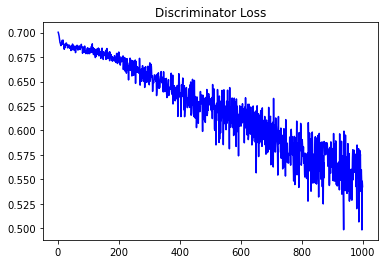

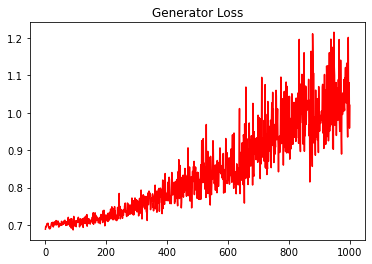

In [8]:
performanceMetrics.plotTrainingLoss2(discLossG1,genLossG1,np.linspace(1,n_epochs,n_epochs).astype(int))

In [9]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)
sb.glue("GAN_1 Metrics",GAN1_metrics)

tensor([[ 0.3160],
        [ 0.5536],
        [-1.8542],
        [-2.4619],
        [-0.3003],
        [ 0.2059],
        [ 0.6106],
        [ 0.5286],
        [-1.1499],
        [ 0.2246],
        [ 0.8805],
        [ 0.7012],
        [-1.3903],
        [ 0.5314],
        [ 0.8763],
        [ 0.0949],
        [ 0.5273],
        [ 0.6434],
        [ 0.3563],
        [ 0.5393]], grad_fn=<MmBackward>)
tensor([[ 0.3523],
        [ 0.7282],
        [-1.5098],
        [-2.6099],
        [ 0.2748],
        [ 0.0736],
        [ 0.7058],
        [ 0.3755],
        [-1.6824],
        [ 0.1417],
        [ 0.6835],
        [ 0.7087],
        [-1.5252],
        [ 0.4416],
        [ 0.5889],
        [-0.2591],
        [ 0.4284],
        [ 0.6382],
        [ 0.4627],
        [ 0.3051]], grad_fn=<MmBackward>)
tensor([[ 0.3013],
        [ 0.7366],
        [-2.1015],
        [-1.9780],
        [-0.3589],
        [ 0.2010],
        [ 0.4354],
        [ 0.6080],
        [-1.2079],
        [ 0.1973],
    

tensor([[ 0.3970],
        [ 0.5919],
        [-0.8697],
        [-1.9068],
        [ 0.3216],
        [ 0.3026],
        [ 0.7648],
        [ 0.0106],
        [-1.8042],
        [ 0.2034],
        [ 0.8340],
        [ 0.6681],
        [-1.5093],
        [ 0.4302],
        [ 0.4794],
        [ 0.0350],
        [ 0.3759],
        [ 0.6404],
        [ 0.3901],
        [ 0.3565]], grad_fn=<MmBackward>)
tensor([[ 0.3692],
        [ 0.7428],
        [-2.1058],
        [-2.3013],
        [ 0.3000],
        [ 0.1662],
        [ 0.7826],
        [-0.0288],
        [-1.3973],
        [ 0.1973],
        [ 0.7780],
        [ 0.7219],
        [-1.6475],
        [ 0.4387],
        [ 0.6131],
        [ 0.1386],
        [ 0.4011],
        [ 0.6192],
        [ 0.3608],
        [ 0.3013]], grad_fn=<MmBackward>)
tensor([[ 0.2547],
        [ 0.4411],
        [-2.3360],
        [-1.6078],
        [-0.4032],
        [ 0.0918],
        [ 0.4854],
        [ 0.4497],
        [-1.5640],
        [ 0.1547],
    

tensor([[ 0.2661],
        [ 0.5803],
        [-0.3110],
        [-2.3748],
        [ 0.5025],
        [ 0.0718],
        [ 0.5327],
        [ 0.1743],
        [-1.4684],
        [ 0.2250],
        [ 0.8829],
        [ 0.6823],
        [-2.0428],
        [ 0.4738],
        [ 0.9197],
        [ 0.0874],
        [ 0.3963],
        [ 0.6427],
        [ 0.4190],
        [ 0.3058]], grad_fn=<MmBackward>)
tensor([[ 0.2660],
        [ 0.8021],
        [-0.9046],
        [-1.7664],
        [-0.4081],
        [ 0.2411],
        [ 1.0853],
        [ 0.5311],
        [-1.7803],
        [ 0.2166],
        [ 0.9584],
        [ 0.8084],
        [-1.2903],
        [ 0.4843],
        [ 0.4132],
        [ 0.2366],
        [ 0.6668],
        [ 0.6708],
        [ 0.3725],
        [ 0.3722]], grad_fn=<MmBackward>)
tensor([[ 0.2683],
        [ 0.8129],
        [-0.3248],
        [-1.9024],
        [ 0.7338],
        [ 0.4010],
        [ 0.4840],
        [ 0.0589],
        [-1.4828],
        [ 0.1669],
    

tensor([[ 0.1937],
        [ 0.7516],
        [-2.2568],
        [-2.5254],
        [ 0.3505],
        [ 0.1016],
        [ 0.6375],
        [ 0.4120],
        [-1.0918],
        [ 0.1981],
        [ 0.8588],
        [ 0.7117],
        [-1.2426],
        [ 0.3705],
        [ 0.9085],
        [ 0.2129],
        [ 0.4071],
        [ 0.6530],
        [ 0.3604],
        [ 0.2660]], grad_fn=<MmBackward>)
tensor([[ 0.2356],
        [ 0.5257],
        [-1.9672],
        [-1.7572],
        [ 0.5387],
        [ 0.2510],
        [ 0.6619],
        [ 0.2385],
        [-2.1168],
        [ 0.1837],
        [ 0.6779],
        [ 0.6473],
        [-1.3692],
        [ 0.3669],
        [ 0.5904],
        [ 0.0960],
        [ 0.3998],
        [ 0.6663],
        [ 0.4096],
        [ 0.3017]], grad_fn=<MmBackward>)
tensor([[ 0.2487],
        [ 0.6903],
        [-0.1940],
        [-2.1216],
        [-0.4030],
        [ 0.3895],
        [ 0.9540],
        [ 0.4701],
        [-1.5706],
        [ 0.2564],
    

tensor([[ 0.1649],
        [ 0.7022],
        [-1.9039],
        [-2.0718],
        [ 0.2790],
        [ 0.0647],
        [ 0.6038],
        [ 0.0942],
        [-2.0106],
        [ 0.1250],
        [ 0.7921],
        [ 0.6048],
        [-1.2540],
        [ 0.3460],
        [ 0.4706],
        [-0.0511],
        [ 0.5141],
        [ 0.7696],
        [ 0.3438],
        [ 0.2504]], grad_fn=<MmBackward>)
tensor([[ 0.3315],
        [ 0.7031],
        [-2.0768],
        [-2.1289],
        [ 0.3068],
        [ 0.0364],
        [ 0.5054],
        [ 0.4443],
        [-1.1089],
        [ 0.1234],
        [ 0.8306],
        [ 0.7868],
        [-1.9227],
        [ 0.3828],
        [ 0.7467],
        [-0.0374],
        [ 0.3881],
        [ 0.6571],
        [ 0.3774],
        [ 0.3651]], grad_fn=<MmBackward>)
tensor([[ 0.3600],
        [ 0.5284],
        [-1.6484],
        [-2.0503],
        [ 0.3576],
        [ 0.0342],
        [ 0.8390],
        [ 0.2045],
        [-1.2409],
        [ 0.0808],
    

tensor([[ 0.3210],
        [ 0.7333],
        [-1.9434],
        [-2.0148],
        [-0.3034],
        [ 0.1580],
        [ 0.4519],
        [ 0.4725],
        [-1.1382],
        [ 0.1430],
        [ 0.8287],
        [ 0.5593],
        [-1.3647],
        [ 0.4531],
        [ 0.5729],
        [ 0.0399],
        [ 0.6204],
        [ 0.5961],
        [ 0.2654],
        [ 0.5943]], grad_fn=<MmBackward>)
tensor([[ 0.3394],
        [ 0.6366],
        [-1.8629],
        [-2.3011],
        [-0.3580],
        [ 0.1831],
        [ 0.5406],
        [ 0.3894],
        [-1.2029],
        [ 0.3296],
        [ 0.7459],
        [ 0.7041],
        [-1.3052],
        [ 0.4157],
        [ 0.8710],
        [ 0.2193],
        [ 0.6047],
        [ 0.6645],
        [ 0.3685],
        [ 0.4605]], grad_fn=<MmBackward>)
tensor([[ 0.2758],
        [ 0.6769],
        [ 0.2025],
        [-1.9197],
        [ 0.3090],
        [ 0.1161],
        [ 0.5532],
        [ 0.0531],
        [-1.9263],
        [ 0.2172],
    

tensor([[ 0.3241],
        [ 0.7354],
        [-1.9385],
        [-1.8463],
        [ 0.2839],
        [ 0.0744],
        [ 0.7457],
        [ 0.3451],
        [-1.3621],
        [ 0.1011],
        [ 0.8857],
        [ 0.7420],
        [-1.2339],
        [ 0.3763],
        [ 0.4582],
        [-0.1799],
        [ 0.4453],
        [ 0.6310],
        [ 0.2964],
        [ 0.2813]], grad_fn=<MmBackward>)
tensor([[ 0.3784],
        [ 0.5459],
        [-2.3254],
        [-1.6587],
        [ 0.9313],
        [ 0.1995],
        [ 0.5398],
        [ 0.3729],
        [-1.2354],
        [ 0.1578],
        [ 0.5099],
        [ 0.8198],
        [-1.3309],
        [ 0.3983],
        [ 0.9201],
        [-0.1100],
        [ 0.6125],
        [ 0.5876],
        [ 0.4991],
        [ 0.2325]], grad_fn=<MmBackward>)
tensor([[ 0.2321],
        [ 0.8407],
        [ 0.5638],
        [-2.0198],
        [ 0.3016],
        [ 0.2939],
        [ 0.5760],
        [ 0.1466],
        [-1.9580],
        [ 0.0578],
    

tensor([[ 0.3526],
        [ 0.7796],
        [-2.0257],
        [-2.1177],
        [-0.4463],
        [ 0.1183],
        [ 0.7295],
        [ 0.6375],
        [-1.2063],
        [ 0.2557],
        [ 0.9018],
        [ 0.6954],
        [-1.7043],
        [ 0.3996],
        [ 0.6098],
        [ 0.2886],
        [ 0.3327],
        [ 0.6817],
        [ 0.3597],
        [ 0.3991]], grad_fn=<MmBackward>)
tensor([[ 0.2396],
        [ 0.7039],
        [-2.2808],
        [-2.1249],
        [-0.3086],
        [ 0.2485],
        [ 0.9610],
        [ 0.6000],
        [-1.3333],
        [ 0.2774],
        [ 0.8358],
        [ 0.5773],
        [-1.1265],
        [ 0.4287],
        [ 0.8285],
        [ 0.1822],
        [ 0.6235],
        [ 0.5906],
        [ 0.3203],
        [ 0.4465]], grad_fn=<MmBackward>)
tensor([[ 0.2989],
        [ 0.7403],
        [-2.1717],
        [-1.6917],
        [ 0.5813],
        [ 0.0944],
        [ 0.4140],
        [ 0.4345],
        [-1.6262],
        [ 0.1717],
    

tensor([[ 0.2237],
        [ 0.6721],
        [-1.5987],
        [-2.1670],
        [-0.3085],
        [ 0.2405],
        [ 0.5405],
        [ 0.7205],
        [-1.4867],
        [ 0.3260],
        [ 0.6588],
        [ 0.6701],
        [-1.4546],
        [ 0.6663],
        [ 0.9264],
        [-0.0449],
        [ 0.4475],
        [ 0.5809],
        [ 0.3633],
        [ 0.4335]], grad_fn=<MmBackward>)
tensor([[ 0.3093],
        [ 0.6137],
        [-1.7473],
        [-1.5989],
        [ 0.5156],
        [ 0.1460],
        [ 0.5118],
        [ 0.0591],
        [-2.0548],
        [ 0.1958],
        [ 0.7196],
        [ 0.6643],
        [-1.6022],
        [ 0.4377],
        [ 0.5538],
        [ 0.0616],
        [ 0.5267],
        [ 0.6501],
        [ 0.4184],
        [ 0.3160]], grad_fn=<MmBackward>)
tensor([[ 0.5281],
        [ 0.7513],
        [-1.6982],
        [-2.3201],
        [-0.3735],
        [ 0.3700],
        [ 0.4861],
        [ 0.6039],
        [-1.0707],
        [ 0.2463],
    

tensor([[ 0.1833],
        [ 0.7066],
        [-2.1914],
        [-2.0065],
        [ 0.3687],
        [ 0.1700],
        [ 0.5951],
        [ 0.4662],
        [-1.6673],
        [ 0.1503],
        [ 0.8523],
        [ 0.5969],
        [-1.2073],
        [ 0.4331],
        [ 0.6371],
        [ 0.0521],
        [ 0.3601],
        [ 0.6263],
        [ 0.2221],
        [ 0.2731]], grad_fn=<MmBackward>)
tensor([[ 0.4137],
        [ 0.4839],
        [-1.5531],
        [-2.4338],
        [ 0.4639],
        [ 0.1472],
        [ 0.4919],
        [-0.0301],
        [-1.3615],
        [ 0.1698],
        [ 0.6584],
        [ 0.7067],
        [-1.3072],
        [ 0.3923],
        [ 0.6111],
        [-0.0940],
        [ 0.3571],
        [ 0.6563],
        [ 0.3737],
        [ 0.3647]], grad_fn=<MmBackward>)
tensor([[ 0.3655],
        [ 0.4768],
        [-0.7136],
        [-1.7588],
        [ 0.3159],
        [ 0.0770],
        [ 0.8740],
        [ 0.1225],
        [-1.7808],
        [ 0.1997],
    

tensor([[ 0.2994],
        [ 0.5752],
        [-2.0453],
        [-2.1533],
        [ 0.3325],
        [ 0.1476],
        [ 0.6736],
        [ 0.2180],
        [-1.3515],
        [ 0.2067],
        [ 0.8717],
        [ 0.7399],
        [-1.4667],
        [ 0.4749],
        [ 0.6699],
        [-0.0265],
        [ 0.3975],
        [ 0.6967],
        [ 0.4113],
        [ 0.3734]], grad_fn=<MmBackward>)
tensor([[ 0.5196],
        [ 0.5639],
        [-2.1698],
        [-1.6037],
        [ 0.8728],
        [ 0.1051],
        [ 0.5256],
        [ 0.1967],
        [-1.5983],
        [ 0.1523],
        [ 0.8077],
        [ 0.7137],
        [-1.4065],
        [ 0.4147],
        [ 0.9469],
        [-0.0287],
        [ 0.5535],
        [ 0.6410],
        [ 0.3190],
        [ 0.3815]], grad_fn=<MmBackward>)
tensor([[ 0.2880],
        [ 0.7947],
        [-1.8162],
        [-1.3734],
        [ 0.1538],
        [ 0.0835],
        [ 0.4216],
        [ 0.3716],
        [-1.1248],
        [ 0.1454],
    

tensor([[ 0.4861],
        [ 0.6402],
        [-0.3476],
        [-2.6159],
        [-0.0982],
        [ 0.1990],
        [ 0.6534],
        [ 0.6795],
        [-1.4373],
        [ 0.1638],
        [ 0.9808],
        [ 0.5949],
        [-2.0762],
        [ 0.4344],
        [ 1.0286],
        [-0.0253],
        [ 0.3323],
        [ 0.6232],
        [ 0.4010],
        [ 0.3377]], grad_fn=<MmBackward>)
tensor([[ 0.2760],
        [ 0.6008],
        [-1.6810],
        [-1.8888],
        [-0.3163],
        [ 0.1732],
        [ 0.6175],
        [ 0.5952],
        [-1.6117],
        [ 0.1976],
        [ 0.4798],
        [ 0.6358],
        [-1.7736],
        [ 0.4935],
        [ 0.7121],
        [ 0.0778],
        [ 0.5716],
        [ 0.7161],
        [ 0.4689],
        [ 0.4904]], grad_fn=<MmBackward>)
tensor([[ 0.4440],
        [ 0.7351],
        [-1.8439],
        [-2.1073],
        [-0.3271],
        [ 0.2364],
        [ 0.6781],
        [ 0.5562],
        [-1.2714],
        [ 0.3295],
    

tensor([[ 0.2299],
        [ 0.4763],
        [-2.2830],
        [-1.6781],
        [ 0.3669],
        [ 0.2130],
        [ 0.5415],
        [ 0.2246],
        [-2.1741],
        [ 0.1181],
        [ 0.8509],
        [ 0.6694],
        [-1.3977],
        [ 0.4087],
        [ 0.5967],
        [ 0.1106],
        [ 0.5734],
        [ 0.5919],
        [ 0.3743],
        [ 0.6323]], grad_fn=<MmBackward>)
tensor([[ 0.4031],
        [ 0.7624],
        [-1.8107],
        [-1.7069],
        [ 1.0827],
        [ 0.1955],
        [ 0.5555],
        [-0.2054],
        [-1.5660],
        [ 0.0581],
        [ 0.7776],
        [ 0.5969],
        [-1.4017],
        [ 0.4472],
        [ 0.8835],
        [ 0.0470],
        [ 0.3497],
        [ 0.5841],
        [ 0.2795],
        [ 0.2677]], grad_fn=<MmBackward>)
tensor([[ 0.2627],
        [ 0.8215],
        [-0.6537],
        [-2.1604],
        [-0.4233],
        [ 0.2941],
        [ 0.7880],
        [ 0.4331],
        [-1.3296],
        [ 0.0985],
    

tensor([[ 0.5607],
        [ 0.5938],
        [-0.8694],
        [-2.0567],
        [ 0.3499],
        [ 0.0479],
        [ 0.4839],
        [ 0.2331],
        [-1.5606],
        [ 0.2334],
        [ 0.8762],
        [ 0.6767],
        [-1.9160],
        [ 0.3788],
        [ 0.8331],
        [-0.0318],
        [ 0.4566],
        [ 0.6455],
        [ 0.3867],
        [ 0.2564]], grad_fn=<MmBackward>)
tensor([[ 0.2629],
        [ 0.7818],
        [-2.1345],
        [-1.9514],
        [-0.4012],
        [ 0.1338],
        [ 0.4418],
        [ 0.5652],
        [-1.0486],
        [ 0.2206],
        [ 0.7547],
        [ 0.6453],
        [-0.9833],
        [ 0.3771],
        [ 0.3567],
        [-0.0022],
        [ 0.4178],
        [ 0.6665],
        [ 0.4134],
        [ 0.4855]], grad_fn=<MmBackward>)
tensor([[ 2.7236e-01],
        [ 5.6364e-01],
        [ 4.4670e-01],
        [-2.0219e+00],
        [ 3.9396e-01],
        [ 2.1970e-01],
        [ 5.2893e-01],
        [ 1.2103e-01],
        [-

tensor([[ 0.3915],
        [ 0.7827],
        [-1.2815],
        [-1.9572],
        [ 0.7814],
        [ 0.2396],
        [ 0.5573],
        [ 0.1534],
        [-1.8902],
        [ 0.1827],
        [ 0.7868],
        [ 0.5542],
        [-1.4304],
        [ 0.4446],
        [ 0.7843],
        [ 0.0999],
        [ 0.3967],
        [ 0.6489],
        [ 0.3796],
        [ 0.2769]], grad_fn=<MmBackward>)
tensor([[ 0.2212],
        [ 0.5996],
        [-2.0391],
        [-2.0100],
        [ 0.5232],
        [ 0.1532],
        [ 0.3171],
        [ 0.4218],
        [-1.2834],
        [ 0.1448],
        [ 0.6639],
        [ 0.7495],
        [-1.6305],
        [ 0.4003],
        [ 0.9139],
        [-0.0576],
        [ 0.3460],
        [ 0.5837],
        [ 0.3868],
        [ 0.3940]], grad_fn=<MmBackward>)
tensor([[ 0.3378],
        [ 0.5312],
        [ 0.2705],
        [-2.0085],
        [ 0.5191],
        [ 0.1420],
        [ 0.3249],
        [-0.0125],
        [-1.8273],
        [ 0.2206],
    

tensor([[ 0.4408],
        [ 0.7988],
        [-1.4634],
        [-1.8720],
        [-0.3389],
        [ 0.2139],
        [ 0.6387],
        [ 0.5127],
        [-1.6543],
        [ 0.1514],
        [ 0.9162],
        [ 0.8201],
        [-1.6592],
        [ 0.5138],
        [ 0.5254],
        [ 0.1131],
        [ 0.6537],
        [ 0.6547],
        [ 0.6071],
        [ 0.4135]], grad_fn=<MmBackward>)
tensor([[ 0.2440],
        [ 0.6833],
        [-1.5620],
        [-2.1838],
        [ 0.1979],
        [ 0.0833],
        [ 0.7149],
        [ 0.2777],
        [-1.4131],
        [ 0.1320],
        [ 0.8395],
        [ 0.6104],
        [-2.0274],
        [ 0.3543],
        [ 0.9593],
        [ 0.0370],
        [ 0.3871],
        [ 0.5289],
        [ 0.3557],
        [ 0.2661]], grad_fn=<MmBackward>)
tensor([[ 0.2841],
        [ 0.5159],
        [ 0.4681],
        [-2.3283],
        [-0.3364],
        [ 0.2637],
        [ 0.7363],
        [ 0.5518],
        [-1.6615],
        [ 0.1161],
    

tensor([[ 0.1783],
        [ 0.5968],
        [-1.4772],
        [-2.3661],
        [ 0.6846],
        [ 0.0203],
        [ 0.6641],
        [ 0.1714],
        [-1.6687],
        [ 0.1827],
        [ 0.8812],
        [ 0.7222],
        [-1.4106],
        [ 0.4714],
        [ 0.8598],
        [ 0.1541],
        [ 0.4425],
        [ 0.6502],
        [ 0.3409],
        [ 0.2060]], grad_fn=<MmBackward>)
tensor([[ 0.1731],
        [ 0.6931],
        [-2.1310],
        [-1.8553],
        [ 0.3558],
        [ 0.1631],
        [ 0.4600],
        [ 0.3718],
        [-1.7011],
        [ 0.1910],
        [ 0.8020],
        [ 0.7568],
        [-1.6124],
        [ 0.3984],
        [ 0.7880],
        [-0.0260],
        [ 0.4726],
        [ 0.6214],
        [ 0.3585],
        [ 0.6353]], grad_fn=<MmBackward>)
tensor([[ 0.1536],
        [ 0.9006],
        [ 0.2640],
        [-2.3265],
        [-0.3367],
        [ 0.2882],
        [ 0.7095],
        [ 0.9621],
        [-1.7412],
        [ 0.1489],
    

tensor([[ 0.4322],
        [ 0.7665],
        [-2.1524],
        [-1.9124],
        [ 0.2657],
        [ 0.1213],
        [ 0.7328],
        [ 0.5545],
        [-2.0080],
        [ 0.1176],
        [ 0.6631],
        [ 0.5771],
        [-1.3394],
        [ 0.3495],
        [ 0.7044],
        [ 0.0698],
        [ 0.3427],
        [ 0.6133],
        [ 0.3701],
        [ 0.2467]], grad_fn=<MmBackward>)
tensor([[ 0.2975],
        [ 0.4442],
        [-1.9667],
        [-2.4769],
        [ 0.4258],
        [ 0.1035],
        [ 0.5988],
        [ 0.2795],
        [-1.1203],
        [ 0.1922],
        [ 0.8302],
        [ 0.6167],
        [-1.7704],
        [ 0.4212],
        [ 0.8202],
        [ 0.0289],
        [ 0.3009],
        [ 0.6188],
        [ 0.3798],
        [ 0.2384]], grad_fn=<MmBackward>)
tensor([[ 0.2844],
        [ 0.8269],
        [ 0.1699],
        [-2.3417],
        [ 0.4605],
        [ 0.2903],
        [ 0.6397],
        [-0.0297],
        [-1.8052],
        [ 0.1553],
    

tensor([[ 0.3976],
        [ 0.7227],
        [-1.3589],
        [-1.6628],
        [-0.3774],
        [ 0.2732],
        [ 0.7070],
        [ 0.5647],
        [-2.1053],
        [ 0.2734],
        [ 0.9315],
        [ 0.5644],
        [-1.7965],
        [ 0.4511],
        [ 0.5814],
        [ 0.2556],
        [ 0.4716],
        [ 0.6780],
        [ 0.4388],
        [ 0.4827]], grad_fn=<MmBackward>)
tensor([[ 0.1565],
        [ 0.5001],
        [-2.1722],
        [-1.5659],
        [ 0.3787],
        [ 0.1293],
        [ 0.5901],
        [ 0.1752],
        [-2.0310],
        [ 0.1852],
        [ 0.5947],
        [ 0.6935],
        [-1.3213],
        [ 0.4120],
        [ 0.7012],
        [-0.0559],
        [ 0.5540],
        [ 0.6198],
        [ 0.5616],
        [ 0.2503]], grad_fn=<MmBackward>)
tensor([[ 0.2981],
        [ 0.6160],
        [-1.4200],
        [-2.1653],
        [ 0.2936],
        [ 0.1231],
        [ 0.9808],
        [ 0.2350],
        [-1.6645],
        [ 0.0775],
    

tensor([[ 0.2480],
        [ 0.5071],
        [ 0.8837],
        [-2.0981],
        [-0.3344],
        [ 0.3511],
        [ 0.5760],
        [ 0.3232],
        [-1.2998],
        [ 0.2241],
        [ 0.6051],
        [ 0.5671],
        [-2.1913],
        [ 0.3840],
        [ 0.4801],
        [ 0.0052],
        [ 0.4548],
        [ 0.6957],
        [ 0.4777],
        [ 0.4038]], grad_fn=<MmBackward>)
tensor([[ 0.1963],
        [ 0.5533],
        [-1.3340],
        [-1.9454],
        [ 0.4565],
        [ 0.1944],
        [ 0.4563],
        [ 0.0953],
        [-1.7155],
        [ 0.1762],
        [ 0.7149],
        [ 0.7279],
        [-1.3238],
        [ 0.4418],
        [ 0.6146],
        [ 0.0079],
        [ 0.5789],
        [ 0.6534],
        [ 0.4062],
        [ 0.3331]], grad_fn=<MmBackward>)
tensor([[ 0.4370],
        [ 0.7791],
        [-1.4797],
        [-2.1637],
        [ 0.3917],
        [ 0.1472],
        [ 0.5532],
        [ 0.3646],
        [-1.5765],
        [-0.0023],
    

tensor([[ 0.2980],
        [ 0.7296],
        [-0.2375],
        [-2.1429],
        [ 0.3467],
        [ 0.2000],
        [ 0.5764],
        [ 0.2262],
        [-1.9085],
        [ 0.1212],
        [ 0.8200],
        [ 0.6769],
        [-2.0444],
        [ 0.3712],
        [ 1.0330],
        [-0.1306],
        [ 0.4928],
        [ 0.6355],
        [ 0.4181],
        [ 0.3117]], grad_fn=<MmBackward>)
tensor([[ 0.1748],
        [ 0.6667],
        [-0.0248],
        [-2.0039],
        [ 0.8605],
        [ 0.2002],
        [ 0.5278],
        [ 0.1084],
        [-2.2593],
        [ 0.0720],
        [ 0.8545],
        [ 0.4870],
        [-1.7721],
        [ 0.4059],
        [ 0.9723],
        [-0.0388],
        [ 0.5678],
        [ 0.5328],
        [ 0.2820],
        [ 0.3537]], grad_fn=<MmBackward>)
tensor([[ 0.3106],
        [ 0.7779],
        [ 0.4673],
        [-2.2830],
        [-0.3528],
        [ 0.3155],
        [ 0.9176],
        [ 0.5945],
        [-1.4045],
        [ 0.1914],
    

tensor([[ 0.2606],
        [ 0.7052],
        [-2.3829],
        [-1.6398],
        [ 0.3145],
        [ 0.2507],
        [ 0.3422],
        [ 0.2567],
        [-2.0489],
        [ 0.1464],
        [ 0.7855],
        [ 0.6953],
        [-1.6261],
        [ 0.3804],
        [ 0.6682],
        [-0.1306],
        [ 0.6124],
        [ 0.5310],
        [ 0.4942],
        [ 0.6200]], grad_fn=<MmBackward>)
tensor([[ 0.4211],
        [ 0.8331],
        [ 0.5159],
        [-2.3649],
        [ 0.3550],
        [ 0.2655],
        [ 0.6474],
        [ 0.1686],
        [-1.6825],
        [ 0.2028],
        [ 0.9031],
        [ 0.5148],
        [-1.6965],
        [ 0.4669],
        [ 0.9208],
        [ 0.0847],
        [ 0.4366],
        [ 0.6352],
        [ 0.2476],
        [ 0.3078]], grad_fn=<MmBackward>)
tensor([[ 0.2076],
        [ 0.5203],
        [-1.9484],
        [-2.4476],
        [-0.2882],
        [ 0.3414],
        [ 0.4978],
        [ 0.2787],
        [-1.5027],
        [ 0.1364],
    

tensor([[ 0.2616],
        [ 0.6216],
        [-1.7033],
        [-2.0453],
        [-0.3894],
        [ 0.2451],
        [ 0.7387],
        [ 0.5186],
        [-1.5332],
        [ 0.1824],
        [ 0.9215],
        [ 0.5937],
        [-1.3127],
        [ 0.4463],
        [ 0.6087],
        [ 0.2071],
        [ 0.5758],
        [ 0.6883],
        [ 0.4036],
        [ 0.4171]], grad_fn=<MmBackward>)
tensor([[ 0.2750],
        [ 0.7112],
        [-2.3651],
        [-2.3116],
        [ 0.3219],
        [ 0.2114],
        [ 0.4551],
        [ 0.3751],
        [-1.1956],
        [ 0.1985],
        [ 0.6970],
        [ 0.7153],
        [-1.4646],
        [ 0.4429],
        [ 0.8653],
        [ 0.0765],
        [ 0.4578],
        [ 0.5767],
        [ 0.3409],
        [ 0.6562]], grad_fn=<MmBackward>)
tensor([[ 0.2230],
        [ 0.6874],
        [-2.3086],
        [-1.9206],
        [ 0.5088],
        [ 0.2448],
        [ 0.4224],
        [ 0.1378],
        [-1.6595],
        [ 0.1656],
    

tensor([[ 0.2710],
        [ 0.7368],
        [-2.0698],
        [-1.3257],
        [-0.4036],
        [ 0.2477],
        [ 0.8348],
        [ 0.3921],
        [-1.9962],
        [ 0.1931],
        [ 0.8616],
        [ 0.5752],
        [-1.2228],
        [ 0.4281],
        [ 0.8030],
        [ 0.1816],
        [ 0.6364],
        [ 0.7690],
        [ 0.3431],
        [ 0.4795]], grad_fn=<MmBackward>)
tensor([[ 3.4385e-01],
        [ 7.3933e-01],
        [-8.1105e-01],
        [-2.2323e+00],
        [ 2.3449e-01],
        [ 3.8415e-01],
        [ 6.5437e-01],
        [ 3.7803e-01],
        [-1.3540e+00],
        [ 1.0796e-01],
        [ 5.9696e-01],
        [ 7.8205e-01],
        [-1.6002e+00],
        [ 3.1252e-01],
        [ 9.9099e-01],
        [ 9.5161e-04],
        [ 4.7543e-01],
        [ 6.2643e-01],
        [ 4.0005e-01],
        [ 2.4502e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3182],
        [ 0.8591],
        [-1.0473],
        [-2.0748],
        [-0.4323],
        [ 0.2589],


tensor([[ 0.3653],
        [ 0.6773],
        [ 0.6045],
        [-2.0145],
        [ 0.2636],
        [ 0.1659],
        [ 0.5480],
        [ 0.1033],
        [-2.2084],
        [ 0.0440],
        [ 0.8544],
        [ 0.5700],
        [-1.7753],
        [ 0.4676],
        [ 0.6476],
        [-0.1935],
        [ 0.6857],
        [ 0.6098],
        [ 0.3765],
        [ 0.2565]], grad_fn=<MmBackward>)
tensor([[ 0.2836],
        [ 0.4854],
        [-1.7968],
        [-2.0158],
        [-0.3724],
        [ 0.2380],
        [ 0.7828],
        [ 0.4348],
        [-1.1663],
        [ 0.1604],
        [ 0.8757],
        [ 0.5576],
        [-1.2845],
        [ 0.4412],
        [ 0.5269],
        [-0.0414],
        [ 0.6070],
        [ 0.6020],
        [ 0.4162],
        [ 0.4281]], grad_fn=<MmBackward>)
tensor([[ 0.2934],
        [ 0.5720],
        [-0.4321],
        [-2.5556],
        [ 0.3152],
        [ 0.1243],
        [ 0.5489],
        [ 0.3688],
        [-1.4709],
        [ 0.2089],
    

tensor([[ 0.1877],
        [ 0.5501],
        [-1.3104],
        [-2.3863],
        [ 0.3571],
        [ 0.1577],
        [ 0.5795],
        [ 0.1829],
        [-1.8937],
        [ 0.0841],
        [ 0.8948],
        [ 0.4415],
        [-1.8941],
        [ 0.4339],
        [ 0.5802],
        [-0.1457],
        [ 0.4862],
        [ 0.6895],
        [ 0.6515],
        [ 0.2322]], grad_fn=<MmBackward>)
tensor([[ 0.3335],
        [ 0.5210],
        [-0.3147],
        [-2.1153],
        [ 0.2791],
        [ 0.1978],
        [ 0.9160],
        [ 0.1734],
        [-2.2035],
        [ 0.1642],
        [ 0.8310],
        [ 0.4979],
        [-1.6945],
        [ 0.4196],
        [ 0.9590],
        [ 0.0398],
        [ 0.5939],
        [ 0.6199],
        [ 0.3990],
        [ 0.5304]], grad_fn=<MmBackward>)
tensor([[ 0.4647],
        [ 0.7898],
        [ 0.1106],
        [-1.8393],
        [ 0.3658],
        [ 0.2502],
        [ 0.7830],
        [ 0.0959],
        [-1.4957],
        [ 0.1003],
    

tensor([[ 0.3326],
        [ 0.7548],
        [-2.2830],
        [-1.8350],
        [ 0.7821],
        [ 0.2086],
        [ 0.4694],
        [ 0.1418],
        [-1.3984],
        [ 0.0792],
        [ 0.7217],
        [ 0.6780],
        [-1.2224],
        [ 0.4518],
        [ 0.8074],
        [ 0.0403],
        [ 0.4059],
        [ 0.6639],
        [ 0.3110],
        [ 0.3092]], grad_fn=<MmBackward>)
tensor([[ 0.4866],
        [ 0.7734],
        [-1.3232],
        [-2.0679],
        [-0.3434],
        [ 0.1082],
        [ 0.6380],
        [ 0.7191],
        [-1.8872],
        [ 0.2390],
        [ 0.8783],
        [ 0.6521],
        [-1.4574],
        [ 0.4217],
        [ 0.6235],
        [ 0.1617],
        [ 0.4330],
        [ 0.6233],
        [ 0.3943],
        [ 0.3800]], grad_fn=<MmBackward>)
tensor([[ 2.4121e-01],
        [ 5.2403e-01],
        [ 5.9025e-01],
        [-2.0287e+00],
        [ 1.6724e-01],
        [ 1.9403e-01],
        [ 6.7455e-01],
        [ 3.7261e-01],
        [-

tensor([[ 0.2378],
        [ 0.7286],
        [-2.0761],
        [-2.0600],
        [-0.3013],
        [ 0.2802],
        [ 0.5763],
        [ 0.6495],
        [-1.6063],
        [ 0.3102],
        [ 0.6634],
        [ 0.5839],
        [-1.7121],
        [ 0.4845],
        [ 0.9368],
        [ 0.1226],
        [ 0.5201],
        [ 0.6812],
        [ 0.3722],
        [ 0.4723]], grad_fn=<MmBackward>)
tensor([[ 0.2961],
        [ 0.4814],
        [ 0.3825],
        [-1.9672],
        [-0.4080],
        [ 0.2591],
        [ 1.0828],
        [ 0.4380],
        [-2.1539],
        [ 0.1710],
        [ 0.9400],
        [ 0.3358],
        [-1.5885],
        [ 0.4265],
        [ 1.0581],
        [ 0.1065],
        [ 0.5851],
        [ 0.6706],
        [ 0.4128],
        [ 0.4256]], grad_fn=<MmBackward>)
tensor([[ 0.3387],
        [ 0.6398],
        [-0.4339],
        [-2.0906],
        [ 0.5331],
        [ 0.1118],
        [ 0.4606],
        [ 0.0919],
        [-2.0489],
        [ 0.2291],
    

tensor([[ 0.3917],
        [ 0.7767],
        [-1.3805],
        [-2.3603],
        [ 0.3029],
        [ 0.0684],
        [ 0.5045],
        [-0.0882],
        [-1.4402],
        [ 0.0127],
        [ 0.7975],
        [ 0.5319],
        [-1.7566],
        [ 0.3730],
        [ 0.9456],
        [-0.0667],
        [ 0.6338],
        [ 0.5624],
        [ 0.5251],
        [ 0.1951]], grad_fn=<MmBackward>)
tensor([[ 0.2843],
        [ 0.7735],
        [-0.9346],
        [-1.7182],
        [ 0.8015],
        [ 0.2998],
        [ 0.6160],
        [ 0.3212],
        [-1.4035],
        [ 0.0948],
        [ 0.7985],
        [ 0.7932],
        [-1.4253],
        [ 0.4433],
        [ 0.8947],
        [-0.0740],
        [ 0.4135],
        [ 0.5817],
        [ 0.3555],
        [ 0.2290]], grad_fn=<MmBackward>)
tensor([[ 0.3030],
        [ 0.8054],
        [ 0.3318],
        [-1.7269],
        [-0.3912],
        [ 0.1990],
        [ 0.8828],
        [ 1.0649],
        [-2.1829],
        [ 0.0929],
    

tensor([[ 0.1623],
        [ 0.6714],
        [-0.4026],
        [-1.9380],
        [ 0.4466],
        [ 0.0735],
        [ 0.5108],
        [ 0.3018],
        [-2.2285],
        [ 0.1680],
        [ 0.8697],
        [ 0.7571],
        [-2.0290],
        [ 0.5262],
        [ 0.8809],
        [-0.1333],
        [ 0.5822],
        [ 0.6103],
        [ 0.4498],
        [ 0.3316]], grad_fn=<MmBackward>)
tensor([[ 0.3353],
        [ 0.8054],
        [-1.2869],
        [-2.0281],
        [-0.3962],
        [ 0.1388],
        [ 0.6968],
        [ 0.9333],
        [-1.2826],
        [ 0.1833],
        [ 0.3803],
        [ 0.5822],
        [-1.7591],
        [ 0.7912],
        [ 0.6099],
        [ 0.1903],
        [ 0.7223],
        [ 0.7906],
        [ 0.5218],
        [ 0.4702]], grad_fn=<MmBackward>)
tensor([[ 0.3515],
        [ 0.8008],
        [-0.8771],
        [-1.7659],
        [ 0.3575],
        [ 0.1435],
        [ 0.6648],
        [ 0.1559],
        [-1.9776],
        [ 0.1109],
    

tensor([[ 0.3596],
        [ 0.5523],
        [ 0.0556],
        [-2.0502],
        [ 0.6600],
        [ 0.1859],
        [ 0.5659],
        [ 0.1641],
        [-1.5732],
        [ 0.0839],
        [ 0.8559],
        [ 0.4506],
        [-1.5793],
        [ 0.5170],
        [ 0.4465],
        [-0.1250],
        [ 0.3582],
        [ 0.6916],
        [ 0.4097],
        [ 0.3109]], grad_fn=<MmBackward>)
tensor([[ 0.2510],
        [ 0.8187],
        [ 0.1698],
        [-2.5477],
        [ 0.3745],
        [ 0.1992],
        [ 0.5587],
        [ 0.3880],
        [-1.9548],
        [ 0.1215],
        [ 0.6715],
        [ 0.7371],
        [-1.8025],
        [ 0.4235],
        [ 1.0369],
        [-0.1738],
        [ 0.5449],
        [ 0.7662],
        [ 0.2979],
        [ 0.3938]], grad_fn=<MmBackward>)
tensor([[ 0.3303],
        [ 0.5633],
        [ 0.2435],
        [-2.1812],
        [-0.4259],
        [ 0.2386],
        [ 0.8949],
        [ 0.4135],
        [-1.4239],
        [ 0.1981],
    

tensor([[ 0.2639],
        [ 0.6986],
        [-2.1901],
        [-1.9052],
        [-0.3032],
        [ 0.4149],
        [ 0.7483],
        [ 0.6654],
        [-1.1877],
        [ 0.0484],
        [ 0.8615],
        [ 0.7539],
        [-1.4085],
        [ 0.4374],
        [ 0.8380],
        [-0.0078],
        [ 0.6411],
        [ 0.6274],
        [ 0.4991],
        [ 0.3934]], grad_fn=<MmBackward>)
tensor([[ 0.3019],
        [ 0.5178],
        [-1.5044],
        [-2.2632],
        [ 0.3758],
        [ 0.2488],
        [ 0.9012],
        [-0.3382],
        [-1.1493],
        [ 0.1022],
        [ 0.7633],
        [ 0.7420],
        [-1.2950],
        [ 0.5274],
        [ 0.4221],
        [ 0.1588],
        [ 0.4840],
        [ 0.5847],
        [ 0.3893],
        [ 0.1721]], grad_fn=<MmBackward>)
tensor([[ 0.3795],
        [ 0.7598],
        [ 0.3958],
        [-2.3954],
        [-0.4463],
        [ 0.1665],
        [ 0.4992],
        [ 0.4655],
        [-1.5130],
        [ 0.1184],
    

tensor([[ 0.2944],
        [ 0.4552],
        [-2.2647],
        [-2.0461],
        [ 0.2951],
        [ 0.1528],
        [ 0.6302],
        [ 0.4245],
        [-1.2010],
        [ 0.1339],
        [ 0.6438],
        [ 0.5538],
        [-1.6835],
        [ 0.4112],
        [ 0.8696],
        [-0.0945],
        [ 0.4314],
        [ 0.6878],
        [ 0.3812],
        [ 0.3008]], grad_fn=<MmBackward>)
tensor([[ 0.2854],
        [ 0.6660],
        [-1.7714],
        [-1.7584],
        [-0.3341],
        [ 0.1975],
        [ 0.7028],
        [ 0.4859],
        [-1.8606],
        [ 0.2863],
        [ 0.9286],
        [ 0.6157],
        [-1.3857],
        [ 0.4816],
        [ 0.9619],
        [ 0.1353],
        [ 0.6037],
        [ 0.6578],
        [ 0.3888],
        [ 0.4419]], grad_fn=<MmBackward>)
tensor([[ 0.2573],
        [ 0.6959],
        [-2.0690],
        [-2.8458],
        [ 0.3769],
        [ 0.0280],
        [ 0.6417],
        [ 0.3275],
        [-1.2254],
        [ 0.1977],
    

tensor([[ 0.2553],
        [ 0.5935],
        [-0.6310],
        [-1.9108],
        [ 0.3151],
        [ 0.0872],
        [ 0.7165],
        [ 0.0548],
        [-2.1071],
        [ 0.1123],
        [ 0.8908],
        [ 0.5639],
        [-1.5523],
        [ 0.3788],
        [ 0.6257],
        [-0.0872],
        [ 0.5367],
        [ 0.6501],
        [ 0.6484],
        [ 0.3177]], grad_fn=<MmBackward>)
tensor([[ 0.2462],
        [ 0.7295],
        [-2.3831],
        [-2.0332],
        [ 0.8844],
        [ 0.1381],
        [ 0.3855],
        [ 0.2514],
        [-1.1494],
        [ 0.1722],
        [ 0.8126],
        [ 0.7545],
        [-1.6724],
        [ 0.5009],
        [ 0.8371],
        [ 0.2424],
        [ 0.3941],
        [ 0.6076],
        [ 0.3099],
        [ 0.3246]], grad_fn=<MmBackward>)
tensor([[ 0.2877],
        [ 0.5622],
        [ 0.4423],
        [-2.8118],
        [-0.3770],
        [ 0.2133],
        [ 0.6526],
        [ 0.3984],
        [-1.6674],
        [ 0.2022],
    

tensor([[ 0.2150],
        [ 0.6111],
        [-2.0908],
        [-1.8478],
        [-0.2514],
        [ 0.1806],
        [ 0.6052],
        [ 0.7760],
        [-1.4514],
        [ 0.1255],
        [ 0.8747],
        [ 0.5763],
        [-1.5937],
        [ 0.5107],
        [ 0.8914],
        [-0.0077],
        [ 0.6093],
        [ 0.6426],
        [ 0.3808],
        [ 0.4191]], grad_fn=<MmBackward>)
tensor([[ 0.2769],
        [ 0.5538],
        [-2.2218],
        [-1.6712],
        [ 0.3446],
        [ 0.2012],
        [ 0.8457],
        [ 0.1635],
        [-2.1075],
        [ 0.2515],
        [ 0.7776],
        [ 0.6966],
        [-1.4840],
        [ 0.3897],
        [ 0.8289],
        [ 0.1718],
        [ 0.4921],
        [ 0.6982],
        [ 0.3736],
        [ 0.3663]], grad_fn=<MmBackward>)
tensor([[ 0.5880],
        [ 0.6411],
        [-2.1478],
        [-2.1133],
        [-0.1680],
        [ 0.1741],
        [ 0.6311],
        [ 0.3450],
        [-1.0491],
        [ 0.2875],
    

tensor([[ 0.2358],
        [ 0.4795],
        [ 0.2843],
        [-2.4005],
        [ 0.4517],
        [ 0.2507],
        [ 0.4810],
        [-0.1291],
        [-1.7545],
        [-0.0339],
        [ 0.7948],
        [ 0.4799],
        [-1.7724],
        [ 0.4797],
        [ 0.5499],
        [-0.2003],
        [ 0.4762],
        [ 0.6216],
        [ 0.4333],
        [ 0.5278]], grad_fn=<MmBackward>)
tensor([[ 0.3322],
        [ 0.7826],
        [-1.0991],
        [-1.5412],
        [ 0.4325],
        [ 0.1844],
        [ 0.6743],
        [ 0.1585],
        [-1.1077],
        [ 0.1129],
        [ 0.7963],
        [ 0.8125],
        [-1.6301],
        [ 0.4550],
        [ 0.4729],
        [-0.0762],
        [ 0.5319],
        [ 0.5843],
        [ 0.2890],
        [ 0.2525]], grad_fn=<MmBackward>)
tensor([[ 0.3026],
        [ 0.9480],
        [-0.4763],
        [-2.1043],
        [ 0.7406],
        [ 0.2382],
        [ 0.6971],
        [ 0.8696],
        [-2.1679],
        [ 0.1363],
    

tensor([[ 0.4754],
        [ 0.5006],
        [-1.9741],
        [-2.7188],
        [ 0.2449],
        [ 0.2982],
        [ 0.6670],
        [ 0.4307],
        [-1.3153],
        [ 0.2025],
        [ 0.8476],
        [ 0.6994],
        [-1.3956],
        [ 0.3696],
        [ 0.6365],
        [ 0.0284],
        [ 0.4917],
        [ 0.6411],
        [ 0.4148],
        [ 0.2990]], grad_fn=<MmBackward>)
tensor([[ 0.2635],
        [ 0.5754],
        [-1.5716],
        [-2.3035],
        [ 0.3280],
        [ 0.2030],
        [ 0.6043],
        [ 0.1679],
        [-1.8412],
        [ 0.0593],
        [ 0.7397],
        [ 0.6116],
        [-1.5822],
        [ 0.3787],
        [ 0.9947],
        [ 0.0444],
        [ 0.4988],
        [ 0.6304],
        [ 0.5561],
        [ 0.3315]], grad_fn=<MmBackward>)
tensor([[ 0.2814],
        [ 0.5893],
        [-0.8400],
        [-2.5661],
        [-0.4171],
        [ 0.3316],
        [ 0.9223],
        [ 0.5899],
        [-1.3387],
        [ 0.2188],
    

tensor([[ 0.2765],
        [ 0.5069],
        [-2.0246],
        [-1.7495],
        [ 0.3719],
        [ 0.1053],
        [ 0.5707],
        [ 0.1605],
        [-1.6509],
        [ 0.1848],
        [ 0.8725],
        [ 0.7366],
        [-1.7968],
        [ 0.4619],
        [ 0.6446],
        [ 0.0406],
        [ 0.4203],
        [ 0.6895],
        [ 0.3607],
        [ 0.3820]], grad_fn=<MmBackward>)
tensor([[ 0.3900],
        [ 0.7205],
        [-2.2414],
        [-2.2920],
        [ 0.2894],
        [ 0.1192],
        [ 0.8909],
        [ 0.2989],
        [-1.0891],
        [ 0.1537],
        [ 0.8572],
        [ 0.7381],
        [-1.7098],
        [ 0.4582],
        [ 0.6071],
        [-0.0109],
        [ 0.4404],
        [ 0.6509],
        [ 0.3614],
        [ 0.2662]], grad_fn=<MmBackward>)
tensor([[ 0.2272],
        [ 0.4829],
        [ 0.3329],
        [-2.5328],
        [ 0.2417],
        [ 0.3391],
        [ 0.5889],
        [-0.1151],
        [-1.5478],
        [ 0.1346],
    

tensor([[ 0.2258],
        [ 0.7440],
        [-2.2102],
        [-1.9771],
        [ 0.3551],
        [ 0.1212],
        [ 0.5585],
        [ 0.3066],
        [-1.4625],
        [ 0.2505],
        [ 0.7657],
        [ 0.6919],
        [-1.6913],
        [ 0.4882],
        [ 0.4906],
        [ 0.0830],
        [ 0.3621],
        [ 0.6768],
        [ 0.3840],
        [ 0.3806]], grad_fn=<MmBackward>)
tensor([[ 0.3979],
        [ 0.7218],
        [-2.0044],
        [-2.2350],
        [-0.3287],
        [ 0.1123],
        [ 0.8364],
        [ 0.7076],
        [-1.5209],
        [ 0.2521],
        [ 0.8419],
        [ 0.5738],
        [-1.1900],
        [ 0.4218],
        [ 0.8194],
        [ 0.1742],
        [ 0.6009],
        [ 0.5923],
        [ 0.3882],
        [ 0.2977]], grad_fn=<MmBackward>)
tensor([[ 0.3038],
        [ 0.6936],
        [-2.1222],
        [-1.6585],
        [ 0.6223],
        [ 0.1146],
        [ 0.3071],
        [ 0.2983],
        [-1.7154],
        [ 0.1542],
    

tensor([[ 0.2498],
        [ 0.8088],
        [-1.1626],
        [-2.0888],
        [ 0.6401],
        [ 0.2619],
        [ 0.4978],
        [ 0.1148],
        [-1.3507],
        [ 0.2139],
        [ 0.8596],
        [ 0.5550],
        [-1.8559],
        [ 0.4924],
        [ 0.6260],
        [ 0.0720],
        [ 0.3828],
        [ 0.6445],
        [ 0.2948],
        [ 0.4402]], grad_fn=<MmBackward>)
tensor([[ 0.1900],
        [ 0.4601],
        [-2.2233],
        [-1.9890],
        [ 0.3139],
        [ 0.2454],
        [ 0.6227],
        [ 0.2091],
        [-1.2297],
        [ 0.1896],
        [ 0.8557],
        [ 0.6976],
        [-1.6340],
        [ 0.4170],
        [ 0.8154],
        [-0.0296],
        [ 0.3662],
        [ 0.6567],
        [ 0.5524],
        [ 0.3857]], grad_fn=<MmBackward>)
tensor([[ 0.2032],
        [ 0.7798],
        [-1.7237],
        [-1.8085],
        [-0.3393],
        [ 0.2008],
        [ 0.8969],
        [ 0.6512],
        [-1.4149],
        [ 0.1127],
    

tensor([[ 0.3484],
        [ 0.7658],
        [ 0.0674],
        [-2.1518],
        [ 0.7367],
        [ 0.2066],
        [ 0.4634],
        [ 0.1302],
        [-1.5028],
        [ 0.1978],
        [ 0.8237],
        [ 0.6559],
        [-1.5486],
        [ 0.4463],
        [ 0.9352],
        [-0.0610],
        [ 0.4813],
        [ 0.6126],
        [ 0.3485],
        [ 0.2334]], grad_fn=<MmBackward>)
tensor([[ 0.2975],
        [ 0.7849],
        [-1.7199],
        [-2.3551],
        [-0.3554],
        [ 0.3334],
        [ 0.5973],
        [ 0.6347],
        [-1.2670],
        [ 0.1328],
        [ 0.6194],
        [ 0.6057],
        [-1.3333],
        [ 0.4521],
        [ 0.8288],
        [ 0.0696],
        [ 0.5605],
        [ 0.6539],
        [ 0.2264],
        [ 0.6336]], grad_fn=<MmBackward>)
tensor([[ 0.4530],
        [ 0.8407],
        [-1.7986],
        [-2.0347],
        [-0.3665],
        [ 0.1481],
        [ 0.4405],
        [ 0.4769],
        [-1.4218],
        [ 0.2889],
    

tensor([[ 0.2308],
        [ 0.7076],
        [-1.8894],
        [-2.3777],
        [ 0.7407],
        [ 0.2176],
        [ 0.5329],
        [ 0.3474],
        [-1.3547],
        [ 0.1408],
        [ 0.8180],
        [ 0.6580],
        [-1.3818],
        [ 0.4165],
        [ 0.7242],
        [ 0.0857],
        [ 0.3683],
        [ 0.5850],
        [ 0.3395],
        [ 0.2494]], grad_fn=<MmBackward>)
tensor([[ 0.3740],
        [ 0.6694],
        [-2.0712],
        [-2.1703],
        [ 0.3935],
        [ 0.1301],
        [ 0.5117],
        [ 0.4013],
        [-1.1046],
        [ 0.1577],
        [ 0.8524],
        [ 0.7986],
        [-2.0086],
        [ 0.3346],
        [ 0.8497],
        [ 0.0603],
        [ 0.3608],
        [ 0.6709],
        [ 0.3755],
        [ 0.3698]], grad_fn=<MmBackward>)
tensor([[ 0.4809],
        [ 0.4944],
        [-1.6564],
        [-2.0423],
        [-0.2054],
        [ 0.2252],
        [ 0.8532],
        [ 0.4256],
        [-1.2765],
        [ 0.1383],
    

tensor([[ 0.2742],
        [ 0.5319],
        [-2.2554],
        [-2.0954],
        [ 0.3404],
        [ 0.2314],
        [ 0.8117],
        [ 0.1007],
        [-1.2508],
        [ 0.1801],
        [ 0.8742],
        [ 0.6533],
        [-1.5512],
        [ 0.4204],
        [ 0.5581],
        [ 0.1294],
        [ 0.3969],
        [ 0.5796],
        [ 0.5473],
        [ 0.4251]], grad_fn=<MmBackward>)
tensor([[ 0.2580],
        [ 0.7739],
        [-2.0679],
        [-2.1723],
        [ 0.6527],
        [ 0.2982],
        [ 0.5455],
        [-0.1010],
        [-1.1571],
        [ 0.0863],
        [ 0.8047],
        [ 0.6730],
        [-1.3013],
        [ 0.4103],
        [ 0.5860],
        [ 0.0104],
        [ 0.3690],
        [ 0.6301],
        [ 0.2791],
        [ 0.2723]], grad_fn=<MmBackward>)
tensor([[ 0.1900],
        [ 0.8893],
        [-1.2295],
        [-2.0602],
        [ 0.7843],
        [ 0.3043],
        [ 0.5234],
        [ 0.9949],
        [-1.9684],
        [ 0.2417],
    

tensor([[ 0.2969],
        [ 0.4643],
        [-1.8980],
        [-2.1295],
        [-0.3642],
        [ 0.2300],
        [ 0.7219],
        [ 0.5502],
        [-1.8254],
        [ 0.2388],
        [ 0.9351],
        [ 0.7346],
        [-1.2483],
        [ 0.4395],
        [ 0.6949],
        [ 0.0945],
        [ 0.6158],
        [ 0.6920],
        [ 0.3713],
        [ 0.4239]], grad_fn=<MmBackward>)
tensor([[ 0.3179],
        [ 0.7072],
        [ 0.2495],
        [-2.1705],
        [ 0.1681],
        [ 0.1244],
        [ 0.6625],
        [ 0.1982],
        [-1.6517],
        [ 0.0698],
        [ 0.8455],
        [ 0.5339],
        [-1.7574],
        [ 0.5085],
        [ 0.6295],
        [ 0.0038],
        [ 0.7557],
        [ 0.6437],
        [ 0.4848],
        [ 0.1996]], grad_fn=<MmBackward>)
tensor([[ 0.2499],
        [ 0.5632],
        [-1.9857],
        [-1.9868],
        [ 0.4968],
        [ 0.0648],
        [ 0.4339],
        [ 0.2505],
        [-1.2903],
        [ 0.1592],
    

tensor([[ 0.2901],
        [ 0.7989],
        [-0.8307],
        [-2.3011],
        [-0.3361],
        [ 0.2137],
        [ 0.5856],
        [ 0.5112],
        [-1.4310],
        [ 0.1677],
        [ 0.9491],
        [ 0.6690],
        [-1.6493],
        [ 0.4212],
        [ 0.5902],
        [ 0.0931],
        [ 0.5983],
        [ 0.7841],
        [ 0.4206],
        [ 0.5142]], grad_fn=<MmBackward>)
tensor([[ 0.5045],
        [ 0.7275],
        [ 0.3132],
        [-2.2060],
        [-0.3608],
        [ 0.1492],
        [ 0.5778],
        [ 0.7243],
        [-1.5911],
        [ 0.2430],
        [ 0.9295],
        [ 0.7726],
        [-2.2072],
        [ 0.4171],
        [ 0.6159],
        [ 0.0566],
        [ 0.4280],
        [ 0.6775],
        [ 0.4437],
        [ 0.4730]], grad_fn=<MmBackward>)
tensor([[ 0.4577],
        [ 0.5589],
        [-0.2408],
        [-2.2714],
        [ 0.2594],
        [ 0.1346],
        [ 0.6332],
        [ 0.3632],
        [-2.1147],
        [ 0.1274],
    

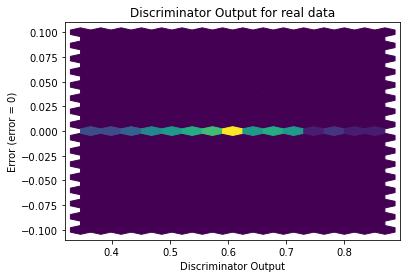

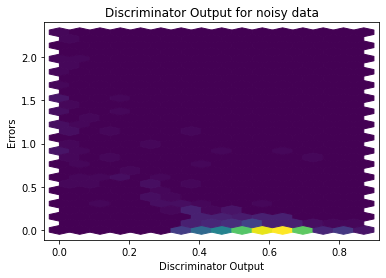

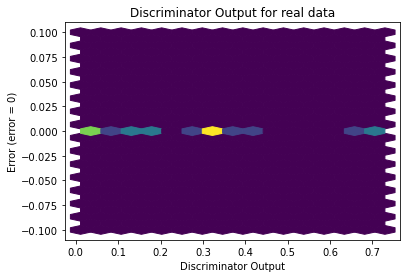

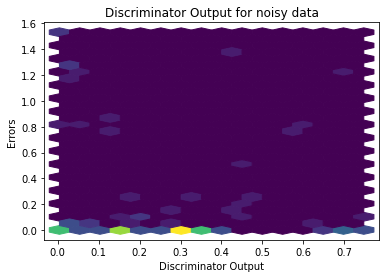

In [10]:
sanityChecks.discProbVsError(train_data,discriminator,device)
sanityChecks.discProbVsError(test_data,discriminator,device)